# Robert's Second Lab 
## doing actual data science!

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymatgen as mp
from pprint import pprint

## Question 1

In [9]:
orig_data = pd.read_csv("./class_repo/labs/lab2/data.csv", na_filter=False)
orig_data.head()

task_id formula  formation_energy_per_atom  e_above_hull  band_gap  \
0  mp-1007923   CrNi3                  -0.016354      0.000802       0.0   
1  mp-1008754   TbHg2                  -0.069428      0.329909       0.0   
2  mp-1016886   MgVO3                  -2.241438      0.545977       0.0   
3  mp-1018902  PrSbPt                  -1.111238      0.000000       0.0   
4  mp-1020595  Rb8PO3                  -0.772860      0.491666       0.0   

   has_bandstructure  
0              False  
1               True  
2               True  
3               True  
4               True

**1.1 How many elements?**

In [10]:
orig_data.shape

(124515, 6)

In [11]:
orig_data.describe(include="all")

task_id       formula  formation_energy_per_atom   e_above_hull  \
count       124515        124515              124515.000000  124515.000000   
unique      124515         89466                        NaN            NaN   
top     mp-1008921  Li9Mn2Co5O16                        NaN            NaN   
freq             1           689                        NaN            NaN   
mean           NaN           NaN                  -1.410472       0.148873   
std            NaN           NaN                   1.211580       0.420030   
min            NaN           NaN                  -4.618361       0.000000   
25%            NaN           NaN                  -2.408562       0.000000   
50%            NaN           NaN                  -1.438384       0.030278   
75%            NaN           NaN                  -0.459684       0.101252   
max            NaN           NaN                   5.355523       6.369051   

             band_gap has_bandstructure  
count   124515.000000            124515  
unique            NaN                 2  
top               NaN             False  
freq              NaN             71688  
mean         1.075733               NaN  
std          1.525219               NaN  
min          0.000000               NaN  
25%          0.000000               NaN  
50%          0.110600               NaN  
75%          1.900000               NaN  
max         17.902300               NaN

In [12]:
orig_data['formula'].describe()

count           124515
unique           89466
top       Li9Mn2Co5O16
freq               689
Name: formula, dtype: object

In [13]:
orig_data['composition'] = [mp.Composition(c) for c in orig_data['formula']]

In [14]:
holder1 = 'abc'
for i in orig_data['formula']:
    if len(holder1) < len(i):
        holder1 = i
print(holder1)

K4Ba2Na4Ti8MnSi16(W4O29)2


In [15]:
holder1 = 'abc'
for i in orig_data['formula']:
    if len(holder1) > len(i):
        holder1 = i
print(holder1)

U


In [16]:
orig_data['composition']

0                    (Cr, Ni)
1                    (Tb, Hg)
2                  (Mg, V, O)
3                (Pr, Sb, Pt)
4                  (Rb, P, O)
                 ...         
124510            (Zn, Mo, O)
124511             (Mg, V, O)
124512            (Ca, Co, O)
124513     (Ca, La, Cr, W, O)
124514    (Ca, La, Cr, Sn, O)
Name: composition, Length: 124515, dtype: object

In [17]:
orig_data['n_el'] = [len(i) for i in orig_data['composition']]

**1.2: Max elements in single structure?**

Answer is 9

In [18]:
orig_data['n_el'].describe()

count    124515.000000
mean          3.319062
std           0.905356
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           9.000000
Name: n_el, dtype: float64

**1.3 Plot distribution of #elements per structure in the dataset**

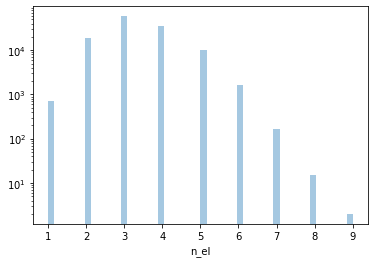

In [19]:
ax = sns.distplot(orig_data['n_el'], kde=False)
ax.set_yscale('log')

**1.4 Finding 10 most common and 10 least commonly occuring elements in compounds**

In [20]:
#instantiate the dictionary
element_occurrences = {}
# look through every entry in the composition column
for comp in orig_data['composition']:
    #look through every element in each composition
    for element in comp:
        #if we haven't seen this element before, add it to our dictionary
        #and set the count equal to 1 (first occurence!)
        if element not in element_occurrences:
            element_occurrences[element] = 1
        # if we've seen it before, add another occurence to the count
        elif element in element_occurrences:
            # add 1 to the count of the element
            element_occurrences[element] += 1
            # element_occurrences[element] = element_occurrences[element] + 1

In [21]:
pprint(element_occurrences)

{Element Cs: 3549,
 Element K: 6398,
 Element Rb: 3814,
 Element Ba: 6092,
 Element Na: 7296,
 Element Sr: 5117,
 Element Li: 18580,
 Element Ca: 6328,
 Element Ac: 297,
 Element La: 4256,
 Element Tb: 1741,
 Element Yb: 1872,
 Element Ce: 2650,
 Element Pm: 515,
 Element Pr: 2276,
 Element Nd: 2574,
 Element Sm: 2335,
 Element Eu: 1610,
 Element Gd: 1444,
 Element Dy: 1874,
 Element Y: 3814,
 Element Ho: 1886,
 Element Er: 1930,
 Element Tm: 1495,
 Element Lu: 1465,
 Element Pu: 388,
 Element Hf: 1642,
 Element Th: 972,
 Element Mg: 8711,
 Element Zr: 2722,
 Element Np: 340,
 Element Sc: 2060,
 Element U: 2061,
 Element Pa: 253,
 Element Ta: 2384,
 Element Ti: 5723,
 Element Mn: 11233,
 Element Be: 1065,
 Element Nb: 3248,
 Element Al: 6446,
 Element Tl: 2632,
 Element V: 7276,
 Element Zn: 5235,
 Element Cr: 5368,
 Element Cd: 2880,
 Element In: 3599,
 Element Ga: 4024,
 Element Fe: 10109,
 Element Co: 8612,
 Element Cu: 7999,
 Element Re: 1313,
 Element Si: 8940,
 Element Tc: 648,
 

/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


In [22]:
for i in element_occurrences:
    element_occurrences[i] = [element_occurrences[i]]
orig_data_elements = pd.DataFrame(element_occurrences)
df = orig_data_elements.T
df['count'] = df[0]
df = df.drop(0, axis=1)
df = df.sort_values(by=['count'])

**10 least commonly occuring elements, number of occurences in compounds**

In [23]:
df.head(10)

count
Ne      1
Ar      2
He      8
Kr     15
Xe    147
Pa    253
Ac    297
Np    340
Pu    388
Pm    515

**10 most commonly occuring elements, number of occurences in compounds**

In [24]:
df.tail(10)

count
Mg   8711
Si   8940
F    9606
N    9723
Fe  10109
S   10516
Mn  11233
P   13321
Li  18580
O   60428

## Question 2

In [25]:
for i in orig_data['composition']:
    if i.contains_element_type('noble_gas'):
        print(i)

Ni1 Xe2 F16
He1 Si1 O2
Xe2 N1 O2 F13
Mg1 As2 Xe2 F18
Hg1 Sb3 Xe1 F17
Xe1 F3
Cu1 Sb2 Xe2 F16
Hg1 P2 Xe5 F22
Kr1
Au1 Xe1 F9
As1 Xe1 O3 F6
Sb1 Xe2 O1 F15
Sb1 Xe1 F9
P2 Pb1 Xe3 F18
Sb1 Xe1 O2 F7
Cu1 Sb2 Xe6 F24
He1
Os1 Xe2 O3 F14
As1 Xe1 O2 F7
Te1 As1 Xe1 O2 F11
As1 S1 Xe1 N1 F10
Ba1 Sb2 Xe5 F22
Cd1 B2 Xe1 F10
Xe1
Fe4 Ag1 Xe1 F5
Xe1
Na4 Xe1 O12
Xe1 N1 O2 F5
He1 Si1 O2
S1 Xe1 O3 F2
Ne1
Pt1 Xe1 F11
Zn1 Sb3 Xe1 F23
Bi1 Kr1 F7
Kr1
Xe1
Na4 Xe1 O12
Ba1 As2 Xe5 F22
Sb2 Xe1 F15
Nd2 As6 Xe5 F46
Te1 As1 H1 Xe1 N1 F11
Kr1 F2
Cs2 Xe1 Br4 F28
As1 Kr1 F7
As1 Xe2 O1 F10
Ge1 Xe1 F10
Xe1
Hg2 Sb7 H2 Xe3 F59
Os1 Xe1 O4 F6
Sb1 Kr1 F7
Ar1
Ba1 Ru2 Xe5 F22
K4 Xe1 O15
Ca2 As4 Xe5 F34
B1 C6 Xe1 F11
Hg1 Sb2 Xe5 F22
Sb1 Te7 S1 Xe1 Cl1 O9 F36
As1 Xe1 F7
S2 Xe1 N1 O4 F3
Co1 Sb3 Xe1 F23
Sb4 Au1 Xe4 F22
Xe1 N2 O2 F8
Au1 Xe2 F17
Fe4 Ag1 P1 Xe2 F6
Xe1 O3
Xe1
Sr1 As2 Xe3 F18
Sb2 Xe1 F14
Sb1 Xe2 F9
As1 Xe1 F11
Mg1 As2 Xe2 F16
Ba1 P2 Xe4 F20
Sb2 Xe1 F16
Zn1 Sb2 Xe6 F24
Cs1 Xe3 O3 F13
Mn1 Sb3 Xe1 F23
Sb1 Xe1 O1 F9
Sr1 P2 Xe3 

In [26]:
orig_data['contains_noble_gas'] = [i.contains_element_type('noble_gas') for i in orig_data['composition']]

**2.1 how many compounds have noble gases in them? take them out.**

In [27]:
data = orig_data[orig_data['contains_noble_gas']]

In [28]:
orig_data_ignoble = orig_data[orig_data['contains_noble_gas'] == False]

In [29]:
n = data.shape[0]
n

173

In [30]:
orig_data_ignoble.shape

(124342, 9)

In [31]:
orig_data.shape

(124515, 9)

**2.2 Load element properties. How many NaN in each column?**

In [32]:
element_data = pd.read_csv("./class_repo/labs/lab2/element_properties.csv", index_col=0)

In [33]:
element_data.isna().sum()

AtomicRadius               7
AtomicVolume               2
AtomicWeight               0
BulkModulus               26
BoilingT                   2
Column                     0
CovalentRadius             0
Density                    2
ElectronAffinity           9
Electronegativity          4
FirstIonizationEnergy      1
HeatCapacityMass          10
Row                        0
phi                       22
SecondIonizationEnergy    12
ShearModulus              34
dtype: int64

**2.3 Compute the means of each column. Fill NaNs with the mean of the column they belong to.**

In [34]:
element_data.describe()

AtomicRadius  AtomicVolume  AtomicWeight  BulkModulus     BoilingT  \
count     88.000000     93.000000     95.000000    69.000000    93.000000   
mean       1.500682   3426.442121    116.153896    90.794203  2549.858065   
std        0.403954   9869.341789     71.969479    95.957835  1591.157210   
min        0.250000      7.297767      1.007940     1.100000     4.070000   
25%        1.350000     17.075648     53.467073    28.000000  1180.000000   
50%        1.450000     28.214122    112.411000    45.000000  2792.000000   
75%        1.800000     37.740406    176.728400   140.000000  3618.000000   
max        2.600000  37887.799548    244.000000   380.000000  5869.000000   

          Column  CovalentRadius       Density  ElectronAffinity  \
count  95.000000       95.000000     93.000000         86.000000   
mean    8.315789      151.810526   7489.235725         76.162209   
std     5.838725       44.510648   5921.990631         80.643656   
min     1.000000       28.000000      0.089900          0.000000   
25%     3.000000      127.000000   2460.000000         21.075000   
50%     7.000000      146.000000   7010.000000         50.000000   
75%    14.000000      190.000000  10070.000000        105.375000   
max    18.000000      260.000000  22590.000000        349.000000   

       Electronegativity  FirstIonizationEnergy  HeatCapacityMass        Row  \
count          91.000000              94.000000         85.000000  95.000000   
mean            1.747033               8.094711          0.635447   4.831579   
std             0.645836               3.441865          1.651877   1.527427   
min             0.700000               3.893905          0.094000   1.000000   
25%             1.235000               5.989151          0.168000   4.000000   
50%             1.650000               7.314710          0.244000   5.000000   
75%             2.185000               8.987120          0.489000   6.000000   
max             3.980000              24.587387         14.304000   7.000000   

             phi  SecondIonizationEnergy  ShearModulus  
count  73.000000               83.000000     61.000000  
mean    4.034247               18.947504     47.362295  
std     1.061636               10.220245     53.450460  
min     1.950000               10.003830      1.300000  
25%     3.210000               12.133000     16.000000  
50%     4.050000               16.630000     27.000000  
75%     4.800000               20.471725     48.000000  
max     6.860000               75.640000    222.000000

In [35]:
element_data = element_data.fillna(element_data.mean())

In [36]:
element_data.isna().any()

AtomicRadius              False
AtomicVolume              False
AtomicWeight              False
BulkModulus               False
BoilingT                  False
Column                    False
CovalentRadius            False
Density                   False
ElectronAffinity          False
Electronegativity         False
FirstIonizationEnergy     False
HeatCapacityMass          False
Row                       False
phi                       False
SecondIonizationEnergy    False
ShearModulus              False
dtype: bool

In [69]:
element_data.head()

AtomicRadius  AtomicVolume  AtomicWeight  BulkModulus  BoilingT  Column  \
H       0.250000  18618.051941      1.007940    90.794203     20.13     1.0   
He      1.500682  37236.035563      4.002602    90.794203      4.07    18.0   
Li      1.450000     21.544058      6.941000    11.000000   1615.00     1.0   
Be      1.050000      8.098176      9.012182   130.000000   2743.00     2.0   
B       0.850000      7.297767     10.811000   320.000000   4273.00    13.0   

    CovalentRadius    Density  ElectronAffinity  Electronegativity  \
H             31.0     0.0899              72.8           2.200000   
He            28.0     0.1785               0.0           1.747033   
Li           128.0   535.0000              59.6           0.980000   
Be            96.0  1848.0000               0.0           1.570000   
B             84.0  2460.0000              26.7           2.040000   

    FirstIonizationEnergy  HeatCapacityMass  Row       phi  \
H               13.598443            14.304  1.0  5.200000   
He              24.587387             5.130  1.0  4.034247   
Li               5.391719             3.582  2.0  2.850000   
Be               9.322700             1.825  2.0  5.050000   
B                8.298020             1.026  2.0  5.300000   

    SecondIonizationEnergy  ShearModulus  
H                18.947504     47.362295  
He               54.417760     47.362295  
Li               75.640000      4.200000  
Be               18.211140    132.000000  
B                25.154800     47.362295

In [70]:
element_data['AtomicRadius']['H']

0.25

In [61]:
crni=orig_data['composition'][0].get_el_amt_dict()

In [74]:
for i in orig_data['composition'][0]:
#    blargh = orig_data['composition'][0].get_atomic_fraction(i)
#    print(blargh)
    print(str(i))

Cr
Ni


In [75]:
avg_sizes = {}
radius = element_data['AtomicRadius']

for compound in orig_data['composition']:
    if compound not in avg_sizes:
        avg_sizes[compound] = 0
        for el in compound:
            frac = compound.get_atomic_fraction(el)
            size = frac * radius[str(el)]
            avg_sizes[compound] += size
             
            

KeyboardInterrupt: 

In [80]:
avg_sizes = {}
radius = element_data['AtomicRadius']
counter = 0

for compound in orig_data['composition']:
    if compound not in avg_sizes:
        counter += 1
        print(compound, " progress", counter/len(orig_data['composition']))
        avg_sizes[compound] = 0
        for el in compound:
            frac = compound.get_atomic_fraction(el)
            size = frac * radius[str(el)]
            avg_sizes[compound] += size

Cr1 Ni3  progress 8.031160904308718e-06
Tb1 Hg2  progress 1.6062321808617436e-05
Mg1 V1 O3  progress 2.4093482712926154e-05
Pr1 Sb1 Pt1  progress 3.212464361723487e-05
Rb8 P1 O3  progress 4.015580452154359e-05
Zn1 As1 Pt5  progress 4.818696542585231e-05
Te6 Mo2 W1  progress 5.621812633016102e-05
Mo3 W1 Se4 S4  progress 6.424928723446974e-05
Mo3 W1 Se6 S2  progress 7.228044813877847e-05
Mg14 Ni1 Sn1  progress 8.031160904308717e-05
Te4 Mo3 W1 Se4  progress 8.83427699473959e-05
Te1 W1 Se1  progress 9.637393085170462e-05
Sr3 Ru1 N3  progress 0.00010440509175601334
K1 Mg6 Ga1 O8  progress 0.00011243625266032205
Mg6 Al1 Cr1 O8  progress 0.00012046741356463077
Te2 Mo1 W1 Se2  progress 0.0001284985744689395
Hf1 Mg14 Cd1 O16  progress 0.0001365297353732482
Mg14 Ni1 Bi1 O16  progress 0.00014456089627755693
U1  progress 0.00015259205718186564
Cs1 S1 O3  progress 0.00016062321808617435
Sc1 F3  progress 0.00016865437899048308
Tb2 Ni2 Sn1  progress 0.0001766855398947918
V1 Au4  progress 0.0001847167

Gd1 Ag1 W2 O8  progress 0.004666104485403365
Cu1 Sn1 Pd2  progress 0.0046741356463076734
Er3 Tl1 S6  progress 0.004682166807211983
Zr3 Se2  progress 0.004690197968116291
Zn13 Fe1  progress 0.0046982291290206
Cs2 Re3 Se4 I3  progress 0.004706260289924909
Y1 Mn1 Co1  progress 0.0047142914508292175
Ti1 Ga1 Ni6  progress 0.004722322611733526
Tm6 Ga17 Pd5  progress 0.004730353772637834
Te1 Pb2 Se1  progress 0.004738384933542144
Th1 Al2 Co3  progress 0.004746416094446452
Tb1 Cu2 Ni3  progress 0.004754447255350761
Tb9 Ga5 S21  progress 0.00476247841625507
Ta3 Al1 B8  progress 0.0047705095771593785
Sr1 C1 O3  progress 0.004778540738063687
Sr2 Nd1 Mn2 O7  progress 0.004786571898967995
Ta2 Ti2 Ni2 C1  progress 0.004794603059872305
Sm1 U1 N2  progress 0.004802634220776613
Sm1 U1 Al4  progress 0.004810665381680922
Sm2 Ge3  progress 0.004818696542585231
Sr3 U6 O28  progress 0.0048267277034895395
Sb4 Te3 Se3  progress 0.004834758864393848
Rb1 Ti3 Al1 O8  progress 0.004842790025298157
Pr1 Y1 Co6 Ni4 

Ce1 Pm1 Mg2  progress 0.00832831385776814
Cs1 Ac3  progress 0.00833634501867245
Ga1 Cu3  progress 0.008344376179576759
La1 Nd3  progress 0.008352407340481066
K3 Tm1  progress 0.008360438501385375
Li1 Dy3  progress 0.008368469662289685
Li1 Dy2 Ga1  progress 0.008376500823193992
Lu2 Co1 Cu1  progress 0.008384531984098302
Na1 Li3  progress 0.00839256314500261
Na1 Tb3  progress 0.008400594305906919
Nd1 Cd1 Ag2  progress 0.008408625466811228
Pa1 Ti3  progress 0.008416656627715536
Pm3 Dy1  progress 0.008424687788619845
Pm1 Ho3  progress 0.008432718949524154
Sc3 Bi1  progress 0.008440750110428462
Y3 Sb1  progress 0.008448781271332771
Yb1 Ag1 Au2  progress 0.00845681243223708
Li1 H2 N1  progress 0.008464843593141388
Y2 Ga2 Fe15  progress 0.008472874754045697
La3 Bi4 Pt3  progress 0.008480905914950007
Li1 In1 W2 O8  progress 0.008488937075854314
Cs2 Cu2 Sb2 S5  progress 0.008496968236758624
Cs2 U1 Pd3 Se6  progress 0.008504999397662933
Y1 Fe3  progress 0.00851303055856724
Co1 W2 Cl10  progress 

Mg2 Pt1 Rh1  progress 0.011492591254065775
Tl1 Pd2 Au1  progress 0.011500622414970085
Lu1 Tl1 Rh2  progress 0.011508653575874392
Yb1 Sm1 Zn2  progress 0.011516684736778702
Li1 Ho2 Tc1  progress 0.011524715897683011
Li2 V1 Fe1 O4  progress 0.011532747058587318
K2 Sn2 Se5  progress 0.011540778219491628
U1 Si1 Au1  progress 0.011548809380395935
Hf1 Ge1 Pt1  progress 0.011556840541300245
La1 Mg1 Tl1  progress 0.011564871702204554
Sm1 Tm1 Zn2  progress 0.011572902863108862
Li3 Cr1  progress 0.011580934024013171
Ho1 Lu1 Rh2  progress 0.01158896518491748
Mg1 P1  progress 0.011596996345821788
Th3 B1  progress 0.011605027506726097
Y1 Hg1 Pd2  progress 0.011613058667630407
Yb1 Dy1 Pd2  progress 0.011621089828534714
U1 Ge1 Pt1  progress 0.011629120989439024
Na1 Ag1 C2 O4  progress 0.011637152150343333
Ga1 S1  progress 0.01164518331124764
Mn1 Fe3  progress 0.01165321447215195
Y1 Fe1 O3  progress 0.011661245633056259
Ca1 Ti4 O8  progress 0.011669276793960567
Mg2 Bi3 O8  progress 0.01167730795486487

Lu1 H24 C4 N4 Cl7  progress 0.014520338914990162
Sr1 Cr1 O4  progress 0.01452837007589447
Pb2 O3  progress 0.01453640123679878
Tb1 Mn5 Ge3  progress 0.014544432397703089
Ba1 H2 O2  progress 0.014552463558607396
Na1 Sr1 Re2  progress 0.014560494719511706
H4 C1 S1 N2  progress 0.014568525880416015
Si1 I4  progress 0.014576557041320323
Co7 Te4 Br6 O12  progress 0.014584588202224632
K49 Tl108  progress 0.01459261936312894
Zn1 H2 S1 O5  progress 0.014600650524033249
K5 Te3  progress 0.014608681684937558
Ba1 Nd2 Zn1 O5  progress 0.014616712845841866
Gd1 Al4 Ge2 Au1  progress 0.014624744006746175
Cr4 Cu3 Se8  progress 0.014632775167650484
Ti1 Pb9 O11  progress 0.014640806328554792
Mg2 Si1 O4  progress 0.014648837489459101
Li3 Al1 Ge1 O5  progress 0.01465686865036341
Na20 Zr11 Si10 P8 O72  progress 0.014664899811267718
Cs2 Ti2 S9  progress 0.014672930972172028
In2 Br3  progress 0.014680962133076337
Ag8 Ge1 Te6  progress 0.014688993293980645
Y1 Al6 Si30 N45 O3  progress 0.014697024454884954
Ti1

Sc4 S3 N2  progress 0.017090310404368952
Zn5 Si2 N6  progress 0.017098341565273262
Mo2 C3 N6  progress 0.017106372726177568
La1 Mg2 W3 S8  progress 0.017114403887081877
K2 Mn1 N2  progress 0.017122435047986186
Zn3 Sb1 N1  progress 0.017130466208890496
Ca3 Bi2 N4  progress 0.017138497369794805
Lu1 Mg2 W3 S8  progress 0.017146528530699114
Mg1 Mn1 Ga1 S4  progress 0.01715455969160342
Te3 Mo4 N2  progress 0.01716259085250773
Mg4 Si1 N4  progress 0.01717062201341204
Co5 Cu1 N4  progress 0.017178653174316348
Y4 Si2 Sb2 W13 O28  progress 0.017186684335220657
Sm2 Mo2 C3  progress 0.017194715496124963
Dy2 Sb5  progress 0.017202746657029273
Cs2 Pt1  progress 0.017210777817933582
K1 Ta1 Ge1 O5  progress 0.01721880897883789
Dy2 B4 O9  progress 0.0172268401397422
Ho2 Ni1 B4 O10  progress 0.01723487130064651
La1 Tm1 Ge4 Ir2  progress 0.017242902461550816
Cs1 Er3 Se5  progress 0.017250933622455125
Cd4 Si1 Se6  progress 0.017258964783359435
V4 Zn3 P6 O24  progress 0.017266995944263744
Na1 Gd1 Si1 O4  

Ca1 Y1 Mg14 O16  progress 0.01948359635385295
Y1 Mg30 Nb1 O32  progress 0.01949162751475726
Mg30 Nb1 Cu1 O32  progress 0.019499658675661568
Mg1 Cd2  progress 0.019507689836565877
Na1 Li1 Mg30 O31  progress 0.019515720997470183
Sr1 Co2 Si2  progress 0.019523752158374492
Pr1 Al3 Cu1  progress 0.019531783319278802
Mg1 Br2 O2  progress 0.01953981448018311
Ba1 Si3 Pd1  progress 0.01954784564108742
Mg9 Si5  progress 0.019555876801991726
K2 Na2 Mo3 W1 O12  progress 0.019563907962896036
Hf1 V2  progress 0.019571939123800345
As2 W1  progress 0.019579970284704654
V2 Co1 S4  progress 0.019588001445608964
Mn1 Pb2 W1 O6  progress 0.019596032606513273
Sr2 Ca1 W1 O6  progress 0.01960406376741758
Y1 Co1 Si2  progress 0.019612094928321888
Y2 In1 Cu2  progress 0.019620126089226197
Mg1 B2 C2  progress 0.019628157250130507
Fe1 Br2 N2  progress 0.019636188411034816
Ce1 Sb2 Au1  progress 0.019644219571939125
Ti3 Pd1  progress 0.01965225073284343
Er1 B2 C2  progress 0.01966028189374774
Zr1 Ge1 Os1  progress 

Cu3 Bi1 S3  progress 0.021876882303336946
Cd1 In4 I6  progress 0.021884913464241255
Sr2 Tb1 Ir1 O6  progress 0.021892944625145565
U1 Ag3 As3 O12  progress 0.021900975786049874
Ca1 Mg1 C2 O6  progress 0.021909006946954183
Si1 Ag5 Cl1 O4  progress 0.02191703810785849
Fe3 W1 C14 S2 O14  progress 0.0219250692687628
Cs2 Re2 Se5  progress 0.021933100429667108
Li1 Zn1 P1 O4  progress 0.021941131590571417
Co2 Sn1 C8 Cl2 O8  progress 0.021949162751475727
Ba1 Yb1 Al2 Si2 N5 O2  progress 0.021957193912380036
Np2 Se3  progress 0.021965225073284342
Co1 Bi25 O40  progress 0.02197325623418865
K3 Fe1 F3  progress 0.02198128739509296
Si1 Pd2  progress 0.02198931855599727
K1 Mg1 In1 Mo3 O12  progress 0.02199734971690158
Li2 Mn3 Zn1 O8  progress 0.02200538087780589
Rb2 Ti1 Cu2 S4  progress 0.022013412038710194
K1 Al1 P4 H4 O14  progress 0.022021443199614504
Te1 H18 Br6 O8  progress 0.022029474360518813
Na4 Si1 O4  progress 0.022037505521423122
Sb1 O2 F1  progress 0.02204553668232743
Mn1 O1 F1  progress 0

Ac1 Cu3  progress 0.02380436092037104
Ba1 Sr3  progress 0.02381239208127535
Ba1 Ac3  progress 0.02382042324217966
Ca2 Tl1 Zn1  progress 0.023828454403083964
Dy1  progress 0.023836485563988274
Gd2 Mg1 Al1  progress 0.023844516724892583
Hf2 Mn1 Os1  progress 0.023852547885796892
In1 O1  progress 0.023860579046701202
Ho1 Tm1 Hg2  progress 0.02386861020760551
La1 P5  progress 0.023876641368509817
Li1 Tl2 Pd1  progress 0.023884672529414126
Mg1 U1 O3  progress 0.023892703690318436
Mg149 Sc1  progress 0.023900734851222745
Mg1 Hg2  progress 0.023908766012127054
Nb2 Tc1 Os1  progress 0.02391679717303136
Tm2 Tl1 Zn1  progress 0.02392482833393567
Yb1 Ho3  progress 0.02393285949483998
Tl2 Zn1 P4 H8 O16  progress 0.023940890655744288
Zn3 N1  progress 0.023948921816648597
Yb2 Zn1 Hg1  progress 0.023956952977552907
Zn1 Co1  progress 0.023964984138457213
Y6 Ni1 Br10  progress 0.023973015299361522
Sr3 Ga2 As4  progress 0.02398104646026583
Zr1 C8 N2 Cl6  progress 0.02398907762117014
Cs1 Li1 I2  progress

Li2 Mn2 C3 O9  progress 0.025900493916395616
Li1 V3 F10  progress 0.025908525077299925
Li1 Co1 Si1 O4  progress 0.02591655623820423
Li1 Fe1 O3  progress 0.02592458739910854
Li2 Mn5 O10  progress 0.02593261856001285
Na3 Li4 Mn5 O9  progress 0.02594064972091716
Pr1 Y1 O2  progress 0.02594868088182147
Cr3 O2 F2  progress 0.025956712042725778
Ga2 Cu1 O4  progress 0.025964743203630083
Li1 Mn2 P2 O8  progress 0.025972774364534393
Li2 V1 F6  progress 0.025980805525438702
Li2 V1 Cr1 P2 H2 O10  progress 0.02598883668634301
Rb2 O1  progress 0.02599686784724732
Ho1 B1 O3  progress 0.026004899008151627
Li2 Mn2 Sb1 O6  progress 0.026012930169055936
Cs1 Gd1 O2  progress 0.026020961329960245
Na3 Ni1 O3  progress 0.026028992490864555
Li4 Mn1 Nb1 W2 O12  progress 0.026037023651768864
Li1 Cr1 P1 O4  progress 0.026045054812673173
Ba8 Fe8 O21  progress 0.02605308597357748
V3 O5 F1  progress 0.02606111713448179
V2 Ga1 O5  progress 0.026069148295386098
Cr3 Co3 Sb2 O16  progress 0.026077179456290407
Ge1 S2  

Na1 Ho9 Si6 O26  progress 0.028165281291410674
Na4 Ca2 Sn1 P4  progress 0.028173312452314983
Mn1 Cr1 P2  progress 0.028181343613219292
Mn3 Ni4 Sb1  progress 0.028189374774123598
Mn2 Ni1 Sb2 Pt1  progress 0.028197405935027908
Mg1 Ni1 O2  progress 0.028205437095932217
Mg3 In1  progress 0.028213468256836526
Li1 Eu1 S2  progress 0.028221499417740836
La1 Fe4 Bi3 O12  progress 0.02822953057864514
La4 Bi4 S8 O3 F1  progress 0.02823756173954945
K1 Na1 Cl2  progress 0.02824559290045376
K1 V1 Ni1 O1 F6  progress 0.02825362406135807
K1 Ba1 V2 Cu1 Cl1 O7  progress 0.02826165522226238
In1 Pb1  progress 0.028269686383166688
K2 Mg5 Cu3 As6 O24  progress 0.028277717544070994
K1 Ti6 Se8  progress 0.028285748704975303
Gd3 S1 O1 F5  progress 0.028293779865879613
Ga2 Co6 C1  progress 0.028301811026783922
Fe1 Re1 Pb2 O6  progress 0.02830984218768823
Fe1 Ir1  progress 0.02831787334859254
Eu1 Ga1 Au1  progress 0.028325904509496846
Eu2 Si4 Ir1 Pd3  progress 0.028333935670401156
Dy1 Ag1 Sn2  progress 0.0283419

Sn1 B1 O3  progress 0.03006063526482753
Li1 Fe23 O32  progress 0.03006866642573184
Li2 V12 O29  progress 0.03007669758663615
Li2 Fe3 Bi1 O8  progress 0.030084728747540458
Ti2 Sb1 P3 O12  progress 0.030092759908444764
Ba4 Ti11 O26  progress 0.030100791069349073
Li1 V1 Cr1 O4  progress 0.030108822230253383
Ag1 Cl1 O3  progress 0.030116853391157692
Li8 Mn1 Fe7 B8 O24  progress 0.030124884552062
Fe3 O2 F4  progress 0.03013291571296631
Yb1 Hf1 O3  progress 0.030140946873870617
Ca9 Co1 P7 O28  progress 0.030148978034774926
Li1 Fe2 Si2 O7  progress 0.030157009195679235
Li6 Fe1 O3 F3  progress 0.030165040356583545
Na6 Ni2 As1 C4 O16  progress 0.030173071517487854
K2 Pd1 F6  progress 0.030181102678392163
Si1 Ni3  progress 0.03018913383929647
Li4 Mn2 Cu3 O10  progress 0.03019716500020078
Pr1 Cr1 Se3  progress 0.030205196161105088
Li1 Ta1 Rh2  progress 0.030213227322009397
Sc2 Zn1 Au1  progress 0.030221258482913706
Sc2 Tc1 Hg1  progress 0.030229289643818012
Sc1 Sb1 Ru2  progress 0.030237320804722

Rb1 Dy2 Cu1 Se4  progress 0.032028269686383164
Ge1 Pt3  progress 0.03203630084728747
Na1 V1 Te1 O5  progress 0.03204433200819178
Yb1 Ni1 O3  progress 0.03205236316909609
Tb3 In1 N1  progress 0.0320603943300004
Pu1 Fe2 Si2  progress 0.03206842549090471
Mg1 In2 S4  progress 0.03207645665180902
Ce4 As3  progress 0.03208448781271333
Lu1 Ni2  progress 0.03209251897361764
Sc1 In1 Ni2  progress 0.03210055013452195
Nd1 In1 Cu2  progress 0.03210858129542626
Tb1 Sn1 Pd1  progress 0.03211661245633056
Na3 In1 Sb2  progress 0.03212464361723487
Tb1 Fe6 Ge6  progress 0.03213267477813918
Tb1 Fe6 Sn6  progress 0.03214070593904349
Ce1 S2 O8  progress 0.0321487370999478
Ce1 F3  progress 0.032156768260852106
Mn1 Nb2 O6  progress 0.032164799421756415
Pr1 Fe1 O3  progress 0.032172830582660725
Nd1 Sn1 Pd1  progress 0.032180861743565034
Sn1 P2 Pb1 O8  progress 0.03218889290446934
Ba1 V2 Cd1 O7  progress 0.03219692406537365
In5 S4  progress 0.032204955226277955
Te1 I1  progress 0.032212986387182264
Eu1 I2  pro

Nb3 Tl3 O10  progress 0.03375496928080954
V3 Co1 Ni2 P6 O24  progress 0.03376300044171385
Na1 Mn1 O2  progress 0.03377103160261816
Li4 Co1 O1 F4  progress 0.033779062763522466
Mg5 Ti13 O30  progress 0.033787093924426775
Li2 Mn4 O5 F3  progress 0.033795125085331085
Sb2 H4 Au1 F16  progress 0.033803156246235394
Li14 Cu9 P16 O56  progress 0.0338111874071397
Mn1 F3  progress 0.03381921856804401
Sn2 N2 O1  progress 0.03382724972894832
Ti3 V1 Sn2 P6 O24  progress 0.03383528088985263
Li8 Mn1 Fe3 O12  progress 0.033843312050756934
Li2 Mn1 F5  progress 0.03385134321166124
K1 Li1 Sb3 O8  progress 0.03385937437256555
Li1 Mn3 P3 O12  progress 0.03386740553346986
Rb3 Fe1 O3  progress 0.03387543669437417
Sc1 Mn2 O5  progress 0.03388346785527848
Li4 Mn3 Nb1 O8  progress 0.03389149901618279
Li5 Nb2 Fe5 O12  progress 0.0338995301770871
Li1 Cr4 O12  progress 0.03390756133799141
Li4 Mn3 Sn5 O16  progress 0.03391559249889572
V2 Fe3 Sn1 P6 O24  progress 0.03392362365980003
V1 Co1 P2 O8  progress 0.03393165

Nd2 Al3 Ga1  progress 0.03544151307071437
Nd2 Ge3 Rh1  progress 0.03544954423161868
Nd2 Ti1 Cu1 O6  progress 0.03545757539252299
Nd10 Si3 Ge3  progress 0.0354656065534273
Mn1 Al2 Co1  progress 0.03547363771433161
Na22 Ca1 Fe6 P12 O48 F6  progress 0.03548166887523591
Mg1 Al1 Cr3 Fe1 O8  progress 0.03548970003614022
Mn4 Cr1 Co10 Ge5  progress 0.03549773119704453
Mn3 Al4 Fe1 P4 H16 O28  progress 0.03550576235794884
K1 Ta1 Si2 O7  progress 0.03551379351885315
In1 Sn2 Te3  progress 0.03552182467975746
Hf1 Mo1 C2  progress 0.03552985584066177
Fe1 Mo2  progress 0.03553788700156608
Gd3 Y1 Fe4 O12  progress 0.03554591816247039
Eu1 Zn1 In1  progress 0.035553949323374696
Er4 Th1 C1 N4  progress 0.035561980484279006
Eu1 Ga2 Ge4  progress 0.03557001164518331
Cr3 Sb1 As2  progress 0.03557804280608762
Ce3 Sc1  progress 0.03558607396699193
Ca1 La3 Fe4 O12  progress 0.035594105127896236
Co1 H15 N6 Cl2 O2  progress 0.035602136288800545
K2 Mo3 S1 O17  progress 0.035610167449704855
Al1 Si1 Mo1  progress 0

Li2 V2 P3 O12  progress 0.036991527125245956
Li2 Fe1 P1 O4 F1  progress 0.036999558286150265
K4 Li5 Fe2 O8  progress 0.037007589447054574
Sb5 O7 F1  progress 0.037015620607958884
Mn1 Ni3 O4  progress 0.037023651768863186
Zn2 Hg2 H2 Se2 O11  progress 0.037031682929767495
Li5 V4 O12 F1  progress 0.037039714090671805
Na2 Bi1 O3  progress 0.037047745251576114
Li2 Ag1 F3  progress 0.03705577641248042
Fe1 Cu5 S4  progress 0.03706380757338473
Na4 Ti7 O16  progress 0.03707183873428904
Li5 Fe8 B8 O24  progress 0.03707986989519335
Zr4 Mn1 O9  progress 0.03708790105609766
Li13 Mn2 O9  progress 0.03709593221700197
Li3 V4 O11 F1  progress 0.03710396337790628
Sr1 Rh2 O4  progress 0.03711199453881058
Li3 Sb1 S3  progress 0.03712002569971489
Pt1 O3  progress 0.0371280568606192
La2 Al4 O9  progress 0.03713608802152351
Li4 Ti1 Cr1 O6  progress 0.03714411918242782
Li3 Si1 Bi1 C1 O7  progress 0.03715215034333213
Li2 Co2 S3 O12  progress 0.03716018150423644
Li3 Mn2 P2 C2 O14  progress 0.03716821266514075
R

Li1 Mn2 Co2 O8  progress 0.0386941332369594
Li2 Co3 O6  progress 0.03870216439786371
Be1 Cl1 O1  progress 0.03871019555876802
Si2 O3  progress 0.03871822671967233
Th6 Mn23 H16  progress 0.03872625788057664
Ho3 Sn7  progress 0.03873428904148095
Ca1 Ac1 Mg2  progress 0.03874232020238526
Be1 H8 S1 O8  progress 0.03875035136328956
Cd3 Pd1  progress 0.03875838252419387
Cr1 Cu1 O3  progress 0.03876641368509818
Co1 Rh3  progress 0.03877444484600249
Co3 I1  progress 0.0387824760069068
Ce3 I1  progress 0.03879050716781111
Dy1 Er1 Ag2  progress 0.038798538328715416
Er3 Tm1  progress 0.038806569489619726
Eu3 Te1  progress 0.038814600650524035
Hf2 Co1 Cu1  progress 0.038822631811428344
Ir1 N1  progress 0.038830662972332654
Fe1 Sn3  progress 0.038838694133236956
In3 Si1  progress 0.038846725294141266
K3 Li1  progress 0.038854756455045575
K3 Mn1  progress 0.038862787615949884
La1 Ce1 Hg2  progress 0.038870818776854194
Li1 La1 Au2  progress 0.0388788499377585
Mg1 Co3  progress 0.03888688109866281
Rb3

Ce1 B2 Ru3  progress 0.04038067702686423
Y1 B1 Pt2  progress 0.04038870818776854
Cs1 In1 I4  progress 0.04039673934867285
Ta1 Ag7 S6  progress 0.04040477050957716
B1 As5 Pb6 O20  progress 0.04041280167048147
Li1 Nd2 Tl1 Mo4 O16  progress 0.040420832831385776
Ti1 C1  progress 0.040428863992290086
Ba1 Mg1 Os2  progress 0.040436895153194395
Na1 H1 S1 O4  progress 0.040444926314098704
Cs3 H5 Pt1  progress 0.040452957475003014
Sb1 P3 C1 N3 Cl15  progress 0.04046098863590732
Cs3 Mn3 V4 O16  progress 0.04046901979681163
K2 Mn1 Sn2 Se6  progress 0.040477050957715935
Mn3 Si1 Ni2  progress 0.040485082118620244
Yb1 In4 Rh1  progress 0.040493113279524554
Mg2 Ti1 O1  progress 0.04050114444042886
Ta1 Al1 O4  progress 0.04050917560133317
K3 V5 S10  progress 0.04051720676223748
In4 Cu9  progress 0.04052523792314179
Ga2 O3  progress 0.0405332690840461
Li20 Co21 O40  progress 0.04054130024495041
Dy1 Zr9 Si9 P1 O40  progress 0.04054933140585472
Ba1 La2 Mn3 O9  progress 0.04055736256675903
Ca2 Cu2 Si3 H4 

K1 Hg3  progress 0.04202706501224752
Li1 Gd2 In1  progress 0.04203509617315183
Mg16 Al12 Se1  progress 0.042043127334056137
Mg16 Zr1 Al12  progress 0.042051158494960446
Pa2 Bi1 Te1  progress 0.042059189655864755
Pa1 Hg1 O3  progress 0.042067220816769064
Pa1 Ta1 O3  progress 0.042075251977673374
Pm3 Au1  progress 0.04208328313857768
Pm1 Eu1 Pd2  progress 0.04209131429948199
Pu1 Pb1 Au2  progress 0.0420993454603863
Re3 H1  progress 0.042107376621290604
Th1 Ir2  progress 0.042115407782194914
Tb1 Lu1 In2  progress 0.04212343894309922
Tb1 Tm1 Ir2  progress 0.04213147010400353
Ti1 Cd3  progress 0.04213950126490784
Tl3 V1  progress 0.04214753242581215
Y5 Tl3  progress 0.04215556358671646
La1 Yb1 S3  progress 0.04216359474762077
Tb7 Ru1 I12  progress 0.04217162590852508
K2 Pd1 C4 N4  progress 0.04217965706942939
Ba2 Sm1 Ga1 Se5  progress 0.0421876882303337
Tb2 Ni7  progress 0.04219571939123801
Rb3 Pd1  progress 0.04220375055214231
Dy1 Ga1 Pd2  progress 0.04221178171304662
Tb5 Bi3  progress 0.0

Ti1 N1 Cl1  progress 0.04380998273300406
Mn1 Se2 O6  progress 0.04381801389390837
Zn1 Ge1 N2  progress 0.043826045054812676
Tl2 Au4 S3  progress 0.04383407621571698
Na2 Si2 O5  progress 0.04384210737662129
Lu4 V4 O13  progress 0.0438501385375256
U1 Ge1 Se1  progress 0.04385816969842991
Ti1 Nb1 N2  progress 0.043866200859334216
Ti1 Co2 O4  progress 0.043874232020238525
Dy1 Co1 C2  progress 0.043882263181142835
K3 Sn2 S3 Cl1 O12  progress 0.043890294342047144
Tl1 Co2 Se2  progress 0.04389832550295145
U1 Al2  progress 0.04390635666385576
Pu1 B6  progress 0.04391438782476007
Pb3 Se1 O5  progress 0.04392241898566438
Lu1 Mn2 O5  progress 0.043930450146568684
Ga2 Te3 H6 O12  progress 0.04393848130747299
Th2 Ru6 C5  progress 0.0439465124683773
Ag1 Cl1 O4  progress 0.04395454362928161
La1 Cu1 Se1 O1  progress 0.04396257479018592
Tm1 Mn1 O3  progress 0.04397060595109023
K1 Te3 O6 F1  progress 0.04397863711199454
Pr3 Si2 Cl1 O8  progress 0.04398666827289885
Al1 I3 O9  progress 0.04399469943380316

Sr2 Y1 Ta1 O6  progress 0.04677348110669397
H8 C2 N6 O7  progress 0.04678151226759828
Sr1 H4 Ir1 O2 F6  progress 0.04678954342850259
Ho1 Sb1 O4  progress 0.0467975745894069
Rb1 Cr2 S4  progress 0.04680560575031121
Al1  progress 0.04681363691121552
Li2 O1  progress 0.04682166807211983
Mn1 Ga1 N2  progress 0.04682969923302413
Sr7 C1 N6  progress 0.04683773039392844
Zr1 Ge1 N2  progress 0.04684576155483275
Zn1 Ag1 N1  progress 0.04685379271573706
Ba3 Nb1 N3  progress 0.04686182387664137
Si1 Ge1 N2  progress 0.04686985503754568
Na3 Re2 N5  progress 0.046877886198449986
Ca1 Mn1 N2  progress 0.046885917359354295
Ca3 Ti2 N4  progress 0.046893948520258605
Lu1 Mg1 Ti1 S4  progress 0.046901979681162914
Mg5 Si2 N6  progress 0.046910010842067223
La3 Mg2 Cr1 S8  progress 0.04691804200297153
Fe2 Cu1 N2  progress 0.046926073163875835
Ba3 Ta1 N3  progress 0.046934104324780145
Li1 Ir1 N2  progress 0.046942135485684454
Li3 Ir1 N2  progress 0.04695016664658876
Ca2 Mn2 Si3 O12  progress 0.0469581978074930

La3 Ta1 Ga5 O14  progress 0.049720917158575274
Ho6 Ni20 P13  progress 0.049728948319479584
Ga1 Pb1 F5  progress 0.049736979480383886
Cs1 Y1 Mo2 O8  progress 0.049745010641288195
Cs2 Mg1 Zr1 P3 O12  progress 0.049753041802192505
Co4 Mo3 O12  progress 0.049761072963096814
Cr1 Pt1 Br4 N5 Cl1  progress 0.04976910412400112
Ba3 Tb1 B9 O18  progress 0.04977713528490543
As1 Xe1 O3 F6  progress 0.04978516644580974
Zn1 Cu4 Sn2 Hg1 S8  progress 0.04979319760671405
Y1 Mn1 Al1  progress 0.04980122876761836
Th4 Si1 Ge1  progress 0.04980925992852267
Th2 Zr1 U1 O8  progress 0.04981729108942698
Tb1 Sc3 B4 O12  progress 0.04982532225033129
Tb1 Gd1 Al6  progress 0.04983335341123559
Sr2 La2 Mn1 Cu1 O8  progress 0.0498413845721399
Sm2 Si3 Pd1  progress 0.04984941573304421
Sc2 Fe1 B2 Ru2 Rh3  progress 0.04985744689394852
Nd1 Ti1 Nb1 Bi2 O9  progress 0.04986547805485283
Na3 Y1 Si2 O7  progress 0.04987350921575714
Mg1 Si1 O4  progress 0.04988154037666145
Mn12 Zn4 C1 N3  progress 0.049889571537565756
Mg3 Hg1 A

Y1 Ga5 Co1  progress 0.05227482632614545
Th1 Cd3  progress 0.05228285748704975
Sc3 Ni1 C4  progress 0.05229088864795406
Sr3 Re1 N3  progress 0.05229891980885837
Mg14 Cd1 Bi1 O16  progress 0.05230695096976268
Mg14 V1 Cd1 O16  progress 0.05231498213066699
Mg14 Nb1 Si1 O16  progress 0.052323013291571296
Mg14 Ti1 Fe1 O16  progress 0.052331044452475606
Ba1 Y1 Mg14 O16  progress 0.052339075613379915
Mg30 Cr1 Ni1 O32  progress 0.052347106774284224
Mg30 Nb1 Co1 O32  progress 0.052355137935188534
Ba1 Hf1 Mg30 O32  progress 0.05236316909609284
La1 Mg30 B1 O32  progress 0.052371200256997145
Mg30 Ti1 Cd1 O32  progress 0.052379231417901455
Co1 Cl2 O2  progress 0.052387262578805764
Zr1 Cu4 Ag1  progress 0.052395293739710073
Gd1 B1 C1  progress 0.05240332490061438
U1 Al1 Ir1  progress 0.05241135606151869
Er1 H3  progress 0.052419387222423
K2 Rb1 Pt1  progress 0.05242741838332731
Sm2 Mn1 Ga6  progress 0.05243544954423162
Tb2 In1 Cu2  progress 0.05244348070513593
Te4 Mo3 W1 Se2 S2  progress 0.052451511

Li2 Mn2 Si3 O10  progress 0.05514195076898366
Li3 Mn1 P1 C1 O7  progress 0.055149981929887966
Mn1 H8 C2 S2 N2 O4  progress 0.055158013090792275
Li7 Ni11 O22  progress 0.055166044251696585
Na1 Sb1 As1 C1 O7  progress 0.055174075412600894
Li2 Mn5 Fe2 O12  progress 0.0551821065735052
Li6 Mg1 Ni7 O16  progress 0.055190137734409506
Li2 V1 S1 O4 F3  progress 0.055198168895313815
Ba1 La1 Cl5  progress 0.055206200056218124
Cs4 Hf1 O4  progress 0.055214231217122434
Li2 Cr3 Co2 O12  progress 0.05522226237802674
Li1 Nb8 O10  progress 0.05523029353893105
Li2 Cr5 B3 O13  progress 0.05523832469983536
K2 Ce1 P1 C1 O7  progress 0.05524635586073967
Li4 Mn3 Co3 W2 O16  progress 0.05525438702164398
Li4 Ti2 Co3 Sn3 O16  progress 0.05526241818254829
Ti2 N2 O1  progress 0.0552704493434526
Cr2 Fe3 Sb1 P6 O24  progress 0.0552784805043569
V3 Cr1 Sn2 P6 O24  progress 0.05528651166526121
Na1 Ti1 O2  progress 0.05529454282616552
Mn8 O13 F3  progress 0.05530257398706983
Ba3 Y2 Br12  progress 0.05531060514797414
Li

Cs1 Sb1 S6 O18 F6  progress 0.057784202706501225
Th1 Cr2 Si2  progress 0.057792233867405535
Li2 Ni1 P2 O8  progress 0.057800265028309844
Si4 Mo2 P4 O23  progress 0.05780829618921415
Y3 Ga1 O6  progress 0.05781632735011846
Mo1 S1 Br1  progress 0.057824358511022765
V1 Pb1 Cl1 O3  progress 0.057832389671927074
As1 C1 S2 N2 O1 F5  progress 0.057840420832831384
Ta2 Tl3 Cu3 S8  progress 0.05784845199373569
Sr1 Cu1 H6 O5  progress 0.05785648315464
Cu1 I2 O6  progress 0.05786451431554431
C1 I1 F3  progress 0.05787254547644862
Ca4 Al6 Mo1 O16  progress 0.05788057663735293
K3 Re1 Cl1 F6  progress 0.05788860779825724
Na1 Bi2 Au1 O5  progress 0.05789663895916155
Fe1 Te1 O3 F1  progress 0.05790467012006586
Ba1 Fe2 P4 O14  progress 0.05791270128097016
P1 H10 C3 N2 O4 F1  progress 0.05792073244187447
Na6 U2 Mo4 O21  progress 0.05792876360277878
Ba1 U1 Ti1 O6  progress 0.05793679476368309
Cs1 Ni1 Pd1 F5  progress 0.0579448259245874
Ba8 Sb6 S17  progress 0.05795285708549171
Sr2 Co1 Te1 O6  progress 0.0

Mo1 Cl5 O1  progress 0.06020158213869815
Pt1 C2 S2 N4  progress 0.060209613299602456
Ir4 C5  progress 0.060217644460506765
Gd2 Fe14 C1  progress 0.060225675621411075
Tm1 Fe6 Ge6  progress 0.060233706782315384
Cs2 Mn1 H12 S2 O14  progress 0.06024173794321969
Yb1 P3 H6 O6  progress 0.060249769104124
Y2 Al2 Co15  progress 0.06025780026502831
K1 H1 C1 S2 N1  progress 0.06026583142593262
Na2 Ho1 P1 W1 O8  progress 0.06027386258683693
Ba1 Se1 O4  progress 0.06028189374774123
Cs5 Fe1 O4  progress 0.06028992490864554
Sn1 H16 Se3 N7  progress 0.06029795606954985
Y5 Ir1 Br9  progress 0.06030598723045416
Ba1 Ti1 Fe2 Si2 O10  progress 0.06031401839135847
U1 Al4 B3 O14  progress 0.06032204955226278
Pr7 C3 Br10  progress 0.06033008071316709
Ce4 Sn25 Pd12  progress 0.0603381118740714
Sb3 N1 F10  progress 0.06034614303497571
Sc5 Ir1 Cl9  progress 0.06035417419588002
Na2 Li1 V5 H18 O23  progress 0.060362205356784326
Co5 P2 O12  progress 0.06037023651768863
Mo4 N2 O15  progress 0.06037826767859294
V2 Pb

Ba1 Ga1 Si1 H1  progress 0.06255471228366061
Tc1 C1  progress 0.06256274344456492
Er1 Sb2  progress 0.06257077460546923
Dy1 Tl1 Zn1  progress 0.06257880576637354
Sc1 Co1 Si1  progress 0.06258683692727784
Cs2 Cu1 F4  progress 0.06259486808818214
Ti1 Ga5 Ni1  progress 0.06260289924908645
W3 Se2 S4  progress 0.06261093040999076
Mo1 W3 S8  progress 0.06261896157089507
Li7 Sb1 N4  progress 0.06262699273179938
Na1 Mg14 Ti1 O16  progress 0.06263502389270369
Li1 Mg30 B1 O32  progress 0.062643055053608
Mg7 Si4  progress 0.0626510862145123
Sr5 Ca3 Ti5 Mn3 O20  progress 0.06265911737541661
Nd2 Fe2 Se2 O3  progress 0.06266714853632092
Yb1 Al1 Cu1  progress 0.06267517969722523
Tb2 In1 Ni2  progress 0.06268321085812954
Sm1 Cr2 B6  progress 0.06269124201903385
Dy1 B1 O3  progress 0.06269927317993816
Na2 Cu1 O2  progress 0.06270730434084247
Sm1 Cl1 O2  progress 0.06271533550174678
Er1 Ga2 Pd1  progress 0.06272336666265109
Ba1 Cl1 O3  progress 0.0627313978235554
Th1 Co2 As2  progress 0.0627394289844597

Ti1 P1 H1 O5  progress 0.0650443721639963
Al1 Mo4 S8  progress 0.06505240332490062
Os1 O1 F5  progress 0.06506043448580492
K1 Mn1 P1 O4  progress 0.06506846564670923
Y2 Cr1 S4  progress 0.06507649680761354
Sr2 Cu2 Te1 Br2 O6  progress 0.06508452796851785
Cu3 Ni1 H6 Cl2 O6  progress 0.06509255912942216
Sr2 Ge1 O4  progress 0.06510059029032647
Ba1 V2 P4 O14  progress 0.06510862145123078
Mn3 Nb2 Zn1 O9  progress 0.06511665261213509
Cr1 Hg1 F6  progress 0.0651246837730394
Sr2 V1 Cl1 O4  progress 0.06513271493394371
K1 Li3 Pb1 O4  progress 0.065140746094848
Ba7 Sc6 Al2 O19  progress 0.06514877725575231
Ba4 Na1 Bi3 O12  progress 0.06515680841665662
Li6 Zr1 Be1 F12  progress 0.06516483957756093
Rb2 Ga2 B2 O7  progress 0.06517287073846524
Cs1 Sb1 S2  progress 0.06518090189936955
Cs1 Hg1 F3  progress 0.06518893306027386
Mn2 Fe1 C6 N6  progress 0.06519696422117817
Hg1 N6  progress 0.06520499538208248
Sr1 Si7 N10  progress 0.06521302654298679
Ba1 B2 Se6  progress 0.0652210577038911
Hf5 Sb9  progr

Sm6 Al3 Fe11  progress 0.06742159579167169
Rb2 Zn3 Ge1 As4  progress 0.067429626952576
Nb1 Ru3  progress 0.0674376581134803
Nd1 Sc4 Si4  progress 0.06744568927438462
Nb12 Tl1 Te16  progress 0.06745372043528892
Na1 Nd9 Si6 O26  progress 0.06746175159619323
Na1 U4 V3 O20  progress 0.06746978275709754
Na1 Nb6 S8  progress 0.06747781391800185
Mg1 Fe1 Si2 O6  progress 0.06748584507890616
Li1 Er1 Se2  progress 0.06749387623981047
Li1 V1 O2  progress 0.06750190740071477
Li1 Ce1 Mo2 O8  progress 0.06750993856161908
K3 Nb8 O10 F4  progress 0.06751796972252339
Gd1 Zr3 F15  progress 0.0675260008834277
Eu1 B1 O3  progress 0.067534032044332
Eu2 Zn1 P3 Pt7  progress 0.06754206320523631
Fe4 Si1 O9  progress 0.06755009436614062
Er1 Cu1 Ge1  progress 0.06755812552704493
Er5 Co19 P12  progress 0.06756615668794924
K7 Mo12 H31 Pt2 O59  progress 0.06757418784885355
Cs2 Ge1 B4 O9  progress 0.06758221900975786
Ca1 Tm1 Mn2 O6  progress 0.06759025017066217
Ce4 Ni3 Bi8  progress 0.06759828133156648
Ca2 Mg1 Ag3 

U2 Ti1 H3  progress 0.06978275709753845
Ba4 Sr4 Co3 Cu5 O24  progress 0.06979078825844276
Th1 Si1 Se1  progress 0.06979881941934707
Gd1 Mn2  progress 0.06980685058025138
Cr1 Te4 Rh2  progress 0.06981488174115569
Cr1 Rh2 Se4  progress 0.06982291290206
U1 Ga5 Fe1  progress 0.0698309440629643
Ce1 Si2 Ir1  progress 0.06983897522386862
Mg3 Zn1  progress 0.06984700638477293
Np1 Se3  progress 0.06985503754567723
Ce2 Ni5 B4  progress 0.06986306870658153
Zr1 Ge1 Pt1  progress 0.06987109986748584
Y2 Zn1 Cd1  progress 0.06987913102839015
Zr2 Ga1 Cu1  progress 0.06988716218929446
Ca1 Pb1 Au2  progress 0.06989519335019877
Be2 Os1 Au1  progress 0.06990322451110308
Hf2 Nb1 Ir1  progress 0.06991125567200739
Nb2 V1 W1  progress 0.0699192868329117
Ta2 Re1 Ni1  progress 0.069927317993816
Sc2 In1 Au1  progress 0.06993534915472031
Al2 Fe1 Tc1  progress 0.06994338031562462
Mn2 Al1 Mo1  progress 0.06995141147652893
Hf2 Tc1 Pd1  progress 0.06995944263743324
Y2 Ag1 Os1  progress 0.06996747379833755
K5 Na3 Ta6 

Li7 V1 P4  progress 0.07200738866803197
Pr2 Pb1 S4  progress 0.07201541982893628
Dy14 Pb3 S24  progress 0.07202345098984059
Li1 Ti1 Cl3  progress 0.0720314821507449
Sc3 Nb1 O7  progress 0.07203951331164919
Ca2 Ho1 F7  progress 0.0720475444725535
Dy2 Ti2 O7  progress 0.07205557563345781
K1 Ca1 Nd1 P2 O8  progress 0.07206360679436212
Sr1 La11 Mg3 Ga9 O34  progress 0.07207163795526643
Pr7 Mn8 O24  progress 0.07207966911617074
Ba3 In4 Cu3 O12  progress 0.07208770027707505
Eu8 C4 I9 N7  progress 0.07209573143797936
K2 Al4 Fe5 Si5 H4 O24  progress 0.07210376259888367
Mg11 Fe30 O56  progress 0.07211179375978798
Li7 Nb8 O24  progress 0.07211982492069229
Sr2 H1 N1  progress 0.0721278560815966
Na13 Zr7 Si5 P7 O48  progress 0.0721358872425009
Al1 H18 Br3 O18  progress 0.07214391840340521
H1 Pb1 I1 O1  progress 0.07215194956430952
V2 Ni1 H8 O10  progress 0.07215998072521383
Co1 H14 C10 N8 O2  progress 0.07216801188611814
Al1 H15 N5 Cl3  progress 0.07217604304702245
H2 O1  progress 0.07218407420792

La2 Os2 I1  progress 0.07419186443400394
Pr1 Co5 H4  progress 0.07419989559490825
Tb1 Mg2 Cu1  progress 0.07420792675581256
Ag1 Bi3 Se6  progress 0.07421595791671687
Ti4 Nb3 Al9  progress 0.07422398907762116
Zn74 Pd21  progress 0.07423202023852547
Sr1 Ho2 Al2 O7  progress 0.07424005139942978
Sb2 As1 S2  progress 0.07424808256033409
Sm23 Cd4 Ir7  progress 0.0742561137212384
Rb2 Co2 S3 O12  progress 0.07426414488214271
Nd2 Ni1 Pt1 O6  progress 0.07427217604304702
Sm1 Nb6 Cl13 O3  progress 0.07428020720395133
Li1 S1 O4  progress 0.07428823836485564
K1 Tl1 S2 O8  progress 0.07429626952575995
La2 Al9 Ir3  progress 0.07430430068666426
La1 Ti1 S3  progress 0.07431233184756857
Li6 Er1 B3 O9  progress 0.07432036300847288
La10 Al5 I8  progress 0.07432839416937718
K6 Na4 Tl13  progress 0.0743364253302815
K1 Si2 O4  progress 0.0743444564911858
Hf3 Ti2 Ga3  progress 0.07435248765209011
Ho5 Ge2 Sb2  progress 0.07436051881299442
Ho5 Si2 B8  progress 0.07436854997389873
Er4 Mg1 Rh1  progress 0.0743765

V2 Zn1 O4  progress 0.07647271413082761
Sb1 N1  progress 0.07648074529173192
Zn1 Bi1 F5  progress 0.07648877645263623
Ca1 V1 F5  progress 0.07649680761354054
Mg2 V2 O5  progress 0.07650483877444485
Mg2 Ta1 Mo1 O6  progress 0.07651286993534916
Ca1 Sn1 O2  progress 0.07652090109625347
Mn2 Zn1 O4  progress 0.07652893225715778
Ca1 Sn1 P2 O7  progress 0.07653696341806208
Ti1 Zn1  progress 0.0765449945789664
Nd1 Zn1 In1  progress 0.0765530257398707
Ca1 Sn1 Hg1  progress 0.07656105690077501
K2 Ca3 Si3 O10  progress 0.07656908806167932
Sr2 Si1 S8 O28  progress 0.07657711922258363
Sr1 Be1 B2 O5  progress 0.07658515038348793
Rb4 Ge3 B6 O17  progress 0.07659318154439224
Lu1 In1 Co4  progress 0.07660121270529655
Mg6 Cr1 Cu1 O8  progress 0.07660924386620085
Mg14 Mn1 Al1 O16  progress 0.07661727502710516
K1 Mg30 Co1 O32  progress 0.07662530618800947
Ba1 Mg30 Fe1 O32  progress 0.07663333734891378
Y1 Pd2  progress 0.07664136850981809
Nd1 Si3 Ir1  progress 0.0766493996707224
K2 Mo2 O5  progress 0.07665

Ce1 Cr1 S3  progress 0.0785768782877565
Dy3 Fe5 O12  progress 0.0785849094486608
V2 Pb2 O7  progress 0.0785929406095651
Tb1 Co1 C1  progress 0.07860097177046942
Ce1 P2 O7  progress 0.07860900293137373
Tb3 Co2 Ge4  progress 0.07861703409227803
Cs1 Ni1 Cl3  progress 0.07862506525318234
Ba1 Cl2  progress 0.07863309641408665
Ho2 C3  progress 0.07864112757499096
Ba7 Cl2 F12  progress 0.07864915873589527
Ga1 Mo3  progress 0.07865718989679958
Dy1 Pt3  progress 0.07866522105770389
Tl1 Sn1  progress 0.0786732522186082
Fe2 P3 O10  progress 0.07868128337951251
K2 Sb4 O11  progress 0.07868931454041682
P10 Au7 I1  progress 0.07869734570132113
Li1 Ir1  progress 0.07870537686222544
K2 Ti2 O5  progress 0.07871340802312975
Pt1 I3  progress 0.07872143918403406
Mn1 Br2  progress 0.07872947034493837
Nd1 Cu2 Si2  progress 0.07873750150584267
Sr1 Mg1 Si2  progress 0.07874553266674698
Al23 V4  progress 0.0787535638276513
Tb1 Cd2  progress 0.07876159498855559
Th2 Ni17  progress 0.0787696261494599
Pr1 Sn1 Au1 

Yb3 Si1  progress 0.08059269967473798
Zn1 Re1  progress 0.08060073083564229
Y5 Pb3  progress 0.0806087619965466
Nd1 Lu3 S6  progress 0.0806167931574509
La7 Pt3  progress 0.08062482431835521
Ba2 Y1 Ga1 Te5  progress 0.08063285547925952
K1 Gd1 Mo2 O8  progress 0.08064088664016383
C1 O2  progress 0.08064891780106814
Gd1 In2 Ni9  progress 0.08065694896197245
Zr6 Al7 Cu16  progress 0.08066498012287676
Ca2 Ni21 B6  progress 0.08067301128378107
Ho1 Be13  progress 0.08068104244468538
Al2 Te1 S1 O9  progress 0.08068907360558969
Pt1 S2 N1 O9  progress 0.080697104766494
Na4 Lu1 C3 O9 F1  progress 0.08070513592739831
Mg64 Si32 Bi1  progress 0.08071316708830262
U2 Pb1 S5  progress 0.08072119824920693
Nd1 H5 Se2 O8  progress 0.08072922941011124
Cs4 As1 H5 Se3 O16  progress 0.08073726057101555
Ba6 Te10 Br2 O25  progress 0.08074529173191985
Cu1 P4 S3 Br1  progress 0.08075332289282416
K4 Mo2 S4 Br1 O20  progress 0.08076135405372846
Li1 Fe2 P4 O14  progress 0.08076938521463277
Na12 Cu7 O14  progress 0.0

Ba1 Cu1 P1 Cl1 O4  progress 0.08246396016544191
Ca1 Cr1 F5  progress 0.08247199132634622
K5 In3 Si7 O21  progress 0.08248002248725053
Na1 La1 S2 O8  progress 0.08248805364815484
Na1 Y1 C1 O3 F2  progress 0.08249608480905915
I1 Cl1 O1 F1  progress 0.08250411596996346
Na4 Ti1 As2 O9  progress 0.08251214713086777
Ba4 Ho1 Ru3 O12  progress 0.08252017829177208
K1 Na1 Ti1 O3  progress 0.08252820945267639
Cs4 Ba1 P6 O18  progress 0.0825362406135807
Tm1 Cr2 Si2  progress 0.082544271774485
Np1 Cu2 Si2  progress 0.08255230293538932
K3 P5 Ru1 Se10  progress 0.08256033409629362
Pr1 Zn11  progress 0.08256836525719793
Pr2 Fe14 B1  progress 0.08257639641810223
Cs1 La1 Zr6 Fe1 Cl18  progress 0.08258442757900654
Pr1 Se2  progress 0.08259245873991085
Ti3 Sn1  progress 0.08260048990081516
Nb3 Te1  progress 0.08260852106171947
La1 Fe5 H7  progress 0.08261655222262378
Ho3 Cu1 Si1 Se7  progress 0.08262458338352809
Se1 N1  progress 0.0826326145444324
Be2 Ag1  progress 0.0826406457053367
Cs3 Cr1 F7  progress 

Ta3 Al1 Fe8  progress 0.08446371923061478
Sr1 La3 Mn4 O12  progress 0.0844717503915191
Sr4 In17 Au15  progress 0.0844797815524234
Sr2 Cu1 O3  progress 0.08448781271332771
Pr1 Zn1 Ag1 P2  progress 0.08449584387423202
Ni4 Mo6 C1 N1  progress 0.08450387503513633
Na4 Li1 Nb5 O15  progress 0.08451190619604064
Sc15 In20 Rh8  progress 0.08451993735694495
Mn1 Au4  progress 0.08452796851784926
Li1 Zn1 Rh1 F6  progress 0.08453599967875357
Lu3 Sc1 V4 O12  progress 0.08454403083965788
Hf2 Cr3 Si1  progress 0.08455206200056219
La12 Mn3 Al4 Se28  progress 0.0845600931614665
Hf5 Sc5 Ge6  progress 0.0845681243223708
Fe1 Ni1 Se4  progress 0.0845761554832751
Fe1 Cu2 Sn3 S8  progress 0.08458418664417941
Er2 Si3 Ni1  progress 0.08459221780508372
Er1 Co1 Ni1  progress 0.08460024896598803
Er4 Fe34 C3  progress 0.08460828012689234
Dy1 Th1 Fe14 B1  progress 0.08461631128779665
Cs1 Bi4 Se7  progress 0.08462434244870096
Cs3 Y7 Se12  progress 0.08463237360960527
Cr1 Bi1 Te1 O6  progress 0.08464040477050958
Ca1 T

Mn21 Sn9 O40  progress 0.08640726016945749
Li2 V4 Si4 O13  progress 0.0864152913303618
Na1 Zr1 P1 C1 O7  progress 0.08642332249126611
Li1 Fe2 S3 O12  progress 0.08643135365217042
Ba2 Y5 Cl19  progress 0.08643938481307473
Li4 Ti2 Mn7 O18  progress 0.08644741597397904
Sr3 W2 O9  progress 0.08645544713488335
K1 Ti1 P1 C1 O7  progress 0.08646347829578765
Ba2 La1 Cl7  progress 0.08647150945669196
Li2 Y14 Ti14 S14 O35  progress 0.08647954061759627
V2 Fe3 Co1 P6 O24  progress 0.08648757177850058
Li4 Fe1 O1 F5  progress 0.08649560293940489
Li2 Mn2 Cr3 O12  progress 0.0865036341003092
Li2 P8 W3 O29  progress 0.08651166526121351
Mn12 O17 F7  progress 0.08651969642211782
Ca5 W3 O14  progress 0.08652772758302213
Na5 V2 P1 C4 O16  progress 0.08653575874392644
Li8 Cr1 Fe7 P12 O48  progress 0.08654378990483075
Te4 Pt3  progress 0.08655182106573506
Pm2 Ir1 Rh1  progress 0.08655985222663937
Na1 In3  progress 0.08656788338754368
Mn2 V1 Si1  progress 0.08657591454844797
Tm2 Ga1 Os1  progress 0.0865839457

Li1 Cd1  progress 0.08833473878649159
Sc2 Cu2 O5  progress 0.0883427699473959
Ca1 Te3 O8  progress 0.08835080110830021
K1 Sb5 S8  progress 0.08835883226920452
Tb6 O11  progress 0.08836686343010883
Yb2 Si1 O5  progress 0.08837489459101314
Ba2 Mn1 Te1 O6  progress 0.08838292575191745
Mn3 Ge1  progress 0.08839095691282174
Li1 In2 Pt1  progress 0.08839898807372605
Eu1 Sb1 Pt1  progress 0.08840701923463036
In1 Ni2  progress 0.08841505039553467
In2 Co1 S4  progress 0.08842308155643898
U2 Cr30 P19  progress 0.08843111271734329
In2 S3  progress 0.0884391438782476
U1 Ir1  progress 0.0884471750391519
Ca1 Ge1  progress 0.08845520620005622
Sn1 Pd1  progress 0.08846323736096053
Hg1 H12 C2 Br4 N6  progress 0.08847126852186483
H6 C1 N4 O1  progress 0.08847929968276914
Li1 Ni2 P3 O12  progress 0.08848733084367345
Hf8 Ni21  progress 0.08849536200457776
Tl3 Ag1 I5  progress 0.08850339316548207
V2 Se9  progress 0.08851142432638638
Ge1 H3 Cl1  progress 0.08851945548729069
Ca2 Bi2 O5  progress 0.0885274866

Mg1 Sn2 O4  progress 0.09021403043809982
Hf1 Pd3  progress 0.09022206159900413
Cr1 Co2 Si1  progress 0.09023009275990844
Ti1 B1  progress 0.09023812392081275
Ce1 Au1  progress 0.09024615508171706
V1 I2  progress 0.09025418624262137
Pr1 Zn1 In1  progress 0.09026221740352568
Cs1 B5 O8  progress 0.09027024856442999
Ho1 Cu1 Sn1  progress 0.0902782797253343
Ho2 B4 C1  progress 0.0902863108862386
Ag1 W1 S4 N1  progress 0.09029434204714291
Te4 Mo2 W1 S2  progress 0.09030237320804722
K1 Ge2 N3  progress 0.09031040436895153
Li3 Co1 N2  progress 0.09031843552985584
Li6 Fe1 N4  progress 0.09032646669076015
Li1 La1 Mg6 O8  progress 0.09033449785166446
Ba1 Mg6 Ti1 O8  progress 0.09034252901256877
Sr1 Mg30 V1 O32  progress 0.09035056017347308
Mg30 B1 W1 O32  progress 0.09035859133437739
Mg30 Cr1 Bi1 O32  progress 0.0903666224952817
Cs1 Mg30 Ga1 O32  progress 0.09037465365618601
Na1 Mg30 W1 O32  progress 0.09038268481709032
Nb5 Ni4 P4  progress 0.09039071597799461
Lu1 Si2 Ru2  progress 0.090398747138

V3 O5  progress 0.0920371039633779
Bi1 Pb1 F5  progress 0.09204513512428221
Nd1 Si2 Ru2  progress 0.09205316628518652
Ca1 Ti1 O3  progress 0.09206119744609083
Sc1 Al1 O3  progress 0.09206922860699514
Nd1 Ta1 O4  progress 0.09207725976789945
Sn1 P1  progress 0.09208529092880376
Cu12 As4 S13  progress 0.09209332208970807
Na1 Li1 Mo1 H4 O6  progress 0.09210135325061237
Na1 Fe1 F3  progress 0.09210938441151668
Th1 Pb1 I6  progress 0.092117415572421
Cs2 Rb1 Fe1 C6 N6  progress 0.0921254467333253
Ca4 Nb2 O9  progress 0.09213347789422961
Ca3 B2 N4  progress 0.09214150905513392
Yb4 Zr3 O12  progress 0.09214954021603823
Te7 As5 I1  progress 0.09215757137694254
Na1 Ga1 Te2 O6  progress 0.09216560253784685
Cu8 Ge1 S6  progress 0.09217363369875116
Lu1 P1 O4  progress 0.09218166485965547
Ba1 Li1 Zr2 F11  progress 0.09218969602055978
Er2 W1 O6  progress 0.09219772718146409
Cs6 Si2 Ni1 O8  progress 0.09220575834236838
Na1 Sr1 B1 O3  progress 0.09221378950327269
Mo1 F6  progress 0.092221820664177
Ca1 

Rb2 Ce1 Cu1 Br6  progress 0.09402080070674217
Cs2 Ga1 Ag1 Cl6  progress 0.09402883186764646
Ni3 Se4  progress 0.09403686302855077
Na2 Ti1 F5  progress 0.09404489418945508
Nd1 Au1  progress 0.09405292535035939
Sr2 Cu1 S1 O2  progress 0.0940609565112637
Sc1 Zn1  progress 0.09406898767216801
Y2 Co3 Si3 O12  progress 0.09407701883307232
Eu3 Cu8 Sn4  progress 0.09408504999397663
Na1 Be4 Sb1 O7  progress 0.09409308115488094
Li2 Mn1 O3  progress 0.09410111231578525
Na5 Ni2 P2 C2 O14  progress 0.09410914347668956
Mg11 Cu2 O13  progress 0.09411717463759386
Li1 Cu1 H1 S1 O5  progress 0.09412520579849817
Li3 Mn4 P8 O28  progress 0.09413323695940248
Li12 Cr1 Ni3 P4 C4 O28  progress 0.09414126812030679
Te1 O3  progress 0.0941492992812111
Pt3 S3 N1 O14  progress 0.09415733044211541
Mg1 Te1 I6 O6  progress 0.09416536160301972
Mg1 Hg22 N6  progress 0.09417339276392403
K1 La1 C4 O11  progress 0.09418142392482834
Br1 O3  progress 0.09418945508573265
Co3 B7 I1 O13  progress 0.09419748624663696
Ba1 H18 O1

Mn2 Bi1 O5  progress 0.09592418584106333
K1 Mn1 H2 O1 F4  progress 0.09593221700196763
Cs1 Fe1 S2  progress 0.09594024816287194
Ag13 Os1 O6  progress 0.09594827932377625
K1 Ca5 Mg5 Al1 Si12 O36  progress 0.09595631048468056
Al13 Si5 H14 Cl1 O34 F4  progress 0.09596434164558487
Ba3 Sr1 Ta2 O9  progress 0.09597237280648918
Ti1 Cu2 Te3  progress 0.09598040396739349
Ba9 Nb2 N12  progress 0.0959884351282978
Sr3 Se3 Cl2 O8  progress 0.09599646628920211
Cu1 W1 O3 F2  progress 0.09600449745010642
Ba1 Ca1 P4 O12  progress 0.09601252861101073
Ba1 Zr1 F6  progress 0.09602055977191504
Sm2 Ti3 Bi2 O12  progress 0.09602859093281933
Tb3 Cu1 Ge1 S7  progress 0.09603662209372364
K4 Na2 Te1 O6  progress 0.09604465325462795
Na2 Cr1 Ni1 F7  progress 0.09605268441553226
Ba9 Sc2 Si6 O24  progress 0.09606071557643657
Ho1 Co1 Sn1  progress 0.09606874673734088
K3 Ho1 Si3 O9  progress 0.09607677789824519
K6 Nb4 S25  progress 0.0960848090591495
Ba1 U1 O4  progress 0.09609284022005381
Sr3 V4 Cd1 O14  progress 0.0

Rb4 Te1 Mo6 O24  progress 0.09762679195277678
Mg1 Te1 Br6 O6  progress 0.09763482311368109
Y2 Co14 Cu3  progress 0.0976428542745854
La6 Co1 Cl11  progress 0.0976508854354897
Pb4 C2 S1 O12  progress 0.097658916596394
Tb1 Au6  progress 0.09766694775729831
Rb2 Si1 S3  progress 0.09767497891820262
Hg1 B4 O7  progress 0.09768301007910693
Fe2 P3 O9 F3  progress 0.09769104124001124
Ba1 H6 C4 O10  progress 0.09769907240091555
Na8 Y3 Si12 O36  progress 0.09770710356181986
Zr3 Ge1  progress 0.09771513472272417
La1 In1 Cu5  progress 0.09772316588362848
Nd1 C3 O11  progress 0.09773119704453279
Na2 Mg1 B4 H20 N4  progress 0.0977392282054371
Y2 Mo1 Se3 O12  progress 0.0977472593663414
Sm1 H4 I3 O11  progress 0.09775529052724571
Rb1 Ta3 Te2 O12  progress 0.09776332168815002
Mg5 Si8 O30  progress 0.09777135284905433
Ru1 N6 Cl3 O2  progress 0.09777938400995864
Ce1 Co12 B6  progress 0.09778741517086295
Tm4 Ni2 C5  progress 0.09779544633176726
K1 Nd3 O6  progress 0.09780347749267157
Tb1 Cu1 Sn1  progress

Gd2 W1 O6  progress 0.099401678512629
Yb1 Cu1 As2  progress 0.09940970967353331
Tl1 Cr3 S5  progress 0.09941774083443762
V1 Mo2 S4  progress 0.09942577199534193
Pr1 Cu1 Mo2 O8  progress 0.09943380315624624
V1 Zn2 P2 O9  progress 0.09944183431715055
Rb2 Ag1 Sb1 S4  progress 0.09944986547805486
K4 Li1 I1 O6  progress 0.09945789663895917
Rb2 Cr5 F17  progress 0.09946592779986348
In1 Bi2 S4 Cl1  progress 0.09947395896076777
Cr1 Hg3 O5  progress 0.09948199012167208
K2 Cd1 N4 O8  progress 0.09949002128257639
Ti1 F3  progress 0.0994980524434807
K3 Sb1 Te3  progress 0.09950608360438501
Ca1 Si2 Pd2  progress 0.09951411476528932
Rb1 Pr6 C2 I12  progress 0.09952214592619363
Ni21 Sn2 P6  progress 0.09953017708709794
Mn1 Sb1 Rh1  progress 0.09953820824800225
Mo6 Pb1 I14  progress 0.09954623940890656
Ce1 Br3  progress 0.09955427056981087
Mn2 Os1 C6 N6  progress 0.09956230173071517
Cs2 Mn1 V2 Br2 O6  progress 0.09957033289161948
Ca1 Si1 O3  progress 0.0995783640525238
Cs2 Y1 Si4 O10 F1  progress 0.09

Zn17 Co3  progress 0.1012408143597157
Tm1 Co4 Ge2  progress 0.10124884552062001
Tb4 Mg1 Ni1  progress 0.10125687668152432
Tl3 Cr2 P3 S12  progress 0.10126490784242863
Sr5 Re3 Br1 O15  progress 0.10127293900333294
Tl1 As5 Pb1 S9  progress 0.10128097016423725
Rb2 Ti1 Ag2 S4  progress 0.10128900132514156
Nd2 Zn1 Pt1 O6  progress 0.10129703248604585
Nb1 S1 I1  progress 0.10130506364695016
Pr23 Mg4 Pt7  progress 0.10131309480785447
Lu4 Mg1 Ni1  progress 0.10132112596875878
K1 Lu1 C2 O6  progress 0.10132915712966309
Li1 Eu1 W2 O8  progress 0.1013371882905674
Ho4 Mg1 Ru1  progress 0.10134521945147171
K1 Gd1 Se2 O8  progress 0.10135325061237602
Cs1 Cr1 Mo2 O8  progress 0.10136128177328033
Ce1 Si1 Pd1  progress 0.10136931293418464
Ca2 S3 N2 O12  progress 0.10137734409508894
Ag1 C2 S2 N4 Cl1  progress 0.10138537525599325
Zr1 Ti1 Cr4  progress 0.10139340641689756
Yb2 C1  progress 0.10140143757780187
V1 Cr2 Si6  progress 0.10140946873870618
Ti1 Zn1 Ga2  progress 0.10141749989961049
U1 Fe10 Si2  pr

K4 Tc2 H6 C8 O21  progress 0.10313616833313255
Be1 H4 N1 F3  progress 0.10314419949403686
Nd1 P3 O9  progress 0.10315223065494117
Li5 Ti2 Mn3 O10  progress 0.10316026181584548
Li4 Cr3 Co3 O12  progress 0.10316829297674979
Li5 Sb1 S1  progress 0.1031763241376541
Cl1 O1 F3  progress 0.1031843552985584
Cs1 Er1 O2  progress 0.10319238645946271
Co4 Ni1 O8  progress 0.10320041762036702
Li2 Fe1 F4  progress 0.10320844878127133
Tl1 Co1 O3  progress 0.10321647994217564
Mn3 Co2 Te3 O16  progress 0.10322451110307995
Li3 Fe2 P2 C2 O14  progress 0.10323254226398426
Li3 Mn1 Cu3 O8  progress 0.10324057342488857
Li4 Mn1 Cu3 O8  progress 0.10324860458579288
Li4 Co5 Sn1 O12  progress 0.10325663574669719
K2 Tb1 O3  progress 0.1032646669076015
Dy1 Y3 O6  progress 0.10327269806850581
Ba8 In8 O19  progress 0.10328072922941012
Li2 Sn3 P4 O14  progress 0.10328876039031441
Ba3 Rh14 O28  progress 0.10329679155121872
Li2 Fe3 Si2 O8  progress 0.10330482271212303
Li4 Co1 O4  progress 0.10331285387302734
Li3 Ti1 V2

Ti1 Be4 Nb1  progress 0.10477452515761153
Ta1 V1  progress 0.10478255631851584
Ta1 Fe1 Pb2 O6  progress 0.10479058747942015
Sr9 Nd3 Cu12 Pb8 O32  progress 0.10479861864032446
Sn1 Bi3 Te4  progress 0.10480664980122877
Sm1 Y4 Se5  progress 0.10481468096213307
Sc1 Ni1 B1 O4  progress 0.10482271212303738
Pr1 Nd1 Sb4  progress 0.1048307432839417
Rb3 Ge7 H1 O20  progress 0.104838774444846
Pr5 Al4 Ag2 Ge4  progress 0.10484680560575031
Nd2 O3 F3  progress 0.10485483676665462
Nb3 Sn1 H1  progress 0.10486286792755893
Na3 La1 Ti2 Nb2 O12  progress 0.10487089908846324
Mg1 Zr4 P6 O24  progress 0.10487893024936755
Li1 V5 O10  progress 0.10488696141027186
Li2 Sc1 P2 H1 O8  progress 0.10489499257117617
K1 Al1 Co3 Si3 H2 O12  progress 0.10490302373208048
K1 Ba1 Na2 Ti3 Fe1 Si4 O18  progress 0.10491105489298479
K3 H1 Se2 O8  progress 0.1049190860538891
Ga2 Ge1 Mo8 S16  progress 0.10492711721479339
Fe4 Cu1 Ni1 O8  progress 0.1049351483756977
Cu2 P2 O7  progress 0.10494317953660201
Cr5 Ni1 As3  progress 0

Li4 Ni3 O3 F4  progress 0.10645303778661205
Li1 Ni1 P1 H1 O5  progress 0.10646106894751636
Li1 V1 W1 O6  progress 0.10646910010842067
Li1 Cr1 Fe1 O4  progress 0.10647713126932498
Zr1 Si1 Ru1  progress 0.10648516243022929
Na2 Fe1 O4  progress 0.1064931935911336
Bi2 Se1 O6  progress 0.10650122475203791
Na1 Fe1 O3  progress 0.10650925591294222
Sm1 I1 O1  progress 0.10651728707384653
Fe6 O1 F11  progress 0.10652531823475084
Ba2 Ti6 N2 O11  progress 0.10653334939565515
Mn1 O1 F2  progress 0.10654138055655946
Li3 V1 Si6 O15  progress 0.10654941171746377
Li3 Fe3 O8  progress 0.10655744287836807
Mn3 O2 F2  progress 0.10656547403927237
Li2 Cr2 P2 O9  progress 0.10657350520017668
Li1 P1 W4 O13  progress 0.10658153636108099
Li3 Cr4 P2 O8 F9  progress 0.1065895675219853
Li1 Nb1 Te3 O12  progress 0.10659759868288961
Ba2 Ga1 P4 H1 O14  progress 0.10660562984379392
Li3 Mn5 Ni2 O12  progress 0.10661366100469823
Mg2 N1 F1  progress 0.10662169216560254
Li5 Fe1 Si2 O8  progress 0.10662972332650685
Sr9 Ni

Mn3 As1 N1  progress 0.10801108300204795
Mn1 Al1 Si1 O5  progress 0.10801911416295225
Mn7 Pd9  progress 0.10802714532385656
Li2 Pr5 Sn7  progress 0.10803517648476087
Li1 Gd1 S2 O8  progress 0.10804320764566518
Na1 Nd1 C4 O11  progress 0.10805123880656949
Li2 Fe3 Mo3 O12  progress 0.1080592699674738
Ho1 In2 Pd1  progress 0.1080673011283781
Ho3 Co2 Si3  progress 0.10807533228928241
Fe3 B7 Br1 O13  progress 0.10808336345018672
Dy1 Cr1 Sb3  progress 0.10809139461109103
Cs1 Yb1 Zn1 Te3  progress 0.10809942577199534
Cs1 Pt1 Br3  progress 0.10810745693289965
Cu1 Hg3 As2 Cl3  progress 0.10811548809380396
In1 H4 S2 N1 O8  progress 0.10812351925470827
La23 Cd4 Ni7  progress 0.10813155041561258
Cs1 Cr1 S2 O8  progress 0.10813958157651689
Ce1 Ge1 O2  progress 0.1081476127374212
Ce2 Sn3  progress 0.10815564389832551
Ca1 Al1 Fe3 O7  progress 0.10816367505922982
Zn1 Ga1 P1 S1  progress 0.10817170622013413
Zr2 Cr3 Si1  progress 0.10817973738103843
Zn1 Cr4 Ni1 O8  progress 0.10818776854194274
Y2 As1 S1

Ca1 Be3 O4  progress 0.10964943982652692
Li1 Fe2 Cl2 O2  progress 0.10965747098743123
Li2 Cu1 P1 O4  progress 0.10966550214833554
Ge1 W1 O4  progress 0.10967353330923985
Ta1 Cu1 O3  progress 0.10968156447014415
Er1 Nb1 O4  progress 0.10968959563104846
Li3 Nb4 Ni1 O12  progress 0.10969762679195277
Li4 Bi2 O5  progress 0.10970565795285708
Li2 Fe1 P1 H1 O5  progress 0.10971368911376139
Li1 Si2 Bi1 O6  progress 0.1097217202746657
Na6 Ni1 O4  progress 0.10972975143557001
Li2 Fe2 C3 O9  progress 0.10973778259647432
H1 S2 I1 O8  progress 0.10974581375737863
Co1 P2 O7  progress 0.10975384491828294
Li1 Mn1 C1 O3 F2  progress 0.10976187607918725
Li1 Mn1 F5  progress 0.10976990724009156
Li1 Cr1 As1 C1 O7  progress 0.10977793840099587
Li1 Mn1 P1 C1 O7  progress 0.10978596956190018
Co5 Te3 O16  progress 0.10979400072280449
Li7 Mg1 Ni7 O16  progress 0.1098020318837088
Li5 Fe2 Cu3 O10  progress 0.1098100630446131
Li1 Cr6 O11  progress 0.10981809420551741
Li4 Ti3 V4 Cr2 O18  progress 0.109826125366421

Mg3 Tc1  progress 0.11140023290366623
Mg1 S3  progress 0.11140826406457054
Mg1 Ta3  progress 0.11141629522547485
Na1 Sn3  progress 0.11142432638637915
Pm1 Nd3  progress 0.11143235754728346
Nd1 Cd1 Hg2  progress 0.11144038870818777
Pm1 Ge1 Pd2  progress 0.11144841986909208
Pu1 Ga1 O3  progress 0.11145645102999639
Pm1 Zn2 Hg1  progress 0.11146448219090069
Sb1 Pb1 O3  progress 0.111472513351805
Sc1 Cd1 Pt2  progress 0.1114805445127093
Ta3 Ir1  progress 0.11148857567361362
Y2 Cu1 Os1  progress 0.11149660683451793
Xe1  progress 0.11150463799542223
Tm1 Pu3  progress 0.11151266915632654
Gd2 Mg1 Ir1 O6  progress 0.11152070031723085
Pr2 Ge5 Ru3  progress 0.11152873147813516
Li2 S1 O5  progress 0.11153676263903947
Zn2 Cl5 O2  progress 0.11154479379994378
Bi1 I3  progress 0.11155282496084809
Y6 Pt1 I10  progress 0.1115608561217524
Dy6 Ga1 Ni2  progress 0.11156888728265671
Ga3 Ir1  progress 0.11157691844356102
Tm1 Fe4 Cu3 O12  progress 0.11158494960446533
Pr2 Co3 Ge5  progress 0.11159298076536964


Cs4 Cd1 Ni3 F12  progress 0.11300646508452797
K4 Co7 O14  progress 0.11301449624543228
Cs3 Mo2 O6 F3  progress 0.11302252740633659
Yb3 Ce1 S6  progress 0.1130305585672409
Ce1 Ni1 Sb3  progress 0.1130385897281452
Cs1 Er1 Ta6 Cl18  progress 0.11304662088904952
Tb1 Ga2 Co3  progress 0.11305465204995382
K1 Co1 Au3 C6 N6  progress 0.11306268321085813
La7 Ni16  progress 0.11307071437176244
Cu1 H10 C2 N4 O10  progress 0.11307874553266675
Mg1 H16 C4 S4 N2 O16 F12  progress 0.11308677669357106
Mg3 Ru2  progress 0.11309480785447537
Bi32 P10 Pb3 O76  progress 0.11310283901537967
Co1 Ag1 C4 O4  progress 0.11311087017628398
V2 P1 S10  progress 0.11311890133718829
La1 Si1 As3  progress 0.1131269324980926
Cu6 Ag1 Bi12 Pb1 S22  progress 0.1131349636589969
La20 Ti11 S44 O6  progress 0.11314299481990121
P1 Ru4 C15 O14 F3  progress 0.11315102598080552
Gd3 Se4  progress 0.11315905714170983
Dy3 Ta1 O7  progress 0.11316708830261414
Cu1 Si2 P3  progress 0.11317511946351845
Ho2 Zr8 O19  progress 0.11318315062

Ho2 N3  progress 0.11462875958719833
Sb2 H42 C15 Br9 N9  progress 0.11463679074810264
Na3 Cr1 Mo6 O32  progress 0.11464482190900695
Sr2 Fe1 P3 O12  progress 0.11465285306991126
K1 Rb2 Cr1 F6  progress 0.11466088423081557
Ti2 Si1 H6 O9  progress 0.11466891539171988
Sm1 Mo1 I4 O15  progress 0.11467694655262418
Sb1 H8 C2 S2 Br3 N4 O1  progress 0.1146849777135285
V1 Zn1 Pb1 O5  progress 0.1146930088744328
Ba1 Ag1 Sb1  progress 0.11470104003533711
Pr3 Ta2 N6  progress 0.11470907119624142
K1 Ba2 I1 O6  progress 0.11471710235714573
Ba2 Pu1 Ta1 O6  progress 0.11472513351805004
Tl3 Cr1 F6  progress 0.11473316467895435
Sr2 Ho1 U1 O6  progress 0.11474119583985865
Cs1 Sm1 I3  progress 0.11474922700076295
Ba1 Tm1 Fe1 Cu1 O5  progress 0.11475725816166726
Tb1 Bi1 Rh1  progress 0.11476528932257157
Sr2 Sc1 Re1 O6  progress 0.11477332048347588
Pr1 Si1 I1  progress 0.11478135164438019
Sm1 Cr2 Si2 C1  progress 0.1147893828052845
Mn1 Ag1 F3  progress 0.11479741396618881
Lu1 Ag1 Te2  progress 0.114805445127

Cs1 Zr6 I14  progress 0.11617877364172992
Gd1 Ti1 O3  progress 0.11618680480263423
Si6 O13  progress 0.11619483596353852
Na17 W20 O60  progress 0.11620286712444283
Al2 Ni1 O4  progress 0.11621089828534714
Ni1 H4 I2 O8  progress 0.11621892944625145
Sc2 Ga1 B2 Rh5  progress 0.11622696060715576
Ti3 Ir1  progress 0.11623499176806007
Cr1 F2  progress 0.11624302292896438
Mg2 Mn1 P2 O8  progress 0.11625105408986869
Sr5 Re2 O12  progress 0.116259085250773
K2 Os1 N3 Cl3 O5  progress 0.11626711641167731
In1 Bi1 O3  progress 0.11627514757258162
Dy3 B1 W1 O9  progress 0.11628317873348593
K1 Co1 O2  progress 0.11629120989439024
Rb2 Mn1 F6  progress 0.11629924105529454
Sm4 I6 O1  progress 0.11630727221619885
Li2 Ti6 Pb1 O14  progress 0.11631530337710316
Na2 Fe3 P3 O12  progress 0.11632333453800747
Y1 Mg1 Ga1  progress 0.11633136569891178
Na17 Al5 O16  progress 0.11633939685981609
Ti2 Cu1 S4  progress 0.1163474280207204
Sr2 Co1 Mo1 O6  progress 0.11635545918162471
K2 Hg1 Br2 N2 O12  progress 0.116363

Na1 P1 O1  progress 0.11774485001807011
N4 O9  progress 0.11775288117897442
Mo2 H9 C2 N1 O7  progress 0.11776091233987873
Ba2 Cu1 O6  progress 0.11776894350078304
Ca2 Si3 O11  progress 0.11777697466168735
Ac3 Dy1  progress 0.11778500582259166
Ca2 Mg1 Cd1  progress 0.11779303698349597
Dy3 Bi1  progress 0.11780106814440028
Fe1 Ir3  progress 0.11780909930530459
Gd2 Ni1 Ru1  progress 0.1178171304662089
Ho2 Al1 Cd1  progress 0.11782516162711319
Hg1 Br3  progress 0.1178331927880175
In3 Ga1  progress 0.11784122394892181
La1 Ag3  progress 0.11784925510982612
Pa2 Rh2 O5  progress 0.11785728627073043
Sr1 F1  progress 0.11786531743163474
Yb1 Nb1 O3  progress 0.11787334859253905
Zr3 Sc1  progress 0.11788137975344336
Zr2 In1 Ni2  progress 0.11788941091434767
Li1 Fe1 Ge2 O6  progress 0.11789744207525198
Mg2 Fe1 B2 Ir5  progress 0.11790547323615629
Pr2 Mn3 Sb4 S12  progress 0.1179135043970606
Ba1 Lu2 Te4  progress 0.1179215355579649
K1 Pt1 S2 O9  progress 0.11792956671886921
Bi2 N3 Cl9  progress 0.11

S1 I2 N2  progress 0.12001766855398947
Cs2 K2 B10 O17  progress 0.12002569971489378
Zn1 H2 O2  progress 0.12003373087579809
Li2 Ga1 Sb1  progress 0.1200417620367024
Ta1 Au1 Br1  progress 0.12004979319760671
K3 B12 H12 Br1  progress 0.12005782435851102
Ru5 C14 S2 O14  progress 0.12006585551941533
Ba2 Dy1 Cu4 O8  progress 0.12007388668031964
S1 N1 Cl1 O4  progress 0.12008191784122395
K1 Ba2 As5  progress 0.12008994900212826
Y5 O4 F7  progress 0.12009798016303257
Ce5 Ag1 S8  progress 0.12010601132393688
Ge3 Pb11 O17  progress 0.12011404248484119
Zn1 Cu1 Te1 Cl2 O3  progress 0.1201220736457455
Zr7 Ni10  progress 0.1201301048066498
Ti8 Fe35 O64  progress 0.12013813596755411
Al6 Bi24 Cl23  progress 0.12014616712845842
Na1 H3 C2 O5  progress 0.12015419828936273
Th1 Ge1 S1  progress 0.12016222945026704
Cu4 H7 S1 O11  progress 0.12017026061117135
Li1 Y1 O2  progress 0.12017829177207566
Ba1 Fe1 O3  progress 0.12018632293297996
Si1 H18 C4 N8 O4 F6  progress 0.12019435409388426
Fe1 P4 O11  progres

Yb2 In1 Cu2  progress 0.12229048708990885
Er2 Cr1 S4  progress 0.12229851825081316
Tl1 Fe1 I3  progress 0.12230654941171747
Na2 Zn1 H8 S2 O12  progress 0.12231458057262178
Rb1 H3 Se2 O6  progress 0.12232261173352608
Rb2 Cu1 H12 S2 O14  progress 0.1223306428944304
Rb3 B12 H12 Cl1  progress 0.1223386740553347
Mg2 Ge1  progress 0.12234670521623901
Li2 Cr3 P4 O14  progress 0.12235473637714332
Li4 Cr1 P2 O9  progress 0.12236276753804763
Bi9 I2  progress 0.12237079869895193
Lu2 S3  progress 0.12237882985985624
Li3 Ag2 Ge3  progress 0.12238686102076055
Tl1 Sb1 F4  progress 0.12239489218166485
Cs1 Bi1 O2  progress 0.12240292334256916
Mo1 Br2  progress 0.12241095450347347
Pb7 Br2 F12  progress 0.12241898566437778
Mg2 V1 O4  progress 0.12242701682528209
Zr1 O1  progress 0.1224350479861864
Nd5 Er1 S8  progress 0.12244307914709071
Mn2 Sn1 O4  progress 0.12245111030799502
Cr1 B2  progress 0.12245914146889933
Mg3 Al14 O24  progress 0.12246717262980364
La2 S1 O6  progress 0.12247520379070795
Pr1 Ag1 

Ca1 Sn3  progress 0.1244589005340722
Mg1 V1 Si2 O6  progress 0.12446693169497651
Dy1 Tl1 Pd1  progress 0.12447496285588082
Nb1 Ru1  progress 0.12448299401678513
Li8 Co1 Ni9 O20  progress 0.12449102517768944
Li4 Fe1 Co2 Ni3 P6 O24  progress 0.12449905633859375
La3 Al1 O6  progress 0.12450708749949806
Li2 Cr1 Co3 O8  progress 0.12451511866040237
Cs1 Te4  progress 0.12452314982130668
Na1 Ga1  progress 0.12453118098221098
Na2 Ca1 P2 O11  progress 0.1245392121431153
Na3 As1 H16 S4 O8  progress 0.12454724330401959
Co1 C1 O3  progress 0.1245552744649239
Ac1 Cd1 Au2  progress 0.12456330562582821
Ac3 Ce1  progress 0.12457133678673252
Ba1 Sn1 Hg1 S4  progress 0.12457936794763683
Ca1 Y1 Pd2  progress 0.12458739910854114
Ce1 Pr1 Mg2  progress 0.12459543026944545
Cs1 Pb3  progress 0.12460346143034975
Er2 Cu1 Tc1  progress 0.12461149259125406
Hf2 Fe1 Rh1  progress 0.12461952375215837
Li1 Y1 Pd2  progress 0.12462755491306268
Li1 Sb3  progress 0.12463558607396699
Li1 Gd2 Rh1  progress 0.12464361723487

Li5 Fe5 Ni2 O12  progress 0.12661928281733126
V2 Co1 P3 O12  progress 0.12662731397823557
Li4 Fe3 Ni5 O16  progress 0.12663534513913985
Li2 Ti1 Nb3 O8  progress 0.12664337630004416
Li2 Ti1 Co3 O8  progress 0.12665140746094847
Li1 Ta1 W1 O6  progress 0.12665943862185278
V3 Cr1 Co2 P6 O24  progress 0.1266674697827571
V3 Cr2 Fe1 P6 O24  progress 0.1266755009436614
Li2 Mn1 V3 O8  progress 0.1266835321045657
Mn3 Nb1 Ni2 P6 O24  progress 0.12669156326547001
Li1 La7 Cu2 O14  progress 0.12669959442637432
Li9 V19 O48  progress 0.12670762558727863
Li2 Bi1 B1 O4  progress 0.12671565674818294
Na2 V6 O15  progress 0.12672368790908725
Li1 Mn2 F5  progress 0.12673171906999156
Ta2 C1 S2  progress 0.12673975023089587
Mn12 O7 F17  progress 0.12674778139180018
Li5 La4 Ti1 Nb7 O28  progress 0.1267558125527045
Ba1 Te3  progress 0.1267638437136088
Mn1 B1  progress 0.1267718748745131
Li3 Nd1 As2  progress 0.12677990603541742
Ba1 Ca1 Ga1 F7  progress 0.12678793719632173
Mn2 Fe3 Sn1 P6 O24  progress 0.12679596

Sm1 V2 I1 O9  progress 0.1282496084809059
Na2 P1 H6 Se3 O3  progress 0.12825763964181022
Li5 Ca9 B7 O21 F2  progress 0.12826567080271453
Zn3 P2  progress 0.12827370196361884
Co1 Hg1 H18 Br4 N6 Cl1  progress 0.12828173312452315
Cs4 U1 Ge8 O20  progress 0.12828976428542746
Er3 Rh2  progress 0.12829779544633177
Sm1 B4 Ru4  progress 0.12830582660723608
In2 Mo15 Se19  progress 0.1283138577681404
Zn1 Sb2 Cl2 O3  progress 0.1283218889290447
Nb3 Te4 Cl1 O15  progress 0.128329920089949
Sc1 Mn1 Ge2  progress 0.12833795125085332
Zr2 V3 Ge4  progress 0.12834598241175763
Cr2 Fe1 N1 O8  progress 0.12835401357266193
K3 Na1 Al12 Si12 H8 O48  progress 0.12836204473356624
U1 Mo2 O11  progress 0.12837007589447055
Na1 Se4 O12  progress 0.12837810705537486
Fe3 P8 O37  progress 0.12838613821627917
Sc4 Fe1 Br5  progress 0.12839416937718348
Zr6 Te2 Pt1  progress 0.1284022005380878
Ce3 Al1 O1  progress 0.1284102316989921
Yb2 Br2 F1  progress 0.1284182628598964
Zn3 Cd3 Te2 O12  progress 0.12842629402080072
Yb1 

Zn2 W3 O8  progress 0.13038589728145203
Zn1 Sb1 O3  progress 0.13039392844235634
Mg2 V1 W1 O6  progress 0.13040195960326065
Na3 Sr3 Ga1 P4  progress 0.13040999076416496
Os1 N1  progress 0.13041802192506927
Rb4 B2 S4 O17  progress 0.13042605308597358
Rb1 Hf1 Mg14 O15  progress 0.13043408424687788
Ca1 Mg14 Fe1 O16  progress 0.1304421154077822
Mg30 Ni1 Sn1 O32  progress 0.1304501465686865
Mg30 Zn1 Si1 O32  progress 0.1304581777295908
Sr1 Mg30 Al1 O32  progress 0.13046620889049512
Hf1 Mg30 B1 O31  progress 0.13047424005139943
Mg30 Cr1 B1 O32  progress 0.13048227121230374
Mg30 Ti1 B1 O32  progress 0.13049030237320805
Rb1 N1  progress 0.13049833353411236
Yb1 Si1  progress 0.13050636469501667
Gd1 Co1 Si3  progress 0.13051439585592098
Sr1 Ca3 Ti1 Mn3 O12  progress 0.1305224270168253
Eu4 Sb2 O1  progress 0.1305304581777296
Eu1 Al1  progress 0.1305384893386339
La2 Zr1 Ni1 O6  progress 0.13054652049953822
Ce1 Cu1 Ge2  progress 0.13055455166044252
Zn2 Ga2 S5  progress 0.13056258282134683
Li1 Y2 Tc

Hf1 Se3  progress 0.13241778099024215
Sn1 Sb1  progress 0.13242581215114646
K1 Cd6 P7 O24  progress 0.13243384331205077
Tb4 Si3 S12  progress 0.13244187447295508
Ta2 Mn4 O9  progress 0.13244990563385936
Ba1 C10  progress 0.13245793679476367
K2 Se5  progress 0.13246596795566798
Pr1 Sc3 B4 O12  progress 0.1324739991165723
Mn3 B2 O6  progress 0.1324820302774766
La4 Co3 O10  progress 0.1324900614383809
Ti1 Cu1 Sn1  progress 0.13249809259928522
Zr1 Ni1 Sb1  progress 0.13250612376018953
Yb1 Ce1 Se3  progress 0.13251415492109384
Nd1 Mn1 O3  progress 0.13252218608199814
Sm1 Ge2 Ru2  progress 0.13253021724290245
Sr1 N6  progress 0.13253824840380676
Fe3 B1 O5  progress 0.13254627956471107
Na1 Zr2 Fe1 F11  progress 0.13255431072561538
Cu1 Br1  progress 0.1325623418865197
Cs1 Mn1 Br3  progress 0.132570373047424
Y1 Cd3  progress 0.1325784042083283
P1 H6 N1 O4  progress 0.13258643536923262
Rb1 Mn1 H4 Cl3 O2  progress 0.13259446653013693
Dy1 H2  progress 0.13260249769104124
Al1 Cl3  progress 0.132610

Mn1 Se1 O3  progress 0.13465044372163995
K3 As2 O11  progress 0.13465847488254426
Ru1 N5 O6  progress 0.13466650604344857
Cu3 P4 S3 Br3  progress 0.13467453720435288
Ca5 P3 O13  progress 0.1346825683652572
Na2 Rh1 S2 O11  progress 0.1346905995261615
Ge1 Se2 O6  progress 0.1346986306870658
Al1 Ag3 F6  progress 0.13470666184797012
Cr1 Co1 Br3  progress 0.13471469300887443
Rb1 Bi3  progress 0.13472272416977873
Sc1 Sn1  progress 0.13473075533068304
Ti1 Mn1 P1  progress 0.13473878649158735
Mn1 Cu2 Ge1 Te4  progress 0.13474681765249166
Tl2 S1 I2  progress 0.13475484881339597
Pr2 Cu1 Sb3  progress 0.13476287997430028
Y3 Ga9 Cu2  progress 0.1347709111352046
Y3 Mg2 Ge3 O12  progress 0.1347789422961089
Tm3 Cr1 S6  progress 0.1347869734570132
Th2 Al4 Si2 Au3  progress 0.13479500461791752
Zn1 Se1 O10  progress 0.13480303577882183
Sr2 Mn1 Te1 O6  progress 0.13481106693972614
Sr1 Cl2 O2  progress 0.13481909810063045
Na2 Be1 Cl4  progress 0.13482712926153476
Na2 Sb8 S13 O2  progress 0.134835160422439

Li2 P1 W1 O6  progress 0.13673854555676024
Li5 Cr2 Fe3 P6 O24  progress 0.13674657671766455
Li3 Mn3 O8  progress 0.13675460787856886
Li3 Co3 O1 F7  progress 0.13676263903947317
Mn1 Co2 O6  progress 0.13677067020037748
Co4 O1 F11  progress 0.13677870136128178
Li1 Co2 S3 O12  progress 0.1367867325221861
Li2 Ti1 B2 O6  progress 0.1367947636830904
Lu1 Ta3 O9  progress 0.1368027948439947
Fe5 Cu1 P6 O24  progress 0.136810826004899
Li5 W1 N1 O4  progress 0.1368188571658033
Fe1 P1 O4 F1  progress 0.1368268883267076
La16 Mn15 O48  progress 0.13683491948761192
V3 Fe1 P6 O24  progress 0.13684295064851623
Li4 Cr2 Co3 Sn3 O16  progress 0.13685098180942054
Li8 Ti1 Fe7 P12 O48  progress 0.13685901297032485
Mn2 V3 Cu1 P6 O24  progress 0.13686704413122916
Ti3 Cu2 Te1 P6 O24  progress 0.13687507529213347
Ti2 Nb1 P3 O12  progress 0.13688310645303778
V5 P3 N1  progress 0.1368911376139421
Ba2 Ca1 B6 O12  progress 0.1368991687748464
Si1 H21 C6 N2 O1 F5  progress 0.1369071999357507
Li1 As1 Pd2  progress 0.13

P1 H8 N2 O3 F1  progress 0.13881058507007188
Tm1 H2  progress 0.1388186162309762
Li1 Mn6 P7 O24  progress 0.1388266473918805
Cu9 P8 O32  progress 0.1388346785527848
Co5 P6 O22  progress 0.13884270971368912
Dy1 B4  progress 0.13885074087459343
As2 S1 O6  progress 0.13885877203549774
Sb1 As1 F8  progress 0.13886680319640204
As1 Br3 F6  progress 0.13887483435730635
Na2 Mn1 O4  progress 0.13888286551821066
Tm1 Se1  progress 0.13889089667911497
Al1 Pd2  progress 0.13889892784001928
Na5 Mn1 O4  progress 0.1389069590009236
C1 Cl1 F3  progress 0.1389149901618279
Sc3 C4  progress 0.1389230213227322
Li2 Zn1 Br4  progress 0.13893105248363652
Ba1 Re1 H9  progress 0.13893908364454083
P3 Br1 Cl14  progress 0.13894711480544514
Si1 Cl2  progress 0.13895514596634945
P2 Se1 O3  progress 0.13896317712725376
Re2 P1 Cl13  progress 0.13897120828815807
Li1 Cl1 O4  progress 0.13897923944906238
Sr3 Ag2  progress 0.13898727060996668
Bi1 Pd2 Pb1  progress 0.13899530177087097
Bi4 Rh1  progress 0.13900333293177528

Zn1 P3 C4 N1 O12  progress 0.14084246877886197
Sr1 I2 O2  progress 0.14085049993976628
K1 Cu3 Pb1 Se4  progress 0.1408585311006706
Ca1 B2 O8  progress 0.1408665622615749
Ba1 O6  progress 0.1408745934224792
Ca3 P1 N1  progress 0.14088262458338352
Ca1 La1  progress 0.14089065574428783
Co1 Rh1 O3  progress 0.14089868690519214
Cu1 Au3  progress 0.14090671806609645
Er2 Tl1 Hg1  progress 0.14091474922700076
Eu1 Bi1 Pd2  progress 0.14092278038790507
Gd2 Mg1 Cd1  progress 0.14093081154880938
In3 Ag1  progress 0.14093884270971369
Ho2 Zn1 Pt1  progress 0.140946873870618
In1 H1  progress 0.1409549050315223
Ho1 Mg2 Sc1  progress 0.1409629361924266
Na3 Pr1  progress 0.14097096735333092
Pm3 Hf1  progress 0.14097899851423523
Pr1 Eu1 Hg2  progress 0.14098702967513954
Sc2 Tl1 Zn1  progress 0.14099506083604385
Sr3 Ta1  progress 0.14100309199694816
Tb1 Bi3  progress 0.14101112315785247
Tl1 B1 O3  progress 0.14101915431875678
Yb1 Y1 Hg2  progress 0.1410271854796611
Zr3 Mn1  progress 0.1410352166405654
Ho6

Li4 Mn1 Fe3 B4 O12  progress 0.1428743524876521
Li1 Te1 O3  progress 0.1428823836485564
Mn5 Co1 O12  progress 0.14289041480946071
Li3 Fe4 Sb1 O8  progress 0.14289844597036502
Li2 Ti1 Te3 O12  progress 0.14290647713126933
Li2 Cr1 P3 O10  progress 0.14291450829217364
Bi17 W3 O34  progress 0.14292253945307795
Li2 Si4 Ni2 O11  progress 0.14293057061398226
Li2 Co2 C2 O7  progress 0.14293860177488657
K8 Li9 Mn4 O16  progress 0.14294663293579088
Li3 Hf1 O3  progress 0.1429546640966952
Fe8 Si1 O12  progress 0.1429626952575995
Li7 Fe1 P4 O14 F1  progress 0.1429707264185038
Li3 Bi1 P2 O8  progress 0.14297875757940812
Li2 Ti2 Mn5 O12  progress 0.14298678874031243
In1 H10 N2 Cl5 O1  progress 0.1429948199012167
Li1 V5 F11  progress 0.14300285106212102
Cr1 O1 F4  progress 0.14301088222302533
Li1 V24 O58  progress 0.14301891338392964
Na2 Ti2 O5  progress 0.14302694454483394
Eu2 Mn2 O7  progress 0.14303497570573825
Ni1 Mo1 P1  progress 0.14304300686664256
Li1 Co3 Sb1 P6 O24  progress 0.143051038027546

Zr4 Fe1 Ni1  progress 0.1448339557483034
Zr3 Ti1 Zn8  progress 0.14484198690920772
Yb1 Gd1 Te2  progress 0.14485001807011202
Yb1 Eu1 Si4 Au4  progress 0.14485804923101633
Zr3 Ti2 Pb5 O15  progress 0.14486608039192064
Ti1 Mo1 As2  progress 0.14487411155282495
Ti3 Cu2 Ni1 S8  progress 0.14488214271372926
Ti1 Al4 Ni15  progress 0.14489017387463357
Ta3 V7 Si6  progress 0.14489820503553788
Sr2 Se1 S1  progress 0.1449062361964422
Sm4 Fe31 Co3  progress 0.1449142673573465
Rb3 Ti4 Tl1 P4 O20  progress 0.1449222985182508
Pr1 Nd1 Co14 B1  progress 0.14493032967915512
Nd1 Si2 Pt2  progress 0.14493836084005943
Nb1 V1 B4  progress 0.14494639200096374
Nb12 Ga3 Ge1  progress 0.14495442316186805
Rb2 Sn4 S9  progress 0.14496245432277235
Na1 Li1 Mn1 S2  progress 0.14497048548367666
Mn1 Ni1 P2  progress 0.14497851664458097
Mn4 Co11 Ge5  progress 0.14498654780548528
Mg1 Al2 P3 O12  progress 0.1449945789663896
La1 Zn1 Ag1 As2  progress 0.1450026101272939
Na21 Zn1 S10 Cl3 O40  progress 0.1450106412881982
Li

V2 Fe1 Se4  progress 0.1467453720435289
Tb1 Fe1 Si2  progress 0.1467534032044332
Mo3 Se2 S4  progress 0.1467614343653375
Rb1 Cr1 N2  progress 0.14676946552624182
Ba1 Mg6 Cd1 O8  progress 0.14677749668714613
Mg30 V1 Cr1 O32  progress 0.14678552784805043
Ba1 Ca1 Mg30 O32  progress 0.14679355900895474
Hf1 Mg30 Ti1 O32  progress 0.14680159016985905
Cs2 Ti1 Ag2 S4  progress 0.14680962133076336
Np1 Pt1  progress 0.14681765249166767
Yb1 Cu4 Au1  progress 0.14682568365257198
Th1 Si1 Ni1  progress 0.1468337148134763
Mg1 N8  progress 0.1468417459743806
Co1 N6 Cl2  progress 0.1468497771352849
Ga1 Si3 C3 N1  progress 0.14685780829618922
Al2 Cu1 Ir1  progress 0.14686583945709353
Cu2 Si1 Hg1 Te4  progress 0.14687387061799784
Ni4 O3  progress 0.14688190177890215
Ba2 Ni5 Ge4  progress 0.14688993293980646
Mg1 Si1 Ru2  progress 0.14689796410071077
Hf2 Zn1 Fe1  progress 0.14690599526161507
Tb2 Cu1 Ge4 O12  progress 0.14691402642251938
Ba2 V1 Fe1 O6  progress 0.1469220575834237
Cd1 Cu2 Se2  progress 0.146

Ba2 Tl1 Cu1 O5  progress 0.14879331807412763
Eu1 Pd3 S4  progress 0.1488013492350319
La3 In1 N1  progress 0.14880938039593622
K1 La1 Ge1 Se4  progress 0.14881741155684053
Yb1 Ga8 Co2  progress 0.14882544271774484
Pd1 Pb1 O2  progress 0.14883347387864915
Eu1 Ga3 Co2  progress 0.14884150503955346
Li2 Fe1 Br4  progress 0.14884953620045777
Dy2 O3  progress 0.14885756736136208
Ag1 B1 H2 O1 F4  progress 0.14886559852226638
Ca1 P2 H4 O8  progress 0.1488736296831707
Mg1 H10 Se2 O10  progress 0.148881660844075
V1 Cu1 O4  progress 0.1488896920049793
Cr1 O2  progress 0.14889772316588362
Mo1 P2 O8  progress 0.14890575432678793
Cs1 Br3  progress 0.14891378548769224
Li1 Ga1 Cl4  progress 0.14892181664859655
Re1 B1  progress 0.14892984780950086
La5 B4 N9  progress 0.14893787897040517
Rb2 Zn1 I4  progress 0.14894591013130948
Ba1 La1 I4  progress 0.1489539412922138
Hg5 Pd2  progress 0.1489619724531181
Ho12 Co7  progress 0.1489700036140224
Bi5 N1 O10  progress 0.14897803477492672
Mg1 Al2 O4  progress 0.

H9 C1 N7 O3  progress 0.15066457856483154
Lu6 Te2 Au1  progress 0.15067260972573585
K1 Na3 In9  progress 0.15068064088664015
Zr2 Te4 Br2 O11  progress 0.15068867204754446
Pr2 Th1 S5  progress 0.15069670320844877
Zn1 Cu1 C1 O5  progress 0.15070473436935308
Co1 P3 H33 C11 I1  progress 0.1507127655302574
Yb2 Te1 Mo6 O46  progress 0.1507207966911617
Ba5 Cr3 F18  progress 0.150728827852066
Yb2 In1 Au2  progress 0.15073685901297032
Cs1 Co2 As2  progress 0.15074489017387463
Cs1 Pd1 F3  progress 0.15075292133477894
Zr6 Ge1 I14  progress 0.15076095249568325
Yb3 P6 Pd20  progress 0.15076898365658756
Tb1 Mn4 Cu3 O12  progress 0.15077701481749187
Re1 Ag1 O2  progress 0.15078504597839618
Rb3 Sc2 Br9  progress 0.15079307713930049
Rb2 La1 Br5  progress 0.1508011083002048
Sm4 Rh6 Pb19  progress 0.1508091394611091
Na1 V4 Cu3 O12  progress 0.1508171706220134
Pr1 In2 Pt2  progress 0.15082520178291772
Na5 Mn4 Si6 O18  progress 0.15083323294382203
Na5 Sr2 B10 C2 O26  progress 0.15084126410472634
Li1 Tb1 W2

Na3 Si1 H3 O5  progress 0.15260008834276995
K1 Na1 Re1 H9  progress 0.15260811950367426
K1 B3 H6 O8  progress 0.15261615066457856
K2 Na1 Ca2 Ti1 Si7 H1 O20  progress 0.15262418182548287
Ca12 Al11 Si3 Cl5 O32  progress 0.15263221298638718
Cr1 P2  progress 0.1526402441472915
Ba3 Ca1 Zr1 W1 O9  progress 0.1526482753081958
Cs3 B6 H12 Se4 Br1  progress 0.1526563064691001
Co1 H6 C2 S2 N2 O3  progress 0.15266433763000442
Li12 Mn2 O9  progress 0.15267236879090873
Li1 Fe2 C3 O9  progress 0.15268039995181304
Li5 Nb2 V3 O10  progress 0.15268843111271735
Na1 Tm1 O2  progress 0.15269646227362166
Cu1 Te1 O4  progress 0.15270449343452597
Gd3 Y1 O6  progress 0.15271252459543028
Mn3 Sn1 P4 O16  progress 0.1527205557563346
Li3 Nb6 O11  progress 0.1527285869172389
V4 Cu1 Ni1 O12  progress 0.1527366180781432
Zr1 Cr1 O4  progress 0.15274464923904751
Al11 Tl1 O17  progress 0.15275268039995182
Cr3 P4 O15  progress 0.15276071156085613
Ba2 Li1 V1 P2 O9  progress 0.15276874272176044
Ce1 Th9 O20  progress 0.1527

Ca1 Cr1 Si4 O10  progress 0.15451150463799543
Ba1 Mn2 V2 O8  progress 0.15451953579889974
Ti1 Al1  progress 0.15452756695980405
Fe11 Si5  progress 0.15453559812070836
Pr1 In1  progress 0.15454362928161267
La1 Ru1 O3  progress 0.15455166044251697
Pd1 Pb2  progress 0.15455969160342128
Li2 Ce1 Sb2  progress 0.1545677227643256
Cu3 Sb1  progress 0.1545757539252299
Np1 Sb1  progress 0.1545837850861342
La2 In1 Cu1 Se5  progress 0.15459181624703852
Rb4 Pb1 O3  progress 0.15459984740794283
Ho1 Ge1 Ru1  progress 0.15460787856884714
Fe2 W1 O6  progress 0.15461590972975142
Gd1 Cd3  progress 0.15462394089065573
Cu1 As2 O4  progress 0.15463197205156004
In1 Se1  progress 0.15464000321246435
Sm1 Bi1  progress 0.15464803437336866
Sb1 Se1 I1  progress 0.15465606553427297
Sr2 Lu1 Bi1 O6  progress 0.15466409669517728
U1 Br3  progress 0.1546721278560816
Tl1 Re6 Se8 Cl3  progress 0.1546801590169859
Y1 H12 Cl3 O6  progress 0.1546881901778902
V2 Ni1 P2 H8 O14  progress 0.15469622133879452
Rb1 Mn1 P3 H1 O10  p

K1 Be1 O3  progress 0.1563265470023692
Lu2 Mg1 Cd1  progress 0.1563345781632735
Pm2 In1 Ag1  progress 0.15634260932417782
K3 I1 O5  progress 0.15635064048508213
Ce1 Er1 Mg2  progress 0.15635867164598644
Eu1 Lu2 O4  progress 0.15636670280689074
Ag3 Pd1  progress 0.15637473396779505
Cu1 Cl1 O2  progress 0.15638276512869936
Cs1 In1 F3  progress 0.15639079628960367
Zn3 Si3 Sn2 O12  progress 0.15639882745050798
Zn2 Ni2 O5  progress 0.1564068586114123
Ag1 C1  progress 0.1564148897723166
K1 Ti1 S2  progress 0.1564229209332209
Yb1 Ni1 H3  progress 0.15643095209412522
Li8 N3 O1  progress 0.1564389832550295
Na1 Ga1 Ge2 O6  progress 0.1564470144159338
U1 Ni2 B2 C1  progress 0.15645504557683812
Eu2 Al1 N1 O3  progress 0.15646307673774243
Na2 Sn1 Te1 O6  progress 0.15647110789864674
K1 Mg14 Cr1 O16  progress 0.15647913905955105
Ca1 Mg14 Nb1 O16  progress 0.15648717022045536
Ca1 Mg14 Ti1 O16  progress 0.15649520138135967
Ba1 Mg30 V1 O32  progress 0.15650323254226398
Nd1 Zn1  progress 0.1565112637031

Hg5 Cl2 O4  progress 0.1580853712404128
Cs1 Li1 Cl2  progress 0.1580934024013171
K3 B6 Br1 O10  progress 0.15810143356222142
Cr1 H1 O2  progress 0.15810946472312573
Ca1 Zn1 As1 H1 O5  progress 0.15811749588403004
Cs1 Al1 H24 Se2 O20  progress 0.15812552704493435
Li3 Cr3 P4 O16  progress 0.15813355820583866
Mo1 P1 O5  progress 0.15814158936674297
Rb3 Cu2 Cl7  progress 0.15814962052764728
H2 Pb3 O4  progress 0.1581576516885516
Y2 N1 Cl3  progress 0.1581656828494559
Tb2 Mo4 O15  progress 0.1581737140103602
La3 Si1 Br3  progress 0.15818174517126452
Bi1 Kr1 F7  progress 0.15818977633216882
Ba1 Sn3 Pt1  progress 0.15819780749307313
K1 Au1 I3  progress 0.15820583865397744
Ca5 Ag3  progress 0.15821386981488175
V1 Sb1 Ru1  progress 0.15822190097578606
Hf1 Ga1 Ni2  progress 0.15822993213669037
Na1 Bi1 Se2  progress 0.15823796329759468
Rb2 Zn1 I3  progress 0.158245994458499
Zn1 Ge1 P2  progress 0.15825402561940327
In5 Se5 Br1  progress 0.15826205678030758
K1 Mn1 P3 H1 O10  progress 0.158270087941

Sr5 Fe5 O14  progress 0.1599164759265952
Mg30 Nb1 Sn1 O32  progress 0.1599245070874995
Zr1 Zn2 Pd1  progress 0.1599325382484038
Zr1 In1 Ru2  progress 0.15994056940930812
Sc2 Tl1 Os1  progress 0.15994860057021243
Zr2 Os1 Pd1  progress 0.15995663173111674
Cu1 Si1 Tc2  progress 0.15996466289202105
Ba1 Ce1 Mg14  progress 0.15997269405292536
La6 Sm2 Cr5 Fe3 O24  progress 0.15998072521382967
Li1 Sc1 Sn1  progress 0.15998875637473398
Na1 Eu1 O2  progress 0.15999678753563829
Y3 Al1 C3  progress 0.1600048186965426
K3 Ca1 P2 O8  progress 0.1600128498574469
Ba8 Sb4 H2 O1  progress 0.1600208810183512
Nd3 Rh2  progress 0.16002891217925552
Ti4 Pb2 O9 F2  progress 0.16003694334015983
La3 Cu3 Sb4  progress 0.16004497450106414
Lu4 Ga12 Ni1  progress 0.16005300566196845
Cr1 Ga7 P8  progress 0.16006103682287276
K2 Tl1 In1 Br6  progress 0.16006906798377704
Cs3 La1 Cl6  progress 0.16007709914468135
Cs2 Y1 In1 Br6  progress 0.16008513030558566
Na1 Pr1 Te2  progress 0.16009316146648997
Ag3 Bi1 Br6  progress 

Nd10 Se19  progress 0.16181986106091636
Bi1 Te1 O4  progress 0.16182789222182067
Na6 Mg1 Al4 Si13 O36  progress 0.16183592338272498
W6 C1 Cl16  progress 0.1618439545436293
Cu9 S16  progress 0.1618519857045336
Na1 Ca4 Ta1 Ti4 Si5 O25  progress 0.1618600168654379
Na2 Ca1 Pb3 C5 O15  progress 0.16186804802634222
Na3 H7 Ru1  progress 0.16187607918724653
Fe8 O9  progress 0.1618841103481508
Li5 Mn3 Cr2 O10  progress 0.16189214150905512
Li3 Ti4 V1 O8  progress 0.16190017266995943
Sr1 La3 Mn1 O8  progress 0.16190820383086374
Li1 Co1 Si2 O6  progress 0.16191623499176805
Mn5 O1 F11  progress 0.16192426615267236
Br1 Cl1 O1  progress 0.16193229731357667
Li2 Cr3 Fe1 O8  progress 0.16194032847448098
Li4 Nb1 Co3 O8  progress 0.16194835963538529
Li2 Cr1 Co2 O6  progress 0.1619563907962896
V6 Cu2 O15  progress 0.1619644219571939
Bi12 Pb1 O19  progress 0.16197245311809821
Li4 Ti3 Mn3 Te2 O16  progress 0.16198048427900252
Li3 Ti2 Mn5 O12  progress 0.16198851543990683
Li2 Cr1 O4  progress 0.16199654660081

Na1 Rh1 N8 O12  progress 0.16362687226438583
U1 V1 B4  progress 0.16363490342529013
Si1 N3 F7  progress 0.16364293458619444
Dy1 H3  progress 0.16365096574709875
Ce11 In9 Ni4  progress 0.16365899690800306
Pr4 Cu1 S7  progress 0.16366702806890737
Pu1 Cu6  progress 0.16367505922981168
Pb4 S2 O7  progress 0.163683090390716
K1 Zn2 P2 H1 O8  progress 0.1636911215516203
Ba1 Sm2 Se4  progress 0.16369915271252458
Ta17 Al12  progress 0.1637071838734289
Sr2 Sn1 O4  progress 0.1637152150343332
K2 Mn3 V2 C1 O11  progress 0.1637232461952375
Nb1 In1 Te2 O8  progress 0.16373127735614182
Ba3 Fe1 S4 Br1  progress 0.16373930851704613
Ba1 Mn9 V6 O26  progress 0.16374733967795044
La1 V2 I1 O9  progress 0.16375537083885475
Mo1 P4 H36 C12 Cl2  progress 0.16376340199975906
Tm1 C6 O9 F9  progress 0.16377143316066337
Co1 H20 Pt1 C4 N4 O12  progress 0.16377946432156767
Cs1 V1 P4 O12  progress 0.16378749548247198
K1 Tb1 P2 H4 O9  progress 0.1637955266433763
Mg1 B2 O7  progress 0.1638035578042806
Al2 Pb1 C2 O11  p

Mn1 Al2 P2 H18 O18  progress 0.16540175882423805
Ba1 Pd2 O4  progress 0.16540978998514236
Li3 Co1 O2 F1  progress 0.16541782114604667
Na1 Nb2 O4  progress 0.16542585230695098
Cs2 Pr1 O3  progress 0.16543388346785529
Li3 V1 O1 F5  progress 0.1654419146287596
V1 P2 H8 N2 O8  progress 0.1654499457896639
Na3 Ni7 O12  progress 0.16545797695056821
Li3 Fe4 P6 O24  progress 0.16546600811147252
Li2 Fe2 Si8 O19  progress 0.16547403927237683
K2 Ca1 Cu1 N6 O12  progress 0.16548207043328114
Ba3 Y2 I12  progress 0.16549010159418545
K5 Y1 O4  progress 0.16549813275508976
Pr1 Bi1 O4  progress 0.16550616391599407
Li4 Ti3 Fe3 Co2 O16  progress 0.16551419507689838
Li5 Mn1 O4  progress 0.16552222623780266
Eu2 Al4 O9  progress 0.16553025739870697
Al8 Si1 O14  progress 0.16553828855961128
Li7 Mn12 Cu5 O32  progress 0.1655463197205156
Ta2 Co4 O9  progress 0.1655543508814199
K2 Fe1 P1 C1 O7  progress 0.1655623820423242
Ti3 Mn2 Sb1 P6 O24  progress 0.16557041320322852
Li1 V4 O5 F7  progress 0.16557844436413283

Nb12 Tl1 Te12 As4  progress 0.16726498815403767
Na1 Sc1 Ti1 O4  progress 0.16727301931494198
Mo4 C3  progress 0.1672810504758463
Mn1 Cd2 Te1 O6  progress 0.1672890816367506
Mg1 Zn2 O3  progress 0.1672971127976549
Mg1 Ti1 Bi2 O6  progress 0.16730514395855922
Mg4 Al2 H12 C1 O18  progress 0.16731317511946353
Li3 Cd1  progress 0.16732120628036784
Na1 Nd1 P4 O12  progress 0.16732923744127215
La1 Ce1 Sb2 S4 Br4  progress 0.16733726860217643
K5 Bi4  progress 0.16734529976308074
K2 Nb1 O3 F1  progress 0.16735333092398505
K2 Sn1 Hg1 Te4  progress 0.16736136208488936
Ho1 Co4 Ni1  progress 0.16736939324579367
Ho1 Co3 Ni2  progress 0.16737742440669798
In1 Ga1 Ag2 Se4  progress 0.1673854555676023
La3 Ni7 P5  progress 0.1673934867285066
Gd1 U1 N2  progress 0.1674015178894109
Hf1 Ga3 Ni12  progress 0.16740954905031522
Ge5 O11  progress 0.16741758021121952
Hf1 Al1 Fe1  progress 0.16742561137212383
Hf4 Ni1 Rh1  progress 0.16743364253302814
Mg1 Sc8 Ga15 Cu29  progress 0.16744167369393245
Fe2 As1 O4 F1  

Li3 Pd1  progress 0.16899971890936835
Zr1 Cd1 Rh2  progress 0.16900775007027266
Sm1 Fe1 P1  progress 0.16901578123117697
Tb1 Tl1 Ag2  progress 0.16902381239208128
Ge1 F4  progress 0.1690318435529856
Ag1 Br1 O2  progress 0.1690398747138899
Cs1 Au1 O1  progress 0.1690479058747942
Ca3 Mn2 Sb2 O12  progress 0.16905593703569852
Y1 V3 O9  progress 0.16906396819660283
Zn2 Mo3 O8  progress 0.16907199935750714
Mg1 V2 S4  progress 0.16908003051841144
Zn1 Cu2 N2  progress 0.16908806167931575
Zn1 Ag1 F5  progress 0.16909609284022006
Cr1 Co1 Te1  progress 0.16910412400112437
K3 V2 P3 O12  progress 0.16911215516202868
Yb1 Bi2  progress 0.169120186322933
Er2 Re2 Si2 C1  progress 0.1691282174838373
Mg6 Si1 C1 O8  progress 0.1691362486447416
Rb1 Mg6 Mn1 O8  progress 0.16914427980564592
Mg14 Mn1 Cr1 O16  progress 0.1691523109665502
Mg14 Al1 V1 O16  progress 0.1691603421274545
Ca1 Mg30 Cr1 O32  progress 0.16916837328835882
Zr1 Al3  progress 0.16917640444926313
Cs1 Mn1 As1  progress 0.16918443561016744
Y1

Gd1 Co1 C1  progress 0.17075854314741196
Nd1 Sn1 Pt1  progress 0.17076657430831627
Ti6 Sn5  progress 0.17077460546922058
Lu6 U1 O12  progress 0.17078263663012488
Co1 S2  progress 0.1707906677910292
Sr1 Fe1 As1 F1  progress 0.1707986989519335
Sr1 Al2 Pb2  progress 0.1708067301128378
Pr1 Sn1 Pt1  progress 0.17081476127374212
Ta1 Ru3 C1  progress 0.17082279243464643
Th2 Co1 B10  progress 0.17083082359555074
Pr2 Re1 C2  progress 0.17083885475645505
Dy1 Fe1 Si1  progress 0.17084688591735936
Ca2 Sn1  progress 0.17085491707826367
K4 Al3 Si3 Cl1 O12  progress 0.17086294823916798
Ti1 Zn16  progress 0.1708709794000723
Rb3 Bi1  progress 0.1708790105609766
Bi1 S1 Cl1  progress 0.1708870417218809
Y4 C1 I5  progress 0.17089507288278522
K1 H6 C2 S2 N1 O4  progress 0.17090310404368952
Sr1 P2 H4 O4  progress 0.17091113520459383
Mg3 P2  progress 0.17091916636549814
Li6 Fe9 P8 O32  progress 0.17092719752640245
Mo2 P1 O8  progress 0.17093522868730676
Li1 Sn1 P2 O7  progress 0.17094325984821107
Gd1 Br3  pr

Sc1 N3 F6  progress 0.17251736738545556
Ba1 Ta1 Se3  progress 0.17252539854635987
Tb6 Co1 Te2  progress 0.17253342970726418
Sr3 Ca1 O4  progress 0.1725414608681685
Ce1 Cu1 Si2  progress 0.1725494920290728
Gd1 S1 I1  progress 0.1725575231899771
Cs1 B1 O6  progress 0.17256555435088142
Y1 Pb1 Au2  progress 0.17257358551178573
Ti2 Be1 Re1  progress 0.17258161667269004
Sc1 Ag1 Pd2  progress 0.17258964783359435
Mn1 Cd1 Pd2  progress 0.17259767899449865
Sr2 Mn2 O5  progress 0.17260571015540296
Ce1 Zr1 O4  progress 0.17261374131630727
Cs1 Ca1 Cl3  progress 0.17262177247721158
Y2 Tl1 In1  progress 0.1726298036381159
Zr2 Pt1 Au1  progress 0.1726378347990202
Ge1 Pt1 S1  progress 0.1726458659599245
Sm1 Ga1 Pt1  progress 0.17265389712082882
Yb2 Pt1  progress 0.17266192828173313
Yb1 Si1 Pt1  progress 0.17266995944263744
Tb1 Ni4 As2  progress 0.17267799060354175
Tm1 Ga6  progress 0.17268602176444606
K1 Ca1 H3  progress 0.17269405292535037
Dy1 Co12 B6  progress 0.17270208408625468
Mn1 Ge1 O3  progress

Ca1 H2 C2 O4  progress 0.17426816046259486
Cs2 Mo1 S4  progress 0.17427619162349917
Ba1 Pb2 C2 O6 F2  progress 0.17428422278440348
Ba2 Cr1 O4  progress 0.17429225394530778
Co5 Te4 Cl2 O12  progress 0.1743002851062121
Cs3 Ta1 O8  progress 0.1743083162671164
La3 S4  progress 0.1743163474280207
Ag1 Te1  progress 0.17432437858892502
Mg1 B12 C2  progress 0.17433240974982933
Cd2 Os1 C6 N6  progress 0.17434044091073364
Li3 Ca1 Mn1 N3  progress 0.17434847207163795
Ni3 Mo3 C1  progress 0.17435650323254226
Nb1 Se2 Br2  progress 0.17436453439344657
Ca5 Ir1  progress 0.17437256555435088
Ca3 Cu8 Sn4  progress 0.1743805967152552
Se1 S4 N3 Cl5  progress 0.1743886278761595
Ba3 Li2 V2 Cl4 O7  progress 0.1743966590370638
K3 Na4 Si3 B1 F22  progress 0.17440469019796812
Os1 Se2 Cl12  progress 0.17441272135887242
Pr21 Fe8 Bi7 C12  progress 0.17442075251977673
Rb1 Cu1 C2  progress 0.17442878368068104
Li1 Co5 P8 O28  progress 0.17443681484158535
Y1 Pd1 Pb1  progress 0.17444484600248966
Sc2 Cr1 C3  progress 0

Sm2 In1 Ni2  progress 0.17592257960888247
Fe1 Bi4 S7  progress 0.17593061076978678
Zr1 Sc1 Cu2  progress 0.1759386419306911
Mg1 V1 Rh2  progress 0.1759466730915954
Tl1 Hg2 Pb1  progress 0.1759547042524997
Zr1 Cr1 Tc2  progress 0.17596273541340401
Ca3 As1 P1  progress 0.17597076657430832
Li1 Cr1 Rh2  progress 0.17597879773521263
Zn1 Ni1 Au2  progress 0.17598682889611694
Sr1 Cd1 Au2  progress 0.17599486005702125
Zr2 Mn1 Os1  progress 0.17600289121792556
K1 Rb1 Na2  progress 0.17601092237882987
Cd1 In2 Bi1  progress 0.17601895353973418
Be1 In1 Pt2  progress 0.1760269847006385
Hf1 Cu2 Au1  progress 0.1760350158615428
Li1 Co1 O2  progress 0.1760430470224471
Pr1 As1 S1  progress 0.17605107818335142
Ho1 Ga1 Pt1  progress 0.1760591093442557
Er1 Al1 Pd1  progress 0.17606714050516
Tb1 Al1 Pt1  progress 0.17607517166606432
Gd1 Ni4 B1  progress 0.17608320282696863
Pr1 Ga1 Ni1  progress 0.17609123398787294
Na1 Ca1 Si1 O4  progress 0.17609926514877725
Lu5 Te2 Au2  progress 0.17610729630968155
Er2 Si

Re2 H4 O9  progress 0.17765731036421314
V2 Pb1 O6  progress 0.17766534152511745
Mo1 Pb5 O8  progress 0.17767337268602176
Ca1 B1 P1 O5  progress 0.17768140384692607
Ho4 Si2 S3 O7  progress 0.17768943500783038
Ce5 B4 C5  progress 0.1776974661687347
Ho2 O3  progress 0.177705497329639
Li5 Ni6 O12  progress 0.1777135284905433
Ag1 Sb1 H2 C2 N2 F6  progress 0.17772155965144762
Mg5 Al4 Fe1 Si6 O24  progress 0.17772959081235193
Na1 As1 H4 O5  progress 0.17773762197325624
Al6 C3 N2  progress 0.17774565313416055
H2 Se1 N1 O4  progress 0.17775368429506486
Hf1 P2 H4 O9  progress 0.17776171545596917
Rb9 Na2 Al11 Si13 O48  progress 0.17776974661687348
H9 C2 N7 O6  progress 0.17777777777777778
Ni1 Sn2 H12 O6 F6  progress 0.1777858089386821
Li3 Tl1  progress 0.1777938400995864
Sr3 Li2  progress 0.1778018712604907
Cd1 Ag2 O4  progress 0.17780990242139502
Li1 Mn1 B1 O3  progress 0.17781793358229933
Li4 Mn1 W3 O12  progress 0.17782596474320364
Li1 V4 Cu1 O12  progress 0.17783399590410795
Li3 Sb1 O3  progr

Cs2 Cd1 Fe1 C6 N6  progress 0.17943219692406537
Na1 Nd2 Ru1 O6  progress 0.17944022808496968
Ba2 Dy1 In1 Te5  progress 0.179448259245874
Ho1 B2 Os1  progress 0.1794562904067783
Pr3 As1 S5 Cl2  progress 0.1794643215676826
Gd1 Er4 Al15  progress 0.17947235272858691
Pr3 In1 Fe1 S7  progress 0.17948038388949122
Ti1 P2 Pb1 O8  progress 0.17948841505039553
Eu1 Zn11  progress 0.17949644621129984
La2 Si3 Rh1  progress 0.17950447737220415
Tb3 Al2 Ni6  progress 0.17951250853310846
Co1 H2 Cl2 O1  progress 0.17952053969401277
Cs1 Dy1 Si1 S4  progress 0.17952857085491708
La1 Zn13  progress 0.1795366020158214
U2 Hg5 As2 O18  progress 0.1795446331767257
Ba1 Te1 S3 O2  progress 0.17955266433763
Sr1 Er2 S4  progress 0.17956069549853432
V2 Co21 B6  progress 0.17956872665943863
Sr2 Gd1 Cu2 Ru1 O8  progress 0.17957675782034294
Sn1 C1 I3 N2  progress 0.17958478898124725
Na1 In1 Te2 O6  progress 0.17959282014215155
V1 H6 S1 O8  progress 0.17960085130305586
La13 B4 O26  progress 0.17960888246396017
K2 La1 N5

Hf1 Co2 Si2  progress 0.1811026783921616
Re3 Se4 Cl1  progress 0.1811107095530659
Ba2 Li1 N1  progress 0.18111874071397022
Nb1 Br3 O1  progress 0.18112677187487453
Ba2 Li1 B5 O10  progress 0.18113480303577884
Y2 Ge5 Ru3  progress 0.18114283419668312
Re3 Te7 Br7  progress 0.18115086535758743
Ce1 Ge1 Pt1  progress 0.18115889651849174
Fe6 Ge5  progress 0.18116692767939604
Ba1 In4 Ir1  progress 0.18117495884030035
Cs2 Th1 P3 S9  progress 0.18118299000120466
K2 Ba1 Ge8 O18  progress 0.18119102116210897
Ba1 Na1 B1 O3  progress 0.18119905232301328
Sr2 Ni1 N2  progress 0.1812070834839176
Ba2 Bi6 O11  progress 0.1812151146448219
Nd2 Pb1 Se4  progress 0.1812231458057262
Cu4 Sn7 S16  progress 0.18123117696663052
Cs1 Pb1 Cl3  progress 0.18123920812753483
Ca5 Th1 F14  progress 0.18124723928843914
Cd3 Bi10 O20  progress 0.18125527044934345
Sm2 Th8 O19  progress 0.18126330161024776
Ho3 Ta1 O7  progress 0.18127133277115207
Na26 Cd141  progress 0.18127936393205638
Zr27 O49  progress 0.18128739509296068

Sr2 Nb1 Cr1 O6  progress 0.18274103521664056
Cs3 U1 F6  progress 0.18274906637754487
Cs2 Ti1 I6  progress 0.18275709753844918
Li1 Ca2 Ge1  progress 0.1827651286993535
Sc1 In1  progress 0.1827731598602578
Ce1 P2 Pd2  progress 0.1827811910211621
Y3 Tl1 S6  progress 0.18278922218206642
Zr6 Ga2 Co1 H10  progress 0.18279725334297073
Y3 Ru1  progress 0.18280528450387504
Tm2 Ni1 Ru1 O6  progress 0.18281331566477935
Th2 Sc1 B6 C3  progress 0.18282134682568366
Sr2 Y1 Fe3 O8  progress 0.18282937798658797
Sm1 Cr1 Sb3  progress 0.18283740914749227
Sr1 Al2 H6 C2 O11  progress 0.18284544030839658
Sr2 Tl1 Br5  progress 0.1828534714693009
Pr2 Al9 Rh3  progress 0.1828615026302052
Sm3 Sn13 Ru4  progress 0.1828695337911095
P1 H4 Br1 N4  progress 0.18287756495201382
Nb3 Tl1 Cu1 Cl9  progress 0.18288559611291813
Nb2 Co2 Si3  progress 0.18289362727382244
Na1 Mo6 O17  progress 0.18290165843472675
Na3 In1 F6  progress 0.18290968959563106
Mg7 Ir3  progress 0.18291772075653537
Lu4 Mg1 Rh1  progress 0.1829257519

Cu3 Te1 S3 Cl1  progress 0.1843231739147894
Hg3 Te1 O6  progress 0.1843312050756937
Ba4 Ti2 Pt1 O10  progress 0.184339236236598
Ag1 Hg2 N1 O5  progress 0.18434726739750232
Sr5 B3 O9 F1  progress 0.18435529855840663
Ag3 B1 O3  progress 0.18436332971931094
Ca3 Mn1 Co1 O6  progress 0.18437136088021525
Dy12 C6 I17  progress 0.18437939204111956
Nd23 Cd4 Rh7  progress 0.18438742320202386
Er5 Bi1 Au2  progress 0.18439545436292817
In4 Br7  progress 0.18440348552383248
La1 Ni1 Sb3  progress 0.18441151668473676
La3 B2 N4  progress 0.18441954784564107
Cr1 Cu1 P2 S6  progress 0.18442757900654538
Yb1 Al2 Ga2  progress 0.1844356101674497
La3 Ga2 Ni4  progress 0.184443641328354
K3 Nb2 Ag3 S8  progress 0.1844516724892583
Nd2 Ge2 O7  progress 0.18445970365016262
Cs2 Pd1 I2 Cl4  progress 0.18446773481106693
Cs1 C2 I3 N2  progress 0.18447576597197124
La3 Co29 Si4 B10  progress 0.18448379713287555
Tm1 In1 Cu2  progress 0.18449182829377986
Tl1 Hg3 As2 Cl3  progress 0.18449985945468417
Be1 In1 Si2  progress

Tb1 H18 Br3 O18  progress 0.18604987350921576
Sr1 Cu1 Ge1  progress 0.18605790467012007
Sr1 Ca3 Ir1 O6  progress 0.18606593583102438
Sr6 Mg1 Mo3 O14  progress 0.18607396699192869
Sr1 Ca3 Al6 Si6 H2 O26  progress 0.186081998152833
Pr1 Bi3 Ru4 O14  progress 0.1860900293137373
Pu1 Al1 Fe1  progress 0.1860980604746416
Ni5 O4  progress 0.18610609163554592
Nd4 Fe4 As4 O3 F1  progress 0.18611412279645023
Nb1 O3  progress 0.18612215395735454
Nb1 Ga1 Cu1  progress 0.18613018511825885
Na1 Zr2 S1 N2 Cl1  progress 0.18613821627916316
Na3 Ga3 Ge3 O16  progress 0.18614624744006747
Mn3 Cr1 As4  progress 0.18615427860097178
Mn5 Bi4 Pd2  progress 0.1861623097618761
Mn2 Sn1 S4  progress 0.1861703409227804
Li5 Y2 Sb4  progress 0.1861783720836847
Lu1 Fe10 Si2  progress 0.18618640324458902
La1 Ce1 Al2 O6  progress 0.18619443440549333
Li3 Rh1 N6 O16  progress 0.18620246556639763
In2 Ag1 Te3 I1  progress 0.18621049672730194
K2 Al1 B5 O14  progress 0.18621852788820625
Fe1 Ni1 Sb4  progress 0.18622655904911056

Li2 Mn3 Cu1 O8  progress 0.18807372605710154
Li7 Ti1 Cr3 P6 O24  progress 0.18808175721800585
Zn1 Fe2 P3 O12  progress 0.18808978837891016
Li1 Er1 Hg2  progress 0.18809781953981447
Be1 Fe2 Si1  progress 0.18810585070071878
Li5 Fe5 Si7 O24  progress 0.1881138818616231
Mg1 Rh3  progress 0.1881219130225274
Fe1 H4 Br3 N1  progress 0.1881299441834317
P1 H1 Pb2 F10  progress 0.18813797534433602
Eu2 Sn1 Hg1  progress 0.18814600650524033
Dy1 Ag1 Hg2  progress 0.18815403766614464
Na2 P2 Pd1 O7  progress 0.18816206882704894
Hf1 Fe2  progress 0.18817009998795325
K2 Zn1 F4  progress 0.18817813114885756
Zr1 Sn1 Pd1  progress 0.18818616230976187
Zn2 Pd1 Au1  progress 0.18819419347066618
Gd1 F3  progress 0.1882022246315705
Na1 Re3  progress 0.1882102557924748
Nd1 B2 H1 F10  progress 0.1882182869533791
Mn1 Zn2 W1 O6  progress 0.18822631811428342
Na1 Al1 Se2  progress 0.18823434927518773
Cd1 Ir1 O3  progress 0.18824238043609204
Co1 As2  progress 0.18825041159699635
K4 P2 O7  progress 0.1882584427579006

P4 S7  progress 0.18969602055977192
Li2 Nb1 P2 O8  progress 0.18970405172067623
Te4 O9  progress 0.18971208288158053
Na5 Fe3 F14  progress 0.18972011404248484
K1 As2 F7  progress 0.18972814520338915
Ti1 Cl2  progress 0.18973617636429346
Gd2 C1 Br1  progress 0.18974420752519777
Hg4 As2 I3  progress 0.18975223868610208
Na7 Au5 S6  progress 0.1897602698470064
Te7 As2 F12  progress 0.1897683010079107
Sn5 Sb2 S9  progress 0.189776332168815
Tl2 W1 Cl6  progress 0.18978436332971932
Li1 Nb6 Cl19  progress 0.18979239449062363
Si2 C1 N4  progress 0.18980042565152794
K5 Hg7  progress 0.18980845681243225
Y1 Zr1 Sb1  progress 0.18981648797333656
Tb3 Cu4 Si4  progress 0.18982451913424087
Li5 Ga1 O4  progress 0.18983255029514517
Na1 Zn1 F3  progress 0.18984058145604948
Mn1 Co2 Si1  progress 0.1898486126169538
Li6 Mn5 P8 O28  progress 0.1898566437778581
Co1 Cu1 O2  progress 0.18986467493876238
Cs4 Sn2 Te7  progress 0.1898727060996667
Eu3 B2 O6  progress 0.189880737260571
Ca1 V4 Cu3 O12  progress 0.189

Pb1 O2  progress 0.19177609123398787
Mg1 Mo1 O9  progress 0.19178412239489218
Cu1 B5  progress 0.19179215355579649
Cd1 Br2 O4  progress 0.1918001847167008
Ba2 Mg1 In1  progress 0.1918082158776051
Lu1 Mg3  progress 0.1918162470385094
Sc2 Cu1 Rh1  progress 0.19182427819941372
Sr3 Zr1  progress 0.19183230936031803
Ta1 Fe2 Ge1  progress 0.19184034052122234
Tb1 Np3  progress 0.19184837168212665
Tm1 Ge1 O3  progress 0.19185640284303096
Zr2 Ni7  progress 0.19186443400393527
Yb2 Te1 O6  progress 0.19187246516483958
Li3 Zn2 Sn4  progress 0.1918804963257439
Yb3 Pr1 S6  progress 0.1918885274866482
Gd1 V1 B4  progress 0.1918965586475525
Er1 Be13  progress 0.19190458980845682
Yb6 Mn23  progress 0.19191262096936113
Hg1 As1 F7  progress 0.19192065213026543
Hf3 Sb7 Pd1  progress 0.19192868329116974
Pr5 Zr3 Ni16 As12  progress 0.19193671445207405
Al2 Sb5 Se6 Br9  progress 0.19194474561297836
Sr1 Ga1 B1 O4  progress 0.19195277677388267
Cr2 H8 N2 O7  progress 0.19196080793478698
Mg1 B4 H20 N2  progress 0

Ca1 Pb1 I6  progress 0.19376781913825644
V2 Cr1 P3 O12  progress 0.19377585029916075
Mn3 Cr1 P6 O24  progress 0.19378388146006506
V1 Cr1 O5  progress 0.19379191262096937
Li7 Cr7 P8 O34  progress 0.19379994378187368
Dy2 Ge2 O7  progress 0.193807974942778
V8 Cu1 O20  progress 0.1938160061036823
Li3 Cr1 Si1 B1 O7  progress 0.1938240372645866
La1 Se1 F1  progress 0.19383206842549092
V3 Co1 Sn2 P6 O24  progress 0.19384009958639523
Ba10 Li2 Bi4 O21  progress 0.19384813074729954
Mn2 P2 H7 N1 O10  progress 0.19385616190820384
Li4 Ti3 Ni3 Sb2 O16  progress 0.19386419306910813
Li6 Sb2 S7  progress 0.19387222423001244
Na2 Li1 Cu1 P1 C1 O7  progress 0.19388025539091674
Cr1 Fe2 P3 O12  progress 0.19388828655182105
Li3 Co1 B2 O6  progress 0.19389631771272536
Sm1 H1 I1 Cl1 O13  progress 0.19390434887362967
Na2 Ge2 O5  progress 0.19391238003453398
La3 Ga5 O12  progress 0.1939204111954383
Li1 Mn2 P2 H1 O9  progress 0.1939284423563426
Al1 Cu1 Se2  progress 0.1939364735172469
Y1 Co1  progress 0.193944504

Sc50 In3 Rh13  progress 0.19582379632975946
Mg1 U1 Mo4 O16  progress 0.19583182749066377
H9 C3 I1 N6 O1  progress 0.19583985865156808
Dy2 Os1 C2  progress 0.1958478898124724
Cs1 Hf6 C1 Cl15  progress 0.1958559209733767
Cs2 B12 H1 F12  progress 0.195863952134281
Ca1 Zn1 F2  progress 0.19587198329518532
Co1 Cu1 Se2 Cl2 O10  progress 0.19588001445608963
Zr1 Ti1 Mn4  progress 0.19588804561699394
Yb1 Er2 Se4  progress 0.19589607677789825
Ti1 Nb1 B2  progress 0.19590410793880256
Th1 Fe2 Ni3  progress 0.19591213909970687
Ta2 Cu1 Re2 Se8  progress 0.19592017026061118
Sr3 Nd1 Cu1 Ru1 O8  progress 0.19592820142151549
Rb2 P1 S1 O8  progress 0.1959362325824198
Pr1 Mn1 In1  progress 0.1959442637433241
Nd2 Mn1 Fe3 Si4  progress 0.1959522949042284
Nd4 Ga17 Ni2  progress 0.19596032606513272
Nb2 Al1 B6  progress 0.19596835722603703
Na1 Li3 Fe4 Si8 O24  progress 0.19597638838694134
Na1 La1 F4  progress 0.19598441954784565
Mn1 Cd1 Ga4 Se8  progress 0.19599245070874996
Li5 Mn2 Cr1 O8  progress 0.196000481

Rb1 Sb3 S5 O1  progress 0.19774324378588926
Ce3 Ga2  progress 0.19775127494679356
B1 H5 N1 Cl1  progress 0.19775930610769787
Ba1 Tb1 Mn2 O5  progress 0.19776733726860218
Eu1 Cd1 Pd1  progress 0.1977753684295065
K2 Rb1 Au1 Br6  progress 0.1977833995904108
Cs2 Rb1 Al1 I6  progress 0.1977914307513151
K2 In1 Hg1 Cl6  progress 0.19779946191221942
Cs3 Ti1 F6  progress 0.19780749307312373
Re3 O10  progress 0.19781552423402804
Li8 Mn1 Fe7 P12 O48  progress 0.19782355539493235
K2 Tl1 P1 C1 O7  progress 0.19783158655583666
Te1  progress 0.19783961771674097
Ho5 Tl3  progress 0.19784764887764528
Cd1 C2 S2 N8 Cl2  progress 0.1978556800385496
Ca2 Zn1 Pb1  progress 0.19786371119945387
Ga3 Se1  progress 0.19787174236035818
Hf2 Re1 Pd1  progress 0.1978797735212625
Li3 Ni1  progress 0.1978878046821668
Li1 Y3  progress 0.1978958358430711
Na1 Gd1 Tl2  progress 0.19790386700397541
Nd1 As3  progress 0.19791189816487972
Pa1 Te2 Pd1  progress 0.19791992932578403
Pm1 Pr1 Tl2  progress 0.19792796048668834
Sc3 S

Cu3 As1  progress 0.19931735132313375
Sr3 Co1 N3  progress 0.19932538248403806
Cu1 Ge2 N3  progress 0.19933341364494236
Sr1 Os7 N10  progress 0.19934144480584667
Ca8 Ti1 Mn7 O20  progress 0.19934947596675098
Sr1 Ca7 Mn6 Al2 O23  progress 0.1993575071276553
Y1 Ag1 Te2  progress 0.1993655382885596
Er5 Sb3  progress 0.1993735694494639
Ce1 Zn3 Pd2  progress 0.19938160061036822
Gd1 Co4 B1  progress 0.19938963177127253
Ba3 Lu1 B3 O9  progress 0.19939766293217684
Cu2 Ge1 S3  progress 0.19940569409308115
Re3 B1  progress 0.19941372525398546
Cr4 Co3 P6 O24  progress 0.19942175641488977
U1 N2  progress 0.19942978757579408
Nb2 Tl4 S11  progress 0.19943781873669839
Ba1 Sb1 F5  progress 0.1994458498976027
Fe7 C3  progress 0.199453881058507
Sr1 W1 O4  progress 0.1994619122194113
Cs1 Fe2 P5 O16  progress 0.19946994338031562
La1 Ge2 Ru2  progress 0.19947797454121993
Co1 Te1 Pb2 O6  progress 0.19948600570212424
Rb1 Eu1 O2  progress 0.19949403686302855
Pb1 F3  progress 0.19950206802393286
Rb1 Hg1 N3 O6 

Ce4 Cd1 Ru1  progress 0.20131711038830663
Mn1 Se1 O4  progress 0.20132514154921094
Tb2 Fe17 N3  progress 0.20133317271011525
Cd3 P2  progress 0.20134120387101956
Cs1 U2 As2 O18  progress 0.20134923503192387
Nd2 Sb4 Ir3  progress 0.20135726619282818
Cs4 Pb1 O3  progress 0.2013652973537325
Ga1 Co1 Mo6 O40  progress 0.2013733285146368
Cs2 Mo5 O16  progress 0.2013813596755411
In2 Cu3 Se6 O18  progress 0.20138939083644541
Bi2 B3 H1 O8  progress 0.20139742199734972
Cs2 In1 Cl5 O1  progress 0.20140545315825403
In2 Bi1 Se4 I1  progress 0.20141348431915834
K3 Be2 H7 C3 O13  progress 0.20142151548006265
Gd1 B6 O12  progress 0.20142954664096696
K4 Sr1 Si3 O9  progress 0.20143757780187127
Al1 H12 C3 N3  progress 0.20144560896277558
K2 Cr2 Cu1 P2 O14  progress 0.2014536401236799
Cr1 H10 N2 Cl5 O1  progress 0.2014616712845842
Li5 Cu2 Ge2  progress 0.2014697024454885
Ta3 Tl2 Cl9  progress 0.20147773360639282
Sm4 Mg1 Ru1  progress 0.20148576476729713
Tl1 Fe2 S2  progress 0.2014937959282014
Rb2 Co1 S2 

Ca1 In1 Pd1  progress 0.20323655784443642
V1 H1 O3  progress 0.20324458900534073
La1 Ge1 Os1  progress 0.20325262016624504
Co1 Re1 Ge2  progress 0.20326065132714935
Ba1 H2 Cl2 O1  progress 0.20326868248805366
C68 O1 F20  progress 0.20327671364895797
Gd1 Ni2 Ge2  progress 0.20328474480986228
Sc1 Re2 Si3  progress 0.2032927759707666
Rb1 Hg1 C3 S3 N3  progress 0.2033008071316709
Cd3 As1 I3  progress 0.20330883829257518
Sm8 Cr1 Te13 Cl1  progress 0.2033168694534795
Sr3 Rh4 Pb13  progress 0.2033249006143838
Cu25 Se26  progress 0.2033329317752881
Sr2 Er2 Al3 Si5 N11 O3  progress 0.20334096293619242
P2 O5  progress 0.20334899409709672
Ni1 H2 S4 N4  progress 0.20335702525800103
Cu1 H1 I1 O4  progress 0.20336505641890534
Na1 Ca1 Al1 H2 O1 F6  progress 0.20337308757980965
Ca1 Sm1 Mn1 Sn1 O6  progress 0.20338111874071396
K4 Ti2 H2 O5 F8  progress 0.20338914990161827
Yb1 Mn2 O5  progress 0.20339718106252258
In1 H7 N2 O1 F4  progress 0.2034052122234269
K2 In2 P2 H1 O10  progress 0.2034132433843312


Ba6 Nd2 Al4 O15  progress 0.2051720676223748
Ca3 Ga2 Sn3 O12  progress 0.2051800987832791
Sb1 Te1 N1  progress 0.20518812994418342
V2 Ni1 N2  progress 0.20519616110508773
Na3 Bi1 N2  progress 0.20520419226599204
Bi3 C3 N7  progress 0.20521222342689635
Zr1 Sn1 N2  progress 0.20522025458780066
Ba2 Pd1 N2  progress 0.20522828574870497
Sr1 Ca7 Ti1 Mn7 O21  progress 0.20523631690960928
Al2 W1  progress 0.2052443480705136
Ho3 Pd2  progress 0.2052523792314179
La1 Mg2 Pd1  progress 0.2052604103923222
Na1 Pd3 O4  progress 0.20526844155322652
Ba3 Li1 N1  progress 0.20527647271413083
Zr5 Re24  progress 0.20528450387503513
Sr2 Ni1 P2 O8  progress 0.20529253503593944
Zn1 Ga2 Se4  progress 0.20530056619684375
La4 Mn1 Se6 O1  progress 0.20530859735774806
Tl5 Te3  progress 0.20531662851865237
Dy3 Ni7 B2  progress 0.20532465967955668
Si1 As1  progress 0.205332690840461
Sr2 Zn1 Mo1 O6  progress 0.2053407220013653
Li2 V1 Si1 O5  progress 0.2053487531622696
Rb2 Li1 V1 O4  progress 0.20535678432317392
Cu1 

Li4 Cr3 Fe2 Co3 O16  progress 0.20678633096414087
Rb3 Na1 V4 H2 O13  progress 0.20679436212504518
Li4 Mn2 Fe3 Ni3 O16  progress 0.2068023932859495
V2 Bi4 O11  progress 0.2068104244468538
Na1 Mn3 O6  progress 0.2068184556077581
Li13 Ni15 O28  progress 0.20682648676866242
Na2 Tb1 P1 C1 O7  progress 0.20683451792956672
Li4 Ni3 Sn5 O16  progress 0.20684254909047103
Pr1 O1 F1  progress 0.20685058025137534
Ho3 Re1 O7  progress 0.20685861141227965
Li2 B1 Sb1 O4  progress 0.20686664257318396
Li4 Mn2 Fe3 P6 W1 O24  progress 0.20687467373408827
Li2 Fe1 C1 S1 O7  progress 0.20688270489499258
Al1 Ga1 O3  progress 0.2068907360558969
K2 Li2 Ni1 O4  progress 0.2068987672168012
Li3 Mg3 Ti6 O16  progress 0.2069067983777055
Na2 Mn1 As1 C1 O7  progress 0.20691482953860982
Ca5 Ge3 O11  progress 0.20692286069951413
Ca2 Cr1 O4  progress 0.20693089186041844
Na2 V1 O3  progress 0.20693892302132275
Ti3 Mn1 O8  progress 0.20694695418222703
Li21 Co8 O18  progress 0.20695498534313134
Ac1 Ge3  progress 0.206963016

Na4 Sn1 O3  progress 0.2087379030638879
S1 Cl2 O2  progress 0.2087459342247922
Ti6 C1 Cl14  progress 0.20875396538569652
Ba1 Nd2 O4  progress 0.2087619965466008
Rb2 W1 Br6  progress 0.2087700277075051
Re1 P1 Cl9  progress 0.20877805886840942
Sm10 Se19  progress 0.20878609002931373
Li2 In1 Ag1  progress 0.20879412119021803
Th7 Co3  progress 0.20880215235112234
Th1 Pd1  progress 0.20881018351202665
Tl2 Pt3  progress 0.20881821467293096
Sr1 Fe2 P2  progress 0.20882624583383527
Ca5 P3 Cl1 O12  progress 0.20883427699473958
Dy1 Si2 Ni1  progress 0.2088423081556439
Tm1 Ni2 Ge2  progress 0.2088503393165482
Tl1 Ag3 S2  progress 0.2088583704774525
Ni1 N2 O6  progress 0.20886640163835682
Cs4 Cu3 F10  progress 0.20887443279926113
Mn1 As1 O4  progress 0.20888246396016544
Na7 Cr3 Co1 P6 O24  progress 0.20889049512106975
Ca1 Mg3 Si3 O10  progress 0.20889852628197406
Sr2 Tb1 Ga1 Cu2 O7  progress 0.20890655744287837
Ge1 Pt1  progress 0.20891458860378267
Pb1 O1  progress 0.20892261976468698
Dy1 Cu1 S2  

Ti2 Fe1 Os1  progress 0.21046460265831426
Ti2 Fe1 Rh1  progress 0.21047263381921857
Ba2 Tl1 Au1  progress 0.21048066498012288
Mn1 Cd1 Au2  progress 0.2104886961410272
Li2 Mg1 Ga1  progress 0.2104967273019315
Ga1 Fe2 B1 O5  progress 0.2105047584628358
Ca1 Sc1 In2  progress 0.21051278962374012
Zn2 Ir1 Pd1  progress 0.21052082078464443
Ca1 Hg1 Pd2  progress 0.21052885194554874
Be1 Al1 Pt2  progress 0.21053688310645305
Rb1 Mg6 Co1  progress 0.21054491426735736
Ce1 Mg14 Ni1  progress 0.21055294542826167
Sr2 Ca6 Mn7 Fe1 O24  progress 0.21056097658916598
K4 Na4 Mo1 W7 O20  progress 0.2105690077500703
Ba3 Sr1 Co1 Cu3 O10  progress 0.21057703891097457
V1 Cl5  progress 0.21058507007187888
Zr1 Ni1 Ge1  progress 0.2105931012327832
Ba1 Tm1 Fe4 O7  progress 0.2106011323936875
Ti4 Ga1 S8  progress 0.2106091635545918
Lu3 Ge4  progress 0.21061719471549611
Ca1 Zn1 Si1 O5  progress 0.21062522587640042
Sm1 Co12 B6  progress 0.21063325703730473
K2 In1 Sb1 F6  progress 0.21064128819820904
Cs1 K2 Ga1 Cl6  pr

Zn2 Ge1 S4  progress 0.21235192547082682
U4 Be2 C5  progress 0.21235995663173113
Nb1 Bi7 O13  progress 0.21236798779263544
Zn3 In2 O6  progress 0.21237601895353975
K2 Ca2 C2 O3 F2  progress 0.21238405011444406
Ba2 Ho2 Al3 Si5 N11 O3  progress 0.21239208127534834
Bi15 As1 O25  progress 0.21240011243625265
Na3 Sr4 La3 Ti10 O30  progress 0.21240814359715696
Cd1 H4 C1 N2 Cl2 O1  progress 0.21241617475806127
Ce2 Ge3 O9  progress 0.21242420591896558
Zn1 H6 C2 N2 Cl4  progress 0.21243223707986988
La1 Si1 Ni1  progress 0.2124402682407742
Ni2 P4 C11 S2 O3 F24  progress 0.2124482994016785
Li1 Fe5 P8 O28  progress 0.2124563305625828
P1 H6 N3 O1  progress 0.21246436172348712
Li1 Cu2 P2  progress 0.21247239288439143
K2 H1 I2 Cl1 O6  progress 0.21248042404529574
Cr1 H9 C3 N6  progress 0.21248845520620005
Na5 Li1 Co2 P2 C2 O14  progress 0.21249648636710436
Li1 Co3 O6  progress 0.21250451752800867
Zr1 U4 O10  progress 0.21251254868891298
V1 Cr1 O4  progress 0.2125205798498173
Li4 Fe3 Cu1 O8  progress 

Ca2 Al3 H3 O8  progress 0.21412681203067904
Zn1 Br2 O12  progress 0.21413484319158335
Fe3 P3 Pb1 O13  progress 0.21414287435248766
Y3 In5  progress 0.21415090551339197
Ca2 Y3 Si3 O13  progress 0.21415893667429628
Li12 Mo5 O17  progress 0.2141669678352006
P1 H9 C2 S1 N4 O4  progress 0.2141749989961049
Ce5 Ge4  progress 0.2141830301570092
Ho2 B6 Os1  progress 0.21419106131791352
Rb2 Y1 N5 O15  progress 0.21419909247881783
Tl3 As1 Se4  progress 0.21420712363972214
H8 C1 I1 N5 O3  progress 0.21421515480062642
K4 Ca1 Si3 O9  progress 0.21422318596153073
Ce2 Te7 Cl2 O17  progress 0.21423121712243504
Co3 Ag1 As3 O12  progress 0.21423924828333935
Ce1 Cd20 Ni2  progress 0.21424727944424365
Nb1 N2 Cl5  progress 0.21425531060514796
H13 Ru1 C6 S1 N4 O8 F9  progress 0.21426334176605227
Ho6 Al43 W4  progress 0.21427137292695658
U1 H18 N5 F7  progress 0.2142794040878609
Eu1 Cr1 H1 O5  progress 0.2142874352487652
K3 Fe6 F19  progress 0.2142954664096695
Mg19 Al4 Zn15  progress 0.21430349757057382
Y3 H1

Te1 S7 Br2  progress 0.21577320001606232
Nb20 O39 F21  progress 0.21578123117696663
Ca1 Ta2 Ga2 Cu3 O12  progress 0.21578926233787094
Mg1 H2 Se2 O6  progress 0.21579729349877524
Ca6 Mg5 Al2 Si11 O36  progress 0.21580532465967955
Na2 Sc2 P4 H12 C4 O13  progress 0.21581335582058386
H4 Se1 O5  progress 0.21582138698148817
K3 Na1 P4 H4 O14  progress 0.21582941814239248
Na1 Fe1 P1 O4  progress 0.2158374493032968
Cr5 Si3  progress 0.2158454804642011
V1 Si2 O6  progress 0.2158535116251054
Gd1 As1 O3  progress 0.21586154278600972
Li2 Ti1 V2 O6  progress 0.21586957394691403
Li4 Ti2 Mn3 Cu3 O16  progress 0.21587760510781834
Ba1 Tm2 O4  progress 0.21588563626872265
Ce1 Sm1 O2  progress 0.21589366742962696
Li1 Fe1 Si4 O10  progress 0.21590169859053127
Li2 Sn5 P4 O16  progress 0.21590972975143558
Li3 Ti1 Si6 O15  progress 0.21591776091233988
Cr1 Si1  progress 0.2159257920732442
Li2 Fe1 C1 O4  progress 0.2159338232341485
Be1 H2 Se1 O4  progress 0.2159418543950528
Li1 Co3 Cu1 O8  progress 0.215949885

Mn1 Zn1 S2  progress 0.2175159619322973
Mn1 Fe1 P2  progress 0.2175239930932016
Mn4 In1 Sb3  progress 0.21753202425410592
Mn3 In2 Sb3 O14  progress 0.21754005541501023
Li1 Cr1 Fe4 O8  progress 0.21754808657591454
La1 Pr1 Al6  progress 0.21755611773681885
La1 Fe5 Bi4 O15  progress 0.21756414889772316
K1 Zn1 Cu1 Te2  progress 0.21757218005862747
K1 Ba2 Bi2 O7  progress 0.21758021121953178
K1 Ba1 B1 P2 O8  progress 0.2175882423804361
K1 P4 N3 O16  progress 0.2175962735413404
K1 Ga1 Fe1 C6 N6  progress 0.2176043047022447
K2 Na1 Sb3 O9  progress 0.21761233586314901
K2 Ti1 Te3 O12  progress 0.21762036702405332
K2 Na1 Nb3 O9  progress 0.21762839818495763
Hf1 Mo1  progress 0.21763642934586194
Hf1 Nb4 C1 N4  progress 0.21764446050676625
K2 Mg3 Zn2 Si12 O30  progress 0.21765249166767056
Fe2 Pt1 Rh1  progress 0.21766052282857487
Fe2 Bi1 Sb1 O7  progress 0.21766855398947918
Eu1 Te2 Pb1  progress 0.2176765851503835
Fe3 Se4 S2  progress 0.2176846163112878
K6 Sr2 Ni5 P10 O35  progress 0.2176926474721

Li4 Nb2 Ni3 Sn3 O16  progress 0.2191543187567763
Li3 Cr5 O10  progress 0.2191623499176806
Li3 Ti2 Fe2 O8  progress 0.2191703810785849
Cr2 H21 I7 N6 O3  progress 0.21917841223948922
Li12 Cr3 Fe1 P4 C4 O28  progress 0.21918644340039353
Li2 Si2 Ni2 O7  progress 0.21919447456129784
Na13 Ni11 O24  progress 0.21920250572220215
Co2 S3 O12  progress 0.21921053688310646
Gd2 W2 O9  progress 0.21921856804401077
Li2 Fe1 Si1 C1 O7  progress 0.21922659920491508
Li2 Ni3 Sb1 O8  progress 0.2192346303658194
Li4 Mn2 Cu3 Sn3 O16  progress 0.2192426615267237
Ag1 Ge1 O3  progress 0.219250692687628
Pu1 O1  progress 0.21925872384853232
Li2 Cu1 P3 O9  progress 0.21926675500943663
Li5 Ti3 V2 P6 O24  progress 0.21927478617034094
Na1 Cu4 Sb2  progress 0.21928281733124524
Ti2 Al1 Re1  progress 0.21929084849214955
Cs3 Rb1  progress 0.21929887965305384
Li1 Ag3  progress 0.21930691081395814
Li1 In1 Pt2  progress 0.21931494197486245
Dy2 Ni1 Ru1  progress 0.21932297313576676
Yb1 Pa1 Ru2  progress 0.21933100429667107
H

Cs1 In5 S8  progress 0.22096132996024576
Ba1 Ge1 Pt1  progress 0.22096936112115007
Dy1 Cu1 Sn1  progress 0.22097739228205437
Eu2 Si1 S4  progress 0.22098542344295868
Cr2 Cd1 Se4  progress 0.220993454603863
In1 Ag1 P2 S6  progress 0.2210014857647673
Dy1 In1 Ir1  progress 0.2210095169256716
K1 In1 Br4  progress 0.22101754808657592
Bi4 Te7 Pb1  progress 0.22102557924748023
Cs1 Cu2 Cl3  progress 0.22103361040838454
Y1 Bi1  progress 0.22104164156928885
Cd7 P4 Cl6  progress 0.22104967273019316
Pu1 H3  progress 0.22105770389109747
Na1 Mg1 H3  progress 0.22106573505200178
Cu1 H2 Se1 O5  progress 0.2210737662129061
Mg1 Al1 H4 O2 F5  progress 0.2210817973738104
H5 C1 N3 O4  progress 0.2210898285347147
K1 H1 Se1 O3  progress 0.22109785969561901
Ca5 As4 H10 O20  progress 0.22110589085652332
Fe1 P3 O9  progress 0.2211139220174276
Nb1 S2  progress 0.22112195317833191
Mg14 Ge5 O24  progress 0.22112998433923622
V1 P1 Cl9  progress 0.22113801550014053
N1 Cl1 O6  progress 0.22114604666104484
Pu1 Cl1 O1 

La1 Ni1 O3  progress 0.22270409187648074
Yb1 Al1 Ga1  progress 0.22271212303738505
Hg1 N1 Cl1  progress 0.22272015419828936
Ce1 Cd1 Pt1  progress 0.22272818535919367
Ba2 U1 Zn1 O6  progress 0.22273621652009798
Pt1 N4 Cl2 O1  progress 0.2227442476810023
Si1 S4  progress 0.2227522788419066
K2 Re1  progress 0.2227603100028109
Al1 Fe1 Co2  progress 0.22276834116371522
Ti1 Ga1 Cu2  progress 0.22277637232461953
Sc2 Tl1 Ni1  progress 0.22278440348552384
Sm1 Mn2  progress 0.22279243464642814
Li1 Y2 Pb1  progress 0.22280046580733245
In1 Cu1 Ni2  progress 0.22280849696823676
Na1 Y1 Au2  progress 0.22281652812914107
Cd1 Sb1 Rh2  progress 0.22282455929004538
Mg2 Sn1 Hg1  progress 0.2228325904509497
Al1 Tc2 Mo1  progress 0.222840621611854
Ba1 Tl2 Pb1  progress 0.2228486527727583
K5 Na3 Ta2 Nb6 O24  progress 0.22285668393366262
La5 Sm3 Cr7 Fe1 O20  progress 0.22286471509456693
U3 N1  progress 0.22287274625547124
H6 Pd1 N4 O4  progress 0.22288077741637555
Gd1 Al3 C3  progress 0.22288880857727986
Ca2 

Sm13 Cd58  progress 0.2245030719190459
Cu1 N6  progress 0.2245111030799502
Ca3 In1 P3  progress 0.2245191342408545
Cr1 P1 C5 Br3 O5  progress 0.22452716540175882
Mn5 Ge3  progress 0.22453519656266313
Ca1 Cd1 Pb1  progress 0.22454322772356744
Ba1 H2 O4  progress 0.22455125888447175
Cu3 Bi1 Se2 Br1 O8  progress 0.22455929004537606
La1 Re1 B1  progress 0.22456732120628037
K2 Pt1 C4 N4  progress 0.22457535236718468
Ca3 Al2 O6  progress 0.224583383528089
Gd2 Mo2 O7  progress 0.2245914146889933
Hg1 H2 N1 Cl1  progress 0.2245994458498976
Ca4 Mg4 Fe3 H22  progress 0.22460747701080191
Tl1 V3 Se2 O12  progress 0.22461550817170622
Gd10 S19  progress 0.22462353933261053
Cu3 Sb1 S4  progress 0.22463157049351484
Be5 Pd1  progress 0.22463960165441915
Co8 C24 S3 O21  progress 0.22464763281532346
Na2 Li1 Al1 F6  progress 0.22465566397622777
Cs2 Zr1 Si3 O9  progress 0.22466369513713208
Cr1 Fe2 Se4  progress 0.2246717262980364
Rb4 N4 O3  progress 0.2246797574589407
Si3 N1 Cl9  progress 0.224687788619845


Gd3 Ge1 O8  progress 0.22623780267437657
Hg1 S1 O5  progress 0.22624583383528088
Lu1 I3 O11  progress 0.2262538649961852
N1 Cl2 O11  progress 0.2262618961570895
U8 Ti1 S17  progress 0.2262699273179938
Th6 Cd23  progress 0.22627795847889812
Sr1 V2 H8 O10  progress 0.22628598963980243
Li1 Th1 F5  progress 0.22629402080070674
Ba6 Fe25 S27  progress 0.22630205196161104
Li1 Mn1 H2 O1 F4  progress 0.22631008312251535
Li1 Al1 Si1 O5  progress 0.22631811428341966
Ba1 S5 O20  progress 0.22632614544432397
Re1 N1 Cl4  progress 0.22633417660522828
Gd1 Re3 O15  progress 0.2263422077661326
Si2 B1 P1 H28 C9  progress 0.2263502389270369
Na12 Mn1 Cu2 H16 S8 O32  progress 0.2263582700879412
V1 H10 Se1 N1 O9  progress 0.22636630124884552
Zr1 H24 C8 N2 F6  progress 0.22637433240974983
Eu3 Ge13 Os4  progress 0.22638236357065414
La1 N3 O9  progress 0.22639039473155845
Pt1 S1  progress 0.22639842589246276
Bi3 P2 O10  progress 0.22640645705336707
Nd2 Cd1 Sb3  progress 0.22641448821427138
Sr1 Tl3  progress 0.2

Li1 Sn1 As1 C1 O7  progress 0.2280930008432719
Rb2 Be2 O3  progress 0.2281010320041762
Li1 Cr3 O4  progress 0.2281090631650805
Li1 V1 Si6 O14  progress 0.22811709432598481
Sn1 P1 H1 O5  progress 0.22812512548688912
Li9 Cr4 C8 S2 O32  progress 0.22813315664779343
Li4 Ti2 V3 Fe3 O16  progress 0.22814118780869774
Ca1 Zr1 S3  progress 0.22814921896960205
Sm2 Ge2 O7  progress 0.22815725013050636
Li1 Mn2 P4 H11 O18  progress 0.22816528129141067
Rb2 Sn2 O3  progress 0.22817331245231498
Rb2 Be4 Pt3  progress 0.2281813436132193
V3 S4  progress 0.2281893747741236
Ag1 P2  progress 0.2281974059350279
Li2 Ni2 S3  progress 0.22820543709593222
Fe4 S5  progress 0.22821346825683653
Pu1 Hg1 Au2  progress 0.22822149941774084
Pm1 Rh3  progress 0.22822953057864515
Yb1 Si1 Pt2  progress 0.22823756173954945
Mg1 H4 N2 O8  progress 0.22824559290045376
Na1 La1 Au2  progress 0.22825362406135807
Tm2 Ir1 Os1  progress 0.22826165522226238
Lu2 Ga1 Tc1  progress 0.2282696863831667
Ti1 Sn1 Ru2  progress 0.228277717544

Zn2 Cr5 P6 O24  progress 0.22981166927679397
Tm1 Mn1 B4  progress 0.22981970043769828
Y1 Bi1 O12  progress 0.2298277315986026
Y2 Ga9 Ru3  progress 0.22983576275950687
V3 Cd5 O12  progress 0.22984379392041118
Tm2 Al9 Ir3  progress 0.2298518250813155
Sr1 As2 F12  progress 0.2298598562422198
V5 Bi17 Pb5 O43  progress 0.2298678874031241
Np2 I2 O1  progress 0.22987591856402842
Nd1 Si1 Pd2  progress 0.22988394972493273
Pu4 Rh1  progress 0.22989198088583704
Na3 Yb1 Br6  progress 0.22990001204674135
Mg1 Pb2  progress 0.22990804320764566
Li2 Mg1 Ge1 O4  progress 0.22991607436854997
La3 P1 Br3  progress 0.22992410552945428
Na1 H6 C2 S2 N3 O2  progress 0.22993213669035859
La3 Co1 Si1 S7  progress 0.2299401678512629
K1 O4 F1  progress 0.2299481990121672
H6 C1 N6 O2  progress 0.2299562301730715
Fe2 P1 C1 O7  progress 0.22996426133397582
Cu1 N3 O3  progress 0.22997229249488013
Cr5 Cu1 Ge2 O12  progress 0.22998032365578444
Zr1 Mn3  progress 0.22998835481668875
Zr1 Al1 Os1  progress 0.2299963859775930

Li6 Fe3 Sn1 P6 O24  progress 0.23145002610127294
Li11 Mn6 O16  progress 0.23145805726217725
Ti3 V1 Co2 P6 O24  progress 0.23146608842308156
Sr2 Ho1 Re1 O6  progress 0.23147411958398587
Li1 Co3 O2 F6  progress 0.23148215074489017
Sc3 Ga1 C1  progress 0.23149018190579448
Be2 Pt1 Rh1  progress 0.2314982130666988
Eu1 Sn1 O3  progress 0.2315062442276031
Li2 V1 Si2 O6  progress 0.2315142753885074
Hf1 In1 Rh2  progress 0.23152230654941172
Tm1 Hf1 Ru2  progress 0.23153033771031603
Ti2 Mn1 Ni1  progress 0.23153836887122034
Ac1 Cr1 O3  progress 0.23154640003212465
Lu1 Sb1 Rh2  progress 0.23155443119302896
Ti1 In1 Pd2  progress 0.23156246235393327
Ca1 B2 H14 N2  progress 0.23157049351483758
Sm1 Ga3  progress 0.2315785246757419
Ac1 Cd3  progress 0.2315865558366462
Ho1 Al3 Pb2 O8  progress 0.2315945869975505
Li1 Si1 B6  progress 0.23160261815845481
Lu2 Zn1 In1  progress 0.23161064931935912
Mn2 S3  progress 0.23161868048026343
Pr3 Cl1  progress 0.23162671164116774
Li2 Tl1 Pt1  progress 0.23163474280

Ca4 Ti3 Si4 Sn1 O20  progress 0.23327309962655102
Ca4 Si3 B5 O20  progress 0.23328113078745533
Ca6 Fe1 Co3 O12  progress 0.23328916194835964
Ca3 Cd5 P8 O28  progress 0.23329719310926395
Ce2 Zr1 Co16  progress 0.23330522427016825
Ba1 Bi2 Br2 O5  progress 0.23331325543107256
Ba2 Ta1 Cu2 Pb2 Cl1 O8  progress 0.23332128659197687
Ho1 Mg1 Se3  progress 0.23332931775288118
Nd1 Mg1 Se3  progress 0.2333373489137855
Cs1 Ti1 H10 C4 O13  progress 0.2333453800746898
Re1 Ni1 N2  progress 0.2333534112355941
Fe10 Ni1 N8  progress 0.23336144239649842
Ba4 Ru1 N4  progress 0.23336947355740273
Sr3 Rh1 N3  progress 0.23337750471830704
Ba1 Ru1 N2  progress 0.23338553587921135
Li3 V6 N11  progress 0.23339356704011566
Dy1 Mg2 Cr3 S8  progress 0.23340159820101997
Al1 Mo1 N3  progress 0.23340962936192428
Ca3 Fe3 N5  progress 0.23341766052282859
Sr3 In2 N4  progress 0.2334256916837329
Mg1 Al1 Mo1 S4  progress 0.2334337228446372
Ca3 Re3 N5  progress 0.2334417540055415
Dy1 Mg2 V3 S8  progress 0.23344978516644582
M

Al2 Cr1 Ir1  progress 0.23495964341645584
Li1 Ca1 Hg2  progress 0.23496767457736015
H6 C1 N1 Cl1  progress 0.23497570573826446
Zr1 Sc1 Pt2  progress 0.23498373689916877
Mn3 Ge5  progress 0.23499176806007308
Cs1 Mg6 W1 O8  progress 0.23499979922097738
Ce1 Mg6 Cr1  progress 0.2350078303818817
Cr1 Cu1 B1  progress 0.235015861542786
Pr1 Cu2 O4  progress 0.2350238927036903
Y2 Se3  progress 0.23503192386459462
Na3 Tm1 Cl6  progress 0.23503995502549893
Cs2 Na1 Ru1 F6  progress 0.23504798618640324
Cs2 Tl1 Bi1 Cl6  progress 0.23505601734730755
Cs2 Sc1 Tl1 Br6  progress 0.23506404850821186
Li1 Au3  progress 0.23507207966911617
Ho1 Ga1 Ni1  progress 0.23508011083002048
K4 Ca1 W3 O12  progress 0.2350881419909248
Cr2 Si3 O12  progress 0.2350961731518291
Rb1 Na1 Mg5 Si12 O30  progress 0.2351042043127334
Li4 Cr3 Cu1 P4 O16  progress 0.23511223547363772
Li2 Mn1 Fe1 O4  progress 0.23512026663454202
Li12 Cr3 Ni1 P4 C4 O28  progress 0.23512829779544633
K2 As1 P1 C1 O7  progress 0.23513632895635064
Na1 H6

In2 Se6 O15  progress 0.23669437417178654
Dy1 Ni1 Bi1  progress 0.23670240533269085
Sr8 Ga7  progress 0.23671043649359516
La1 B1 Rh3  progress 0.23671846765449947
B5 F6  progress 0.23672649881540378
Mn1 Al1 Fe2  progress 0.2367345299763081
Li13 Ga21 Cu6  progress 0.23674256113721237
Rb1 B1 O2  progress 0.23675059229811668
Lu1 Ni1 Sn4  progress 0.236758623459021
K2 Hg7  progress 0.2367666546199253
Ba2 Fe1 Re1 O6  progress 0.2367746857808296
Tm1 Co2 Si2  progress 0.23678271694173392
Tl1 Sb5 S8  progress 0.23679074810263823
Ce1 Ni2 Ge2  progress 0.23679877926354254
Na1 Ga1 O2  progress 0.23680681042444685
Li7 Os1 O6  progress 0.23681484158535115
Bi1 Te3  progress 0.23682287274625546
Ho1 B1 Pd3  progress 0.23683090390715977
Li2 Ce2 Ge3  progress 0.23683893506806408
Sr1 La1 Mn2 O6  progress 0.2368469662289684
Na1 Eu1 Ti1 Nb1 O6 F1  progress 0.2368549973898727
Sm1 Co2 Ge2  progress 0.236863028550777
Tl1 Ni2 Se2  progress 0.23687105971168132
K4 Ta2 S11  progress 0.23687909087258563
Dy1 Si2 Ni

Zr2 Cu3 O16 F14  progress 0.23834076215716982
Rb1 F3  progress 0.23834879331807413
Mn1 P4 N2 O12  progress 0.23835682447897844
Co1 Cu3 Hg1 Se4  progress 0.23836485563988274
Ba3 Eu1  progress 0.23837288680078705
Ba1 Cd3  progress 0.23838091796169136
Co3 Ir1  progress 0.23838894912259567
Cr1 Ge1 O3  progress 0.23839698028349998
Cr1 In3  progress 0.2384050114444043
Ga3 Pt1  progress 0.2384130426053086
Ho2 Ag1 Au1  progress 0.2384210737662129
Ho2 Zn1 Ga1  progress 0.23842910492711722
Ho2 Re1 C2  progress 0.23843713608802153
Li1 Lu2 Re1  progress 0.23844516724892584
Pa1 Be1 O3  progress 0.23845319840983015
Pr2 Y2 O5  progress 0.23846122957073446
Th3 Mg1  progress 0.23846926073163877
Tb2 Ru1 Rh1  progress 0.23847729189254308
Tb1 Ho1 In2  progress 0.23848532305344738
Ti1 Cr1 Tc2  progress 0.2384933542143517
Zn2 Cu1 Rh1  progress 0.238501385375256
Zr3 Bi1  progress 0.2385094165361603
Tb4 Ge6 Ir7  progress 0.23851744769706462
Gd3 Fe1 O6  progress 0.23852547885796893
Ba1 Au2 S4 O16  progress 0.2

Te1 Os1 Cl2  progress 0.24004336826888326
Li2 Y5 In9  progress 0.24005139942978757
Re1 O2 F3  progress 0.24005943059069187
K1 Eu1 As1 S3  progress 0.24006746175159618
Re2 P2 O11  progress 0.2400754929125005
V2 Bi7 O15  progress 0.2400835240734048
Zr2 Cl5  progress 0.2400915552343091
Cu1 Ag7 As4 Cl1 O14  progress 0.24009958639521342
Sr2 Eu1 Ga1 Cu2 O7  progress 0.24010761755611773
Ag3 As1 Se3  progress 0.24011564871702204
K1 U2 F9  progress 0.24012367987792635
Rb1 Nb2 P1 S10  progress 0.24013171103883066
Li4 Sn1 P6 O18  progress 0.24013974219973497
Sc3 Ta1 O7  progress 0.24014777336063928
Co1 Mo12 Se16  progress 0.2401558045215436
Yb1 Nd2 S4  progress 0.2401638356824479
Y1 Th9 O20  progress 0.2401718668433522
Ba1 La1 Zn1 Ru1 O6  progress 0.24017989800425651
Mg3 B1 H2 O5 F1  progress 0.24018792916516082
Mg5 Al1 H21 O17  progress 0.24019596032606513
La1 Sb1 S2 Br2  progress 0.24020399148696944
Ce2 Mg17  progress 0.24021202264787375
Sr5 Li25 La7 Nb8 O48  progress 0.24022005380877806
K2 Y1 

Li1 C4 O1 F9  progress 0.24170581857607518
Pr5 Ir3  progress 0.24171384973697949
La1 Cu1 Pd1  progress 0.2417218808978838
Eu2 Br2 F1  progress 0.2417299120587881
Tb1 Al1 Ge1  progress 0.2417379432196924
Na1 Ag1 C2  progress 0.24174597438059672
Li2 Co1 Sb1  progress 0.24175400554150103
Ce1 Tl1  progress 0.24176203670240534
Tm1 Mn2 O5  progress 0.24177006786330965
Rb1 Lu1 Be1 F6  progress 0.24177809902421396
Nb3 Co5 B2  progress 0.24178613018511827
Na2 Cu1 H2 S2 O8  progress 0.24179416134602258
Na3 Mg5 Si8 H2 O24  progress 0.2418021925069269
K3 Au3 Br8  progress 0.2418102236678312
La3 In2 Ga3 O12  progress 0.2418182548287355
K2 Cu1 C4 O10  progress 0.2418262859896398
Dy1 Si1 Rh1  progress 0.2418343171505441
Er2 Al9 Pd3  progress 0.2418423483114484
Eu2 Ni1 Ru1 O6  progress 0.24185037947235272
Dy4 In1 Ir1  progress 0.24185841063325703
Na16 Zn11 Sn16  progress 0.24186644179416134
Co2 P2 N1 O8  progress 0.24187447295506564
Ce4 Ge7  progress 0.24188250411596995
Cs2 B12 H4 F9  progress 0.24189

Li4 Ti5 Nb3 O16  progress 0.24341645584869293
Lu2 Sb2 O7  progress 0.24342448700959723
Li2 Mg1 Cu2 Si4 O12  progress 0.24343251817050154
Fe19 Si12 O48  progress 0.24344054933140585
Mn1 V3 P6 O24  progress 0.24344858049231016
Li4 Ti4 V1 Cr4 O18  progress 0.24345661165321447
Li4 Nb3 Co3 Sn2 O16  progress 0.24346464281411878
Ti3 Fe1 Sn2 P6 O24  progress 0.2434726739750231
Mn5 Fe1 O12  progress 0.2434807051359274
Ti3 Nb2 Cr3 O16  progress 0.2434887362968317
Rb4 Sb1 O4  progress 0.24349676745773602
Li1 Co3 Ni1 O8  progress 0.24350479861864033
Li4 Ti3 Cr3 Ni2 O16  progress 0.24351282977954464
Rb1 Gd1 O2  progress 0.24352086094044895
Li4 Mn5 Cu2 O12  progress 0.24352889210135326
Ba1 Np1 O3  progress 0.24353692326225757
Cs1 K2 Sc1 P2 O8  progress 0.24354495442316187
Pa1 Ga1 Cu2  progress 0.24355298558406618
Pm1 Sn1 Pd2  progress 0.2435610167449705
Mn1 Al1 Os2  progress 0.2435690479058748
V1 Zn1 Rh2  progress 0.2435770790667791
V2 Tc1 Os1  progress 0.24358511022768342
Li1 Sn1 Au2  progress 0.24

Re3 S4 Br3  progress 0.24509496847769344
Re1 Rh1 N5 Cl7  progress 0.24510299963859775
Na4 Ca4 Ti4 Si4 O22 F3  progress 0.24511103079950206
Na1 Fe2 P2 O8  progress 0.24511906196040636
K1 Tm2 F7  progress 0.24512709312131067
K1 La1 Se2 O8  progress 0.24513512428221498
K3 In1 I6 O18  progress 0.2451431554431193
Ho2 Sn1 Au2  progress 0.2451511866040236
Fe1 Ni1 Ag2 F7  progress 0.2451592177649279
Dy1 Fe3 B4 O12  progress 0.24516724892583222
Eu3 V2 O7  progress 0.24517528008673653
Cs2 O2  progress 0.24518331124764084
Co1 N1 F3  progress 0.24519134240854515
Cl1 F5  progress 0.24519937356944946
Ce2 Co17 H3  progress 0.24520740473035377
C7 Cl5  progress 0.24521543589125808
Ba4 Li1 Bi3 O12  progress 0.24522346705216239
Y1 U1 Al4  progress 0.2452314982130667
Y1 Th1  progress 0.245239529373971
Y2 Ti2 Fe22 N1  progress 0.24524756053487531
V1 Ga1 Cu2 O4  progress 0.24525559169577962
Yb20 Zn30 Ge31  progress 0.24526362285668393
V9 Ga2 Sn1  progress 0.24527165401758824
Ti4 Fe1 Bi3 O14  progress 0.2452

Sc6 Fe1 Te2  progress 0.2469983536120146
Y1 Ti1 Ge1  progress 0.24700638477291892
Yb1 Ag1 Bi1  progress 0.24701441593382323
Ce1 Sc1 Sb1  progress 0.24702244709472754
Sr3 Ca5 Ti1 Mn7 O20  progress 0.24703047825563185
Ca1 Fe1 S1 O1  progress 0.24703850941653616
K1 Cd4 As3  progress 0.24704654057744047
Hf1 Cu1 Ge1 As1  progress 0.24705457173834477
Hf2 V1 Ir1  progress 0.24706260289924908
Sr1 Li2 In1  progress 0.2470706340601534
Mg1 Sb3  progress 0.2470786652210577
Dy1 Ga1 Pt1  progress 0.247086696381962
Ho2 In8 Co1  progress 0.24709472754286632
Zr1 Pd1 Au2  progress 0.24710275870377063
Mg2 Hg1 Bi1  progress 0.24711078986467494
Sc2 Tl1 Au1  progress 0.24711882102557925
Zr2 Cu1 Tc1  progress 0.24712685218648356
Sc1 In1 Co2  progress 0.24713488334738787
Sc2 Al1 Tl1  progress 0.24714291450829218
Y1 Ga1 Ag2  progress 0.2471509456691965
Na1 Mn8 O16  progress 0.2471589768301008
Mg14 Ga1 Ni1  progress 0.2471670079910051
Sr2 Ca6 Co7 Cu1 O24  progress 0.24717503915190941
Eu2 V2 O5  progress 0.24718

P2 H19 S6 N5 O2  progress 0.248829458298197
K3 Ti1 Fe1 H4 S4 O19  progress 0.2488374894591013
Na1 Fe9 H18 S6 O44  progress 0.24884552062000562
Ni1 Ge1 N2  progress 0.24885355178090993
Fe4 Ru1 N4  progress 0.24886158294181424
Sr3 Bi1 N3  progress 0.24886961410271854
Sr1 Ge7 N10  progress 0.24887764526362285
Cs1 Pr1 Cd1 Te3  progress 0.24888567642452716
Ca6 Mn3 Al2 O15  progress 0.24889370758543147
Ca3 Ti2 Si4 O14  progress 0.24890173874633578
La1 Sn1 Pt1  progress 0.2489097699072401
Y3 Fe29  progress 0.2489178010681444
Cr1 Sb1 Se3  progress 0.2489258322290487
Sr3 As4  progress 0.24893386338995302
Al6 Ru1  progress 0.24894189455085733
Hf5 Sb3  progress 0.24894992571176164
Ce2 W3 O12  progress 0.24895795687266595
Tm8 S11  progress 0.24896598803357026
Cr2 Si1 O4  progress 0.24897401919447457
K2 Fe1 O4  progress 0.24898205035537888
Lu1 As1  progress 0.24899008151628318
Sr3 Ni1 Pb1 O6  progress 0.2489981126771875
Zr1 Cr1 Si2  progress 0.2490061438380918
Ce1 Ni12 B6  progress 0.24901417499899

Cs2 As1 Au1 Br6  progress 0.25046781512267596
Mn1 Si2 O6  progress 0.2504758462835803
Yb1 Sm1 Se3  progress 0.2504838774444846
S1 O5  progress 0.2504919086053889
Pr1 Tl1 S2 O10  progress 0.2504999397662932
Mo2 C4 N1 O7  progress 0.2505079709271975
Mo2 N1 O7  progress 0.2505160020881018
H2 C1 O2  progress 0.25052403324900613
Ba1 I1 O5  progress 0.25053206440991044
Ca1 H3  progress 0.25054009557081475
Ga1 Pb3  progress 0.25054812673171906
Gd1 Dy1 Rh2  progress 0.25055615789262337
K3 Th1  progress 0.2505641890535277
Li1 Ca3  progress 0.250572220214432
Mg1 Si3  progress 0.2505802513753363
Pa1 In1 Ni2  progress 0.2505882825362406
Rb3 Y1  progress 0.2505963136971449
Yb1 Eu1 Zn2  progress 0.2506043448580492
Y1 Sc1 Zn2  progress 0.25061237601895353
K2 Pt1 N4 O10  progress 0.25062040717985784
Np2 Tc3 Ge4  progress 0.25062843834076215
Nd2 Zn5 Sn1  progress 0.25063646950166646
Yb1 H9 C5 N2 O8  progress 0.25064450066257077
Ba3 U1 Mn1 S6  progress 0.2506525318234751
K1 H1 C1 O3  progress 0.25066056

Dy12 Mn5 C15  progress 0.2523792314179015
Nd1 Bi2 Cl1 O4  progress 0.2523872625788058
Ag1 C1 N1 O1  progress 0.2523952937397101
Ba2 Zn1 Re1 O6  progress 0.2524033249006144
Gd1 Te2 Cl1 O5  progress 0.2524113560615187
Ba2 Cu1 Br1 O2  progress 0.252419387222423
Ba6 Na2 As2 Ru2 O17  progress 0.25242741838332733
Na1 Y1 P4 O12  progress 0.25243544954423164
Ba1 Be2 B2 O6  progress 0.25244348070513595
K1 Na1 Sn1 F6  progress 0.25245151186604026
Dy3 Re1 O7  progress 0.25245954302694457
Np1 I4 O12  progress 0.2524675741878489
Sr4 Br6 O1  progress 0.2524756053487532
Y2 Mo3 O12  progress 0.2524836365096575
Ba1 Zn1 Te1 Cl2 O3  progress 0.2524916676705618
P1 Cl1 O1 F2  progress 0.2524996988314661
Os1 Xe1 O4 F6  progress 0.2525077299923704
Ba9 Li1 Si10 C1 Cl7 O28  progress 0.25251576115327473
Na3 V1 S1 O3  progress 0.25252379231417904
Nb3 Te8 I7 O1  progress 0.25253182347508335
V1 H9 C3 O4  progress 0.25253985463598766
Nb2 Tl1 P1 S10  progress 0.2525478857968919
Ba1 Ta2 O6  progress 0.252555916957796

Na1 B6 H8 S3 O7  progress 0.2539453077942417
Dy4 Ni1 B13  progress 0.253953338955146
Na1 Zn2 B5 H20  progress 0.2539613701160503
Cu3 P2 H2 O9  progress 0.2539694012769546
Pr1 B7 I1 O15  progress 0.2539774324378589
Yb3 Sn13 Ir4  progress 0.25398546359876323
Gd6 Co1 Cl10  progress 0.25399349475966754
Sr3 Sb1 I3  progress 0.2540015259205718
Rb1 Ga1 Ag1 F6  progress 0.2540095570814761
Na2 Zr1 Si6 O19  progress 0.2540175882423804
Li1 Er1 F2  progress 0.2540256194032847
K1 Li1 W1 O5  progress 0.25403365056418903
K2 Co1 S2 O14  progress 0.25404168172509334
Er4 Mg1 Co1  progress 0.25404971288599765
Er1 Be1 N1 F6  progress 0.25405774404690196
Ce1 Cr1 Sb3  progress 0.25406577520780627
Ca2 Al1 Si2 O7  progress 0.2540738063687106
Ba4 Ge23  progress 0.2540818375296149
Yb1 Zn1 In1  progress 0.2540898686905192
Zr2 V1 Ni3  progress 0.2540978998514235
Y2 Er4 Fe23  progress 0.2541059310123278
Ta1 W1 O7  progress 0.2541139621732321
Sr1 Cd1 Ga1  progress 0.25412199333413643
Sm3 Mg21 Sb16  progress 0.25413

Ca5 Ta1 Ti3 Al1 Si5 O25  progress 0.25552744649239045
Na1 P1 H7 O6  progress 0.25553547765329476
K2 Te1 H6 Se1 O10  progress 0.25554350881419907
Na5 H3 C4 O12  progress 0.2555515399751034
Ca1 Si2 Au2  progress 0.2555595711360077
La4 Mn5 Co1 Pb2 O18  progress 0.255567602296912
Li5 Si2 Ni1 O8  progress 0.2555756334578163
Ce1 U5 O12  progress 0.2555836646187206
Li2 Mn2 Si2 O7  progress 0.25559169577962493
Eu1 Hf1 O3  progress 0.25559972694052924
K3 H8 Rh1 C4 Cl2 O12  progress 0.25560775810143355
Co2 Ru1 O4  progress 0.25561578926233786
Li2 Mn1 V1 O4  progress 0.25562382042324217
La3 Ti2 N3 O4  progress 0.2556318515841465
Cr1 Co2 O6  progress 0.2556398827450508
La6 W1 O12  progress 0.2556479139059551
Ga1 Bi1 O3  progress 0.2556559450668594
Na1 Ni2 O4  progress 0.2556639762277637
Li2 Mn3 Te1 O8  progress 0.255672007388668
Li4 Zr1 O4  progress 0.25568003854957233
Na2 Fe1 B1 P1 O7  progress 0.25568806971047664
Li3 Ti2 Mn1 O6  progress 0.25569610087138095
Li3 Fe4 Ni1 O8  progress 0.25570413203

Sr1 Dy2 Fe2 O7  progress 0.25710155402963497
Sr3 Ca1 Cu4 O8  progress 0.2571095851905393
Sr4 Fe3 Mo1 O12  progress 0.2571176163514436
Sr2 Ga1 Si1  progress 0.2571256475123479
Pr2 Mn4 Co13  progress 0.2571336786732522
Nd1 Ga3 Pt1  progress 0.2571417098341565
Nd1 Fe1 Si2 Os1  progress 0.2571497409950608
Nb1 Sn1 Sb1  progress 0.25715777215596514
Nb2 Ru1  progress 0.25716580331686945
Nb3 Re3 B4  progress 0.25717383447777376
Nd2 S3 O17  progress 0.25718186563867806
Na1 Nd1 W2 O8  progress 0.2571898967995824
Na1 Pu1 F4  progress 0.2571979279604867
Na4 Fe10 O15  progress 0.257205959121391
Mn1 Hg4 S5  progress 0.2572139902822953
Mn1 Mo1 As2  progress 0.2572220214431996
Mn2 Ga1 Co4 Ge1  progress 0.2572300526041039
Mg1 Cu3 O4  progress 0.25723808376500823
Mg4 Al1 B10  progress 0.25724611492591254
Mg1 V4 Cu3 O14  progress 0.25725414608681685
Lu1 U1 B8  progress 0.25726217724772116
Lu3 Mg1  progress 0.25727020840862547
La1 Zn1 Cu1 P2  progress 0.2572782395695298
La4 S4 Cl2 O1  progress 0.257286270

B4 Pb1 O7  progress 0.25871581737140104
Li1 Tm3  progress 0.25872384853230534
K1 Na1 Mo1 O2 F4  progress 0.25873187969320965
Mg1 Sc1 Cd2  progress 0.25873991085411396
Cs1 Mg149  progress 0.2587479420150183
Si1 Hg3  progress 0.2587559731759226
B1 Pb1 O3  progress 0.2587640043368269
Yb1 P5  progress 0.2587720354977312
K3 Ta3 B2 O12  progress 0.2587800666586355
Co1 Au1 O2  progress 0.2587880978195398
Pd3 Au1  progress 0.25879612898044413
Mo1 As1  progress 0.25880416014134844
Sr2 Y1 V1 Cu2 O7  progress 0.25881219130225275
Mg1 Cu1 F5  progress 0.25882022246315706
Ca2 Ni3 O8  progress 0.25882825362406137
Zn2 Sn9 O13  progress 0.2588362847849657
Ca2 Ti3 O8  progress 0.25884431594587
Zn3 Si3 Ag2 O12  progress 0.2588523471067743
Ca2 Ta1 Ti1 O6  progress 0.2588603782676786
Mg2 Ni1 W1 O6  progress 0.2588684094285829
Zn1 Cu1 Sb2 O7  progress 0.2588764405894872
Ba2 Y1 Sb3 O8  progress 0.25888447175039153
Li48 P16 S61  progress 0.25889250291129584
Zr1 Co3 B2  progress 0.25890053407220015
Ti2 Ge1  pr

Ba1 Sc8 Ni2 O15  progress 0.2606995141147653
Eu2 Mg1 Se4  progress 0.2607075452756696
Cr2 Ag1 S4  progress 0.2607155764365739
B1 C3  progress 0.2607236075974782
Sr1 Sn1 N2  progress 0.2607316387583825
Zn3 Ga2 N4  progress 0.2607396699192868
Zr2 Ag1 N3  progress 0.26074770108019113
Si1 Sn1 N2  progress 0.26075573224109544
Cu4 As1  progress 0.26076376340199975
Rb1 Ni1 N1  progress 0.26077179456290406
Zn4 Cu1 N3  progress 0.26077982572380837
Na1 Ru1 N2  progress 0.2607878568847127
Cs1 Ni1 N1  progress 0.260795888045617
Dy3 Mg2 V1 S8  progress 0.2608039192065213
Sr2 Pt1 N2  progress 0.2608119503674256
Ca8 Ti3 Mn5 O22  progress 0.2608199815283299
Ba1 Be2 Si2 O7  progress 0.2608280126892342
Na3 Ca3 Al1 As4  progress 0.26083604385013853
Mg1 Se2 O5  progress 0.26084407501104284
Ba2 Cd1 Te3  progress 0.26085210617194715
Er2 Si1 O5  progress 0.26086013733285146
La1 Co5  progress 0.26086816849375577
K2 Na3 Tl1 O4  progress 0.2608761996546601
Cs2 Sr1 V4 O12  progress 0.2608842308155644
Rb3 Mn1 F7 

Li1 Ce1 F5  progress 0.26257077460546924
Cs2 Cd1 P2 O7  progress 0.26257880576637355
K3 Ga1 Te2 O11  progress 0.26258683692727786
Pu2 Tc1 B6  progress 0.26259486808818217
V2 H6 C8 N2 O13  progress 0.2626028992490865
P1 Rh1 O10  progress 0.2626109304099908
Li1 P1 H4 C1 O3  progress 0.2626189615708951
Cs1 H4 N1 F2  progress 0.2626269927317994
Nd1 Sn3 Ru1  progress 0.2626350238927037
Zn3 N2 O10  progress 0.262643055053608
Na6 Mg3 B9 P6 H3 O38  progress 0.26265108621451233
Co1 As2 S4 O8 F12  progress 0.26265911737541664
Zn1 Sn1 P14  progress 0.26266714853632095
Cs9 Nb2 As6  progress 0.26267517969722526
Dy2 Zr1 S5  progress 0.26268321085812957
Pr1 Er1 S3  progress 0.2626912420190339
Al2 P2 N1 O11  progress 0.2626992731799382
Nd1 B7 I1 O15  progress 0.2627073043408425
Sb2 C9 N3 Cl9  progress 0.2627153355017468
Gd4 Si3 S12  progress 0.26272336666265106
K2 Al2 Si3 O12  progress 0.26273139782355537
Bi2 N2 O9  progress 0.2627394289844597
Pt1 C8 S4 F12  progress 0.262747460145364
Zn3 Si14 H90 C30

Sr1 La7 Cu4 Sn4 O24  progress 0.2644982532225033
Na7 Ca3 Ta7 Ti3 O30  progress 0.2645062843834076
Cd1 H9 C3 N1 Cl3  progress 0.26451431554431193
K10 Zr3 Cd1 Mo12 O48  progress 0.26452234670521624
Ga2 P2 H9 N1 O11  progress 0.26453037786612055
Co29 O40  progress 0.26453840902702486
As2 P1 H1 O6  progress 0.26454644018792917
Ti1 P2 H4 O9  progress 0.2645544713488335
Os1 C1  progress 0.2645625025097378
H12 Pd1 I8 N4  progress 0.2645705336706421
Nd1 Al3 B4 O12  progress 0.2645785648315464
Ba2 La4 Mn5 Sn1 O18  progress 0.2645865959924507
Cs1 Mn1 H24 S2 O20  progress 0.264594627153355
Nb1 P1 Se1  progress 0.26460265831425933
Li4 Nb1 Te2 W1 O12  progress 0.26461068947516364
Ca1 Sm2 O4  progress 0.26461872063606795
Cr1 In1 O3  progress 0.26462675179697226
Li2 V1 Cr2 O6  progress 0.26463478295787657
Li1 Ni1 Sn1 O4  progress 0.2646428141187809
Na4 Fe1 O5  progress 0.2646508452796852
Li4 Fe1 Co9 O20  progress 0.2646588764405895
Na2 V2 P3 O12  progress 0.2646669076014938
Li2 Bi1 F5  progress 0.264

Mn1 Au1  progress 0.26639360719592015
Ni3 Pt1  progress 0.26640163835682446
Zr6 Sb2 Pt1  progress 0.26640966951772876
Cu1 B1 C4 N4  progress 0.2664177006786331
Al1 V3  progress 0.2664257318395374
Sr2 Gd1 Re1 O6  progress 0.2664337630004417
K3 Cu3 As2  progress 0.266441794161346
Tm11 Ni60 C6  progress 0.2664498253222503
Ti1 Tl3 F6  progress 0.2664578564831546
Sb2 Pt3  progress 0.26646588764405893
Sr2 As1  progress 0.26647391880496324
Tb2 Te1 O2  progress 0.26648194996586755
Cs1 Ag3 Se2  progress 0.26648998112677186
Np1 Al4  progress 0.26649801228767617
Nd1 Mo5 O8  progress 0.2665060434485805
K1 Y1 Te2  progress 0.2665140746094848
K2 Li14 Zr3 O14  progress 0.2665221057703891
K3 Sb1 O3  progress 0.2665301369312934
K1 Sm1 P4 O12  progress 0.2665381680921977
Nd3 Re1 O7  progress 0.266546199253102
Sb1 Pd1  progress 0.26655423041400633
Sm2 Re1 O5  progress 0.26656226157491064
Ta2 Tl4 S11  progress 0.26657029273581495
K2 Si6 Ge1 O15  progress 0.26657832389671926
Rb2 Ti1 Si6 O15  progress 0.266

Sr1 Ge4 O9  progress 0.267975745894069
La1 Mg1 Tl2  progress 0.2679837770549733
Re2 C1  progress 0.2679918082158776
Rb1 Ag1 O3  progress 0.2679998393767819
Li2 Ru1 F6  progress 0.2680078705376862
Si3 Se1  progress 0.2680159016985905
Sm1 Tm3  progress 0.26802393285949483
Sm1 Tl1 S2  progress 0.26803196402039914
Mg1 V4 O8  progress 0.26803999518130345
Ca3 Ge3 W2 O12  progress 0.26804802634220776
Cu2 P1 Pd2  progress 0.26805605750311207
Ce1 Ga1  progress 0.2680640886640164
Co1 P1 Pd1  progress 0.2680721198249207
Li1 Ce1 Cu2 P2  progress 0.268080150985825
K1 Mg1 As1  progress 0.2680881821467293
Li1 Al1 Pt1  progress 0.2680962133076336
Zn1 P1 Pt5  progress 0.2681042444685379
La1 Si2 Ag1  progress 0.26811227562944223
Na2 Hf1 N2  progress 0.26812030679034654
Y2 C3 N6  progress 0.26812833795125085
Rb1 Mg30 Fe1 O32  progress 0.26813636911215516
Mg30 Mn1 Si1 O32  progress 0.26814440027305947
Mg30 Al1 Fe1 O32  progress 0.2681524314339638
Mn2 Cu1 Ge1  progress 0.2681604625948681
Rb2 Ta2 O5  progre

Bi1 B1 O3  progress 0.2698791310283902
Mn3 Nb6 O11  progress 0.2698871621892945
La1 Mg1 Ni4  progress 0.2698951933501988
Ti1 Fe4 O8  progress 0.2699032245111031
Li2 Si2 O5  progress 0.2699112556720074
Mg1 Sb2 O6  progress 0.2699192868329117
Co1 Ge1 Te1  progress 0.26992731799381603
Fe5 Cu1 O8  progress 0.26993534915472034
Li7 Ti12 O24  progress 0.26994338031562465
Nb1 Ag7 S6  progress 0.26995141147652896
Tb1 P1 O4  progress 0.26995944263743327
B1 Mo2 C1  progress 0.2699674737983376
Y1 Ge2 Rh2  progress 0.2699755049592419
V1 C6 O6  progress 0.2699835361201462
Rb2 Li14 Pb3 O14  progress 0.26999156728105045
Sc2 V3 Si4  progress 0.26999959844195476
Cs3 Au1 O1  progress 0.27000762960285907
Pt1 F6  progress 0.2700156607637634
Sc1 Fe2 Si2  progress 0.2700236919246677
Eu2 Ge1 Se4  progress 0.270031723085572
Ag1 C1 O2  progress 0.2700397542464763
Ta16 Cu9 O48  progress 0.2700477854073806
Sr17 Ta10 S42  progress 0.2700558165682849
Li2 Mo1 P5 O15  progress 0.27006384772918923
Cr2 Te4 O11  progres

Tb1 Mg149  progress 0.2717584226799984
I3 N1  progress 0.2717664538409027
Ce6 Cd4 Pd13  progress 0.271774485001807
Mn1 V1 Ga1 Co1  progress 0.2717825161627113
Gd3 Mg1 Al1 S7  progress 0.2717905473236156
Bi1 B5  progress 0.27179857848451994
Ba1 Si1 O4  progress 0.27180660964542425
Th2 Mn12 P7  progress 0.27181464080632856
Cs3 Nb2 I9  progress 0.27182267196723287
Zr4 Fe2 N1  progress 0.2718307031281372
Sr3 Ca1 Ir2 O9  progress 0.2718387342890415
Na2 Li18 Ge17  progress 0.2718467654499458
Pb4 Br3 N1 O16  progress 0.2718547966108501
Ba3 Ga1 As3  progress 0.2718628277717544
Ga2 Sb1 Te4 Cl7  progress 0.2718708589326587
Cu7 Se2 Cl6 O8  progress 0.27187889009356303
Mn3 Sb5 I3 O9  progress 0.27188692125446734
Sn2 Mo15 S19  progress 0.27189495241537165
Cs3 Hf2 P5 S18  progress 0.27190298357627596
Mg2 S2 O13  progress 0.27191101473718027
Pb1 C2 S2 N4 Cl2  progress 0.2719190458980846
Cd41 Ir8  progress 0.2719270770589889
Cu1 H36 S8 N11 O18  progress 0.2719351082198932
Sn3 H28 C9 I1 N1  progress 0.

Al1 H10 S1 O9 F1  progress 0.2733485925390515
Ni1 H44 C12 N10 O16  progress 0.27335662369995584
Rb2 Pr1 O3  progress 0.27336465486086015
Li4 V1 O4 F1  progress 0.27337268602176445
Li4 Mn1 Sb2 W1 O12  progress 0.27338071718266876
Li4 V2 P4 H3 O16  progress 0.2733887483435731
Li3 Nb2 Fe3 O10  progress 0.2733967795044774
La1 Er1 O3  progress 0.2734048106653817
Li1 Cr1 B1 O3  progress 0.273412841826286
Tl6 S1  progress 0.2734208729871903
Ba1 Na6 O4  progress 0.2734289041480946
K2 Ti1 P1 C1 O7  progress 0.27343693530899893
Li2 Co4 O3 F8  progress 0.27344496646990324
Li14 Mn2 S9  progress 0.27345299763080755
Li4 Ti3 Fe3 Sn2 O16  progress 0.27346102879171186
Li4 Si4 Bi2 O13  progress 0.27346905995261617
Li3 V2 Co1 O6  progress 0.2734770911135205
Ru1 F3  progress 0.2734851222744248
Mn1 V3 Ni2 P6 O24  progress 0.2734931534353291
Li2 Cr1 Co1 O4  progress 0.2735011845962334
Li16 Fe4 Si1 O16  progress 0.2735092157571377
K1 Mn6 O12  progress 0.273517246918042
V2 Ni1 H6 N2 O6  progress 0.27352527807

Zn2 P1  progress 0.27530819579970284
V2 Fe2 Pb1 O8 F2  progress 0.27531622696060715
U1 Ga1 Au1  progress 0.27532425812151146
V1 Ag2 Hg1 O4  progress 0.27533228928241577
Tb1 Si1 Pd2  progress 0.2753403204433201
Sr2 Cr1 Sb1 O6  progress 0.2753483516042244
Pr5 Bi3 Br1  progress 0.2753563827651287
Rb2 Fe1 H2 Br5 O1  progress 0.275364413926033
Nd4 Cd1 Ir1  progress 0.2753724450869373
Nd2 Se3 O9  progress 0.2753804762478416
Li1 Tb6 B3 O14  progress 0.27538850740874593
Li5 Os1 O6  progress 0.27539653856965024
Pr1 In3 Pt1  progress 0.27540456973055455
Ho6 N8 O33  progress 0.27541260089145886
Er1 Zn1 Rh1  progress 0.27542063205236317
Cu3 B7 Cl1 O13  progress 0.2754286632132675
Co1 P2 O4  progress 0.2754366943741718
Ca2 Bi3 P3 O12  progress 0.2754447255350761
Ca2 B8 O15  progress 0.2754527566959804
Ba1 Al2 Si3 W4 O10  progress 0.2754607878568847
Zn3 P1 Br3  progress 0.275468819017789
Yb4 Pt3 Au1  progress 0.27547685017869333
Zn1 Ni9 Ge2  progress 0.27548488133959764
Y1 B2 Mo1  progress 0.2754929

Na2 Pd1 S2  progress 0.27712323816407664
Dy1 B2 Rh3  progress 0.27713126932498094
Cr3 Co1  progress 0.27713930048588525
Y1 Mg6 Si1 O8  progress 0.27714733164678956
Hf1 Mg6 Bi1 O8  progress 0.2771553628076939
Na4 Re1 N3  progress 0.2771633939685982
La6 Sm2 V5 Cr3 O24  progress 0.2771714251295025
La3 Sm1 V3 Cr1 O12  progress 0.2771794562904068
Sr1 Ca1 Mn2 O5  progress 0.2771874874513111
Sc1 Cu1 Ge1  progress 0.2771955186122154
Yb1 Al1 Ni1  progress 0.27720354977311973
Mn3 Pd5  progress 0.27721158093402404
Pr1 Cu1  progress 0.27721961209492835
Ba2 Ta1 In1 O6  progress 0.27722764325583266
Zr1 Ga3  progress 0.27723567441673697
Sm1 Co1 As1 O1  progress 0.2772437055776413
Zn1 Sb1 Ru2  progress 0.2772517367385456
Ca2 Cd1 As2  progress 0.27725976789944984
Ba2 Li1 Mg1  progress 0.27726779906035415
Mg1 Sc1 In2  progress 0.27727583022125846
Cs1 Mg6 Ti1  progress 0.27728386138216277
Ca7 Mg1 Co7 Cu1 O20  progress 0.2772918925430671
Ti1 Mn3 Co2 P6 O24  progress 0.2772999237039714
Sm1 Re4 Si2  progres

Na1 Pt2  progress 0.2790346544593021
Cs1 Au1 Cl3  progress 0.2790426856202064
K1 Sn2 Br5  progress 0.2790507167811107
Nd1 H3 C3 O6  progress 0.279058747942015
Rb1 Cr1 H24 S2 O20  progress 0.2790667791029193
Rb2 Cu1 H4 Cl4 O2  progress 0.27907481026382364
Li1 Be1 H3  progress 0.27908284142472795
V3 P6 O20  progress 0.27909087258563225
B9 H8 S1  progress 0.27909890374653656
Cs1 Cu1 Br3  progress 0.2791069349074409
La1 Br1  progress 0.2791149660683452
Ca3 C3 Cl2  progress 0.2791229972292495
Ca5 Ni15 B4  progress 0.2791310283901538
Tl1 Cd1 Cl3  progress 0.2791390595510581
Na7 Al2 Sb5  progress 0.2791470907119624
Na3 Si1 Se4  progress 0.27915512187286673
Ce1 Cd3  progress 0.27916315303377104
C15 S4  progress 0.27917118419467535
Nb2 Se4 O13  progress 0.27917921535557966
P2 Pt1 O7  progress 0.27918724651648397
Si2 H6 Se1  progress 0.2791952776773883
Al1 Te1 I7  progress 0.2792033088382926
Zr1 Se4 Cl6  progress 0.2792113399991969
Cs1 Sn2 Cl5  progress 0.2792193711601012
Sr3 Au2  progress 0.279

K2 Ge1 C6 O13  progress 0.2809139461109103
Sm6 Al43 W4  progress 0.2809219772718146
C1 N2 O2  progress 0.2809300084327189
Nd2 Ge1 B2 O8  progress 0.28093803959362323
Na1 Fe1 P2 O6 F2  progress 0.28094607075452754
B4 Pb6 O13  progress 0.28095410191543185
Rb5 Nd2 N11 O34  progress 0.28096213307633616
Cs1 Ga1 B1 P2 H1 O9  progress 0.28097016423724047
Ti1 As2 Pb2 O9  progress 0.2809781953981448
Tb2 Nb3 Ge4  progress 0.2809862265590491
Ca5 Zr3 F22  progress 0.2809942577199534
Mn1 Al2 Si2 O10  progress 0.2810022888808577
K1 Na3 Al12 Si12 H8 O48  progress 0.281010320041762
Na2 Ti1 Si4 H2 O13  progress 0.2810183512026663
Np1 Cr1 H8 C2 N4 O8  progress 0.28102638236357064
Tl3 V1 F6  progress 0.28103441352447495
Na1 Sr2 Os1 O6  progress 0.28104244468537926
La1 Cr1 Se2 O1  progress 0.28105047584628357
Th1 Si1 Ge1  progress 0.2810585070071879
Pr1 Si1 Ni1  progress 0.2810665381680922
Mn1 Al1  progress 0.2810745693289965
Tm1 Fe2 B2  progress 0.2810826004899008
Ti2 Se3  progress 0.2810906316508051
Sr1

Pd1 Se1 O4  progress 0.282648676866241
P2 H19 C6 I2 N1 Cl4  progress 0.2826567080271453
U1 Hg3 Te2 Cl6  progress 0.28266473918804963
Nd3 Se4  progress 0.28267277034895394
La1 Co2  progress 0.28268080150985825
Sb2 Pd5  progress 0.28268883267076256
Nb1 P2 N1 Cl12  progress 0.28269686383166687
Tl2 Pd1  progress 0.2827048949925712
Yb2 Au1  progress 0.2827129261534755
Ba1 Cr2 As2  progress 0.2827209573143798
Yb3 Pt4  progress 0.2827289884752841
Cs2 Sb2 O1 F10  progress 0.2827370196361884
Eu1 Mg2 Sb2  progress 0.2827450507970927
Ti1 As2  progress 0.28275308195799703
S4 N5 Cl1  progress 0.28276111311890134
H5 Cl1 O6  progress 0.28276914427980565
Yb1 Mg1 Ni1 H4  progress 0.28277717544070996
Sn1 H2 N2 O3 F2  progress 0.28278520660161427
Nd1 Pb6 F15  progress 0.2827932377625186
Ti7 Ni3 N10  progress 0.2828012689234229
Ta22 O21  progress 0.2828093000843272
H8 C1 S1 N4 O4  progress 0.2828173312452315
Zn1 H6 C2 S2 O6  progress 0.2828253624061358
Cs1 H1 I1 F7  progress 0.2828333935670401
Ca1 P3 H10 

Ce2 Fe1 Si3  progress 0.28455206200056216
Ce2 Co5 Cu5  progress 0.28456009316146647
Ce5 S8  progress 0.2845681243223708
Cd1 Fe3 Sn2 S8  progress 0.2845761554832751
Ca1 Ti8 Zn2 O19  progress 0.2845841866441794
Ba2 Sr1 B18  progress 0.2845922178050837
Al5 Fe1 Ni1  progress 0.284600248965988
Al3 Si3 Pb2 O16  progress 0.2846082801268923
Cs3 Eu1 Si6 O15  progress 0.28461631128779663
Ce2 Mg1 Se4  progress 0.28462434244870094
Sr7 Ti1 N6  progress 0.28463237360960525
Ba11 Si2 N10  progress 0.28464040477050956
Li1 Pt1 N1  progress 0.28464843593141387
Co1 Pt1 N2  progress 0.2846564670923182
Sr7 Ru1 N6  progress 0.2846644982532225
Ti1 Pb3 N3  progress 0.2846725294141268
Ca7 Zr1 N6  progress 0.2846805605750311
Mg2 Ti3 W1 S8  progress 0.2846885917359354
Sr10 Mn1 N8  progress 0.2846966228968397
Al2 Fe2 O7  progress 0.28470465405774403
Cs2 K1 Ag1 F6  progress 0.28471268521864834
K3 Ag3 As2  progress 0.28472071637955265
Y3 Fe1 B7  progress 0.28472874754045696
Cs1 Cu2 F6  progress 0.28473677870136127
C

Rb2 Ge2 O5  progress 0.28618238766413684
K3 Li2 Nb6 P3 O24  progress 0.28619041882504115
Li4 V2 Co3 Sn3 O16  progress 0.28619844998594546
Na3 Sb5 O14  progress 0.28620648114684977
Na5 Cu1 O4  progress 0.2862145123077541
Na6 Bi2 B4 P1 O16  progress 0.2862225434686584
Li6 Cu2 C4 S1 O16  progress 0.2862305746295627
Li1 Fe1 P3 H14 O16  progress 0.286238605790467
Li1 Tm1 Hg2  progress 0.2862466369513713
Ba2 Sc1 Fe1 As1 O3  progress 0.2862546681122756
Pr1 Cd1 Ag2  progress 0.28626269927317993
Tm2 Co1 Os1  progress 0.28627073043408424
U2 Fe12 P7  progress 0.28627876159498855
Y1 Ag1 Hg2  progress 0.28628679275589286
Ca1 Tm1 Pt2  progress 0.28629482391679717
Dy1 Cd1 Pd2  progress 0.2863028550777015
Ta1 Ga1 Os2  progress 0.2863108862386058
K3 C1 O3 F1  progress 0.2863189173995101
Rb1 V1 P2 S7  progress 0.2863269485604144
Zr1 As1 Rh1  progress 0.2863349797213187
Li1 Lu2 Al1  progress 0.286343010882223
Re1 Sn3  progress 0.28635104204312734
Hf1 Zr1 Tc2  progress 0.28635907320403164
Ge3 F1  progress

Ba2 Tb2 Ti2 Cu2 O11  progress 0.28810183512026666
Cs1 Ta1 Cu2 Te4  progress 0.28810986628117097
Tb6 Cd1 S10  progress 0.2881178974420753
Mn4 P7 O24  progress 0.2881259286029796
Ba1 La1 Cu1 Se3  progress 0.2881339597638839
Y3 Ga5 O12  progress 0.2881419909247882
Cu1 C1 S1 N1  progress 0.2881500220856925
U1 Te3 O9  progress 0.28815805324659677
Sm4 Br6 O1  progress 0.2881660844075011
Cs5 Si3 Ag1 O9  progress 0.2881741155684054
Na2 Zn2 O3  progress 0.2881821467293097
Fe3 B7 Cl1 O13  progress 0.288190177890214
Ce1 Ge2 Rh2  progress 0.2881982090511183
Ce3 Cu1 Si1 S7  progress 0.2882062402120226
Cr2 F5  progress 0.28821427137292693
Na2 Ca1 P1 O4 F1  progress 0.28822230253383124
K1 V1 P1 O5  progress 0.28823033369473555
V2 Cd4 Te3 O15  progress 0.28823836485563986
In1 Sb2 S4 Br1  progress 0.28824639601654417
K2 Hg3 C8 N8 O8  progress 0.2882544271774485
Au1 S5 N5 Cl4  progress 0.2882624583383528
Cs11 O3  progress 0.2882704894992571
Gd1 Bi2 Br1 O4  progress 0.2882785206601614
Ti3 Si1 C2  progres

Ac3 Zr1  progress 0.2899249086455447
Al1 Ga1 Ir2  progress 0.289932939806449
Cs3 Pb4 Au1  progress 0.28994097096735333
Ho2 Zn1 Rh1  progress 0.28994900212825764
Ir1 I1  progress 0.28995703328916195
K1 Th3  progress 0.28996506445006626
Li1 Al2 Cu1  progress 0.28997309561097057
Nb2 Tc1 Ru1  progress 0.2899811267718749
Nd2 In1 Hg1  progress 0.2899891579327792
Pm3 Nd1  progress 0.2899971890936835
Pm3 Pr1  progress 0.2900052202545878
Ta3 Pb1  progress 0.2900132514154921
Te1 S3  progress 0.2900212825763964
Zn1 Ge1 Rh2  progress 0.29002931373730073
Np1 B4  progress 0.29003734489820504
Mn3 Ga4 Ni9  progress 0.29004537605910935
Na1 Yb3 Ge1 S7  progress 0.29005340722001366
Nd1 Eu1 Cu1 S3  progress 0.29006143838091797
Ca4 Mg1 B4 C2 O18  progress 0.2900694695418223
La3 V1 H3 O8  progress 0.2900775007027266
Ce1 As1 O3  progress 0.2900855318636309
Ho1 H9 C5 N2 O8  progress 0.2900935630245352
Hg1 Sb2 Xe5 F22  progress 0.2901015941854395
Ca1 Mn3 Zn1 Si5 O15  progress 0.2901096253463438
K1 As1 W2 O9  p

V2 S3 O12  progress 0.2917399510099185
Na4 Cr2 C4 S1 O16  progress 0.2917479821708228
Li2 Fe1 B5 O10  progress 0.2917560133317271
Li4 Mn1 Fe5 O12  progress 0.29176404449263144
Nb18 P3 O50  progress 0.29177207565353575
Mn5 V1 P6 O24  progress 0.29178010681444005
Li3 Mn1 Si1 C1 O7  progress 0.2917881379753443
Nb1 V5 P6 O24  progress 0.2917961691362486
Ti5 Nb1 P6 O24  progress 0.2918042002971529
Li3 V1 P2 H2 O9  progress 0.29181223145805724
Li5 La3 Nb2 O12  progress 0.29182026261896155
Nb3 Ni1 P6 O24  progress 0.29182829377986585
Li4 V3 Cr3 Sb2 O16  progress 0.29183632494077016
Li4 V5 Fe3 O16  progress 0.2918443561016745
Sr1 Cd2 As2  progress 0.2918523872625788
Li13 V24 O52  progress 0.2918604184234831
Na11 Bi5 O16  progress 0.2918684495843874
Fe2 Co3 O10  progress 0.2918764807452917
La1 Sm1 O3  progress 0.291884511906196
Li2 Fe2 B2 O7  progress 0.29189254306710033
Na4 Bi2 O5  progress 0.29190057422800464
Ca1 Mg1 B6 H12 O17  progress 0.29190860538890895
Li2 Sn5  progress 0.291916636549813

Zr1 In1 Pt2  progress 0.29354696221338794
Zr1 Al3 N4  progress 0.29355499337429225
Zr2 Ga1 Co3  progress 0.29356302453519656
Y1 Er1 Al6  progress 0.29357105569610087
V6 Co1 Ni1  progress 0.2935790868570052
V2 Fe1 Te4  progress 0.2935871180179095
Th2 Si3 Pt1  progress 0.2935951491788138
Tb1 Cu1 Pb1 S3  progress 0.2936031803397181
Ta6 Cr3 Ni3 C2  progress 0.2936112115006224
Sr1 La1 Fe1 O4  progress 0.2936192426615267
Sr4 Nd1 Mn5 O15  progress 0.29362727382243103
Nd2 Ti2 O7  progress 0.29363530498333534
Pr2 Fe1 Si2 Ru1  progress 0.29364333614423965
Pr6 S3 O2 F8  progress 0.29365136730514396
Nb2 Cu1 Se4  progress 0.29365939846604827
Na1 Bi3 I2 O4  progress 0.2936674296269526
Na1 V4 Cd3 O12  progress 0.2936754607878569
Na3 Fe2 P2 O10 F1  progress 0.2936834919487612
Mn9 Al8 Fe3 Si12 O48  progress 0.2936915231096655
Li2 Mg1 Cd1  progress 0.2936995542705698
La4 Ti3 S4 O8  progress 0.2937075854314741
Ir4 W1  progress 0.29371561659237844
Hg1 Pb4  progress 0.29372364775328275
K3 Ag9 Sb4 S12  prog

Zr1 Mn2  progress 0.29519335019877124
Ba2 N1 Cl1  progress 0.29520138135967555
Ce1 Te1 Cl1  progress 0.29520941252057986
Ba1 Ca3 O4  progress 0.29521744368148417
Ca8 Si5 O18  progress 0.2952254748423885
Rb2 Pd1 Cl4  progress 0.2952335060032928
La2 Zn1 Rh1 O6  progress 0.2952415371641971
Mg6 Cu1 Sn1 O8  progress 0.2952495683251014
Rb1 Mg6 Co1 O8  progress 0.2952575994860057
Hf1 Mg14 Sn1 O16  progress 0.29526563064691
K1 Mg14 Al1 O16  progress 0.29527366180781434
Mg30 Ni1 Bi1 O32  progress 0.29528169296871865
Nd1 Rh3  progress 0.29528972412962295
Ti1 Si2  progress 0.29529775529052726
Hf1 Ni2 Sb1  progress 0.2953057864514316
La1 Co1 C2  progress 0.2953138176123359
K1 Na2 As1  progress 0.2953218487732402
Ti2 Ag1 Mo1  progress 0.2953298799341445
Hf1 V1 Au2  progress 0.2953379110950488
Cs2 Cd1 Hg1  progress 0.2953459422559531
Tl2 Hg1 Bi1  progress 0.29535397341685743
Ti2 Fe1 Re1  progress 0.29536200457776174
Li2 Pt1 Pb1  progress 0.29537003573866605
Tc1 Ge2 Rh1  progress 0.29537806689957036


Mg1 Os1 N1  progress 0.2970164237240493
Mn1 Fe5 N4  progress 0.2970244548849536
Sm1 P5 O14  progress 0.2970324860458579
Li1 Y1 Ge1  progress 0.2970405172067622
Sn1 Mo5 O8  progress 0.29704854836766653
Na1 B1 S2  progress 0.29705657952857084
Ba4 Li1 Cu1 C2 O10  progress 0.29706461068947515
Cs2 W1 S4  progress 0.29707264185037946
Sr1 Dy2 Cu1 O5  progress 0.29708067301128377
Sm2 Si1 Te1 O4  progress 0.2970887041721881
Te2 Ru1  progress 0.2970967353330924
Ca1 Co1 Si2 O6  progress 0.2971047664939967
Pu1 Mn2  progress 0.297112797654901
U1 Si1 Ir1  progress 0.2971208288158053
Zr1 Mn1 Ge1  progress 0.2971288599767096
U1 P1  progress 0.29713689113761393
K2 Pb2 O3  progress 0.29714492229851824
K1 Na1 Eu1 Nb1 O5  progress 0.29715295345942255
Nb4 Co1 P1  progress 0.29716098462032686
Sr1 Cu1 N1  progress 0.29716901578123117
Sm1 Si3 Rh5  progress 0.2971770469421355
P1 Ru2  progress 0.2971850781030398
U1 Te3  progress 0.2971931092639441
Zr4 Co4 Ge7  progress 0.2972011404248484
Eu2 C1 N2 O2  progress 

Cs1 Ba2 Sn1 S4 Cl1  progress 0.2987591856402843
Ho1 Mn1 Cu4 P3  progress 0.2987672168011886
Ba2 U1 Ti1 Te7  progress 0.2987752479620929
Rb6 U3 Sb2 P8 S32  progress 0.29878327912299724
Dy2 Cu1 S2 O12  progress 0.29879131028390155
Co1 Br3 N5  progress 0.29879934144480585
Fe1 Cu8 Sb3 S13 N6  progress 0.29880737260571016
Si2 B1 P1 H29 C9 N1  progress 0.2988154037666145
Ti45 Se16  progress 0.2988234349275188
Na1 Sb1 Cl1 O1 F3  progress 0.2988314660884231
Cs1 Au1 I4 O12  progress 0.2988394972493274
Tb3 Ge13 Os4  progress 0.2988475284102317
Y2 B6 Os1  progress 0.298855559571136
K1 U1 Se2 O8  progress 0.29886359073204033
Ba2 Nd2 Al3 B12 O27  progress 0.29887162189294464
Rb1 In1 P2 O8  progress 0.29887965305384895
Sm5 P12 Ru19  progress 0.29888768421475326
Nd2 Fe15 Si2  progress 0.29889571537565757
Dy1 Sb1 O3  progress 0.2989037465365619
Tm4 Cd1 Ni1  progress 0.2989117776974662
Tm1 As2 O2  progress 0.2989198088583705
Sr1 C6  progress 0.2989278400192748
Sr3 Mo2 O7  progress 0.2989358711801791
Sr

Na2 Ca3 Ta2 O9  progress 0.3005260410392322
K1 Na1 Si2 O5  progress 0.3005340722001365
K2 Pt1 N3 Cl3 O6  progress 0.3005421033610408
B1 H11 C4 N1 Cl1 F4  progress 0.3005501345219451
Na2 U1 Si1 O6  progress 0.30055816568284943
Ba3 Lu1 B9 O18  progress 0.30056619684375374
Dy3 Cu1 Sn1 S7  progress 0.30057422800465805
Sn4 P2 O9  progress 0.30058225916556236
Li2 Co3 Se4 O12  progress 0.30059029032646667
Ba6 Ga2 Co11 O26  progress 0.300598321487371
Sr1 La6 Os1 I12  progress 0.3006063526482753
Ba9 Sm6 Cl34  progress 0.3006143838091796
Pr1 Al3 Br12  progress 0.3006224149700839
P3 N5  progress 0.3006304461309882
Nd1 B2 Rh2 C1  progress 0.3006384772918925
Gd1 Tl1 Se2  progress 0.30064650845279683
U1 Hg4 As2 Cl6  progress 0.30065453961370114
Cs1 Re1 Cl4 O2  progress 0.30066257077460545
Gd3 Al2 Ni6  progress 0.30067060193550976
Re1 Te2 Cl12  progress 0.30067863309641407
Na1 H2 C1 S1 O4 F3  progress 0.3006866642573184
Ba1 Zn2 P2 O8  progress 0.3006946954182227
K2 Fe2 As2 O9  progress 0.300702726579

Ba2 Mg2 Mn1 F10  progress 0.30230895875998876
Zr2 Al3 Zn1  progress 0.30231698992089306
Zn1 In2 Ge1 As4  progress 0.3023250210817974
Zn2 Si1 Ge1 N4  progress 0.3023330522427017
Tl1 Co1 Ni1 S2  progress 0.302341083403606
Tl1 As1 Pd6  progress 0.3023491145645103
V1 Cr14 S20  progress 0.3023571457254146
Ti2 Ag1 Bi1 O6  progress 0.3023651768863189
Ta1 Ti1 Se4  progress 0.30237320804722323
Ta1 Nb1 Cu6 S8  progress 0.30238123920812754
Ta4 Mo1 Se10  progress 0.30238927036903185
Sr1 Pr1 Fe1 Ru1 O6  progress 0.30239730152993616
Sr1 La3 Ti2 Co2 O12  progress 0.30240533269084047
Sr1 Ce1 Al1 O4  progress 0.3024133638517448
Sr3 La1 Cu1 Ru1 O8  progress 0.3024213950126491
Sr1 Ca1 Ti2 O6  progress 0.3024294261735534
Sr2 La3 Fe4 Cu1 O15  progress 0.3024374573344577
Pr2 Nd2 Sb3  progress 0.302445488495362
Pr8 Br13 N3 O1  progress 0.3024535196562663
Pr1 Ga2 Ni3  progress 0.30246155081717063
Rb6 Ga10 Se20 O61  progress 0.30246958197807494
Na1 Yb1 Ti1 Nb1 O6 F1  progress 0.30247761313897925
Na4 Eu1 Si2 Se

Ti2 Fe4 O9  progress 0.3040597518371281
Gd3 As1 O7  progress 0.3040677829980324
Cr4 Si4 O13  progress 0.3040758141589367
Na2 Ho1 P1 C1 O7  progress 0.304083845319841
V2 S1 O8  progress 0.3040918764807453
Li3 Ni2 Sn1 O6  progress 0.3040999076416496
Mg1 Mn1 O3  progress 0.30410793880255393
V2 Ni3 Te3 O16  progress 0.30411596996345824
Ta7 In1 O19  progress 0.30412400112436255
Li2 Cr3 Ni1 O8  progress 0.30413203228526686
Li3 Mg1 Ni1 O4  progress 0.30414006344617117
Li4 Mn3 V3 Sb2 O16  progress 0.3041480946070754
Ba1 Os1 O3  progress 0.30415612576797973
Al1 As1 O4  progress 0.30416415692888404
Li1 As1  progress 0.30417218808978835
Li1 Al1 B14  progress 0.30418021925069266
Li1 In1 Rh2  progress 0.30418825041159697
Pa1 Si3  progress 0.3041962815725013
Yb2 Sn1 Hg1  progress 0.3042043127334056
Yb1 Hg3  progress 0.3042123438943099
Mn1 Ga2 Tc1  progress 0.3042203750552142
Ti1 Al1 Rh2  progress 0.3042284062161185
Lu2 Cd1 In1  progress 0.30423643737702283
Ce2 Ag1 Pb1  progress 0.30424446853792714
S

Lu1 Ti1 Ge1  progress 0.3057543267879372
Na1 In1 W2 O8  progress 0.3057623579488415
Er1 Si1 Ir1  progress 0.3057703891097458
Ni4 N1  progress 0.3057784202706501
Pr1 In1 Cu2  progress 0.3057864514315544
U2 Sn1 Pd2  progress 0.3057944825924587
Sm1 Ni4 P2  progress 0.30580251375336304
Yb4 As6 Rh7  progress 0.30581054491426735
U1 B12  progress 0.30581857607517166
Mn2 Sn1  progress 0.30582660723607596
Zr2 Se1  progress 0.3058346383969803
Zn1 Cl2  progress 0.3058426695578846
Cs1 I1 Cl2  progress 0.3058507007187889
Cr1 Cu1 H18 Br5 N6  progress 0.3058587318796932
V1 Tc1  progress 0.3058667630405975
Li4 Fe5 P6 O22  progress 0.3058747942015018
Cs1 Cr1 F4  progress 0.30588282536240613
Ca1 Fe4 O6  progress 0.30589085652331044
Br1 F5  progress 0.30589888768421475
Mn1 Cr2 O4  progress 0.30590691884511906
Ba1 Cd1 Sb2  progress 0.30591495000602337
Ba1 Ag1 Bi1  progress 0.3059229811669277
Fe3 Pd1  progress 0.305931012327832
Ho10 In20 Ni9  progress 0.3059390434887363
K2 Mg1 F4  progress 0.30594707464964

Mn1 Ga4  progress 0.3074087459342248
Ba1 Sr7 Fe7 Co1 O24  progress 0.3074167770951291
Ho1 Al1 Ge1  progress 0.3074248082560334
Ce2 Bi1 N1  progress 0.3074328394169377
Sr2 La1 Cr1 O6  progress 0.30744087057784203
Sn1 H4  progress 0.30744890173874634
Nd1 Al1 Cu1  progress 0.30745693289965065
Sc2 Al1 Hg1  progress 0.30746496406055496
Ca1 Hf1 Rh2  progress 0.30747299522145927
Ta1 In1 Rh2  progress 0.3074810263823636
Sn1 H6 C1 I3 N1  progress 0.3074890575432679
Hf2 Mg1  progress 0.3074970887041722
Pr1 P2  progress 0.3075051198650765
Li1 La1 Zn2  progress 0.3075131510259808
Ta2 Nb1 Pt1  progress 0.3075211821868851
Cd2 Ag1 Pt1  progress 0.30752921334778943
Mn1 In1 Pt2  progress 0.30753724450869374
Ti1 V1 Mo2  progress 0.30754527566959805
Ti2 V1 Rh1  progress 0.30755330683050236
Zr2 Ga1 Tc1  progress 0.30756133799140667
Cs1 Na2 Sb1  progress 0.307569369152311
Sc2 Hg1 Pd1  progress 0.3075774003132153
Ta2 Nb1 Mo1  progress 0.3075854314741196
Sc1 Tl1 Cu2  progress 0.3075934626350239
Nb1 In1 Ni2  

Sc3 B2 Rh5  progress 0.3091675701722684
Ba3 Li1 Os2 O9  progress 0.30917560133317273
P2 Pd2 O7  progress 0.30918363249407704
K1 Rb2 Ni1 F6  progress 0.30919166365498135
Zn3 Fe2 Se6 O18  progress 0.30919969481588566
Yb3 B5 O12  progress 0.30920772597678997
Ba3 Cr2 Mo1 O9  progress 0.3092157571376943
Sr1 Al2 B2 O7  progress 0.3092237882985986
Ba6 Na2 Cr2 Ru2 O17  progress 0.30923181945950284
Cs3 Mo5 P6 O25  progress 0.30923985062040715
Th1 Cd1 Mo3 O12  progress 0.30924788178131146
Ba1 Fe18 O27  progress 0.30925591294221577
K3 Na2 Sn1 Bi3  progress 0.3092639441031201
Nd23 Mg4 Rh7  progress 0.3092719752640244
Cs1 Fe1 I4  progress 0.3092800064249287
K1 Bi1 P2 Se6  progress 0.309288037585833
Tl1 V5 Se8  progress 0.3092960687467373
Pr1 Au6  progress 0.3093040999076416
Nb4 N3  progress 0.30931213106854594
Nd1 Mn2  progress 0.30932016222945025
Ga1 Se3 N2 Cl5  progress 0.30932819339035456
Zr6 Si7 Ni16  progress 0.30933622455125886
Rb5 Ta1 Tl2 As4  progress 0.3093442557121632
Ce1 Nd1 I4  progress

Cs3 Rh9 C19 O19  progress 0.3109344255712163
Ag2 As1 S2  progress 0.3109424567321206
Cd1 Si3 As1 H27 C9 I2  progress 0.31095048789302493
Cs6 Ho21 S34 Cl1  progress 0.31095851905392924
Nb1 C4 N3 O13  progress 0.31096655021483355
Er1 P3 O9  progress 0.31097458137573786
Nd1 B9 O18  progress 0.31098261253664217
K4 Ba2 Na4 Ti8 Mn1 Si16 O66  progress 0.3109906436975465
Mg1 B3 H20 N3  progress 0.3109986748584508
K1 Tb1 Ge1 S4  progress 0.3110067060193551
Eu1 Nb2 O6  progress 0.3110147371802594
Ca1 Ce1 Al2 Fe1 Si3 O13  progress 0.3110227683411637
Pb3 N2 O8  progress 0.311030799502068
Sb4 Au1 Xe4 F22  progress 0.31103883066297233
Zr1 P2 O8  progress 0.31104686182387664
Sr2 Mn2 Se1 O4  progress 0.31105489298478095
K19 Na6 Tl24 Au1  progress 0.31106292414568526
Zn1 Cu5 P2 O15  progress 0.31107095530658957
Er2 Nb3 Ge4  progress 0.3110789864674939
Hf1 Fe1 Ge2  progress 0.3110870176283982
Hf7 Tl18 Pb2 S25  progress 0.3110950487893025
Co1 I2 N6 O2  progress 0.3111030799502068
Li2 Fe2 P2 O8 F1  progre

Al2 P3 H17 C4 N2 O12  progress 0.3126370316829298
Dy1 Al2 Si2  progress 0.3126450628438341
Sr1 Si2 Au2  progress 0.3126530940047384
Rb1 Mg1 V5 H16 O22  progress 0.3126611251656427
Rb1 Tm1 O2  progress 0.312669156326547
K2 Ag4 S3  progress 0.3126771874874513
Li1 Hf1 P1 C1 O7  progress 0.31268521864835563
Nd1 O1  progress 0.31269324980925994
K3 Sn1 P1 C1 O7  progress 0.31270128097016425
Li1 Co1 Ni1 O4  progress 0.31270931213106856
Ge11 N11 O5  progress 0.31271734329197287
Li2 Ti1 Mn1 O4  progress 0.3127253744528772
Li1 Mn1 Sb1 O4  progress 0.3127334056137815
Y2 Pt2 O7  progress 0.3127414367746858
Li3 V1 Fe2 O6  progress 0.3127494679355901
Li3 Mn2 Ni5 O12  progress 0.3127574990964944
V3 Fe1 Cu2 P6 O24  progress 0.3127655302573987
Li3 Cu2 F7  progress 0.31277356141830304
Li7 Cr1 Fe3 P6 O24  progress 0.31278159257920735
Ce1 Cu5  progress 0.31278962374011166
Na7 W9 O27  progress 0.31279765490101596
Li5 V1 F8  progress 0.3128056860619203
Li4 Ti3 Mn4 Cr2 O18  progress 0.3128137172228246
Li1 Cu

Co1 Si1 Mo1  progress 0.314411918242782
Cs3 Pr5 P6 S24  progress 0.3144199494036863
Ce1 Sn1 O4  progress 0.3144279805645906
Ce2 Zn3 Cu7  progress 0.3144360117254949
Cd4 Co1 S5  progress 0.3144440428863992
Ce1 Pr2 S4  progress 0.3144520740473035
Ca1 Pb3 Se4  progress 0.31446010520820783
Ce1 In7 Cu5  progress 0.31446813636911214
Be1 Zn1 S2  progress 0.31447616753001645
Be46 Ru7  progress 0.31448419869092076
Ca3 Ti4 Pb1 O12  progress 0.31449222985182507
Ba1 Mg1 V2 Zn1 O8  progress 0.3145002610127294
Al3 B1 C3  progress 0.3145082921736337
Al3 Mo8 S16  progress 0.314516323334538
Ba3 Sr2 Ca4 Mg3 Si6 O24  progress 0.3145243544954423
Ba4 Sr2 La2 Co4 O15  progress 0.3145323856563466
Cs1 U1 P2 O8  progress 0.3145404168172509
Al2 Cu1 Si2 O8 F1  progress 0.31454844797815523
Li1 V4 O10  progress 0.31455647913905954
Ge7 H4 O22  progress 0.31456451029996385
Er3 Al3 Ni1 Ge2  progress 0.31457254146086816
Sn1 Pb7 N6  progress 0.31458057262177247
Mn3 Pb8 N9  progress 0.3145886037826768
Sr3 Os2 N4  progre

Sb1 N1 O2 F6  progress 0.3162671164116773
In1 Se2 N1  progress 0.3162751475725816
Dy1 Ni1 Ge2  progress 0.31628317873348594
Sm1 Ni2 B2  progress 0.31629120989439025
Li1 Er1 Sn2  progress 0.31629924105529456
Ca2 P1 Au1  progress 0.31630727221619886
Li1 Mg1 Hg2  progress 0.3163153033771032
Na5 Np1 O6  progress 0.3163233345380075
Y2 Zn1 Hg1  progress 0.3163313656989118
Ti2 Mn1 Zn1  progress 0.3163393968598161
Rb2 Na1 Hg1  progress 0.3163474280207204
Sr1 La1 Mg6  progress 0.3163554591816247
Sr1 Br1 Cl1  progress 0.31636349034252903
Zr1 Cu1 B1  progress 0.31637152150343334
Zn3 Mo3 O8  progress 0.31637955266433765
Cu3 Br4 N4  progress 0.31638758382524196
Mn1 Bi2 Se4  progress 0.31639561498614627
Sm3 Al11  progress 0.3164036461470506
Th5 Pb4  progress 0.3164116773079549
Cs3 Sb1 F6  progress 0.3164197084688592
Th1 S2  progress 0.3164277396297635
Sr1 Cu1 O1 F2  progress 0.3164357707906678
Li6 V5 O12  progress 0.3164438019515721
Na1 As2 O6  progress 0.31645183311247643
Cd1 Cl2 O4  progress 0.316

Zr1 Ge1 S1  progress 0.31806609645424244
Al1 In1 S3  progress 0.31807412761514675
Rb2 Pb4 O7  progress 0.31808215877605106
Na2 Hg3 S4  progress 0.31809018993695537
Pu1 H18 C3 S3 O18 F9  progress 0.3180982210978597
Na1 V1 B1 P2 H3 O10  progress 0.318106252258764
Fe6 Ni9 S20  progress 0.3181142834196683
Fe7 Se8  progress 0.3181223145805726
Ba3 Ni1 Ir2 O9  progress 0.3181303457414769
Rb1 Zn4 B3 O9  progress 0.3181383769023812
Cr1 Mo2 S4  progress 0.31814640806328554
Dy5 Ga3  progress 0.31815443922418984
La1 Ta1 N2 O1  progress 0.31816247038509415
Tl4 Hg3 Sb2 As8 S20  progress 0.31817050154599846
Cs2 Al2 As2 O7  progress 0.3181785327069028
Na1 Ca4 B3 O9  progress 0.3181865638678071
Rb1 Cr1 F6  progress 0.3181945950287114
Ti1 S4 N5 Cl5  progress 0.3182026261896157
Sb1 S2 N1 Cl8  progress 0.31821065735052
V2 Cu3 O8  progress 0.3182186885114243
Sb1 S1 N1 F5  progress 0.31822671967232863
Tc1 O3 F1  progress 0.31823475083323294
As2 O5  progress 0.31824278199413725
Nb2 Te4 Cl10 O1  progress 0.31

Pb1 W1 O2  progress 0.319744609083243
Na3 Lu1 Br6  progress 0.3197526402441473
Lu1 Se1 F1  progress 0.3197606714050516
V1 H12 S1 O10  progress 0.3197687025659559
Mg6 Te5 O16  progress 0.3197767337268602
K2 Rb1 Lu1 V2 O8  progress 0.3197847648877645
Na1 Ga1 Ge1 O4  progress 0.31979279604866884
Mn4 Al9  progress 0.31980082720957315
H8 Ru1 N3 Cl5 O1  progress 0.31980885837047746
Eu3 Al2 O7  progress 0.31981688953138177
Fe4 Ag1 P1 Xe2 F6  progress 0.3198249206922861
Ce1 Cu2 Si1  progress 0.3198329518531904
Cd1 Pt1 C6 N6  progress 0.3198409830140947
Ce6 Si1 Ni4  progress 0.319849014174999
Ba2 Er1 Cu1 Ni2 O7  progress 0.3198570453359033
Ba2 Er1 Re1 O6  progress 0.3198650764968076
Zn1 Ag1 P1 O4  progress 0.31987310765771193
V2 Mo1 S4  progress 0.31988113881861624
U4 B3 Ru12  progress 0.31988916997952055
Ti2 V1 Se4  progress 0.31989720114042486
Tb1 Fe1 Ni4  progress 0.31990523230132917
Sr1 Nb1 N1 O2  progress 0.3199132634622335
Sr1 Ca1 Ti2 Ge2 O10  progress 0.3199212946231378
Ta5 Cr1 Ni1 S10  

Cu10 Bi25 O48  progress 0.3214150905513392
Li4 V7 P6 O24  progress 0.3214231217122435
Li1 Co1 C1 O4  progress 0.32143115287314783
Li5 Fe1 H1 O4  progress 0.32143918403405214
Li4 Mn5 Fe2 O12  progress 0.32144721519495645
Li5 Mn4 P4 O16 F1  progress 0.32145524635586076
Nb9 As1 O25  progress 0.32146327751676507
Na5 Ti3 O8  progress 0.3214713086776694
Li5 Mn1 Cr3 O8  progress 0.3214793398385737
V2 Fe3 Sb1 P6 O24  progress 0.321487370999478
Li3 Mn3 Si1 O8  progress 0.3214954021603823
Li4 Mn2 Nb3 V3 O16  progress 0.3215034333212866
Ba6 Ca11 I34  progress 0.3215114644821909
Mn3 O2 F6  progress 0.32151949564309523
K1 V13 O20  progress 0.32152752680399954
Li6 Ti9 O20  progress 0.32153555796490385
Hf1 P2 O7  progress 0.32154358912580816
Tb2 Pb2 O7  progress 0.32155162028671247
Li10 Ti11 Cr9 O40  progress 0.3215596514476168
Zr2 Bi2 O7  progress 0.3215676826085211
Ho1 Bi1 O3  progress 0.3215757137694254
Li4 Mn3 Nb2 Fe3 O16  progress 0.3215837449303297
Mn1 Fe5 P6 O24  progress 0.32159177609123396
L

Ca1 V2 P3 O12  progress 0.3229811669276794
Ca5 As3 O14  progress 0.32298919808858373
Ba1 Np1 O4  progress 0.32299722924948804
Ba1 Cr1 Cd1 F7  progress 0.32300526041039235
Yb1 Zn1 Cu1 P2  progress 0.32301329157129666
Zr2 Ga3 Ni1  progress 0.32302132273220097
Y1 Fe1 Cu1  progress 0.3230293538931053
Y4 Ge1 O10  progress 0.3230373850540096
Tb1 In7 Cu5  progress 0.32304541621491384
Th2 Fe5 Co5  progress 0.32305344737581815
Ti12 Mn5 P18 O72  progress 0.32306147853672246
Tb2 Al1 Fe3  progress 0.32306950969762677
Sr1 La3 Mn2 Cr2 O12  progress 0.3230775408585311
Sr6 Mn3 Fe1 O14  progress 0.3230855720194354
Sr4 Fe4 Bi5 Pb1 O18  progress 0.3230936031803397
Sr2 Fe1 Ru1 O6  progress 0.323101634341244
Sn1 Pb1 Se2  progress 0.3231096655021483
Sb1 Te1  progress 0.3231176966630526
Pr1 Sm1 Se1 S1  progress 0.32312572782395693
Pr1 Mn1 Ga1  progress 0.32313375898486124
Nd1 Si1 B1 O5  progress 0.32314179014576555
Li1 U1 I6  progress 0.32314982130666986
La1 U3 Al8  progress 0.32315785246757417
Gd1 Al1 Ga1  

La3 Te4  progress 0.32461149259125405
Ca2 Zn1 N2  progress 0.32461952375215836
K2 Ge1 As2  progress 0.32462755491306267
Na1 Zr1 Cu1 S3  progress 0.324635586073967
Ta1 Al1 Pt1  progress 0.3246436172348713
Ti1 As1 Rh1  progress 0.3246516483957756
V1 Rh1  progress 0.3246596795566799
V1 Br2  progress 0.3246677107175842
Sr1 Ho1 O3  progress 0.3246757418784885
Yb2 Co2 O5  progress 0.32468377303939283
Sm1 Co1 Si3  progress 0.32469180420029714
Rb1 As1 O3  progress 0.32469983536120145
Pr1 Lu1 Mg2  progress 0.32470786652210576
K1 Ti5 Se8  progress 0.32471589768301007
Na1 Ho3  progress 0.3247239288439144
Li1 Ti1 Pt2  progress 0.3247319600048187
Tb3 Nd1  progress 0.324739991165723
Tb1 Tm1 Hg2  progress 0.3247480223266273
Tb1 U3  progress 0.3247560534875316
Yb1 Ta1  progress 0.3247640846484359
Ce2 Hf1 S5  progress 0.32477211580934023
Al1 Ag2  progress 0.32478014697024454
Mn1 Ag1 O2  progress 0.32478817813114885
Ni1 Au1 O2  progress 0.32479620929205316
Ti1 Ga1 Fe1 Co1  progress 0.32480424045295747
C

Dy1 Al1 Ge2 O7  progress 0.3262016624503072
Cu5 As2 H4 O12  progress 0.3262096936112115
Cu1 Ag1 As2 H3 O8  progress 0.3262177247721158
Cd5 H2 N2 O14  progress 0.3262257559330201
Ca1 P1 O4  progress 0.3262337870939244
Ca2 Mn3 Si3 H3 O14  progress 0.32624181825482873
Ba2 H2 C4 O9  progress 0.32624984941573304
Zr1 In1 Ni2  progress 0.32625788057663735
Zn1 Cd1 Se2  progress 0.32626591173754166
Zn2 Ga1 Cu1 Se4  progress 0.32627394289844597
Yb1 Cu5 S4  progress 0.3262819740593503
Y1 U1 S2  progress 0.3262900052202546
Y1 Sc1 B2 O6  progress 0.3262980363811589
Zr2 P3 H3 O13  progress 0.3263060675420632
Tm1 Mn1 In1  progress 0.3263140987029675
Ti1 Fe3 O6  progress 0.3263221298638718
Te1 Pb3 Cl2 O4  progress 0.32633016102477613
Sr1 Gd1 Ni1 O4  progress 0.32633819218568044
Sr2 La2 Mg1 Mn1 O8  progress 0.32634622334658475
Sc2 Ga3 Cu1  progress 0.32635425450748906
Nd2 Fe20 Mo4 N1  progress 0.32636228566839337
Mo1 W1  progress 0.3263703168292977
Na19 Zr11 S30  progress 0.326378347990202
Mn2 Al2 Cu1 

Li4 Ti4 Fe5 O18  progress 0.32805686061920253
Pt1 C4 I4 N1  progress 0.32806489178010684
Mg1 U2 Si2 O17  progress 0.32807292294101115
Co1 Br2 O6  progress 0.32808095410191546
Ba2 Cu1 C6 O16  progress 0.32808898526281977
K1 V5 Zn1 H16 O22  progress 0.3280970164237241
K7 As2 W8 O39  progress 0.3281050475846284
Co1 Mo6 O34  progress 0.3281130787455327
Al1 Tl2 O1 F5  progress 0.328121109906437
Cs1 Pa1 O3  progress 0.32812914106734126
K1 Bi3  progress 0.32813717222824557
Li1 Gd2 Al1  progress 0.3281452033891499
Li1 Nd1 Au2  progress 0.3281532345500542
Mg149 Be1  progress 0.3281612657109585
Sc2 Pd1 Rh1  progress 0.3281692968718628
Sm1 Gd1 Ag2  progress 0.3281773280327671
Tm3 Np1  progress 0.3281853591936714
Zr3 C1  progress 0.32819339035457573
Ba2 Sm1 In1 Se5  progress 0.32820142151548004
Th2 C3  progress 0.32820945267638435
Lu1 Ag1 Se2  progress 0.32821748383728866
Li2 Cd1 Ge1 S4  progress 0.32822551499819297
K1 Cr1 H4 C4 O10  progress 0.3282335461590973
Eu1 Cr1 O3  progress 0.3282415773200

Pr2 N1 Cl3  progress 0.3296470304782556
Ta3 Br7  progress 0.3296550616391599
Rb1 Mn1 Br3  progress 0.32966309280006423
Sr5 Al2 F16  progress 0.32967112396096854
Hg1 As1 O3  progress 0.32967915512187285
Th3 Sn13 Rh4  progress 0.32968718628277716
Li1 Pt2  progress 0.32969521744368147
Na15 Sn4  progress 0.3297032486045858
Y1 B2 Ir3  progress 0.3297112797654901
Na2 S2 O7  progress 0.3297193109263944
Cs1 Sb2 Se4  progress 0.3297273420872987
Sn1 Hg1 F6  progress 0.329735373248203
Ta1 Cu3 Se4  progress 0.3297434044091073
La2 S1 O2  progress 0.32975143557001163
Ce2 Te1 O2  progress 0.32975946673091594
Rb2 Pb1 O2  progress 0.32976749789182025
Sr1 Mo3 P2 O14  progress 0.32977552905272456
Ce1 Mn1 Si1  progress 0.32978356021362887
Ni10 Sn5 P3  progress 0.3297915913745332
K1 Th2 P3 O12  progress 0.3297996225354375
Ta2 Hg3 S1 O4 F10  progress 0.3298076536963418
Ge3 Te6 As2  progress 0.3298156848572461
Bi9 Rh2 I3  progress 0.3298237160181504
Ce5 Ge2 Rh1  progress 0.3298317471790547
Zr11 Sb18  progres

Tm2 Ga3 Ni1  progress 0.33150222864715095
Ti1 Nb1 Cr1 O6  progress 0.33151025980805526
V4 Zn3 Cu3 O22  progress 0.3315182909689596
Sr1 P1 Pt1  progress 0.3315263221298639
Ta4 Fe5 Te12  progress 0.3315343532907682
Sr4 La1 Co5 O15  progress 0.3315423844516725
Sn1 Te5 Pb4  progress 0.3315504156125768
Si1 Pb7 Cl2 O8  progress 0.3315584467734811
Rb1 Li1 Zn1 S2  progress 0.33156647793438543
Nb4 Pd1  progress 0.33157450909528974
Na6 Fe2 P4 H1 O17  progress 0.33158254025619405
Mn2 N1  progress 0.33159057141709836
Mn2 In2 Se5  progress 0.33159860257800267
Mg1 Co2 P2 O8  progress 0.331606633738907
La1 Y3 Mn4 Si4  progress 0.3316146648998113
La2 V1 Co16  progress 0.3316226960607156
La3 Si3 Ni1  progress 0.3316307272216199
K1 H8 W1 N2 O3 F3  progress 0.3316387583825242
Hf1 Al1 Rh1  progress 0.3316467895434285
Dy1 V2 Fe10 N1  progress 0.33165482070433283
Dy2 C1 O5  progress 0.33166285186523714
Dy2 In3 Cu1  progress 0.33167088302614145
Ho20 Cu6 Pb9 S42  progress 0.33167891418704576
Cr1 Fe1 Te1 O6  p

K2 Na1 Zn2 H5 C4 O14  progress 0.33334939565514193
Li3 Mn2 C3 O9 F1  progress 0.33335742681604624
Zn1 Fe2 As2 H2 O10  progress 0.33336545797695055
Li9 Sb3 S1  progress 0.33337348913785486
Rb3 Sb1 O3  progress 0.33338152029875917
Mn2 S3 O12  progress 0.3333895514596635
Li1 Mg1 Cr3 Se2 S4 O24  progress 0.3333975826205678
Li2 Ni1 C1 S1 O7  progress 0.3334056137814721
K2 W1 O4  progress 0.3334136449423764
Li5 Ti6 Fe1 O16  progress 0.3334216761032807
Li4 Ti3 Nb2 Fe3 O16  progress 0.333429707264185
Na6 Mn3 P4 O16  progress 0.33343773842508934
Th1 Se1 O1  progress 0.33344576958599365
Ni1 Sb1  progress 0.33345380074689795
Sr4 P2 O1  progress 0.33346183190780226
Li2 Cr2 P3 O12  progress 0.3334698630687066
Li2 La1 Pb1  progress 0.3334778942296109
Tm2 Ir1 Ru1  progress 0.3334859253905152
La2 Zn1 Ru1  progress 0.3334939565514195
Sm2 Cu1 Ir1  progress 0.3335019877123238
Nb1 Fe1 Sb1  progress 0.3335100188732281
Ba1 Si4 O9  progress 0.33351805003413243
Mo1 Pt2  progress 0.33352608119503674
Ta1 Ga1 Pt

K1 Cr1 S2  progress 0.3352286873067502
Lu1 Sn1 Pd2  progress 0.3352367184676545
U2 Sb1 N2  progress 0.3352447496285588
Ca20 Er10 F69  progress 0.33525278078946313
Li20 Co21 O42  progress 0.33526081195036744
Rb2 Ti1 Fe1 P3 O12  progress 0.33526884311127175
P4 Se3  progress 0.33527687427217606
Ta2 Se17 Br12  progress 0.33528490543308037
Al1 H15 N6 F6  progress 0.3352929365939847
Cs8 Ta6 O19  progress 0.335300967754889
Tm5 Sb3  progress 0.3353089989157933
Lu1 Ta1 O4  progress 0.3353170300766976
Ca1 Zr4 O9  progress 0.3353250612376019
B1 H11 C4 Br1 N1 F4  progress 0.3353330923985062
Tl1 Cu1 F3  progress 0.33534112355941054
Ba1 Mo1 P2 O8  progress 0.33534915472031485
Rb2 Ag2 Ge1 S4  progress 0.33535718588121916
Mn1 F2  progress 0.33536521704212346
Ba5 As3 Cl1 O12  progress 0.3353732482030278
Tm1 Mo1 O4 F1  progress 0.3353812793639321
Hg2 Sb2 O7  progress 0.3353893105248364
Tm3 B5 O12  progress 0.33539734168574065
K2 V1 P1 O6  progress 0.33540537284664496
Sr2 U1 Fe1 O6  progress 0.3354134040

Tm2 Pt1 Rh1  progress 0.33702766734931533
Yb1 Ce1 Cu2  progress 0.33703569851021964
V3 Fe1  progress 0.33704372967112395
Y3 Bi1  progress 0.33705176083202826
Tm1 Si1 Pt2  progress 0.33705979199293257
Sm1 Al5  progress 0.3370678231538369
Y1 B4 Ru1  progress 0.3370758543147412
Sm2 Co17 N3  progress 0.3370838854756455
P1 W6 Cl17  progress 0.3370919166365498
Tb5 In4 Ni2  progress 0.3370999477974541
Al1 Sb5 Se5 Cl4  progress 0.3371079789583584
Na1 Zn1 Si1 O4  progress 0.33711601011926273
K3 Na1 Os2 O9  progress 0.33712404128016704
Na1 Sc1 Se2 O6  progress 0.33713207244107135
Tl4 Pb1 Se3  progress 0.33714010360197566
Pd1 Pb2 O6  progress 0.33714813476287997
Sr1 Yb4 Si5 O17  progress 0.3371561659237843
Al1 C8 Br1 O5  progress 0.3371641970846886
K2 Mo2 H4 C4 O15  progress 0.3371722282455929
Ga8 Sb7 Te8 Cl29  progress 0.3371802594064972
Np1 H28 C12 N12 O18  progress 0.3371882905674015
Na3 B6 Br1 O10  progress 0.3371963217283058
Sr5 Sb22 O38  progress 0.33720435288921013
Li2 P7 H27 N9  progress 

Na9 Fe3 P8 O29  progress 0.3387383046219331
Li4 Mn3 Nb2 Co3 O16  progress 0.3387463357828374
K2 S3  progress 0.3387543669437417
Li9 Ti12 Nb1 O30  progress 0.33876239810464603
Li3 Ca1 P1 C1 O7  progress 0.33877042926555034
Li3 Fe2 S4  progress 0.33877846042645465
Li2 V2 Sn1 P3 O12  progress 0.33878649158735896
Ca5 Ta4 O15  progress 0.33879452274826327
Li1 Cr2 O5  progress 0.3388025539091676
Na3 Ni1 As1 C1 O7  progress 0.3388105850700719
Li2 Ti1 Mn2 O5  progress 0.3388186162309762
Na2 Co1 Si1 C1 O7  progress 0.3388266473918805
K2 Ge2 O5  progress 0.3388346785527848
Na5 Ni2 As1 C4 O16  progress 0.3388427097136891
V3 Fe1 O8  progress 0.33885074087459344
Tm2 W3 O12  progress 0.33885877203549775
Li3 Co3 Sb1 O8  progress 0.33886680319640206
Li2 Mg3 Ti6 O16  progress 0.33887483435730636
Cu1 Hg1 O2  progress 0.3388828655182107
Mn3 Cr2 Te3 O16  progress 0.338890896679115
Li4 Ti4 Mn4 Co1 O18  progress 0.3388989278400193
Fe1 Cu1 P2 O8  progress 0.3389069590009236
Al1 Cu1 O3  progress 0.33891499016

La1 Cu1 Mo2 O8  progress 0.3406015339517327
Dy5 Si2 Sb2  progress 0.340609565112637
Ga1 Ni12 B8  progress 0.3406175962735413
In2 Bi4 Pb4 Se13  progress 0.34062562743444563
Ba4 Nb2 O9  progress 0.34063365859534994
Ba2 Yb2 Cu1 Pt1 O8  progress 0.34064168975625425
Y4 Ti6 Bi2 O21  progress 0.34064972091715856
Y1 Zr1 Co6  progress 0.34065775207806287
V1 Co1 Si1  progress 0.3406657832389672
U2 Si3 Ni1  progress 0.3406738143998715
Te1 Pt1 Se1  progress 0.3406818455607758
Th2 Si3 Ru1  progress 0.3406898767216801
Ta4 Fe1 Co1 O12  progress 0.3406979078825844
Sr1 Fe1 O2 F1  progress 0.3407059390434887
Sr5 Ti4 Fe1 O15  progress 0.34071397020439304
Sr2 Pr2 Mn1 Cu1 O8  progress 0.34072200136529734
Sm1 Al9 Fe3  progress 0.34073003252620165
Sc1 Al1 Cu1  progress 0.34073806368710596
Sc4 Co3 Sb4  progress 0.3407460948480103
Sb1 As1 Pd1  progress 0.3407541260089146
Sb4 Se3 S3  progress 0.3407621571698189
Pr1 Cu1 Si1  progress 0.3407701883307232
Na4 Co9 Mo12 O48  progress 0.3407782194916275
Mn1 Co1 Cu1 Sn

Sm1 Cu1 Sn1  progress 0.3423202023852548
Sr1 Sn2 Hg2  progress 0.3423282335461591
Ba2 U1 Cu2 Se5  progress 0.3423362647070634
Er1 Ni2 B2  progress 0.3423442958679677
Lu1 Cu1 As2  progress 0.342352327028872
Cr3 P1 N1  progress 0.34236035818977634
Er1 As1 S1  progress 0.34236838935068065
Y1 Ta1 Os2  progress 0.34237642051158496
Be1 Cr1 Ir2  progress 0.34238445167248927
Hf2 Cu1 Mo1  progress 0.3423924828333936
La2 Mg1 Hg1  progress 0.3424005139942979
Sr1 Li1 Sb1  progress 0.3424085451552022
Li2 Cr5 P4 O16  progress 0.3424165763161065
Hf1 Si1 Ni1  progress 0.3424246074770108
Y1 Ga1 Ir1  progress 0.3424326386379151
H1 C2 N3  progress 0.34244066979881943
Tb1 Ga1 Ni1  progress 0.34244870095972374
Ba1 Cd4 Pt2  progress 0.34245673212062805
Li1 Ca2 H1 C3  progress 0.34246476328153236
Y3 Ga8 Rh3  progress 0.34247279444243667
Hf5 Cu1 Sb3  progress 0.342480825603341
K2 Na1 Sm1 Cl6  progress 0.3424888567642453
Cs2 Rb1 Tl1 Cl6  progress 0.3424968879251496
Cs2 Na1 Gd1 Cl6  progress 0.3425049190860539


Fe1 Te2  progress 0.34409508894510704
Ru1 S2  progress 0.34410312010601135
Sr2 Sm1 Cu3 Pb2 O8  progress 0.34411115126691566
Na1 Mn1 As1  progress 0.3441191824278199
Ho1 Si1 Rh1  progress 0.3441272135887242
Tl4 Te3 Pb1  progress 0.34413524474962853
Np1 Ga3  progress 0.34414327591053284
Sn2 Ir1  progress 0.34415130707143715
Yb1 In2 Ni1  progress 0.34415933823234146
Np1 Si2  progress 0.34416736939324577
Mg6 Cu16 Si7  progress 0.3441754005541501
Mg4 As6 Rh7  progress 0.3441834317150544
Sr2 In1 Sb1 O6  progress 0.3441914628759587
Fe1 Cu2 C6 N6  progress 0.344199494036863
Ba7 Mn1 Fe6 F34  progress 0.3442075251977673
K1 Ce1 Si1 S4  progress 0.3442155563586716
Sr5 P3 Cl1 O12  progress 0.34422358751957594
Li3 Cu2 P5 O16  progress 0.34423161868048024
Rb1 Bi1 F6  progress 0.34423964984138455
Cu1 N3  progress 0.34424768100228886
Ba1 Br2 O6  progress 0.3442557121631932
Be1 N6 O14  progress 0.3442637433240975
K6 Si2 O7  progress 0.3442717744850018
Ca1 Te2 O5  progress 0.3442798056459061
Ni2 Hg2 O1 F

Sr2 Sc1 Bi1 O6  progress 0.3459101313094808
Sm2 Ga9 Rh3  progress 0.3459181624703851
Rb1 Sm1 Mo2 O8  progress 0.3459261936312894
Pr1 B1 Pt2  progress 0.3459342247921937
Pr4 Mg1 Ni1  progress 0.345942255953098
Na1 Tb1 Cl4  progress 0.34595028711400233
Pr1 In2 Cu9  progress 0.34595831827490664
Lu5 Cu1 Pb3  progress 0.34596634943581095
Lu2 Mo3 O12  progress 0.34597438059671526
La3 Nb1 Cl3 O6  progress 0.34598241175761957
La3 Ta1 Cl6 O4  progress 0.3459904429185239
K5 Ta1 Tl2 As4  progress 0.3459984740794282
K2 Cr1 F6  progress 0.3460065052403325
K3 Si6 H6 N11  progress 0.3460145364012368
K2 Gd1 Nb5 O15  progress 0.3460225675621411
K2 Sb9 Pb1 Se15  progress 0.3460305987230454
Eu2 Ni7 P4  progress 0.34603862988394973
Er2 C1 O7  progress 0.34604666104485404
Cd3 Ga2 Ge3 O12  progress 0.34605469220575835
Ba1 Sc6 Ni4 O15  progress 0.34606272336666266
Ba1 Ni1 P2 O7  progress 0.34607075452756697
Ag1 B1 H1 C12 N9 F18  progress 0.3460787856884713
Zr1 Sc1  progress 0.3460868168493756
U1 Co1 Cu1 Si2 

Sc2 Be1 Tc1  progress 0.34774926715656745
In1 Pd2 Au1  progress 0.34775729831747176
Yb2 Tl1 Pb1  progress 0.3477653294783761
Pa1 Ag1 Te2  progress 0.3477733606392804
Tm1 I3  progress 0.3477813918001847
Yb1 Pm1 Hg2  progress 0.347789422961089
Ba2 Hg1 Pb1  progress 0.3477974541219933
Sc1 V1 Ru2  progress 0.3478054852828976
Al1 Fe2 Si1  progress 0.34781351644380193
Pu1 Si2 Pt2  progress 0.34782154760470624
Nb1 P1  progress 0.34782957876561055
Cs2 Li3 B5 O10  progress 0.34783760992651486
Sc2 Os1 Au1  progress 0.34784564108741917
Ba1 Na1 P1  progress 0.3478536722483235
Ru1 F4  progress 0.3478617034092278
Rb2 H2 C2 O5  progress 0.3478697345701321
Er1 Mg1 Zn2  progress 0.3478777657310364
Hf2 Ir1 Pd1  progress 0.3478857968919407
Pa3 Zn1  progress 0.347893828052845
Cu1 B1 Se2  progress 0.34790185921374933
Ca1 Nd3  progress 0.34790989037465364
Ag3 Hg1  progress 0.34791792153555795
K1 Ca1 Br3  progress 0.34792595269646226
Ta1 Cu1 N2  progress 0.34793398385736657
Ho11 Ge10  progress 0.347942015018

Al2 B2 Ru3  progress 0.34955627836003694
Tl2 Te2 O5  progress 0.34956430952094125
Cs6 Cl4 O1  progress 0.34957234068184556
Sm3 Si2 Ir2  progress 0.34958037184274987
La2 I5  progress 0.3495884030036542
As1 S24 I3  progress 0.3495964341645585
Ce1 Si1 Rh2  progress 0.3496044653254628
K1 Al1 H4  progress 0.3496124964863671
P1 Pd1 Se1  progress 0.3496205276472714
Ga2 Ir1  progress 0.3496285588081757
Eu1 I1 Br1  progress 0.34963658996908004
Mn7 Si1 O12  progress 0.34964462112998435
Hf1 Te2  progress 0.34965265229088865
Sm2 O1  progress 0.34966068345179296
Pu2 S3  progress 0.3496687146126973
Sc2 Ni2 Sn1  progress 0.3496767457736016
Fe1 Si1 Ru2  progress 0.3496847769345059
Ce1 O1 F1  progress 0.3496928080954102
Zr5 Te4  progress 0.3497008392563145
Ba1 U1 S3  progress 0.3497088704172188
Ho1 In1 Au1  progress 0.34971690157812313
Mn1 Nb4 S8  progress 0.34972493273902744
La2 Cd1 Se4  progress 0.34973296389993175
Th1  progress 0.34974099506083606
K1 Zr1 Tl2 O1 F5  progress 0.34974902622174037
Sr5 V

V3 Si3 O10  progress 0.3513151025980806
Ce1 Au6  progress 0.3513231337589849
Ga2 Pb1 Se4  progress 0.3513311649198892
Re1 Cl3 O3  progress 0.3513391960807935
K3 In1 Br6  progress 0.3513472272416978
K2 Sc1 Ag1 Br6  progress 0.3513552584026021
Na2 Cu1 I2 Cl2  progress 0.35136328956350643
Li6 Mn1 Sb3 P6 O24  progress 0.35137132072441074
Co1 Ni1 O3  progress 0.35137935188531505
K2 Zn4 P4 O21  progress 0.3513873830462193
Cs2 Mo1 N1 Cl4 O2  progress 0.3513954142071236
Ca13 Si10 O34 F10  progress 0.3514034453680279
Ba1 Re1 O3  progress 0.35141147652893223
Be1 Cr3  progress 0.35141950768983654
Eu2 Ga1 Hg1  progress 0.35142753885074085
Eu2 Cd1 Pb1  progress 0.35143557001164516
Dy1 Y1 Mg2  progress 0.35144360117254947
Eu2 Zn1 Sn1  progress 0.3514516323334538
H1 Pd3  progress 0.3514596634943581
K1 In3  progress 0.3514676946552624
Lu2 Co1 Ir1  progress 0.3514757258161667
Na1 Gd1 Hg2  progress 0.351483756977071
Pr1 Pb1 O3  progress 0.3514917881379753
Pm1 Y1 Rh2  progress 0.35149981929887963
Sn3 Ru1

Li1 Mn2 Si2 O7  progress 0.35306589567521984
Li3 Cr2 Fe1 O6  progress 0.35307392683612415
Li4 Fe1 O4  progress 0.35308195799702846
Li4 Fe3 Te1 O12  progress 0.35308998915793277
Nd1 Se1 O1  progress 0.3530980203188371
Bi1 Sb1 O3  progress 0.3531060514797414
Gd3 Sb1 O7  progress 0.3531140826406457
Li3 Fe1 Sb4 O12  progress 0.35312211380155
Li4 Ti1 Co3 O8  progress 0.3531301449624543
Ti3 Mn2 Co3 O16  progress 0.3531381761233586
Li35 Ru12 O48  progress 0.35314620728426294
Li2 Mn3 P9 O28  progress 0.35315423844516725
Li5 Mn5 O12  progress 0.35316226960607155
Li9 Ni15 O28  progress 0.35317030076697586
Li1 Bi3 P6 O20  progress 0.3531783319278802
Rb4 Ge9 H15 N5  progress 0.3531863630887845
K1 Li1 Mn1 P3 H1 O10  progress 0.3531943942496888
Ti3 Fe9 O16  progress 0.3532024254105931
Na1 Cr4 O8  progress 0.3532104565714974
Bi5 O4 F7  progress 0.3532184877324017
Li4 Nb3 Ni3 Sb2 O16  progress 0.35322651889330603
Sr2 Fe1 C1 O3 F5  progress 0.35323455005421034
K1 Nb1 P1 C1 O7  progress 0.35324258121511

Sn2 Se1 S1  progress 0.3548247199132635
Sn2 Pd3 Pt3  progress 0.3548327510741678
Rb1 Sb1 Mo1 O6  progress 0.3548407822350721
Nb6 Sn1 Te8  progress 0.3548488133959764
Nb1 Zn1 Pb2 O6  progress 0.3548568445568807
Nd2 Fe14 Si3  progress 0.354864875717785
Na1 Bi1 W2 O8  progress 0.35487290687868933
La1 Er1 Al4  progress 0.35488093803959364
La2 Al3 Cu7  progress 0.35488896920049795
K1 Na1 Nb2 O6  progress 0.35489700036140226
La5 Fe4 Ni1 O15  progress 0.35490503152230657
In1 Ga4 Sb5  progress 0.3549130626832109
In4 Bi1  progress 0.3549210938441152
Ho2 Al3 Fe1  progress 0.3549291250050195
Ga1 Cu1 Se2  progress 0.3549371561659238
Er1 U1 Te4  progress 0.3549451873268281
Er4 Fe29 Si5  progress 0.3549532184877324
Ce2 Si4 Os1 Ru3  progress 0.35496124964863673
Cd8 Cu7 P30  progress 0.35496928080954104
Be4 Nb1 Mo1  progress 0.35497731197044535
Ba1 U2 V2 O12  progress 0.35498534313134966
Ba3 Er1 Ir1 Ru1 O9  progress 0.35499337429225397
Ba10 Pr2 Y3 Cu15 O35  progress 0.3550014054531583
Hf8 Mg1 N8 O4  p

Na1 In2 Pb1  progress 0.3565273260249769
Ca2 B1 As1 O8  progress 0.3565353571858812
Li1 Mg1 Zn2  progress 0.3565433883467855
Mg2 Zn1 Ag1  progress 0.3565514195076898
Li1 Y2 Ga1  progress 0.3565594506685941
Be1 Nb1 Os2  progress 0.35656748182949843
Sr2 Mg1 Tl1  progress 0.35657551299040274
Ti1 Ge1 Os2  progress 0.35658354415130705
La1 Y1 Pd2  progress 0.35659157531221136
Li2 Cu1 Ag1  progress 0.35659960647311567
Y2 Zn1 Pb1  progress 0.35660763763402
Na1 Zn1 Pd2  progress 0.3566156687949243
Cs2 Ag1 Au1  progress 0.3566236999558286
Nb2 Fe1 Tc1  progress 0.3566317311167329
La5 Sm3 V1 Cr7 O24  progress 0.3566397622776372
Na3 Ca1 Fe4 Si8 O24  progress 0.3566477934385415
La1 Sb2  progress 0.35665582459944584
Hf1 Ni1 Ge1  progress 0.35666385576035015
K2 Rb1 Ga1 Cl6  progress 0.35667188692125446
La2 Ag1 O4  progress 0.35667991808215876
Hf1 Tc1  progress 0.3566879492430631
In1 Cu6 O8  progress 0.3566959804039674
Mg3 Si3 Sb2 O12  progress 0.3567040115648717
Ho2 Hg1 O4  progress 0.356712042725776


K2 Mo2 O7  progress 0.3582540256194033
S1 O2  progress 0.3582620567803076
Li3 Th1 F7  progress 0.3582700879412119
La1 H1 O1  progress 0.3582781191021162
Yb1 Fe2 Si2  progress 0.3582861502630205
Ca1 As1 Pd1  progress 0.35829418142392483
Se2 N1 Cl3  progress 0.35830221258482914
Sm2 Sn2 O7  progress 0.35831024374573345
Bi2 W2 O9  progress 0.35831827490663776
Sr1 Ag1  progress 0.35832630606754207
Mn9 Au31  progress 0.3583343372284464
Ba3 B2 N4  progress 0.3583423683893507
Ca7 Sn6  progress 0.358350399550255
Na3 Ag1 O2  progress 0.3583584307111593
Ba10 Ta10 N9 O21  progress 0.3583664618720636
Na3 Al3 Si3 Ag1 Br1 O12  progress 0.3583744930329679
Sc1 Co3 B2  progress 0.35838252419387223
Ti3 Pb1 O7  progress 0.35839055535477654
Fe2 Se3 O12  progress 0.35839858651568085
Sr2 Fe1 Cu1 S1 O3  progress 0.35840661767658516
Pr1 B1 Rh3  progress 0.35841464883748947
Ca9 Pr1 F20  progress 0.3584226799983938
Y1 Al3 Si15 N24  progress 0.3584307111592981
Lu1 Cu2 Si2  progress 0.3584387423202024
Cs2 K1 Co1 F

Ba4 B10 Cl2 O19  progress 0.35986828896116935
Ho1 P4 H1 O12  progress 0.35987632012207366
Nd2 Zr1 Se5  progress 0.35988435128297797
Ho2 Se1 O1 F2  progress 0.3598923824438823
Cs1 Li5 Mn1 P4 O14  progress 0.3599004136047866
Zn1 Fe2 As2 O14  progress 0.3599084447656909
Sm3 Co4 Sn13  progress 0.3599164759265952
Li2 H32 Pt1 C12 O2  progress 0.3599245070874995
Hg1 C6 N12 Cl3  progress 0.3599325382484038
Cs2 Mn1 S1 O4 F3  progress 0.35994056940930813
Cr2 Xe1 F10  progress 0.35994860057021244
Pr3 Rh4 Pb13  progress 0.35995663173111675
B5 H4  progress 0.35996466289202106
Mg1 H12 Cl2 O12  progress 0.35997269405292537
Co1 Bi1 C3 O3  progress 0.3599807252138297
Nd1 Re3 H6 O15  progress 0.359988756374734
Zn1 Bi6 P2 O14 F2  progress 0.3599967875356383
Lu1 O2  progress 0.3600048186965426
Na1 Sr2 Re1 O6  progress 0.3600128498574469
Yb2 Cu1 Sb3  progress 0.3600208810183512
Dy1 Mg1 Tl1  progress 0.36002891217925553
Sr2 Pr1 Ta1 O6  progress 0.36003694334015984
Zr6 Fe1 I14  progress 0.36004497450106415
S

Ba5 Bi5 O13  progress 0.3615548327510742
La2 Sn1 Sb4  progress 0.36156286391197845
Co1 P1 S3  progress 0.36157089507288276
Ta8 Pb6 O25  progress 0.36157892623378707
Li1 Mo6 Cl13  progress 0.3615869573946914
Ca1 Gd2 Zr1 Ga4 O12  progress 0.3615949885555957
Ag2 H21 N7 Cl2 O8  progress 0.3616030197165
P4 H35 C4 N16 O16  progress 0.3616110508774043
Sr2 Al1 H7  progress 0.3616190820383086
Ba2 Ca1 Y1 Co8 O14  progress 0.3616271131992129
Na1 Ca1 B5 H8 O13  progress 0.36163514436011723
Ba1 P2 H4 O8  progress 0.36164317552102154
K5 H3 S5 O14  progress 0.36165120668192585
Na4 Cu1 P6 H8 O22  progress 0.36165923784283016
Mg16 Si7 H1 O32  progress 0.36166726900373447
Cu1 H12 N6 O6  progress 0.3616753001646388
Ba2 Fe3 P6 H1 O22  progress 0.3616833313255431
Ca3 La5 Mn7 Cr1 O24  progress 0.3616913624864474
Zr2 O1  progress 0.3616993936473517
Zr1 Ti1 O4  progress 0.361707424808256
Li3 Cr3 Si1 O8  progress 0.3617154559691603
Li2 Ti1 V1 O5  progress 0.36172348713006464
Li1 La3 Ti3 Cr1 O12  progress 0.361

Nb1 Rh2  progress 0.3632654700236919
Nb12 I21 Br1  progress 0.3632735011845962
Na1 Eu1 F4  progress 0.36328153234550054
Mn4 Hg3 Au1  progress 0.36328956350640484
Mn12 Pt4 N1  progress 0.36329759466730915
Li2 Ga1 Cu3  progress 0.36330562582821346
La1 Gd1 Br2 O2  progress 0.3633136569891178
K3 H1 S2 O8  progress 0.3633216881500221
Hf2 Al3 Ag1  progress 0.3633297193109264
K2 Fe5 Se5  progress 0.3633377504718307
Fe2 Ni1  progress 0.363345781632735
Er1 Cu3 S3  progress 0.3633538127936393
Dy2 Fe1 Co3  progress 0.36336184395454363
Dy5 P12 Ir19  progress 0.36336987511544794
Er4 Cr1 S7  progress 0.36337790627635225
Cs1 Ba3 Ga5 Se10 Cl2  progress 0.36338593743725656
Ce1 Pt1 Rh1  progress 0.36339396859816087
Ca4 Co3 Si8 Ni1 O24  progress 0.3634019997590652
Ba4 Ca1 Nd3 Co8 O22  progress 0.3634100309199695
Al3 Ge1 W2  progress 0.3634180620808738
Ag2 Bi1 Sb1 Te4  progress 0.3634260932417781
Al1 B2 Pb6 O7 F7  progress 0.3634341244026824
Er1 Sb1 O4  progress 0.3634421555635867
Y1 Cr1 N2  progress 0.36

Pm1 Y1 Mg2  progress 0.36501626310083124
Li1 Mg2 Rh1  progress 0.36502429426173555
Ta2 Nb1 Ru1  progress 0.36503232542263986
Th1 Zn1 Rh2  progress 0.36504035658354417
Be1 V1 Co2  progress 0.3650483877444485
K8 Zr6 B1 Br20  progress 0.3650564189053528
Pm3 Sn1  progress 0.3650644500662571
Na6 U1 S4 O20  progress 0.3650724812271614
K1 In1 Ge2 O6  progress 0.3650805123880657
Gd1 N1  progress 0.36508854354897
Cu2 Ge1 O4  progress 0.36509657470987433
Sm1 Zn2  progress 0.36510460587077864
Sc2 Al1 Ag1  progress 0.36511263703168295
Lu3 Ga5 Ni1  progress 0.36512066819258726
Nd1 In1 Rh2  progress 0.36512869935349157
Na1 Ru1 O3  progress 0.3651367305143959
U1 Cr3  progress 0.3651447616753002
Cr2 Ge3 O12  progress 0.3651527928362045
Zn3 Cr2 Ge3 O12  progress 0.3651608239971088
Mo3 P1  progress 0.3651688551580131
Eu3 Re1  progress 0.3651768863189174
Si1 Rh1  progress 0.36518491747982174
Ir1 O2  progress 0.365192948640726
Yb1 B2  progress 0.3652009798016303
Na1 Li2 B1 P2 O8  progress 0.36520901096253

Rb1 In1 Mo2 O8  progress 0.36671083805164034
S4 N5 F1  progress 0.36671886921254465
V1 Ni1 Sb1  progress 0.36672690037344896
Nd1 Ni1 Sn1 H2  progress 0.36673493153435327
Sr1 In2 O4  progress 0.3667429626952576
Sr1 Mo2 As2 O12  progress 0.3667509938561619
Ba2 Fe2 Se2 O1 F2  progress 0.3667590250170662
Na1 Hf2 V1 F11  progress 0.3667670561779705
Sn1 S2 O6 F2  progress 0.3667750873388748
K6 Na1 Au2 I1 O8  progress 0.3667831184997791
Ca1 Nb2 Bi2 O9  progress 0.36679114966068344
Li1 Ca1 Cr1 F6  progress 0.36679918082158774
Er1 Se1 O3 F1  progress 0.36680721198249205
Rb1 Lu3 F10  progress 0.36681524314339636
Ce3 Cu1 Ge1 S7  progress 0.3668232743043007
Ho1 Se1 O3 F1  progress 0.366831305465205
Na3 Fe1 O3  progress 0.3668393366261093
As1 Se1 I3 F6  progress 0.3668473677870136
Sm2 S1 O2  progress 0.3668553989479179
Nd4 Ge3 S12  progress 0.3668634301088222
Rb1 U1 S1 O6 F1  progress 0.36687146126972653
Ca1 As2 Ru2  progress 0.36687949243063084
Yb5 Bi3  progress 0.36688752359153515
Ba1 Sr2 P6 N12 

Ho2 Cu1 Sb3  progress 0.3684857246114926
Lu1 Mn2 Si2  progress 0.3684937557723969
Tb1 Tl1 Mo2 O8  progress 0.3685017869333012
Tb1 In2 Pd1  progress 0.3685098180942055
Tb2 Si1 O5  progress 0.36851784925510983
Sc1 S2 N1 O8  progress 0.36852588041601414
Rb1 Ho1 W2 O8  progress 0.36853391157691845
Nd4 Co1 S7  progress 0.36854194273782276
Na3 Ca4 Ti1 Si4 O16 F2  progress 0.36854997389872707
Li1 Ca11 Sb9  progress 0.3685580050596314
K2 Ce1 Cl5  progress 0.3685660362205357
K3 Al3 Si3 W4 O12  progress 0.36857406738144
Gd1 Ga3 Os1  progress 0.3685820985423443
Dy5 Ge2 Sb2  progress 0.3685901297032486
Dy12 Al7 Si1  progress 0.3685981608641529
Ca1 Al2 F8  progress 0.36860619202505723
Ca3 Nb1 O6  progress 0.36861422318596154
Al1 Zn10 B8 Rh18  progress 0.36862225434686585
Zr7 V5 N2  progress 0.36863028550777016
U1 Ru2 Rh1  progress 0.36863831666867447
Ti1 Cu1 Ni1  progress 0.3686463478295788
U3 Al3 Co1 Rh2  progress 0.3686543789904831
Ti1 In1 Cu2  progress 0.3686624101513874
Tm7 Mg3 Ge8  progress 0.

Li6 Cr5 O12  progress 0.3700357386660242
Cs2 Na1 As1 O4  progress 0.3700437698269285
Ni3 Ge1 C1  progress 0.3700518009878328
Li1 B3 H3 Se1 O9  progress 0.3700598321487371
Li9 Nb7 V12 O48  progress 0.3700678633096414
Pa1 Ti1 Tc2  progress 0.37007589447054573
Ho4 Ni13 C4  progress 0.37008392563145004
Pm2 Si1 Ag1  progress 0.37009195679235435
Nd1 Ag1 Au2  progress 0.37009998795325866
Hf1 Ga1 Rh2  progress 0.37010801911416297
Tm2 Ir1 Pd1  progress 0.3701160502750673
V3 Ru1  progress 0.3701240814359716
Yb1 B4 Os1  progress 0.3701321125968759
Ti2 Mn1 Rh1  progress 0.3701401437577802
Ac1 Mg1 Hg2  progress 0.3701481749186845
Ca4 Sn1 S6  progress 0.3701562060795888
K1 Sr2 Cd2 Sb3  progress 0.37016423724049313
La3 Mn1 Al1 S7  progress 0.37017226840139744
Er1 Cd1  progress 0.37018029956230175
Li1 Ca2 Tl1  progress 0.37018833072320606
Sm1 Mg1 Hg2  progress 0.37019636188411037
Li3 Pt1  progress 0.3702043930450147
Ga2 Ru1 Rh1  progress 0.370212424205919
Er2 Ni1 Os1  progress 0.3702204553668233
Ca1 A

Li1 Se1 O3  progress 0.3717624382604505
Sm4 Co1  progress 0.37177046942135483
K2 Sm1 Nb5 O15  progress 0.37177850058225914
K1 Al2 Si4 O12  progress 0.37178653174316345
Mg5 Pb1 S6 O24  progress 0.37179456290406776
Gd1 W1 O5  progress 0.37180259406497207
Eu1 Zr1 F6  progress 0.3718106252258764
Cs1 Eu1 W2 O8  progress 0.3718186563867807
Ca1 Mg1 P1 O4 F1  progress 0.371826687547685
Ca3 Ge4 Au7  progress 0.3718347187085893
Ca1 Fe1 Mo2 O6  progress 0.3718427498694936
Ba1 Na2 Ge8 O18  progress 0.3718507810303979
Yb1 Al1 Cu5  progress 0.37185881219130223
Y10 Si6 B1  progress 0.37186684335220654
Tm1 Al6 Cr6  progress 0.37187487451311085
Ti4 Fe2 O1  progress 0.37188290567401516
Tb6 Mg1 Ge2 S14  progress 0.37189093683491947
Tb1 Al1 Fe2  progress 0.3718989679958238
Sr1 La2 Ce1 Mn2 Cr2 O12  progress 0.3719069991567281
Si3 B3 W10  progress 0.3719150303176324
Nb1 V1 Re1  progress 0.3719230614785367
Na1 Y1 Ti2 Si2 O10  progress 0.371931092639441
Na2 Mg1 Si5 O12  progress 0.37193912380034533
Lu2 Fe4 Si

Cs1 K2 Ti1 F6  progress 0.37343291972854675
Cs2 K1 Al1 I6  progress 0.37344095088945106
Sm3 Sb4 Pt7  progress 0.37344898205035537
Cd1 Hg3 Te4  progress 0.3734570132112597
Mn3 Co1 Ni2 P6 O24  progress 0.373465044372164
U1 S1 N1 O9  progress 0.3734730755330683
Na1 Al3 Cr2 O14  progress 0.3734811066939726
Mg1 Sn1 O6  progress 0.3734891378548769
Cu1 Pb1 S1 O6  progress 0.3734971690157812
Al1 As2  progress 0.37350520017668554
Ac3 Cl1  progress 0.37351323133758985
Ba3 Li1  progress 0.37352126249849416
Cd3 Te1  progress 0.37352929365939846
Dy1 Ho1 Ru2  progress 0.3735373248203028
Cs1 Ba1 O3  progress 0.3735453559812071
Dy2 Mg1 Ga1  progress 0.3735533871421114
Er3 In1  progress 0.3735614183030157
K1 Pb1 O3  progress 0.37356944946392
Pr2 Tl1 In1  progress 0.3735774806248243
Yb1 Pd1 O3  progress 0.37358551178572863
Zn1 Ag1 Pd2  progress 0.37359354294663294
Yb3 Dy1  progress 0.37360157410753725
Zn3 Co1  progress 0.37360960526844156
V5 Si3  progress 0.37361763642934587
Sb1 Cl6 O2  progress 0.37362

Sr3 Au2 N4  progress 0.3750230895875999
Nd1 Cr1 Ge3  progress 0.3750311207485042
Nd1 Cu1  progress 0.3750391519094085
Tl1 Cu3 S2  progress 0.3750471830703128
Ba1 Zn2 Sb2  progress 0.3750552142312171
Na2 Mn1 Cr1 F7  progress 0.37506324539212144
Sr4 Ti1 P4  progress 0.37507127655302575
Ba3 Sc4 Cu3 O12  progress 0.37507930771393005
Al3 Au8  progress 0.37508733887483436
Tb1 Pt2  progress 0.3750953700357387
Sm1 Co9 Si2  progress 0.375103401196643
Fe2 Ni1 P2 O8  progress 0.3751114323575473
Cs1 Ga1 Te2  progress 0.3751194635184516
Mn1 Fe2 O4  progress 0.3751274946793559
Ni3 Pb2 Se2  progress 0.3751355258402602
La1 P7  progress 0.37514355700116453
Sr1 Cu1 Se1 F1  progress 0.37515158816206884
Yb5 Ge4  progress 0.37515961932297315
Tb3 Mn3 Ga2 Si1  progress 0.37516765048387746
In2 Pt1  progress 0.37517568164478177
Br1 F3  progress 0.3751837128056861
Fe1 H18 C3 N9 F6  progress 0.3751917439665904
Ca2 H1 N1  progress 0.3751997751274947
V2 Co2 O7  progress 0.375207806288399
Ho1 Cu1 P2  progress 0.375

Hf9 B1 Os4  progress 0.3766534152511746
K4 P4 O5  progress 0.3766614464120789
Ce1 Tl1 P2 S6  progress 0.3766694775729832
Mg10 Si3 O14 F4  progress 0.3766775087338875
Ca1 Ti2 Mn1 O6  progress 0.3766855398947918
Hg12 Se6 O25  progress 0.3766935710556961
Ho2 Fe17  progress 0.37670160221660043
Zn1 P2 H8 O10  progress 0.37670963337750474
Na1 Mn1 O3 F4  progress 0.37671766453840905
Cr1 H1 C7 N1 O5 F2  progress 0.37672569569931336
Cs1 Ti2 P3 O10 F4  progress 0.37673372686021767
Bi1 P4 N1 O12  progress 0.376741758021122
Hg1 C4 N6 Cl2 O4  progress 0.3767497891820263
Bi2 Pd1 Se4 O12  progress 0.3767578203429306
Mg3 Al18 V2  progress 0.3767658515038349
Ti3 P4 N2 O16  progress 0.3767738826647392
Er3 Ni19 B10  progress 0.3767819138256435
Ba20 Hg103  progress 0.37678994498654783
H14 C3 N1 Cl5  progress 0.37679797614745214
V1 H6 C2 S2 O7  progress 0.37680600730835645
Zr1 Cd1 H10 C6 O17  progress 0.37681403846926076
Tl2 Ag3 P3 O12  progress 0.376822069630165
K1 Mg1 V5 O22  progress 0.3768301007910693


Pu1 Si2 Ir2  progress 0.3782355539493234
Cs1 Nb1 Cu2 Te4  progress 0.3782435851102277
S5 N4 O3  progress 0.378251616271132
Eu1 B2 O4  progress 0.37825964743203633
Na5 Hf1 As3  progress 0.37826767859294064
Lu5 Si10 Ir4  progress 0.3782757097538449
V6 Zn3 Fe4 O24  progress 0.3782837409147492
Nd2 As4 O9  progress 0.3782917720756535
P1 H9 C1 N4 O4  progress 0.3782998032365578
Ag1 H9 C7 S2 O4 F4  progress 0.37830783439746213
Ca1 Nb2 P6 O21  progress 0.37831586555836644
K1 Na7 Pb2 O7  progress 0.37832389671927075
Al1 Se1 S2 N2 Cl5  progress 0.37833192788017506
Cu1 H3 C2 N1 O4  progress 0.37833995904107937
K1 Bi6 Cl1 O9  progress 0.3783479902019837
Li2 Mo4 O13  progress 0.378356021362888
Na2 V3 O7  progress 0.3783640525237923
Cs2 Al2 Sb2 O7  progress 0.3783720836846966
Na2 Gd2 Mg1 Si4 O12 F2  progress 0.3783801148456009
Cs1 Cu1 Bi2 S4  progress 0.3783881460065052
K1 Th1 P3 O10  progress 0.37839617716740953
Pr3 Al4 Si6  progress 0.37840420832831384
Y1 B3 H12  progress 0.37841223948921815
Yb1 G

Sr4 Fe2 Co1 Ni1 O12  progress 0.3800345339918885
Rb3 H1 S2 O8  progress 0.38004256515279283
Rb3 Er7 S12  progress 0.38005059631369714
Na2 Al1 Ge7 O16  progress 0.38005862747460145
Mn5 In3 O12  progress 0.38006665863550576
Mn1 V1 P2  progress 0.38007468979641007
Mn3 Fe1 As4  progress 0.3800827209573144
Mn1 Al1 B2 Pb2 O8  progress 0.3800907521182187
Mn5 Fe5 C4  progress 0.380098783279123
Mg5 Ti1 B2 O10  progress 0.3801068144400273
La2 Ga7 Co1  progress 0.3801148456009316
Hf1 Zr1 Co1 Sb2 Rh1  progress 0.3801228767618359
Hf4 Fe1 S8  progress 0.38013090792274024
Gd1 Y1 H4  progress 0.38013893908364454
Gd3 Sc2 S7  progress 0.38014697024454885
Fe3 Ni2  progress 0.38015500140545316
Eu2 Al1 P3 Pt7  progress 0.3801630325663575
Co1 Ni1 S4  progress 0.3801710637272618
Cs4 Mn3 O6  progress 0.3801790948881661
Cd1 Sn1 Te2  progress 0.3801871260490704
Cd5 Te4 S1  progress 0.3801951572099747
Ce2 Fe1 Ru3  progress 0.380203188370879
Cd2 Mo1 W1 O8  progress 0.38021121953178333
Ca1 Nb1 N1 O2  progress 0.38

La2 Ga4 O9  progress 0.38162470385094166
In2 Co2 O7  progress 0.38163273501184597
Mn3 Se4 O12  progress 0.3816407661727503
Fe3 P6 W1 O24  progress 0.3816487973336546
Li4 Nb3 V3 Sb2 O16  progress 0.3816568284945589
Ti3 Fe1 Cu2 P6 O24  progress 0.3816648596554632
Na5 Cr2 P1 C4 O16  progress 0.3816728908163675
Ag2 H16 O9  progress 0.3816809219772718
Ba1 Y3 F11  progress 0.38168895313817613
Li1 V3 P3 H2 O12  progress 0.38169698429908044
Li2 Cr1 P1 H1 O5  progress 0.38170501545998475
Cs1 Sm1 O2  progress 0.38171304662088906
Sr4 As2 O1  progress 0.38172107778179337
Li35 Fe8 O32  progress 0.3817291089426977
Li12 Mn5 V3 P12 O48  progress 0.381737140103602
Li1 Ge1 Ir2  progress 0.3817451712645063
Cd1 Ga1 Rh2  progress 0.3817532024254106
Sr2 Cd1 In1  progress 0.3817612335863149
Pm1 Cd1 Pd2  progress 0.38176926474721923
Tm2 Zn1 Pt1  progress 0.38177729590812354
Ti1 Ge1 Ru2  progress 0.38178532706902785
Yb1 Ce1 Zn2  progress 0.38179335822993216
Yb1 Sc1 Rh2  progress 0.38180138939083647
Al1 V1 Ru2 

Na1 Se2  progress 0.3832148737099948
V3 Rh1  progress 0.3832229048708991
Dy2 Te1 O2  progress 0.3832309360318034
Nd1 Al3  progress 0.3832389671927077
Sr1 Ti4 P6 O24  progress 0.38324699835361203
Ba1 Nd2 Ni1 O5  progress 0.38325502951451634
Mg2 Mo3 O8  progress 0.38326306067542065
Nb1 Ni1 P1  progress 0.38327109183632496
Ho1 In1 Pt1  progress 0.38327912299722927
Yb1 In4 Pt1  progress 0.3832871541581336
Eu1 Ti1 O3  progress 0.3832951853190379
Mn2 In1 Co1  progress 0.3833032164799422
Fe1 Br2  progress 0.3833112476408465
Co1 Bi1 P1 O5  progress 0.3833192788017508
Pb1 F2  progress 0.3833273099626551
Li1 Ni1 W2 O8  progress 0.38333534112355944
Y2 Ti2 S2 O5  progress 0.38334337228446375
Sb2 P5 O16  progress 0.38335140344536806
Mg1 Ag1  progress 0.3833594346062723
Ge5 F12  progress 0.3833674657671766
Sc7 Cl10  progress 0.3833754969280809
La8 Nb7 S22  progress 0.38338352808898524
Ag1 Xe1 F9  progress 0.38339155924988955
Li6 Fe1 Cl8  progress 0.38339959041079386
Mo3 S3 Br1  progress 0.3834076215

La7 Sm1 Ti2 V6 O24  progress 0.384989760269847
Cs1 Mg6 Bi1  progress 0.3849977914307513
Nb1 Si1 Rh1  progress 0.3850058225916556
Ba1 Y1 Cu1 Se3  progress 0.3850138537525599
Y1 Tc2  progress 0.38502188491346423
Sb1 Te1 Ru1  progress 0.38502991607436854
Ta2 Fe1  progress 0.38503794723527285
Sm3 Cu4 Ge4  progress 0.38504597839617716
Np2 Se5  progress 0.38505400955708147
K1 Cr2 Fe1 O10  progress 0.3850620407179858
Nd1 Sc1 S3  progress 0.3850700718788901
Mg2 Be1 B2 Ir5  progress 0.3850781030397944
Cs1 Fe2 F6  progress 0.3850861342006987
K2 Hg1 As1 F6  progress 0.385094165361603
Cs2 Sc1 Tl1 I6  progress 0.3851021965225073
Cs2 Al1 Hg1 Cl6  progress 0.38511022768341163
Rb2 Ta1 Cu1 Br6  progress 0.38511825884431594
Cu2 Se1 S3  progress 0.38512629000522025
Ho1 Mn2 O4  progress 0.38513432116612456
Li9 Fe4 P4 O20  progress 0.38514235232702887
Li1 Cu2 C4 O10  progress 0.3851503834879332
Li6 Ti3 Fe1 P6 O24  progress 0.3851584146488375
V1 Cd1 Cu3 Se4  progress 0.3851664458097418
Dy1 W1 C2  progress 0

Ce2 In1 Ni2  progress 0.38666827289884753
Sr1 Cr1 Bi12 Mo4 O34  progress 0.38667630405975184
Al3 Bi5 I12  progress 0.38668433522065615
Sr1 H6 C2 O6  progress 0.38669236638156046
Ba1 C4 N6  progress 0.38670039754246477
Yb3 Sb14 Te24  progress 0.3867084287033691
Ce2 U1 Te4  progress 0.3867164598642734
Sm11 Br24  progress 0.3867244910251777
Na25 Zr11 Sc5 Si12 P12 O96  progress 0.386732522186082
Nd3 Al3 Si3 N2 O12  progress 0.3867405533469863
K1 Cu3 Ag1 Mo4 O16  progress 0.3867485845078906
Co1 Si1 O3  progress 0.38675661566879493
Li3 Mo2 P3 O14  progress 0.38676464682969924
Cd1 Fe2 Sb2 P6 O24  progress 0.38677267799060355
Li6 Mn3 P8 O29  progress 0.38678070915150786
Zr1 H11 C4 N1 O1 F5  progress 0.38678874031241217
Zr2 Fe2 F3  progress 0.3867967714733165
Ba1 Pt2  progress 0.3868048026342208
Na4 Ni5 O10  progress 0.3868128337951251
Li5 Al1 O4  progress 0.3868208649560294
Li4 Nb3 Fe3 Ni2 O16  progress 0.3868288961169337
Sm1 Y1 O3  progress 0.386836927277838
Na12 Nb1 O7  progress 0.3868449584

Ce3 Ge4 Rh4  progress 0.3883548166887524
Y3 Co6 Sn5  progress 0.3883628478496567
Tb1 Zn1 Ge1  progress 0.388370879010561
Tb2 Si4 C1 N6  progress 0.3883789101714653
Sr1 O4  progress 0.3883869413323696
Sr1 Mg1 V2 O7  progress 0.3883949724932739
Rb1 Sm1 Se2 O8  progress 0.38840300365417824
Pr2 Cu1 S2 O1  progress 0.38841103481508255
Nd6 Al1 Fe13  progress 0.38841906597598685
Na3 Sm2 Si2 Se6  progress 0.38842709713689116
Na3 H7 C2 O6  progress 0.3884351282977955
Nd6 Ti1 In1 S12  progress 0.3884431594586998
La3 Si1 Cl3  progress 0.38845119061960404
K1 Al1 Fe2 F2  progress 0.38845922178050835
K2 Y2 P3 O12  progress 0.38846725294141266
Ho2 B6 Rh1  progress 0.38847528410231696
K1 Ba1 V5 H4 O14  progress 0.3884833152632213
Ga5 Ir3  progress 0.3884913464241256
H1 Pt1 N5 Cl4  progress 0.3884993775850299
Eu1 Tm2 O4  progress 0.3885074087459342
Cs1 Ho1 Nb6 Br18  progress 0.3885154399068385
Eu8 Ni18 P11  progress 0.3885234710677428
Ca1 Y1 B1 O4  progress 0.38853150222864713
Ba4 Ga22 Sn1  progress 0.

Sc1 B1 Pd3  progress 0.39020198369674336
Li1 Si1 Ni2  progress 0.39021001485764767
Ho1 Ni1 Bi1  progress 0.390218046018552
K1 Mg6 P7 O24  progress 0.3902260771794563
Tl1 As1 Pt5  progress 0.3902341083403606
Ba1 Y1 Cu1 Te3  progress 0.3902421395012649
Rb1 Bi1  progress 0.3902501706621692
Ho2 Al1 Ni2  progress 0.3902582018230735
Er1 Al1 Zn1  progress 0.39026623298397783
Na2 Ta2 O5  progress 0.39027426414488214
K4 Na4 Nb3 W5 O20  progress 0.39028229530578645
La5 Sm3 Co7 Cu1 O20  progress 0.39029032646669076
Gd2 Al4 Co1 Ge2  progress 0.39029835762759507
Li1 Tm1 Sn2  progress 0.3903063887884994
In1 Si1 C1 N1  progress 0.3903144199494037
Pu1 Al2 Pd5  progress 0.390322451110308
Ba1 Tl4  progress 0.3903304822712123
Mg1 Cd1 Hg2  progress 0.3903385134321166
Ni4 N3  progress 0.3903465445930209
Mg5 Sb1  progress 0.39035457575392524
Cs1 Au1 Cl4  progress 0.39036260691482955
Ta2 Cu1 Re1  progress 0.39037063807573386
Ti1 V2 W1  progress 0.39037866923663816
Ta1 Si1 Tc2  progress 0.3903867003975425
V1 

Al21 Pd8  progress 0.39182427819941373
Te1 Rh1  progress 0.39183230936031804
Sc2 Re3 Si4  progress 0.39184034052122235
Tb2 Si2 O7  progress 0.39184837168212666
Na2 Zn1 Si1 O4  progress 0.39185640284303097
K1 V1 Te1 O5  progress 0.3918644340039353
Sr1 Ni4 O8  progress 0.3918724651648396
Ca1 Mn1 O3  progress 0.3918804963257439
Y1 In1 Pt1  progress 0.3918885274866482
Ce2 In1 Pt2  progress 0.3918965586475525
U4 Si6 Tc7  progress 0.3919045898084568
Dy1 B2  progress 0.39191262096936114
Ta3 Pb1 S6  progress 0.39192065213026545
Nd3 In1 N1  progress 0.39192868329116975
Sr2 Cu2 O5  progress 0.39193671445207406
Sn7 Ir3  progress 0.3919447456129784
Hf2 In5  progress 0.3919527767738827
La1 I1  progress 0.391960807934787
Al1 H18 Ru1 N6 F6  progress 0.3919688390956913
Na1 Mn3 P3 H2 O12  progress 0.3919768702565956
Re3 As7  progress 0.3919849014174999
Li3 Ni2 P5 O16  progress 0.39199293257840423
Ho5 Sb3  progress 0.39200096373930854
Na6 Mn1 Cl8  progress 0.39200899490021285
Ta1 P1 S6  progress 0.39201

La1 Se2 O9  progress 0.3935590089547444
Na3 La1 Mn3 As3 O15  progress 0.3935670401156487
Al1 B6 H6 C2 Cl6  progress 0.393575071276553
Ba3 Ga1 Se4 Cl1  progress 0.3935831024374573
Mg1 Cl6  progress 0.3935911335983616
Zn3 B7 I1 O13  progress 0.39359916475926593
V1 As1 N1 O4 F1  progress 0.39360719592017024
Si1 C1 Cl3  progress 0.39361522708107455
Pr1 Zn1 Ge1  progress 0.39362325824197886
Rb3 Ir1 Cl6 O1  progress 0.39363128940288317
Rb2 La1 Cl5  progress 0.3936393205637875
Lu1 Co1 B4  progress 0.3936473517246918
La2 Ti1 Co1 O6  progress 0.3936553828855961
La1 Mo1 O2  progress 0.3936634140465004
Ni1 I10 N6  progress 0.3936714452074047
La3 Sc2 Ga3 O12  progress 0.393679476368309
Li1 Ni1 B1 P2 H6 O11  progress 0.39368750752921333
In1 H9 S2 O12  progress 0.39369553869011764
Hg3 B1 I2 O2 F4  progress 0.39370356985102195
Ga1 Cu1 W2 O8  progress 0.39371160101192626
Cs1 Zr6 C1 Cl15  progress 0.39371963217283057
Ce1 Si2 Rh3  progress 0.3937276633337349
Ce3 Nb1 Sb5  progress 0.3937356944946392
Ba3 

B1 Se2 Cl1  progress 0.39526964622736216
Ba4 Sm2 Cu2 O9  progress 0.39527767738826647
Nb1 Zn16  progress 0.3952857085491708
Rb2 H4 Pt1  progress 0.3952937397100751
La1 Ga6  progress 0.3953017708709794
K3 Hg1 N5 O11  progress 0.3953098020318837
Li1 Nb1 P2 O8  progress 0.395317833192788
K2 Fe1 P2 S6  progress 0.3953258643536923
Na1 Eu2 Cl6  progress 0.39533389551459663
Ba3 Si3 N5 Cl1 O1  progress 0.39534192667550094
K3 Na26 In48  progress 0.39534995783640525
Ho2 Se3  progress 0.39535798899730956
Cr2 Bi28 O47  progress 0.39536602015821387
Sr2 La14 Mg4 Ga12 O45  progress 0.3953740513191182
Ca1 La1 Mn1 Ru1 O6  progress 0.3953820824800225
Na2 B1 H4 Cl1 O4  progress 0.3953901136409268
Ba1 Mg2 Al6 Si9 O30  progress 0.3953981448018311
Ce3 Zn22  progress 0.3954061759627354
Ca2 B3 H13 O13  progress 0.3954142071236397
Cu1 Si1 H8 O4 F6  progress 0.39542223828454404
Re6 H12 Pb3 C2 S2 N4 O26  progress 0.39543026944544835
K1 Cd6 H4 C12 Cl1 O26  progress 0.39543830060635266
Sm1 H5 Se2 O8  progress 0.39

Cs2 Zr1 Mn1 Mo4 O16  progress 0.39681162912098944
Cr3 Te5  progress 0.39681966028189375
Ce1 Zn1 Ag1 P2  progress 0.39682769144279806
Ce2 Zr1 O6  progress 0.39683572260370237
Ca1 Yb1 Al4  progress 0.3968437537646067
Ba1 Sr1 Mg1 W1 O6  progress 0.396851784925511
Ba1 Cu6 Te6 Se1  progress 0.3968598160864153
Ba3 Sr1 Co4 O12  progress 0.3968678472473196
Ba2 Li3 Y3 Mo8 O32  progress 0.3968758784082239
Ba8 Sr2 Sm5 Cu15 O35  progress 0.3968839095691282
Ce1 H12 N5 F4  progress 0.39689194073003253
Ca4 Cr1 N4  progress 0.39689997189093684
Co1 Ni5 N4  progress 0.39690800305184115
In1 B1 N2  progress 0.39691603421274546
Mg2 Cr1 In3 S8  progress 0.39692406537364977
Ta3 Mn1 N6  progress 0.3969320965345541
Co2 Pb1 N2  progress 0.3969401276954584
Al1 Ag7 Se5  progress 0.3969481588563627
Ca2 Al1 Co1 O5  progress 0.396956190017267
Nd1 Al3 Pd2  progress 0.3969642211781713
Sr2 Yb1 Re1 O6  progress 0.3969722523390756
K6 Co1 Se4  progress 0.39698028349997994
Cs1 Tb1 P4 O12  progress 0.39698831466088425
Pu3 P

Ti2 Al1  progress 0.39853832871541583
Sr3 Bi1 N1  progress 0.39854635987632014
Cd1 Ru1 O3  progress 0.39855439103722445
Hg1 Ru1 O3  progress 0.39856242219812876
Gd1 Tl1 Zn1  progress 0.3985704533590331
La1 Zn1 Ga1  progress 0.3985784845199374
Eu1 Al2 O4  progress 0.3985865156808417
Y1 Mg6 C1  progress 0.398594546841746
Na6 Zn1 Se4  progress 0.3986025780026503
Er1 Ni4 Au1  progress 0.3986106091635546
Pr2 Al1 N1 O3  progress 0.39861864032445893
Tb1 O3  progress 0.3986266714853632
Nd3 Ga1 C1  progress 0.3986347026462675
Li1 Mg6 Si1 O8  progress 0.3986427338071718
Rb1 Mg14 Co1 O16  progress 0.3986507649680761
Mg14 Cd1 Fe1 O16  progress 0.3986587961289804
Y1 Mg14 V1 O16  progress 0.39866682728988473
Mg14 Mn1 Sn1 O16  progress 0.39867485845078904
Mg30 Fe1 Sn1 O32  progress 0.39868288961169335
Ca1 Mg30 Cd1 O32  progress 0.39869092077259766
Ba4 Sm2 Cd3 S10  progress 0.39869895193350197
Th1 B2 Pt2 C1  progress 0.3987069830944063
La6 Sm2 V3 Cr5 O20  progress 0.3987150142553106
Yb1 Cu1 Pb1  progr

Pu1 Ir2  progress 0.40015259205718184
Na4 Br2 O1  progress 0.40016062321808615
Ca1 Tl1  progress 0.40016865437899046
C1 Br3 F1  progress 0.40017668553989477
K1 Sc1 F4  progress 0.4001847167007991
Ba4 Ga2 S7  progress 0.4001927478617034
Th1 Bi1  progress 0.4002007790226077
Fe2 Te4 O11  progress 0.400208810183512
Li2 Lu3 Ge3  progress 0.4002168413444163
Mg1 Ag1 As1  progress 0.40022487250532063
P2 S2 O3  progress 0.40023290366622494
Gd1 S1 F1  progress 0.40024093482712925
Tm1 Sn1 Pd2  progress 0.40024896598803356
Ca2 Mn1 Ir1 O6  progress 0.40025699714893787
Na1 Gd1 Ti1 Nb1 O6 F1  progress 0.4002650283098422
La1 Cu1 S2  progress 0.4002730594707465
Li1 Ni6 P7 O24  progress 0.4002810906316508
Nb1 Te4 I1  progress 0.4002891217925551
Cu1 P4 O11  progress 0.4002971529534594
Nd5 Co21 B4  progress 0.4003051841143637
Hf5 In4 Rh2  progress 0.40031321527526803
Hf3 Bi10 Cl18  progress 0.40032124643617234
U1 Cu5 Sn1  progress 0.40032927759707665
Lu1 Bi2 Br1 O4  progress 0.40033730875798096
Dy1 Bi2 I1

V4 Cr1 Ni1 O12  progress 0.40187126049070393
Er1 As1 Se1  progress 0.40187929165160824
K3 Hg11  progress 0.40188732281251255
Ca2 Ga1 Cl1 O8  progress 0.40189535397341686
Ti1 Si1 Ir1  progress 0.40190338513432117
Dy1 Mo6 Se8  progress 0.4019114162952255
Ho3 Ga9 Pd2  progress 0.4019194474561298
Zn2 As2 Pb1 O10  progress 0.4019274786170341
Lu2 Co3 Si5  progress 0.4019355097779384
Th7 Rh3  progress 0.4019435409388427
K1 Cu1 Pd1 Se5  progress 0.401951572099747
Cs2 Tl1 Ga1 Cl6  progress 0.40195960326065133
Cs2 Na1 Tl1 I6  progress 0.40196763442155564
Y6 Fe1 Sb2  progress 0.40197566558245995
Sm1 Mg2 Ag1  progress 0.40198369674336426
Ba1 Pd1 O3  progress 0.40199172790426857
Sr1 Y1 Cu3 Se4  progress 0.4019997590651729
Nb6 H1 I11  progress 0.4020077902260772
Ga1 O3  progress 0.4020158213869815
Er1 B2 Ru1  progress 0.4020238525478858
Fe1 Mo6 C8 N2 O20  progress 0.4020318837087901
Ac1 Sc1 O3  progress 0.4020399148696944
Ca1 Ho1 Pd2  progress 0.40204794603059874
Ce2 Zn1 In1  progress 0.402055977191

Sb2 Mo1 O6  progress 0.40354174195880016
Tb1 Mo1 Cl1 O4  progress 0.40354977311970447
K4 U1 P2 O10  progress 0.4035578042806088
Cu3 W1 O6  progress 0.4035658354415131
Sr2 Cu1 B2 O6  progress 0.4035738666024174
Rb3 Na1 Ti1 O4  progress 0.4035818977633217
Sr8 Mn3 N9  progress 0.403589928924226
Ca1 P2 O6  progress 0.4035979600851303
Lu7 Sb3  progress 0.40360599124603463
Ba1 Ca4 Cu2 N4  progress 0.40361402240693894
Bi6 Pt1 Cl10  progress 0.40362205356784325
Ca2 Sb4 Pd3  progress 0.40363008472874756
Ni1 H12 C4 N4 O6  progress 0.40363811588965187
Cd2 Sn1 O4  progress 0.4036461470505562
Hg1 Pt1  progress 0.4036541782114605
Cu6 Hg3 As4 S12  progress 0.4036622093723648
Rb5 Mo18 S19  progress 0.4036702405332691
Ba3 Bi6 Pb1 Se13  progress 0.4036782716941734
Ca1 In4 Ni1  progress 0.4036863028550777
Er1 Al20 Cr2  progress 0.40369433401598204
Sr1 Ti2 O5  progress 0.40370236517688635
Ce4 Si3 S12  progress 0.4037103963377906
Ni4 Bi9 O18  progress 0.4037184274986949
Ca6 Ti1 Al5 Si6 O25 F5  progress 0.4

Li1 Eu1 Mo2 O8  progress 0.40524434807051357
K2 Eu1 F5  progress 0.4052523792314179
La15 Ge9 O1  progress 0.4052604103923222
Dy5 Si2 B8  progress 0.4052684415532265
Er3 Fe2 Si3  progress 0.4052764727141308
Er2 Mo4 O15  progress 0.4052845038750351
Gd3 Sc2 Al3 O12  progress 0.4052925350359394
Cu2 Ag1 H1 Se2 O10  progress 0.40530056619684374
Dy4 Ni1  progress 0.40530859735774805
Gd4 Pd1 O7  progress 0.40531662851865236
Cu1 Sn3 F6  progress 0.40532465967955666
Ce5 Sn3 Au1  progress 0.405332690840461
Cd1 Ge1 P1 O7  progress 0.4053407220013653
Ca3 B1 C1 Br2 N1  progress 0.4053487531622696
Ca1 Mg5 P3 H1 C1 O16  progress 0.4053567843231739
Ba1 Pt3 O4  progress 0.4053648154840782
Ba1 Tm2 Mo4 O16  progress 0.4053728466449825
Be13 W1  progress 0.40538087780588683
Ba1 H1 N2 O4  progress 0.40538890896679114
Ba4 Ga3 Ge20  progress 0.40539694012769545
Ba3 Ce1 Ir2 O9  progress 0.40540497128859976
Ba2 Ho1 Co1 Cu2 O7  progress 0.40541300244950407
As1 Se1 S2 N2 F6  progress 0.4054210336104084
Zr1 U1 B24 

Hg1 N1  progress 0.4069308918604184
Mo1 Ru3  progress 0.40693892302132273
Hf2 Ru1 Rh1  progress 0.40694695418222704
Na1 Cd1 O3  progress 0.40695498534313135
Mg1 Sb1 Pd2  progress 0.40696301650403566
Eu1 Hg1 Au2  progress 0.40697104766493997
Sm1 As3  progress 0.4069790788258443
Tl3 As1 S3  progress 0.4069871099867486
K3 Cd1  progress 0.4069951411476529
Ce1 Ag1 As2  progress 0.4070031723085572
Mn2 Cu1 Sb1  progress 0.4070112034694615
Ba2 Ca1 Tl2 Cu4 O12  progress 0.4070192346303658
Ca1 Cu1 F5  progress 0.40702726579127013
Mg1 Cu1 P2 O7  progress 0.40703529695217444
Mg1 Sn1 As1 O5  progress 0.40704332811307875
Be1 C2  progress 0.40705135927398306
Ca2 Pb1  progress 0.40705939043488737
Sc1 B1 Pt3  progress 0.4070674215957917
Au1 N2  progress 0.407075452756696
Eu1 Sn1 Hg1  progress 0.4070834839176003
Ba2 P2 O7  progress 0.4070915150785046
K3 Li1 P2 O7  progress 0.4070995462394089
Mg14 V1 Fe1 O16  progress 0.4071075774003132
La2 Bi1 O2  progress 0.40711560856121753
Ho1 Zn1 Sn2  progress 0.407

Lu1 Al4 Ni1  progress 0.4085451552021845
Yb2 Cu4 As3  progress 0.4085531863630888
Ba3 Zn1 Ru2 O9  progress 0.4085612175239931
U1 Al20 V2  progress 0.4085692486848974
K2 Nb4 Fe2 O13  progress 0.4085772798458017
Ba2 Hg1 S3  progress 0.40858531100670603
K1 Be3 Zn1 F9  progress 0.40859334216761034
Sr6 Ga1 N5  progress 0.40860137332851465
Ba1 Tm2 Ni1 O5  progress 0.40860940448941896
Li1 Pr1 W2 O8  progress 0.40861743565032327
La4 V5 Si4 O22  progress 0.4086254668112276
Rh1 O2 F6  progress 0.4086334979721319
Nd1 Mn1 As1 O1  progress 0.4086415291330362
Sc1 Mn6 Ge6  progress 0.4086495602939405
Dy1 Ge1 Ru1  progress 0.4086575914548448
Sm1 Co1 O3  progress 0.4086656226157491
Ce1 B1 Pt4  progress 0.40867365377665343
Ni3 Sn4  progress 0.40868168493755774
Ce1 In1 Pd2  progress 0.40868971609846205
Pb1 C2 S2 N2  progress 0.40869774725936636
Dy3 Cu4 Sn4  progress 0.40870577842027067
Mo3 Se4  progress 0.408713809581175
Ni1 W1 O4  progress 0.4087218407420793
Tm1 In1 Rh1  progress 0.4087298719029836
Ce1 

Nb10 N11 O1  progress 0.4101835120266635
Li4 Fe5 Sb1 O12  progress 0.4101915431875678
Li3 V24 O58  progress 0.4101995743484721
La15 Ni8 O32  progress 0.4102076055093764
Zr1 N1 O6  progress 0.4102156366702807
Ni1 S1 O11  progress 0.410223667831185
Cs1 Te1 O3  progress 0.41023169899208933
Er3 Ge1  progress 0.41023973015299364
Eu2 Tl1 Sn1  progress 0.4102477613138979
H1 Pd1  progress 0.4102557924748022
La1 Nd1 Mg2  progress 0.4102638236357065
Nb1 Bi1 O3  progress 0.4102718547966108
Nd2 Tl1 In1  progress 0.41027988595751513
Pr1 Eu1 Ag2  progress 0.41028791711841944
Si1 Ag3  progress 0.41029594827932375
La5 P1 Pb3  progress 0.41030397944022806
Hg1 O2 F2  progress 0.41031201060113237
Li2 B1 F5  progress 0.4103200417620367
Pt1 Cl4 O5  progress 0.410328072922941
Cs1 Al1 Te3  progress 0.4103361040838453
Be1 C1 N2  progress 0.4103441352447496
Ce2 Ir7  progress 0.4103521664056539
Ce1 C8 N4 Cl4 O6  progress 0.4103601975665582
Eu4 I6 O1  progress 0.41036822872746254
Pr3 Mn1 Ga1 S7  progress 0.41037

Sr5 Mn5 O13  progress 0.41187005581656827
Zr1 Sn1 Ir1  progress 0.4118780869774726
Ga3 Cl7  progress 0.4118861181383769
Li2 P2 Pd1 O7  progress 0.4118941492992812
La3 Ag1 Ge1 S7  progress 0.4119021804601855
Er1 Co1 C6 N6  progress 0.4119102116210898
H5 Br1 O2  progress 0.4119182427819941
Ce5 C2 Cl9  progress 0.41192627394289844
K4 Zr6 C1 Br18  progress 0.41193430510380274
Rb1 Hg1 Sb1 Se3  progress 0.41194233626470705
Cs1 Gd1 Si1 S4  progress 0.41195036742561136
Ta1 Fe1 Sb1  progress 0.4119583985865157
Li1 Zr1 Sc1  progress 0.41196642974742
Bi1 Te1 Ir1  progress 0.4119744609083243
Ba1 Be2 Te1  progress 0.4119824920692286
Tl1 V1 Te1 O5  progress 0.4119905232301329
Ce1 In4 Pd1  progress 0.4119985543910372
Pr3 Ge6 Pt4  progress 0.41200658555194153
V1 Ag1 Te1 O5  progress 0.41201461671284584
Fe15 Ge8 O36  progress 0.41202264787375015
La10 Er9 S27  progress 0.41203067903465446
C1 S1 N1 O1 F5  progress 0.41203871019555877
Gd5 Ru2 O14  progress 0.4120467413564631
Fe5 Ni7 S16  progress 0.412054

Mn6 Bi1 P1 O12  progress 0.4136449423764205
Mg1 Zn1 Fe4 O8  progress 0.41365297353732483
Li1 Ga1 B1 H3 O5  progress 0.41366100469822914
Lu2 Mn3 Sb3 O14  progress 0.41366903585913345
Li5 Tl1 In1  progress 0.41367706702003776
La1 Ge2 Ir1 Ru1  progress 0.41368509818094207
La2 Ti1 Mn1 O6  progress 0.4136931293418464
La2 Nb1 Cr1 O6  progress 0.4137011605027507
K1 Tl1 Co4 Se4  progress 0.413709191663655
La2 Mn17 C2  progress 0.4137172228245593
K1 Ba2 Bi2 O9  progress 0.4137252539854636
In9 Ag17  progress 0.4137332851463679
K3 Na1 Si6 Sn2 O20  progress 0.41374131630727223
Er1 Ti1 Fe11 C1  progress 0.41374934746817654
Cr8 Fe2 Cu1 Ni1 S16  progress 0.41375737862908085
Co1 Rh2 O6  progress 0.41376540978998516
Ca1 Nd1 Nb2 O7  progress 0.41377344095088947
Bi1 Sb1 Pt2  progress 0.4137814721117938
Ba1 Al1 Sn1  progress 0.4137895032726981
Ba3 Tm1 Ir1 Ru1 O9  progress 0.4137975344336024
B4 Os1 W1  progress 0.4138055655945067
Ag1 Mo6 Se4 S4  progress 0.413813596755411
Cs1 Th2 Te6  progress 0.4138216279

Mg3 Si3 Bi2 O12  progress 0.41535557964903824
K1 Y1 S2  progress 0.41536361080994255
Si1 Sn1  progress 0.41537164197084686
Na1 Li2 Sn1  progress 0.41537967313175117
V1 Co1 Sn1  progress 0.4153877042926555
Y1 B1 Pt3  progress 0.4153957354535598
Sr1 Sn1 Hg1  progress 0.4154037666144641
Li2 P1 N1 O2  progress 0.4154117977753684
Na3 Li1 P2 O7  progress 0.4154198289362727
Rb2 Ge1 S6 O21  progress 0.415427860097177
Cd4 S1 F6  progress 0.41543589125808134
Y1 Si2 Ru3  progress 0.41544392241898564
Co1 Ni1 Sb1  progress 0.41545195357988995
Tb1 C1 Br1  progress 0.41545998474079426
Mg1 P1 Pd5  progress 0.4154680159016986
Zr1 Ge1  progress 0.4154760470626029
Te1 Mo2 S3  progress 0.4154840782235072
Ca2 Ta1 N3  progress 0.4154921093844115
Ca3 Ga1 N3  progress 0.4155001405453158
Mg14 Nb1 Cr1 O16  progress 0.4155081717062201
Mg14 Al1 Cd1 O16  progress 0.41551620286712443
Ba1 Mg14 Al1 O16  progress 0.41552423402802874
Mg30 Zn1 Cr1 O32  progress 0.41553226518893305
La7 Sm1 Ti2 V6 O20  progress 0.41554029

Li6 Mg1 Br8  progress 0.417066216921656
Li1 I1 O4  progress 0.41707424808256033
Tl1 I1 O4  progress 0.41708227924346464
Ho2 Au1  progress 0.41709031040436895
Hf2 Si4 Ru3  progress 0.41709834156527326
U1 Mo5 O16  progress 0.41710637272617757
Li10 Zn4 O9  progress 0.4171144038870819
Lu1 Ag1 Sn1  progress 0.4171224350479862
Be1 S1  progress 0.4171304662088905
Y1 Cu1 W2 O8  progress 0.4171384973697948
B4 C1  progress 0.4171465285306991
Ho5 Mo36 S48  progress 0.4171545596916034
Cs3 Mn4 P12 O36  progress 0.41716259085250773
Ba2 La1 Nb1 O6  progress 0.41717062201341204
Gd1 Cu1 Se2 Cl1 O6  progress 0.41717865317431635
Rb2 Cr2 Cd1 H4 O10  progress 0.41718668433522066
Al2 Tl3 P3 O12  progress 0.41719471549612497
La8 Ni4 O17  progress 0.4172027466570293
Nb1 Cl3 O1  progress 0.4172107778179336
Zr1 Mn1 Tl1 F7  progress 0.4172188089788379
As2 Pb1 Xe3 F18  progress 0.4172268401397422
Ag1 Hg1 S1 I1  progress 0.4172348713006465
Tb3 Se2 Cl1 O8  progress 0.4172429024615508
Cs1 Fe1 S2 O8  progress 0.41725

Ho5 Co4 Si14  progress 0.4187929165160824
Sr3 Ti1 Si4 O15  progress 0.4188009476769867
Mg1 B6 H12 O16  progress 0.41880897883789103
Al1 B3 H30 N6  progress 0.41881700999879534
W1 Br6 N2  progress 0.41882504115969965
Li1 C2 O5  progress 0.41883307232060396
Ni1 N2 F4  progress 0.41884110348150827
Nd1 Ga2 Cu2  progress 0.4188491346424126
Mn2 V1 Sn1  progress 0.4188571658033169
Er1 Ru3 C1  progress 0.4188651969642212
Zn3 Au5  progress 0.4188732281251255
Y1 V1 O2  progress 0.4188812592860298
Y6 Ta4 Al43  progress 0.4188892904469341
U2 Al9 Ir3  progress 0.41889732160783844
Tl1 C1 S1 N1  progress 0.41890535276874274
Te4 Xe1 O4 F20  progress 0.41891338392964705
Tb4 Cd1 Pt1  progress 0.41892141509055136
U6 Al43 V4  progress 0.4189294462514557
Sc2 Ge1 B2 Ir5  progress 0.41893747741236
Sm1 W1 O5  progress 0.4189455085732643
Sm2 Tl1 Br5  progress 0.4189535397341686
Rb1 Tm1 I3  progress 0.4189615708950729
Rb3 Ta2 As1 S11  progress 0.41896960205597716
Rb3 Dy1 Cl6  progress 0.4189776332168815
Rb4 U1 

Co1 P2 H24 C8 S4 N1 Cl1 O4  progress 0.4204955226277958
K2 Sn2 O3  progress 0.42050355378870014
V1 As1 O4  progress 0.42051158494960444
Li1 Cu1 F2  progress 0.42051961611050875
Li1 V3 Zn2 O8  progress 0.42052764727141306
Li2 Fe2 O1 F6  progress 0.4205356784323174
Na1 Mn1 B1 O3  progress 0.4205437095932217
Li4 Ni7 O12  progress 0.420551740754126
Li4 V3 Co1 O10  progress 0.4205597719150303
Li2 Cu1 F6  progress 0.4205678030759346
Li4 Cu1 P6 O18  progress 0.4205758342368389
Ba16 S16 O59  progress 0.42058386539774323
Li6 Fe5 Sb1 O12  progress 0.42059189655864754
Ba1 Rh1 F6  progress 0.42059992771955185
W5 O12 F1  progress 0.42060795888045616
Li2 Dy1 P1 C1 O7  progress 0.42061599004136047
Mn3 V2 Co3 O16  progress 0.4206240212022648
Li1 V1 Sn3 P6 O24  progress 0.4206320523631691
Ti2 Mn3 Cr3 O16  progress 0.4206400835240734
Li3 Si1 Sb1 C1 O7  progress 0.4206481146849777
Na1 V1 C1 S1 O7  progress 0.420656145845882
Mn3 Bi1 O8  progress 0.4206641770067863
K1 Ca1 Bi1  progress 0.42067220816769063


Na2 Ca5 N4  progress 0.4221820664177007
Li1 Sb1 N2  progress 0.422190097578605
Na3 V6 N11  progress 0.4221981287395093
Mn1 Co3 N3  progress 0.4222061599004136
Ga1 Sb2 N3  progress 0.4222141910613179
Si2 Ag1 N3  progress 0.4222222222222222
Mg1 Al1 W1 S4  progress 0.42223025338312653
Cr1 Ge1 N2  progress 0.42223828454403084
Ni1 Ge7 N10  progress 0.42224631570493515
Al2 In1 N3  progress 0.42225434686583946
Sr9 Cr2 N8  progress 0.42226237802674377
Li3 Ru1 N2  progress 0.4222704091876481
Sr1 Ca3 Mn4 O10  progress 0.4222784403485524
Ca3 Si4 Ni2 O14  progress 0.4222864715094567
Ca2 Ti1 Al1 O5  progress 0.422294502670361
Pr1 Ge3 Rh1  progress 0.4223025338312653
Co1 Sb3  progress 0.4223105649921696
Mg2 Tl2 Mo3 O12  progress 0.42231859615307393
Sr1 Lu1 Cu1 S3  progress 0.42232662731397824
Nd1 Ni2  progress 0.42233465847488255
Zn3 Ru1  progress 0.42234268963578686
Sm1 Si2  progress 0.42235072079669117
Tb2 Se3  progress 0.4223587519575955
Tm1 Ti1 Ge1  progress 0.4223667831184998
Co1 As1  progress 

Mg14 Fe1 Co1  progress 0.42379632975946674
Hf1 Tl2 Se3  progress 0.42380436092037105
Ho3 Cu4 Sn4  progress 0.42381239208127536
Ce3 Pd4  progress 0.42382042324217967
Eu1 Al2 S4  progress 0.423828454403084
K1 Pt1 N1 Cl3 O1  progress 0.4238364855639883
U1 N2 O10  progress 0.4238445167248926
Sm1 Fe4 Cu3 O12  progress 0.4238525478857969
K2 Li1 Tl1 Br6  progress 0.4238605790467012
Na2 Ag1 Sb1 Cl6  progress 0.4238686102076055
Cs2 Rb1 Bi1 I6  progress 0.42387664136850983
Na2 Li1 Sc1 F6  progress 0.42388467252941414
Sc1 Ga1 Cu2  progress 0.42389270369031845
Yb5 Ge3  progress 0.42390073485122276
Mn3 Ni1 Sn2 P6 O24  progress 0.42390876601212707
Li1 Bi1 B2 O6  progress 0.4239167971730314
Li4 V5 Ni3 O16  progress 0.4239248283339357
Li4 Ti3 Mn3 Sn2 O16  progress 0.42393285949484
Te1 C2 S2 I2 N4  progress 0.4239408906557443
H2 W2 O7  progress 0.4239489218166486
Cr1 Cu3 Hg1 Se4  progress 0.4239569529775529
Zr1 Zn1 Co2  progress 0.42396498413845723
Al3 H1  progress 0.42397301529936154
Cs1 Ru1 O3  progr

La4 S3 N2  progress 0.42546681122756297
Cs1 Sm1 Ge1 S4  progress 0.4254748423884673
Ti1 As2 O7  progress 0.4254828735493716
K1 Au1 I4 O12  progress 0.4254909047102759
K1 Er1 W2 O8  progress 0.4254989358711802
Te2 As1 C1 N1 F6  progress 0.4255069670320845
Rb1 In1 As2 O7  progress 0.42551499819298877
Nd4 Ga2 S5 O4  progress 0.4255230293538931
La1 Er1 S3  progress 0.4255310605147974
K2 Sr1 P4 O12  progress 0.4255390916757017
Ta2 Cd1 P6 O21  progress 0.425547122836606
K4 V5 Cu1 Cl1 O15  progress 0.4255551539975103
K3 V1 O4  progress 0.4255631851584146
Ti2 Mn1 O4  progress 0.42557121631931893
Ba5 P3 Br1 O12  progress 0.42557924748022324
Ba3 Zr1 Ru2 O9  progress 0.42558727864112755
Sm3 B1 W1 O9  progress 0.42559530980203186
Mg2 Bi1 As1 O6  progress 0.42560334096293617
Na5 Co2 O5  progress 0.4256113721238405
Co1 P4 O11  progress 0.4256194032847448
Ba21 Si2 O5  progress 0.4256274344456491
Ho2 Ni15 B6  progress 0.4256354656065534
Dy3 Se3 N1  progress 0.4256434967674577
Ce2 Al15 Ru3  progress 0.

Sr4 Ce1 Sm3 Nb2 Cu4 O20  progress 0.4272015419828936
Mn1 Fe4 O5  progress 0.4272095731437979
Li4 W1 O6  progress 0.42721760430470224
La1 Fe8 Si5  progress 0.42722563546560655
K1 B1 P2 Pb1 O8  progress 0.42723366662651086
Cr24 P11 C1  progress 0.42724169778741516
Ca1 La2 Fe3 O9  progress 0.4272497289483195
Ba1 Sr1 Y1 Tl1 Cu2 O7  progress 0.4272577601092238
Ba1 Sr1 Ca1 Mo1 O6  progress 0.4272657912701281
Ca2 La1 Mn3 O9  progress 0.4272738224310324
Ba6 Mn2 Zn1 Cl6 F12  progress 0.4272818535919367
Ba4 Pr1 Er1 Cu6 O14  progress 0.427289884752841
Ba1 Mn2 Fe4 O11  progress 0.42729791591374533
Ba2 In3 Au1  progress 0.42730594707464964
Ba1 Cu2 Sn1 Se4  progress 0.42731397823555395
Dy1 Mg2 W3 S8  progress 0.42732200939645826
Mg4 Ge1 N4  progress 0.42733004055736257
Tb1 Yb2 Pr1 S6  progress 0.4273380717182669
Pr1 Cu1 O2  progress 0.4273461028791712
Nd2 Se1 O2  progress 0.4273541340400755
K2 Ta1 Ag1 S4  progress 0.4273621652009798
Tb2 Tl1  progress 0.4273701963618841
Be3 Cd4 Si3 Te1 O12  progress 

Pa1 C2  progress 0.4288961169337028
Mg1 Cu1 Ge1  progress 0.4289041480946071
Np1 Se1 O1  progress 0.4289121792555114
Y1 Be2 B5 O11  progress 0.4289202104164157
Fe1 Bi1 As1 O1  progress 0.42892824157732
La2 Re2 Si2 C1  progress 0.4289362727382243
Ce2 Al1 N1 O3  progress 0.42894430389912863
Pr1 Re4 Si2  progress 0.42895233506003294
Tl2 Cu1 F4  progress 0.42896036622093725
Tb2 B4 C1  progress 0.42896839738184156
La1 Zn2 Co1  progress 0.42897642854274587
La1 Cu1 Te1 S1  progress 0.4289844597036502
Y4 Se3 N2  progress 0.4289924908645545
Mg2 Ta1 N3  progress 0.4290005220254588
Sr3 B3 N5  progress 0.4290085531863631
Mg6 V1 Cd1 O8  progress 0.4290165843472674
Rb1 Y1 Mg6 O8  progress 0.4290246155081717
Na1 Mg14 Mn1 O16  progress 0.42903264666907603
Sr1 Mg14 Al1 O16  progress 0.42904067782998034
Ba1 Y1 Mg30 O32  progress 0.42904870899088465
Mg30 Cd1 Fe1 O32  progress 0.42905674015178896
Mg30 Si1 B1 O32  progress 0.42906477131269327
Rb2 Si1 F6  progress 0.4290728024735976
Ca5 P12 Rh19  progress 0

K2 Mn1 V4 O12  progress 0.4305505360799904
As1 Pd3 Pb2  progress 0.4305585672408947
La1 Cu2  progress 0.430566598401799
Eu1 Sb12 Ru4  progress 0.4305746295627033
Na3 Ir1 N6 O12  progress 0.4305826607236076
Nd1 In1 Cu1  progress 0.43059069188451193
Sm1 H3 C3 O6  progress 0.4305987230454162
Co1 H20 Se2 N2 O14  progress 0.4306067542063205
Li2 Ti1 P1 C1 O7  progress 0.4306147853672248
Zr1 I4 O12  progress 0.4306228165281291
Tl6 S1 I4  progress 0.4306308476890334
Na1 Fe1 S2  progress 0.43063887884993773
Al1 Sb1 I6  progress 0.43064691001084204
Cs1 B3 H8  progress 0.43065494117174635
Te6 Br2 O11  progress 0.43066297233265066
Pr2 Mg1 Ni2  progress 0.43067100349355497
Cd1 Si1 As2  progress 0.4306790346544593
Li1 Ca1 N1  progress 0.4306870658153636
B1 As1 O4  progress 0.4306950969762679
Nd3 Cu3 Sb4  progress 0.4307031281371722
Ba1 Bi2 O5  progress 0.4307111592980765
Li1 Nd1 S2  progress 0.4307191904589808
Tl3 P1 Se4  progress 0.43072722161988514
Ca2 Si3 Pb1 O9  progress 0.43073525278078945
Li10

Hg2 Te4 Kr3 O4 F26  progress 0.4323173914789383
S2 Xe1 O6 F2  progress 0.4323254226398426
Zr3 Sb7 Pd1  progress 0.4323334538007469
Tl4 Ge1 Se4  progress 0.4323414849616512
Tb1 P3 O9  progress 0.4323495161225555
Te4 N4 Cl1 O1 F20  progress 0.4323575472834598
Nd2 Mo6 Pt1 O38  progress 0.43236557844436413
Os1 Xe1 O3 F8  progress 0.43237360960526844
Sr1 Sc4 Si5 O17  progress 0.43238164076617275
Dy2 B6 Os1  progress 0.43238967192707706
Ce1 Sn3 Ru1  progress 0.43239770308798137
Pr2 Nb2 S7 O30  progress 0.4324057342488857
Na1 Tb1 Si2 O6  progress 0.43241376540979
Dy5 Si10 Ir4  progress 0.4324217965706943
C9 F5  progress 0.4324298277315986
K1 Mn6 As7 O24  progress 0.4324378588925029
K6 Na2 Pt1 W6 O36  progress 0.4324458900534072
Dy3 Si11 Pt23  progress 0.43245392121431153
Tb11 Sn10  progress 0.43246195237521584
Li1 Be1 As1 O5  progress 0.43246998353612015
K2 V1 O6  progress 0.43247801469702446
Tm3 Ge13 Ru4  progress 0.43248604585792877
Pr1 Fe1 H8 C6 N6 O4  progress 0.4324940770188331
Cs2 Te1 H

La1 As1  progress 0.4339718106252259
Tm1 Si2 Pt2  progress 0.4339798417861302
Sr1 P1 H1 O4  progress 0.4339878729470345
Ni1 P2 H2 O7  progress 0.4339959041079388
Dy3 Y5 O12  progress 0.4340039352688431
Li3 Co4 Sn1 O8  progress 0.43401196642974743
Cs1 In1 O2  progress 0.43401999759065174
Li1 Mn1 Al1 O3  progress 0.43402802875155605
V3 Cr1 O10  progress 0.43403605991246036
Li3 V5 O14  progress 0.43404409107336467
Li4 Mn3 Nb2 Cr3 O16  progress 0.434052122234269
Cu1 Te4 O12  progress 0.4340601533951733
Pr1 Br1 O1  progress 0.4340681845560776
Zn1 H4 I2 O8  progress 0.4340762157169819
La3 Mn3 O10  progress 0.4340842468778862
Ca1 B5 H3 O10  progress 0.4340922780387905
Li6 Cr3 P6 W1 O24  progress 0.43410030919969483
Fe1 Bi25 O40  progress 0.43410834036059914
Li3 Fe1 O2 F1  progress 0.43411637152150345
Mn13 Fe11 O32  progress 0.43412440268240776
Li2 Co1 O2 F1  progress 0.43413243384331207
Li4 Cr2 Ni3 Sb3 O16  progress 0.4341404650042164
Li3 Co2 Ni1 O6  progress 0.4341484961651207
Zr1 Mn6 Sn6  p

Mn1 C5 O8  progress 0.435561980484279
Cs2 La1 Cl5  progress 0.43557001164518333
Ce2 Cu1 S2 O1  progress 0.43557804280608764
Ca1 Cd1 P2 O7  progress 0.43558607396699195
Ca1 Nb1 O2  progress 0.43559410512789626
Ca1 C2 O5  progress 0.43560213628880057
Ba1 Na3 P2 O8  progress 0.4356101674497049
Ba3 Dy1 B9 O18  progress 0.4356181986106092
As1 C2 S3 N1 F8  progress 0.4356262297715135
Zn1 Cu1  progress 0.4356342609324178
Zn1 Cr4 Cd1 Se8  progress 0.4356422920933221
Zr2 Cr1 Fe3  progress 0.4356503232542264
Yb7 Mg3 Si8  progress 0.43565835441513073
Y2 Al3 Fe1  progress 0.43566638557603504
Y2 Ti12 Cu9 O36  progress 0.43567441673693935
Ti1 Mn1 Si4  progress 0.43568244789784366
Ti1 Cu1 S4  progress 0.4356904790587479
Ti1 Co1 Cu1 S4  progress 0.4356985102196522
U6 Cu3 Ni3 Sb8  progress 0.43570654138055653
Tb1 Dy1 Al4  progress 0.43571457254146084
Ta4 Co1 Ni1  progress 0.43572260370236515
Sr1 La1 Ga1 Cu1 O5  progress 0.43573063486326946
Sr4 Ce1 Y3 Cu4 Ru2 O20  progress 0.43573866602417377
Sm2 In3 Sn

Li8 Tb1 O6  progress 0.43720836846966227
Ag1 H36 S8 Br2 N9 O12  progress 0.4372163996305666
Pr3 Ag1 Ge1 S7  progress 0.4372244307914709
Np1 N2  progress 0.4372324619523752
Ti1 Be2 Ir1  progress 0.4372404931132795
Ca1 Zn2 As2  progress 0.4372485242741838
V1 Pt1 O3  progress 0.4372565554350881
Lu3 Ga1  progress 0.43726458659599243
Hf1 Zr1 Zn2  progress 0.43727261775689674
Sn5 O6  progress 0.43728064891780105
Mg2 Zn1 Pt1  progress 0.43728868007870536
Si1 Pb1 O3  progress 0.43729671123960967
Ti3 N1  progress 0.437304742400514
Pm2 Zn1 Ag1  progress 0.4373127735614183
Pm1 Dy1 Rh2  progress 0.4373208047223226
Zr1 S3  progress 0.4373288358832269
Te1 N2  progress 0.4373368670441312
Zn1 Sb1 F6  progress 0.4373448982050355
Ti4 Fe3 O12  progress 0.43735292936593984
Al1 Cu2 O4  progress 0.43736096052684414
Ca2 V1 W1 O6  progress 0.43736899168774845
Sr1 B2  progress 0.43737702284865276
Lu1 Tl1 Te2  progress 0.4373850540095571
Pr1 Ge1 Au1  progress 0.4373930851704614
Ca6 Ge2 O1  progress 0.4374011163

Na1 Sr4 Sb3 O12  progress 0.43891097458137573
Sr10 P6 S1 O24  progress 0.43891900574228004
Sr3 Sc1 B3 O9  progress 0.43892703690318435
Sr5 As3 O12 F1  progress 0.43893506806408866
K1 Li3 Ge1 O4  progress 0.43894309922499297
Cu2 Sb1  progress 0.4389511303858973
Mn2 Te3 O8  progress 0.4389591615468016
K1 P1 F6  progress 0.4389671927077059
Na3 Mo1 O3 F3  progress 0.4389752238686102
Fe3 P1 O7  progress 0.4389832550295145
Sr1 Mo1 O4  progress 0.43899128619041883
Sr4 Mn3 O10  progress 0.43899931735132314
Mn1 Pd1  progress 0.43900734851222745
Na1 Mn1 Si2 O6  progress 0.43901537967313176
Mn1 As2 O6  progress 0.43902341083403607
K1 Y1 Mo2 O8  progress 0.4390314419949404
V2 Fe1 O4  progress 0.4390394731558447
B2 Mo2 Ir1  progress 0.439047504316749
Hf1 Cu1 Si2  progress 0.4390555354776533
Ce1 In1 Ir1  progress 0.4390635666385576
Ce1 Al2  progress 0.4390715977994619
Ca1 In2 Pt1  progress 0.43907962896036623
U2 Al1 Co2  progress 0.43908766012127054
Co1 Cu1 P2 O7  progress 0.43909569128217485
La1 In

Nb3 N2 Cl7 O5  progress 0.4407179857848452
K2 Zr2 Ni1 H12 O6 F12  progress 0.44072601694574953
Gd3 In1 S6  progress 0.44073404810665384
Fe1 H4 C6 N6  progress 0.44074207926755815
Si4 Te2 H44 Pt1 C16 Cl2  progress 0.44075011042846246
K3 Ir1 C4 Cl2 O9  progress 0.44075814158936677
Th2 P3 O13  progress 0.4407661727502711
Mn1 H20 C22 N10 O6  progress 0.44077420391117533
K1 Ti2 H2 F11  progress 0.44078223507207964
Sc5 Co6 Sn18  progress 0.44079026623298395
Ca6 Mn1 Be4 Si6 H1 O24  progress 0.44079829739388826
V5 O14  progress 0.44080632855479257
Ba4 Ga2 Fe1 S6 F4  progress 0.4408143597156969
Si3 P1 H27 C9 N2 Cl2  progress 0.4408223908766012
Ba8 Ca1 Y2 U4 O24  progress 0.4408304220375055
Ho2 Mg1 Ni2  progress 0.4408384531984098
Dy1 Mn2 Si1 C1  progress 0.4408464843593141
Gd1 Sn1 Ge1  progress 0.4408545155202184
Ba2 Sc1 U1 O6  progress 0.44086254668112274
Zr9 Co2 P4  progress 0.44087057784202704
Yb12 Ga19 Au25  progress 0.44087860900293135
Tm5 Sb1 Pd2  progress 0.44088664016383566
Tl3 Ge1 F7  

K2 B4 H8 O11  progress 0.44236437377022847
Zr1 H14 C2 N8 F6  progress 0.4423724049311328
K2 U1 P2 H4 O10  progress 0.4423804360920371
Na2 Mg1 H4 S2 O8  progress 0.4423884672529414
Zn1 As2  progress 0.4423964984138457
K1 Ce1 S2  progress 0.44240452957475
Dy2 Se3  progress 0.4424125607356543
Na1 Al1 Ge1  progress 0.44242059189655863
K2 Mo2 H12 C4 N1 O3 F9  progress 0.44242862305746294
Ba3 Y2 F12  progress 0.44243665421836725
K4 Ti1 O4  progress 0.44244468537927156
Ag2 Ge1 O4  progress 0.44245271654017587
Li7 Mn1 P4 O16  progress 0.4424607477010802
Li4 Nb1 Cr5 O12  progress 0.4424687788619845
V4 Fe1 Co1 O12  progress 0.4424768100228888
Li3 Cr1 Cl1 O4  progress 0.4424848411837931
Li4 Ti1 Mn3 P4 O16  progress 0.4424928723446974
Li3 V1 Fe4 O8  progress 0.44250090350560173
Li5 Co3 Sn2 O10  progress 0.44250893466650604
Li3 V2 Cr1 O6  progress 0.44251696582741035
V2 Co1 H4 O8  progress 0.44252499698831466
Li9 Co13 O28  progress 0.44253302814921897
Li5 Cr6 P5 O24  progress 0.4425410593101233
Li2

Ho1 Fe1 O3  progress 0.4441151668473678
Sr1 Ge2 Ru2  progress 0.4441231980082721
Ce1 C1 O3 F1  progress 0.4441312291691764
K1 Gd1 Te2  progress 0.4441392603300807
La1 In2 Rh1  progress 0.44414729149098503
Zr1 Sb1 Pd1  progress 0.44415532265188934
Ba1 Bi3  progress 0.44416335381279365
As1 Cl3  progress 0.44417138497369796
Ac1 H2  progress 0.44417941613460227
Zn1 P4 H16 N2 O16  progress 0.4441874472955066
Ba1 Si1  progress 0.4441954784564109
P1 W1 O4 F1  progress 0.4442035096173152
Li9 Mn3 P8 O29  progress 0.4442115407782195
Sr1 Al1  progress 0.4442195719391238
Tl1 Hg5 Cl11  progress 0.4442276031000281
Tl1 Br2  progress 0.44423563426093243
Te2 Au1 Cl1  progress 0.44424366542183674
Zr6 C1 I14  progress 0.44425169658274105
Ce1 Si1 I1  progress 0.44425972774364536
Dy3 Al1 C1  progress 0.44426775890454967
Sr11 Re4 O24  progress 0.444275790065454
Pd1 S1 Cl1  progress 0.4442838212263583
H4 C7 O1  progress 0.4442918523872626
Ho1 Sn1 Pd2  progress 0.4442998835481669
Ag3 P1 Se4  progress 0.444307

Sr2 Mg1 Te1 O6  progress 0.4457535236718468
Tl2 Si1 Hg1 Se4  progress 0.4457615548327511
Ba1 Ti1 Se3  progress 0.4457695859936554
Sr2 Zr1 Ti1 O6  progress 0.4457776171545597
K2 Sn1 N6  progress 0.445785648315464
Ce1 B2 Os2  progress 0.44579367947636833
Er2 Ni1 As2  progress 0.44580171063727264
Ba2 Li1 In1  progress 0.44580974179817695
Zn1 Sn1 Rh2  progress 0.44581777295908126
Ta1 Re2 Mo1  progress 0.44582580411998557
Mn2 Be1 Cr1  progress 0.4458338352808899
Sn1 B6  progress 0.4458418664417942
Ti1 P1 Os1  progress 0.4458498976026985
Sc1 Ge1 Pt1  progress 0.44585792876360275
Gd1 Ge1 Rh1  progress 0.44586595992450706
Lu1 P4 Rh6  progress 0.44587399108541137
Tb5 S7  progress 0.4458820222463157
Mn1 Nb2 Re1  progress 0.44589005340722
Na2 Hg1 Au1  progress 0.4458980845681243
Y2 Ga1 Au1  progress 0.4459061157290286
Hf1 Cu1 Au2  progress 0.4459141468899329
Hf1 Zr1 Au2  progress 0.4459221780508372
Y2 Ag1 Pd1  progress 0.44593020921174154
Mg2 Hg1 Pt1  progress 0.44593824037264584
Li1 Rh2 W1  prog

As2 Pb1 O4  progress 0.4473758181745171
Tl1 Re1 O4  progress 0.4473838493354214
Gd3 Mn2 C6  progress 0.4473918804963257
Na4 Cd3 Se5  progress 0.44739991165723003
K4 Au6 S5  progress 0.44740794281813434
Sb4 S5 Cl2  progress 0.44741597397903865
Cs3 Sb5 O14  progress 0.44742400513994296
Lu1 P1 S4  progress 0.44743203630084727
Cu4 Pd1  progress 0.4474400674617516
Ho2 Ru2 O7  progress 0.4474480986226559
Sm1 Ge2 Pd2  progress 0.4474561297835602
Na7 Zr6 F31  progress 0.4474641609444645
Ba1 In2 Te4  progress 0.4474721921053688
Rb1 Ce1 S2  progress 0.4474802232662731
Fe11 Ni8 O24  progress 0.44748825442717743
Ca1 U1 O4  progress 0.44749628558808174
Na1 Y1 Ti1 Nb1 O6 F1  progress 0.44750431674898605
Al1 Si1 P3  progress 0.44751234790989036
Nd1 Ni1 Ge2  progress 0.44752037907079467
Ca4 Mn3 B3 C1 O15  progress 0.447528410231699
Na2 Sr1 Nd2 Ti5 O15  progress 0.4475364413926033
Nb1 Fe1 F6  progress 0.4475444725535076
Ag2 F5  progress 0.4475525037144119
Rb2 Cd3 H6 S3 O16  progress 0.4475605348753162


V4 Ni2 N1  progress 0.4489418945508573
Na1 Cd2 Si3 O9  progress 0.4489499257117616
Pr3 Ga2 Ni2  progress 0.44895795687266593
Cs1 U1 P1 N1 O9  progress 0.44896598803357024
Th1 Te2 W1 O9  progress 0.44897401919447455
Cs2 Zn1 Ge3 Se8  progress 0.44898205035537886
Na3 U6 Fe1 F30  progress 0.44899008151628317
Na2 Pd1 S8 O26  progress 0.4489981126771875
K3 Ba3 Li2 Al4 B6 O20 F1  progress 0.4490061438380918
Sr3 Sn2 As4  progress 0.4490141749989961
Ti1 P2 H2 O8  progress 0.4490222061599004
Al1 Zn1 B5 H21 C6 N5 O10  progress 0.4490302373208047
Cs1 Rb2 Sb4 F15  progress 0.449038268481709
Ba2 U1 As2 O10  progress 0.44904629964261333
Ce18 C18 Cl11  progress 0.44905433080351764
Al2 Si1 O6  progress 0.44906236196442195
Zn3 Ag1 As3 O12  progress 0.44907039312532626
Ho3 Ga2  progress 0.44907842428623057
Cs2 Na1 As7  progress 0.4490864554471349
Er1 Al1 B14  progress 0.4490944866080392
Eu6 Sb6 S17  progress 0.4491025177689435
Zr1 Mn1 Ge2  progress 0.4491105489298478
Nd6 Al43 Mo4  progress 0.449118580090

Ni3 P4 O16  progress 0.45053206440991045
K1 V2 H2 C8 N2 O5 F5  progress 0.45054009557081476
Li1 H12 N4  progress 0.45054812673171907
K2 Ca1 H8 N12 O4  progress 0.4505561578926234
Sr1 B6 H8 O14  progress 0.4505641890535277
Pr2 P3 H5 O10  progress 0.450572220214432
K4 P4 H7 Ru2 O18  progress 0.4505802513753363
P1 H3 N1 F5  progress 0.4505882825362406
H8 Se2 N2 O5  progress 0.4505963136971449
Ti1 V2 O7  progress 0.45060434485804923
Li1 Mn3 O5 F1  progress 0.45061237601895354
Li2 Fe3 Co5 O16  progress 0.45062040717985785
Li4 Mn3 Sb1 P4 O16  progress 0.45062843834076216
Mn7 O7 F1  progress 0.45063646950166647
Li4 V1 Cr1 Te2 O12  progress 0.4506445006625708
K6 Cr2 O9  progress 0.4506525318234751
Li1 V1 Te2 W1 O12  progress 0.4506605629843794
Li2 V2 Si4 O11  progress 0.4506685941452837
Os1 O2 F4  progress 0.450676625306188
Sr12 Fe8 O27  progress 0.4506846564670923
Li2 V5 P4 O16  progress 0.45069268762799664
Li4 Ni11 O22  progress 0.45070071878890094
Li7 Bi2 P7 O24  progress 0.4507087499498052

Tb1 Mn1 Fe1  progress 0.45210617194715497
Tb2 In1 Ag1  progress 0.4521142031080593
Ta2 Bi1 O6 F1  progress 0.4521222342689636
Sr1 Sm1 Mn2 O6  progress 0.4521302654298679
Ta1 Re1  progress 0.4521382965907722
Ta1 Co1 Ni2  progress 0.4521463277516765
Sr1 Ca1 Zn1 Si2 O7  progress 0.4521543589125808
Sr1 La1 Co2 O6  progress 0.45216239007348513
Sr4 Ca1 Cl10  progress 0.45217042123438944
Sr2 Mn1 Ga1 O5 F1  progress 0.45217845239529375
Sr2 Gd1 Cu2 Ir1 O8  progress 0.45218648355619806
Sm1 Th1 B12  progress 0.45219451471710237
Sm7 Ti4 Se12 O6  progress 0.4522025458780067
Sm4 Fe31 Co3 C6  progress 0.452210577038911
Pr1 Sm1 B12  progress 0.4522186081998153
Pr2 In1 Ag1  progress 0.4522266393607196
Nd1 Al2 Pt3  progress 0.4522346705216239
Na3 Mn2 B1 O6  progress 0.4522427016825282
Mn1 Zn3 Cr8 Se16  progress 0.45225073284343253
Mn1 Ni2 Sb1  progress 0.45225876400433684
Mn12 Si1 P3  progress 0.45226679516524115
Mg2 Zn1 O3  progress 0.45227482632614546
Li1 Tl1 O2  progress 0.45228285748704977
La1 Ge2 R

Y1 Mg1 Cd2  progress 0.4536963418062081
Dy1 Ni4 P2  progress 0.4537043729671124
Nd1 Mg1 Ag2  progress 0.4537124041280167
Sr2 B4 Rh5  progress 0.45372043528892103
Bi1 I4  progress 0.45372846644982534
Si3 Pt1  progress 0.45373649761072965
Ru3 Cl1  progress 0.45374452877163396
Pt3 Rh1  progress 0.45375255993253827
K3 Ag1  progress 0.4537605910934426
Eu1 As1 O3  progress 0.4537686222543469
Er1 Zn1 As1 O1  progress 0.4537766534152512
Fe3 H1  progress 0.4537846845761555
Ti1 Ru3  progress 0.4537927157370598
Ca3 Fe2 W2 O12  progress 0.4538007468979641
Zn3 Cu2 As4 O16  progress 0.45380877805886843
Zn2 Fe1 Sb1 O6  progress 0.45381680921977274
V2 Zn1 S4  progress 0.45382484038067705
Ni1 F4  progress 0.45383287154158136
Cr1 Co1  progress 0.45384090270248567
Tm3 Al1 N1  progress 0.45384893386339
La1 Si3 N5  progress 0.45385696502429423
Pr1 Si1 Ag1  progress 0.45386499618519854
In1 P1 Pt5  progress 0.45387302734610285
Rb1 Mg14 Fe1 O16  progress 0.45388105850700716
K1 Mg14 Sb1 O16  progress 0.4538890

Na8 Al6 Si6 C1 O27  progress 0.45528651166526124
Yb1 Al2 Ge2  progress 0.45529454282616555
Cu3 P2 O8  progress 0.45530257398706986
Zr2 Sn1 C1  progress 0.4553106051479741
Tb1 Si2 Ag2  progress 0.4553186363088784
Tl1 Cr1 Te2  progress 0.45532666746978273
Cu1 Sn1 F6  progress 0.45533469863068704
Nd1 Ge2 Pd2  progress 0.45534272979159135
Ba2 Ni1 W1 O6  progress 0.45535076095249566
Gd3 Sb5 O12  progress 0.45535879211339997
Pb3 Br2 O2  progress 0.4553668232743043
Ba2 Co1 P2 O8  progress 0.4553748544352086
Cs2 Pd1 C2  progress 0.4553828855961129
Cs7 Au5 O2  progress 0.4553909167570172
Fe2 Sn1  progress 0.4553989479179215
Al22 Pb1 O34  progress 0.4554069790788258
Hg3 Cl2 O2  progress 0.45541501023973013
K3 Mn1 O3  progress 0.45542304140063444
Ba6 Ni5 O15  progress 0.45543107256153875
K2 La1 P2 Se7  progress 0.45543910372244306
Hg3 Se3 O10  progress 0.45544713488334737
K2 Mo1 P2 O9  progress 0.4554551660442517
K2 Mn1 P2 S6  progress 0.455463197205156
Gd2 Si1 O5  progress 0.4554712283660603
Pr3

Y5 Si10 Ir4  progress 0.45700518009878327
Ba1 Yb2 Si3 O10  progress 0.4570132112596876
Cs1 Li1 U1 P2 S8  progress 0.4570212424205919
Ba5 P3 O13  progress 0.4570292735814962
Ba6 Sn7 S20  progress 0.4570373047424005
Te6 Rh1 Br3  progress 0.4570453359033048
Tl1 Ni1 Cl3  progress 0.4570533670642091
Ba2 Er1 Ta1 O6  progress 0.45706139822511344
Ce1 Al2 Ni1  progress 0.45706942938601774
La1 Mg2 Si2  progress 0.45707746054692205
Li1 Ta1 S2  progress 0.45708549170782636
Sm2 Mg1 Pd2  progress 0.4570935228687307
Ce2 Y1 Si2  progress 0.457101554029635
Pr1 Pb2  progress 0.4571095851905393
Yb2 Sn5 Pd3  progress 0.4571176163514436
Yb6 Ta4 Al43  progress 0.4571256475123479
W1 N6  progress 0.4571336786732522
Te1 C12 Cl2 F10  progress 0.45714170983415653
Sr3 Fe2 Ag2 S2 O5  progress 0.45714974099506084
Sr1 Ca2 Cu2 Bi2 O8  progress 0.45715777215596515
Na1 Nd1 Se2 O10  progress 0.45716580331686946
Na1 Si3 O6  progress 0.45717383447777377
Mo1 Pb1 O2  progress 0.4571818656386781
Li1 Dy6 B3 O14  progress 0.45

Li1 La3 Mn1 O7  progress 0.45862747460145364
Li7 Mn10 Cr6 O32  progress 0.45863550576235795
Li4 V2 Cr3 Fe3 O16  progress 0.45864353692326226
Sr3 La1 Br9  progress 0.45865156808416657
Li2 Mn3 Se4 O12  progress 0.4586595992450709
Ba6 Li2 Ta9 Ti7 O42  progress 0.4586676304059752
Li5 Mn7 O15  progress 0.4586756615668795
Li2 Cr3 P5 O18  progress 0.4586836927277838
Ti1 Ni3 Sb2 P6 O24  progress 0.4586917238886881
Li2 V2 P7 H1 O24  progress 0.45869975504959243
Mn3 Sn1 P6 O24  progress 0.45870778621049674
Li4 Mn1 Cr2 Fe3 P6 O24  progress 0.45871581737140105
Na8 Cu2 O7  progress 0.45872384853230536
Li3 V2 Si2 O10  progress 0.45873187969320967
Li1 Cr1 S2 O8  progress 0.458739910854114
Ti2 Cd1 O5  progress 0.4587479420150183
K1 Na2 Li3 Zr2 Si12 O30  progress 0.4587559731759226
Ca2 Mg1 Tl1  progress 0.4587640043368269
Li1 Ge1 Au2  progress 0.4587720354977312
Ac2 Cd1 Sn1  progress 0.4587800666586355
Ce1 Ga3  progress 0.45878809781953983
Sr2 Cd1 Pb1  progress 0.45879612898044414
Pr1 Mg1 Zn2  progress

Cs1 Rb1 Mo3 P3 O17  progress 0.4602337067823154
Ce3 P6 Pd20  progress 0.4602417379432197
Cs3 Ce1 Cl6  progress 0.460249769104124
Ce3 Co1 Ge2  progress 0.4602578002650283
Zr1 Ti1 Co4  progress 0.46026583142593264
Zn2 O3 F1  progress 0.46027386258683695
Y2 Al1 Co3  progress 0.46028189374774126
U5 Si1 S4  progress 0.46028992490864556
Te1 As2  progress 0.4602979560695499
Tb1 Te2  progress 0.4603059872304542
Ta1 Re1 Se4  progress 0.4603140183913585
Sr1 Gd1 Fe1 Co1 O6  progress 0.4603220495522628
Sr5 As3 O13  progress 0.4603300807131671
Sr2 La2 Mg1 Ru1 O8  progress 0.4603381118740714
Sm1 Eu1 S2  progress 0.46034614303497573
Ru1 Rh1 S4  progress 0.46035417419588004
Nb6 Pd1 Pt1  progress 0.46036220535678435
Mn1 Cd1 Te2  progress 0.46037023651768866
Mn4 B1  progress 0.46037826767859297
Mn2 Si1 Ni2 Ge1  progress 0.4603862988394973
La1 Ga3 Co10  progress 0.46039433000040153
K2 Zn1 Si3 O8  progress 0.46040236116130584
Na34 Cd6 Ga92 Cu7  progress 0.46041039232221015
Hf2 Si1 As3  progress 0.46041842

Sr6 Ca2 Mn1 Fe7 O24  progress 0.46195237521583743
Er1 Mn1 Ni4  progress 0.46196040637674174
Er1 Cu1 Sb2  progress 0.46196843753764605
Cu1 Cl2 O2  progress 0.46197646869855036
Ba2 Lu1 Ta1 O6  progress 0.46198449985945467
Sm1 B2 Ir3  progress 0.461992531020359
Cu1 Si1 Ir2  progress 0.4620005621812633
Mg2 Cu1 Pt1  progress 0.4620085933421676
Ta2 V1 Mo1  progress 0.4620166245030719
Li1 Sn1 B1  progress 0.4620246556639762
Pr1 Al1 Au1  progress 0.4620326868248805
Ba2 Ti2 Fe2 As4 O1  progress 0.46204071798578483
Pd2 Pb1 O4  progress 0.46204874914668914
Al2 Hg1 S4  progress 0.46205678030759345
Sr1 Ga2 Se4  progress 0.46206481146849776
Er3 Ga8 Au3  progress 0.46207284262940207
Er3 Ga8 Ir3  progress 0.4620808737903064
Dy3 Pd4  progress 0.4620889049512107
Pr1 Er3 S6  progress 0.462096936112115
Hg1 S4  progress 0.4621049672730193
Na2 Li1 Tm1 Cl6  progress 0.4621129984339236
Cs2 In1 Au1 I6  progress 0.4621210295948279
Cs1 Rb2 In1 Cl6  progress 0.46212906075573223
Ga1 Co1  progress 0.462137091916636

Co1 Rh2 O4  progress 0.4637272617756897
Cs2 U2 O7  progress 0.463735292936594
K1 Ga1 Cu1 F6  progress 0.4637433240974983
Nd4 Ni3 O10  progress 0.4637513552584026
Cs1 Y1 Se1 Cl2 O3  progress 0.4637593864193069
Tl2 C3 O4  progress 0.4637674175802112
Pr3 Cu1 Si1 S7  progress 0.46377544874111554
Si2 Ge3 P6 O25  progress 0.46378347990201985
Ag2 N1 Cl1 O3  progress 0.46379151106292416
I1 O1 F3  progress 0.46379954222382846
Na5 Zr2 Mn1 F15  progress 0.4638075733847328
Tb2 B2 C3  progress 0.4638156045456371
Sm1 Sb12 Os4  progress 0.4638236357065414
Te1 Cl4  progress 0.4638316668674457
Ba2 P7 Cl1  progress 0.46383969802835
Te3 Pt2  progress 0.4638477291892543
Zn13 Sb10  progress 0.46385576035015863
Sr1 Pt5  progress 0.46386379151106294
Dy1 B2 Rh2 C1  progress 0.46387182267196725
K1 In9 Co2  progress 0.46387985383287156
Zr2 Al4 C5  progress 0.46388788499377587
K4 Zn1 As2  progress 0.4638959161546802
Al2 Ag1 Cl5 O1  progress 0.4639039473155845
Ce1 Ni3  progress 0.4639119784764888
Al2 Cr1 Cl8  pro

Cs2 Te1 H6 Se1 O10  progress 0.4652933381520299
Zn1 Pd4  progress 0.4653013693129342
Yb1 Cd1 Ag1  progress 0.4653094004738385
Yb1 Pr1 Co17  progress 0.4653174316347428
Y1 Cu3 Te3  progress 0.4653254627956471
Y4 Fe4 Co12 B3 C1  progress 0.46533349395655144
U1 Mn1 Fe1  progress 0.46534152511745575
Ti1 Sn1 Ir1  progress 0.46534955627836005
Tl1 Cr5 Te8  progress 0.46535758743926436
V1 Fe2 Se4  progress 0.4653656186001687
Te8 Pd5 Se2  progress 0.465373649761073
Tb1 Nd1 Fe17  progress 0.4653816809219773
Ta1 Ti1 B4  progress 0.4653897120828816
Ta1 Cu1 S2  progress 0.4653977432437859
Ta6 V3 Ni3 C2  progress 0.4654057744046902
Sr1 Li1 La1 Ti3 O9  progress 0.46541380556559453
Sr1 La1 V1 O4  progress 0.46542183672649884
Sr1 La1 Ga3 O7  progress 0.46542986788740315
Sr1 Nb4 O14  progress 0.46543789904830746
Sr4 Se1 S3  progress 0.46544593020921177
Sr1 Eu3 Ni2 O8  progress 0.4654539613701161
Sr2 Pr2 Cr1 Ni1 O8  progress 0.4654619925310204
Sr2 Fe1 Cu1 Pb2 O6  progress 0.4654700236919247
Sn1 Te4 Pb3  

Li9 Mn12 Cu3 O32  progress 0.4670120065855519
Li4 Ti2 Cr3 Co3 O16  progress 0.46702003774645623
Li1 V2 B1 O5  progress 0.46702806890736054
Li6 Fe2 C4 S1 O16  progress 0.46703610006826485
Rb1 Li2 Co2 B3 O9  progress 0.46704413122916916
Li4 Co13 O28  progress 0.46705216239007347
Nb1 Cu3 P4 O16  progress 0.4670601935509778
Be1 Bi12 O20  progress 0.4670682247118821
Ba4 Tm6 O13  progress 0.4670762558727864
Li8 Fe7 P8 O32  progress 0.4670842870336907
Na3 Li2 Fe5 Si10 O30  progress 0.467092318194595
Li6 Fe2 O5 F2  progress 0.4671003493554993
Li4 Cr1 Sb1 Te2 O12  progress 0.46710838051640363
Dy2 H16 S3 O20  progress 0.46711641167730794
Ti2 Mn1 Fe1  progress 0.46712444283821225
Pm1 Ho1 Mg2  progress 0.46713247399911656
Hg1 Pd3  progress 0.46714050516002087
Mg1 Ti1 Ir2  progress 0.4671485363209252
Tm2 Cu1 Ru1  progress 0.4671565674818295
Ca1 Eu1 In2  progress 0.4671645986427338
Li2 Yb1 Sn1  progress 0.4671726298036381
Be1 Si1 Os2  progress 0.4671806609645424
Li2 Cu3 F9  progress 0.46718869212544

Na3 Er1 Cl6  progress 0.46875476850178693
Li7 Br3 O2  progress 0.46876279966269124
Cs2 Ir1 Cl6  progress 0.46877083082359555
Hf2 Co1 P1  progress 0.46877886198449986
Cs1 Br1 O4  progress 0.46878689314540417
Tm1 Ag1 Sn1  progress 0.4687949243063085
Cs2 Pt1 Br6  progress 0.4688029554672128
Au1 F5  progress 0.4688109866281171
U2 Al19 Co6  progress 0.4688190177890214
Sr7 Pt3  progress 0.4688270489499257
B17 F27  progress 0.46883508011083
Ga1 Br3  progress 0.46884311127173434
Th3 Ge2  progress 0.46885114243263865
Pr2 Te3  progress 0.46885917359354295
Ho1 Zr1 Sb1  progress 0.46886720475444726
Na3 Gd1 Cl6  progress 0.4688752359153516
Y1 Al4 Ni1  progress 0.4688832670762559
Sr1 Sm2 Se4  progress 0.4688912982371602
Ge1 Pd2  progress 0.4688993293980645
Zr1 Si1 Se1  progress 0.4689073605589688
Ag1 As1 F7  progress 0.4689153917198731
Sr1 V2 Cu1 O7  progress 0.46892342288077743
Rb3 V1 S4  progress 0.46893145404168174
Cs1 Nd1 Hg1 Se3  progress 0.46893948520258605
Ho5 Co1 Sb2  progress 0.468947516363

Y1 Tm1 Ru2  progress 0.47048949925711764
Y1 Tm3  progress 0.47049753041802195
Ca1 V4 Pd3 O12  progress 0.47050556157892626
Ce1 Ge12 Pt4  progress 0.47051359273983057
Ho3 Ni1 Ge2  progress 0.4705216239007349
Tb3 Mn1 B7  progress 0.4705296550616392
Cs1 H3 Au1 N1  progress 0.4705376862225435
Ti1 Nb4 S8  progress 0.4705457173834478
Ho5 Mg24  progress 0.4705537485443521
Sc6 Co16 Si7  progress 0.4705617797052564
U1 N1 F5  progress 0.4705698108661607
Zr6 Ga16 Pd7  progress 0.470577842027065
Ba3 Ge2 B6 O16  progress 0.4705858731879693
V2 Cu3 O9  progress 0.4705939043488736
Sr1 In8 Ir2  progress 0.4706019355097779
Na3 Th10 Be1 F45  progress 0.4706099666706822
Pr4 B4 O11 F2  progress 0.47061799783158653
K3 Nd1 Si6 O15  progress 0.47062602899249084
Ho4 Ru1 Br5  progress 0.47063406015339515
Fe2 P2 N1 O11  progress 0.47064209131429946
Np2 Co1 O8 F10  progress 0.47065012247520377
Ce1 S2 O12  progress 0.4706581536361081
Al1 Br3 N1  progress 0.4706661847970124
U2 B6 W1  progress 0.4706742159579167
Rb2

Fe3 Co2 Sn1 P6 O24  progress 0.4721278560815966
Li2 Mn1 P4 H16 O20  progress 0.4721358872425009
Li1 Zn1 O2  progress 0.4721439184034052
Li14 V9 P16 O56  progress 0.4721519495643095
Li2 Sn4 P4 O15  progress 0.4721599807252138
Na5 Ga1 O4  progress 0.4721680118861181
Dy1 Y7 O12  progress 0.47217604304702243
Ba2 Ca7 I18  progress 0.47218407420792674
Ba6 Ca1 I14  progress 0.47219210536883105
Si1 H18 C2 N8 O2 F6  progress 0.47220013652973536
Na6 Ca3 Mn1 C6 O18 F2  progress 0.47220816769063967
Li9 V21 O40  progress 0.472216198851544
Mn1 V1 P2 O8  progress 0.4722242300124483
Mn2 Be1 O4  progress 0.4722322611733526
Li3 Mn1 Ni3 O8  progress 0.4722402923342569
Li4 Mn5 Co1 O12  progress 0.4722483234951612
Li8 Te2 O9  progress 0.4722563546560655
Li9 Mn7 V12 O48  progress 0.47226438581696983
V2 Sb1 P3 O12  progress 0.47227241697787414
Li7 Ca8 Nb12 O40  progress 0.47228044813877845
Cs1 H5 S2 N2 O6  progress 0.47228847929968276
Li3 Mn1 Cr2 O6  progress 0.47229651046058707
Ba6 Na2 P2 Ru2 O17  progress 

Li1 Ge3 Sb1 Te5  progress 0.4738063687105971
Lu1 Al8 Ni3  progress 0.4738143998715014
La2 Zn1 As4  progress 0.47382243103240573
La2 Ti3 Cu1 O10  progress 0.47383046219331004
La2 Cu5 Ni5  progress 0.47383849335421435
K1 Rb1 Cl2  progress 0.47384652451511866
K2 Co1 H4 I4 O14  progress 0.47385455567602297
Ge1 Bi1 Pd6  progress 0.4738625868369273
Dy2 Ti12 Cu9 O36  progress 0.4738706179978316
Cs1 Ti2 O3 F3  progress 0.4738786491587359
Dy9 Al5 S21  progress 0.4738866803196402
Ce2 Cu1 Si3  progress 0.4738947114805445
Ba1 Sr6 Fe3 Bi3 O16  progress 0.4739027426414488
Ba4 Pr1 Y1 Cu8 O16  progress 0.47391077380235314
Ba2 La3 Ti3 Nb1 O15  progress 0.47391880496325745
Er20 Cu6 Pb9 S42  progress 0.47392683612416175
Ba10 Ru3 W1 Cl4 O18  progress 0.47393486728506606
Al1 Ga1 P2 O8  progress 0.4739428984459704
Ba20 Ru11 Pt1 O48  progress 0.4739509296068747
Zr1 Mo1 N3  progress 0.473958960767779
Mg4 V1 N4  progress 0.4739669919286833
Ca9 Mn2 N8  progress 0.4739750230895876
Ba4 C1 N4  progress 0.473983054

Zn1 Cu2 Au1  progress 0.47556519294864075
Al4 Zn1 S7  progress 0.47557322410954506
Zn2 Ag1 Rh1  progress 0.47558125527044937
Rb1 Mg6 Si1  progress 0.4755892864313537
Ca7 Mg1 Mn7 Fe1 O20  progress 0.475597317592258
V1 Sb1 Rh1  progress 0.4756053487531623
Ti8 Pb8 O23  progress 0.4756133799140666
Ca1 Ga1 H4  progress 0.4756214110749709
Hf1 Ni1 P1  progress 0.4756294422358752
Cs2 V1 Cl5 O4  progress 0.47563747339677953
Cs1 Dy1 Zn1 Se3  progress 0.47564550455768384
Th1 Co1 H4  progress 0.47565353571858815
Ba1 Er1 Ag1 Se3  progress 0.4756615668794924
Eu1 In4 Ni1  progress 0.4756695980403967
Y2 Ga8 Co1  progress 0.475677629201301
Pr1 Ga6  progress 0.47568566036220533
Fe1 Mo6 Se8  progress 0.47569369152310964
Nd1 Zn3  progress 0.47570172268401395
K2 Dy4 Cu4 S9  progress 0.47570975384491826
H1 S2 N1 O4 F2  progress 0.47571778500582257
Tm2 Ge5 Ru3  progress 0.4757258161667269
K2 Y1 Tl1 Br6  progress 0.4757338473276312
K1 Tl1 Cl3  progress 0.4757418784885355
K2 Na1 Lu1 Cl6  progress 0.47574990964

K2 Pb1 O2  progress 0.4773240171866843
Tl1 Bi1 P2 S6  progress 0.47733204834758863
Rb1 Al1 As2 O7  progress 0.47734007950849294
Na4 U1 Mo4 O16  progress 0.47734811066939725
Ba2 Cu1 B2 O6  progress 0.47735614183030156
Mg1 Ti2 P2 O10  progress 0.47736417299120587
Na4 Zr1 Mo4 O16  progress 0.4773722041521102
U1 V2 Pb1 O9  progress 0.4773802353130145
Cs1 B1 O2  progress 0.4773882664739188
K3 Gd5 P6 O24  progress 0.4773962976348231
K1 In1 Sn1 Se4  progress 0.4774043287957274
Sr1 As2 Rh2  progress 0.4774123599566317
Rb1 Nb3 V1 Cl11  progress 0.47742039111753604
Ba14 Na21 Ca1 N6  progress 0.47742842227844035
Eu3 Re1 O7  progress 0.47743645343934465
Fe11 Co5  progress 0.47744448460024896
Cs2 Co2 Mo3 O12  progress 0.4774525157611533
Gd1 Bi2 I1 O4  progress 0.4774605469220576
K17 In41  progress 0.4774685780829619
Cs3 Zn1 H5  progress 0.4774766092438662
Na2 Co1 N4 O12  progress 0.4774846404047705
Gd1 Fe5 P3  progress 0.4774926715656748
Sr2 P6 Rh7  progress 0.47750070272657913
Sr1 U1 S2  progress 

La4 Cd1 Pd1  progress 0.47908284142472796
K1 Na1 Si5 Sn1 W3 O13  progress 0.47909087258563227
K4 Co1 Mo3 O12  progress 0.4790989037465366
K1 Sr6 Sc1 Si4 O16  progress 0.4791069349074409
Ho1 P1 Pd1  progress 0.4791149660683452
Ho1 Cr1 Ge1 O5  progress 0.4791229972292495
Eu1 Al1 Ge2 O7  progress 0.4791310283901538
Cu1 Te1 S1 Br1  progress 0.4791390595510581
Cs1 Sm2 I5  progress 0.47914709071196243
Er3 Ga15 Ru4  progress 0.47915512187286674
Fe1 Ru1 N6 F6  progress 0.47916315303377105
Nd25 Ni49 P33  progress 0.47917118419467536
Co3 As2 H16 O16  progress 0.47917921535557967
Ca10 Al2 Cu19  progress 0.479187246516484
Zr1 U1 Al4  progress 0.4791952776773883
Zr1 U1 C1 N1  progress 0.4792033088382926
Zr1 Mo1  progress 0.4792113399991969
Zr4 Sc5 N10  progress 0.4792193711601012
Zn3 Cd1 O4  progress 0.4792274023210055
Y1 U1 Cu4 Si4  progress 0.47923543348190983
V1 Si4 Mo1  progress 0.47924346464281414
Tl1 Sb1 W1 O6  progress 0.47925149580371845
U3 Al3 Co1 Ru2  progress 0.47925952696462276
Ti2 Si6 

Ac1 Mg1 Cd2  progress 0.48064088664016386
Ti13 Si31 Ni40  progress 0.48064891780106817
Cs2 Si1 P2  progress 0.4806569489619725
Zr1 Ga1 Pd2  progress 0.4806649801228768
Sc1 Bi3  progress 0.4806730112837811
Pr1 W3  progress 0.4806810424446854
K1 Ag1 O3  progress 0.4806890736055897
Sm1 Zn2 Cd1  progress 0.480697104766494
Sm1 Tm1 Ru2  progress 0.48070513592739833
Sn1 I2  progress 0.48071316708830264
Ti1 Nb1 Ru2  progress 0.48072119824920695
Ho3 Sb1  progress 0.48072922941011126
Ba6 In2 N1 F1  progress 0.48073726057101557
Ti4 Cu3 O12  progress 0.4807452917319198
Ca1 Cr2 P4 O14  progress 0.48075332289282413
Zn1 Mo6 O16  progress 0.48076135405372844
Ca2 Ti1 N2  progress 0.48076938521463275
Mg1 W4 O8  progress 0.48077741637553706
Ba2 Mg1 Co2 Cu1 F14  progress 0.48078544753644137
Mg1 W1 F5  progress 0.4807934786973457
Nd1 B12  progress 0.48080150985825
Ba3 Bi1 Sb1  progress 0.4808095410191543
Hf1 Zn1 O3  progress 0.4808175721800586
Lu1 Ag1 O2  progress 0.4808256033409629
K2 Li3 B1 P4 O14  progr

Ca1 Hg1 Pb1  progress 0.48233546159097296
La1 Ge3 Ir1  progress 0.48234349275187727
U1 Fe4 P12  progress 0.4823515239127816
Gd1 Sb1 Pd1  progress 0.4823595550736859
U6 Fe1  progress 0.4823675862345902
Tb1 N1  progress 0.4823756173954945
Fe1 Pb2 C6 N6  progress 0.4823836485563988
Eu1 In2 Rh1  progress 0.4823916797173031
U2 Mn3 Si5  progress 0.48239971087820743
Pr3 In1 Se6  progress 0.48240774203911174
K2 In2 As3  progress 0.48241577320001605
Zr2 Ag1  progress 0.48242380436092036
Yb2 Ti2 O7  progress 0.48243183552182467
Nd3 Tl1 N1  progress 0.482439866682729
Ti1 Ga1 Pt1  progress 0.4824478978436333
Co5 Ge7  progress 0.4824559290045376
Na1 I1 O3  progress 0.4824639601654419
Er1 Se1 Cl1 O3  progress 0.4824719913263462
Sr1 H2 N2 O5  progress 0.4824800224872505
Be3 As2 H4 O10  progress 0.48248805364815484
Li1 Ni3 P3 O11  progress 0.48249608480905914
Sc3 Co1  progress 0.48250411596996345
Nb1 Se1 F9  progress 0.48251214713086776
Sn5 W8 O23  progress 0.4825201782917721
Li8 Pb3  progress 0.48252

V1 Pb1 F5  progress 0.48406216118539935
Rb5 Tm3 I12  progress 0.48407019234630366
Rb1 Ce1 Cl4 O4  progress 0.48407822350720797
Nd1 Al1 Rh1  progress 0.4840862546681123
Na1 Fe9 Si6 B3 H3 O31  progress 0.4840942858290166
Pr12 Ni6 Pb1  progress 0.4841023169899209
La1 Si1 Pd1  progress 0.4841103481508252
K1 Tc1 O2  progress 0.4841183793117295
H1 C2 N2 O4  progress 0.48412641047263383
Ce1 Al4 Pd1  progress 0.48413444163353814
Ca3 Yb2 Ge3 O12  progress 0.48414247279444245
Ba3 Cd1 Si2 O8  progress 0.48415050395534676
Ba2 Na1 U1 O6  progress 0.48415853511625107
Cd53 Pd16  progress 0.4841665662771554
Ba1 H2 Se1 S4 O6  progress 0.4841745974380597
Al2 Cd1 Br8  progress 0.484182628598964
Ba1 C4 O10  progress 0.4841906597598683
Zr1 Nb2 Pd9  progress 0.4841986909207726
Yb1 Sc1 B2 O6  progress 0.4842067220816769
Zn1 Fe8 Co3 O16  progress 0.48421475324258123
Yb9 Y3 Al20 O48  progress 0.48422278440348554
Y1 Er1 Al2 O6  progress 0.48423081556438985
Ti1 V1 S2  progress 0.48423884672529416
U2 Sn3 Pb3  pro

La4 Mn4 O11  progress 0.4857246114925913
Li2 Fe2 Co1 O6  progress 0.4857326426534956
Li4 Cu3 Sb1 P4 O16  progress 0.4857406738143999
P5 W4 O24  progress 0.4857487049753042
Na1 P1 H2 O1 F6  progress 0.4857567361362085
Mg5 Co19 O32  progress 0.4857647672971128
Li2 Ti1 Sn3 P6 O24  progress 0.48577279845801713
Li10 Co3 Ni7 O20  progress 0.48578082961892144
Li3 Mn1 Al2 O6  progress 0.48578886077982575
Na2 Co1 P1 C1 O7  progress 0.48579689194073006
Li4 Mn3 O8  progress 0.48580492310163437
Li3 Al1 Co1 O4  progress 0.4858129542625387
Na3 Cu1 As1 C1 O7  progress 0.485820985423443
Mn3 V2 Cr3 O16  progress 0.48582901658434724
Na6 Fe2 P1 C4 O16  progress 0.48583704774525155
Ba4 Pd1 O6  progress 0.48584507890615586
Li1 Tm2 Tc1  progress 0.48585311006706017
Pm1 Hg1 Au2  progress 0.4858611412279645
Li1 Pm1 Hg2  progress 0.4858691723888688
Yb3 N2  progress 0.4858772035497731
Mg1 Sn1 Pd2  progress 0.4858852347106774
Lu2 Ir1 Rh1  progress 0.4858932658715817
Ti1 Si1 Ru2  progress 0.485901297032486
Li1 Nd

Ca1 Mn1 Si2 O6  progress 0.48731478135164435
Zr1 Fe4 Si2  progress 0.48732281251254866
Pu1 Cr2 Si2  progress 0.487330843673453
Be2 Nb1  progress 0.4873388748343573
Sb2 Pb1 O6  progress 0.4873469059952616
Nd3 Pb1 C1  progress 0.4873549371561659
Y6 Te2 Rh1  progress 0.4873629683170702
Ni2 As2 O7  progress 0.4873709994779745
C1 Cl2 F2  progress 0.48737903063887883
Pr1 Al4  progress 0.48738706179978314
K1 Bi1 S1 Cl2 O4  progress 0.48739509296068745
Hg1 H1 O1 F1  progress 0.48740312412159176
H6 C1 N3 Cl1 O1  progress 0.48741115528249607
Ca2 Si1  progress 0.4874191864434004
Sr5 Sb3  progress 0.4874272176043047
K2 Zr2 O5  progress 0.487435248765209
Sb1 As1 O3  progress 0.4874432799261133
Li1 B1 Pt3  progress 0.4874513110870176
Dy1 S1 Br1  progress 0.4874593422479219
Na1 Ta3 N5  progress 0.48746737340882623
Cu1 W3 Cl7  progress 0.48747540456973054
Ca3 Al1 N3  progress 0.48748343573063485
Zr8 Ni21  progress 0.48749146689153916
Nd1 C6 N9  progress 0.48749949805244347
Ba2 Sn1 O4  progress 0.48750

Sn1 As2 O9  progress 0.48903344978516644
Na3 As1 S4 O8  progress 0.48904148094607075
K1 Ba1 V5 O18  progress 0.48904951210697506
Ca2 Y2 Si2 C1 O16  progress 0.48905754326787937
B1 P2 Pb2 O9  progress 0.4890655744287837
Cu2 C4 N1 Cl3  progress 0.489073605589688
Be1 Ge1 O3  progress 0.4890816367505923
Ca3 Ho1  progress 0.4890896679114966
Dy1 Rh2 Pb1  progress 0.4890976990724009
Ga1 Ni1 O3  progress 0.4891057302333052
Ho2 Mg1 Cd1  progress 0.48911376139420953
Ho2 Cd1 Hg1  progress 0.48912179255511384
Li3 Mo1  progress 0.48912982371601815
Li1 Ni2 Sb1  progress 0.48913785487692246
Mg3 N1  progress 0.48914588603782677
Mo1 Se1  progress 0.4891539171987311
Pm1 Lu1 In2  progress 0.4891619483596354
Pm1 Sc3  progress 0.4891699795205397
Rb1 Hg1 O3  progress 0.489178010681444
Sn3 S1  progress 0.4891860418423483
Sr3 Sm1  progress 0.4891940730032526
Tb3 Eu1  progress 0.48920210416415694
Tm1 Sc1 Zn2  progress 0.48921013532506125
Yb1 Ag3  progress 0.48921816648596556
Ba2 Cd1 P3 O11  progress 0.48922619

Cu3 Bi1 Se2 I1 O8  progress 0.49069590009235836
Na3 Sm17 Si12 O50 F2  progress 0.49070393125326267
Li17 Ti20 O40  progress 0.490711962414167
Li2 Sb1 P5 O15  progress 0.4907199935750713
I1 N3  progress 0.4907280247359756
Nb16 N9  progress 0.4907360558968799
Mn9 Cu6 O20  progress 0.4907440870577842
K5 Y1 Ni2 N12 O24  progress 0.4907521182186885
Rb2 Na1 Co1 C6 N6  progress 0.49076014937959284
Co6 P7 O24  progress 0.49076818054049715
Hg3 H4 S2 O11  progress 0.49077621170140145
Li3 P11 H51 N17  progress 0.49078424286230576
Cs2 Mg1 Fe1 C6 N6  progress 0.4907922740232101
Rb1 H3 S2 O8  progress 0.4908003051841144
Sn2 H10 C4 N2 O9 F2  progress 0.4908083363450187
Rb1 Li7 Ni2 O6  progress 0.490816367505923
Cs2 Ba2 O3  progress 0.4908243986668273
Mn1 P1 H1 O5  progress 0.4908324298277316
Rb3 Er1 O3  progress 0.49084046098863593
Li2 Sn1 P4 O12  progress 0.49084849214954024
Li2 Co1 Ni1 P2 O8  progress 0.49085652331044455
Na2 P2 H12 O11 F2  progress 0.49086455447134886
Ag2 Hg3  progress 0.49087258563

Sr2 La3 Fe4 Co1 O15  progress 0.49225394530779426
Sn1 Te1 Pb1 Se1  progress 0.49226197646869857
Ba1 Ga2  progress 0.4922700076296029
Sm1 Er1 Ni2  progress 0.4922780387905072
Rb4 Mn1 As2 S8  progress 0.4922860699514115
P1 Ir1 S1  progress 0.4922941011123158
Rb3 Cr20 Se32  progress 0.4923021322732201
Ni8 Bi8 S1  progress 0.4923101634341244
Nb6 Tl1 Te8  progress 0.49231819459502874
Nb3 Al1 N4  progress 0.49232622575593304
Nb2 Ni3 Ge1  progress 0.49233425691683735
Na1 La1 Ti8 Cu6 O24  progress 0.49234228807774166
Nb3 Os2  progress 0.492350319238646
Yb1 P5 O14  progress 0.4923583503995503
Na3 Ca1 Fe1 Si8 O24  progress 0.4923663815604546
Mn1 Si2 Ni1  progress 0.49237441272135885
Mo6 Pb1 Se4 S4  progress 0.49238244388226315
Mn6 Ga1 Ge1  progress 0.49239047504316746
Mg8 Al4 Cu2 Si7  progress 0.4923985062040718
Li1 Zn2 Cr1 O4  progress 0.4924065373649761
Li1 Co1 As1 O4  progress 0.4924145685258804
La2 Zn1 Sb4  progress 0.4924225996867847
La2 Bi2 S4 O1 F1  progress 0.492430630847689
K1 Os1 N1 O3

Cs2 S3  progress 0.49394852025860336
Dy1 In1 Cu1  progress 0.4939565514195077
Ti1 Cu1 Rh2  progress 0.493964582580412
Sm2 Cd1 Ge2  progress 0.4939726137413163
Nb2 Cu1 Re1  progress 0.4939806449022206
Hf2 Cu1 Ni1  progress 0.4939886760631249
Ga1 Si1 Tc2  progress 0.4939967072240292
Sr2 Ag1 Sn1  progress 0.49400473838493353
Hf2 Zn1 Ir1  progress 0.49401276954583784
Be2 Co1 Os1  progress 0.49402080070674215
Sr1 Cd1 Ge1  progress 0.49402883186764646
Tm3 Cu4 Si4  progress 0.49403686302855077
Pr2 Ni5 B4  progress 0.4940448941894551
Y1 Si1 Pt1  progress 0.4940529253503594
Bi3 Te2 S1  progress 0.4940609565112637
Gd1 Ge1 Pt1  progress 0.494068987672168
Li2 Nd2 Ge3  progress 0.4940770188330723
K1 Gd1 Ge1 S4  progress 0.4940850499939766
Cs1 Gd1 Zn1 Te3  progress 0.49409308115488093
La1 Cr1 Se3  progress 0.49410111231578524
Lu5 Si3 C1  progress 0.49410914347668955
K2 Li1 Rh1 F6  progress 0.49411717463759386
Ba1 Zn1 C1 O3 F2  progress 0.49412520579849817
Yb1 Au4  progress 0.4941332369594025
Mn1 Sn1

Sr4 Bi3  progress 0.4956109705657953
Mg29 Ir4  progress 0.4956190017266996
Sn1 Rh1  progress 0.4956270328876039
Si5 P6 O25  progress 0.4956350640485082
Ca11 Al14 O32  progress 0.4956430952094125
Pu1 Be13  progress 0.49565112637031683
Al1 Rh1  progress 0.49565915753122114
Zn2 Cu1 Au1  progress 0.49566718869212545
P2 O3  progress 0.49567521985302976
Na1 La8 Se12  progress 0.49568325101393407
Mg2 Ta3 N5  progress 0.4956912821748384
Ba1 Y2 O4  progress 0.4956993133357427
Nb1 Al1 Ni2  progress 0.495707344496647
K2 Cd1 Pb1  progress 0.4957153756575513
As2 W2 O11  progress 0.4957234068184556
Eu1 Al8 Fe2  progress 0.4957314379793599
Ho1 B7 Mo3  progress 0.49573946914026423
K1 Mg1 V3 Cu4 O13  progress 0.49574750030116854
Nb3 Si1 Te6  progress 0.49575553146207285
Ca3 Cu1 Ir1 O6  progress 0.49576356262297716
Ag3 Ru1 O4  progress 0.49577159378388147
Cs2 Li1 V1 O4  progress 0.4957796249447858
K1 Cu3 Te2  progress 0.4957876561056901
K2 Fe1 H8 S2 O12  progress 0.4957956872665944
Rb2 Ru1 O4  progress 

Tb4 Mg1 Rh1  progress 0.49729751435570013
Sr1 P2 Pd1 O7  progress 0.49730554551660444
Sm6 Al39 Cr8  progress 0.49731357667750875
Pr3 Co8 Sn4  progress 0.49732160783841306
Nd3 Ti1 Sb5  progress 0.49732963899931737
Nd1 Mo1 O5  progress 0.4973376701602217
Sc13 Zn58  progress 0.497345701321126
P1 C18 F17  progress 0.4973537324820303
Na3 Mn2 V3 O12  progress 0.4973617636429346
Na2 Ca1 Si10 H6 O20  progress 0.4973697948038389
Ho12 In3 Fe2  progress 0.4973778259647432
Eu3 Ti2 O7  progress 0.49738585712564753
Fe1 H4 S1 O4  progress 0.49739388828655184
Cs3 Li2 Fe1 Mo4 O16  progress 0.49740191944745615
C8 Cl5  progress 0.49740995060836046
Al3 P3 H7 O12  progress 0.49741798176926477
Yb1 Lu1 B24  progress 0.4974260129301691
Y1 Al1 Fe1  progress 0.4974340440910734
Zn3 Cu6 Sn3 Se4 S8  progress 0.4974420752519777
V8 Ga3 Mo4 S24  progress 0.497450106412882
Ti1 V1 H4  progress 0.49745813757378626
Tb1 Cu1 Ge1  progress 0.4974661687346906
Te1 I6 O8  progress 0.4974741998955949
Tb9 Al5 Se21  progress 0.49

Mg11 Ti25 O60  progress 0.4990322451110308
Mn3 Co1 P6 O24  progress 0.4990402762719351
Li4 Ti3 Cu3 Te2 O16  progress 0.4990483074328394
Li4 Mn7 O12  progress 0.4990563385937437
Sb1 N1 O1  progress 0.499064369754648
Li5 Co4 Si4 O16  progress 0.4990724009155523
Li2 Fe1 P4 O13  progress 0.49908043207645664
Na6 Co1 O4  progress 0.49908846323736095
Li1 H2 Cl1 O1  progress 0.49909649439826526
La2 U1 O6  progress 0.49910452555916957
Cs3 N1 O4  progress 0.4991125567200739
Ho1 Ta3 O9  progress 0.4991205878809782
Sr3 Ta2 O8  progress 0.4991286190418825
Li6 Mn3 Sb3 O16  progress 0.4991366502027868
Ba3 La1 Br9  progress 0.4991446813636911
Li3 Cu3 Te1 O8  progress 0.4991527125245954
Na3 Co1 B2 O6  progress 0.49916074368549973
Li2 V3 Cr2 O12  progress 0.49916877484640404
Zr1 S1  progress 0.49917680600730835
In1 H10 C3 O11  progress 0.49918483716821266
Pm2 Zn1 Ir1  progress 0.49919286832911697
Ca1 La1 Zn2  progress 0.4992008994900213
Ho1 Mg1 Au2  progress 0.4992089306509256
Be3 Rh1  progress 0.499216

V2 Ni1 S4  progress 0.50078303818817
Sr1 Fe1 O3  progress 0.5007910693490744
V4 As3  progress 0.5007991005099787
K2 Zn1 Si1 O4  progress 0.500807131670883
K6 Na3 Al1 Sb4  progress 0.5008151628317873
Fe2 P2 H4 O9  progress 0.5008231939926916
K2 Mn1 H8 S2 O12  progress 0.5008312251535959
Pr1 Mn2 Si2  progress 0.5008392563145002
Ba1 Sb1 Cl1 O2  progress 0.5008472874754045
Na1 Sc1 As2 O7  progress 0.5008553186363088
K3 In3 P4 O16  progress 0.5008633497972131
Cs2 Bi4 O7  progress 0.5008713809581175
Li1 Mn1 Fe1 F6  progress 0.5008794121190218
K1 Cu3 S2 Cl1 O9  progress 0.5008874432799261
Fe1 Mo1 O4  progress 0.5008954744408304
Ba2 Yb1 B2 Cl1 O6  progress 0.5009035056017347
Na1 Ni1 P3 O9  progress 0.500911536762639
Mo1 P3 O9  progress 0.5009195679235433
Cd4 Te6 Cl6 O13  progress 0.5009275990844476
Sr2 Zn1 Re1 O6  progress 0.5009356302453519
K2 Nd1 P5 O15  progress 0.5009436614062562
Nd3 Cu1 Sn1 S7  progress 0.5009516925671605
Hg2 Te2 O7  progress 0.5009597237280649
Nd1 Tl1 Mo2 O8  progress 0.

Ho2 Ge5 Ru3  progress 0.5025258001044051
Dy4 Ge6 Ir7  progress 0.5025338312653094
Ho3 Al2  progress 0.5025418624262137
K3 Ru1 F6  progress 0.502549893587118
K2 Al1 Ag1 Cl6  progress 0.5025579247480223
Cs2 Y1 Tl1 Cl6  progress 0.5025659559089266
Cs2 Rb1 Au1 Cl6  progress 0.5025739870698309
Cs2 Li1 Au1 F6  progress 0.5025820182307352
Cs2 Sc1 Hg1 Cl6  progress 0.5025900493916395
Rb2 Dy1 Cu1 Cl6  progress 0.5025980805525438
Na3 Sm1 Cl6  progress 0.5026061117134482
Na2 Li1 Eu1 Cl6  progress 0.5026141428743525
V1 Au1 S2  progress 0.5026221740352568
K1 In1 Se2  progress 0.5026302051961611
Cs1 Co1 O2  progress 0.5026382363570654
Pu1 Ru1  progress 0.5026462675179697
Pr1 B1 Pt3  progress 0.502654298678874
Sr2 Mn1 Bi1 Pb1 O6  progress 0.5026623298397783
Na1 Mg2 Fe3 P4 H18 O26  progress 0.5026703610006826
Li4 Mn9 O18  progress 0.5026783921615869
U1 O4  progress 0.5026864233224912
Ti1 S1 O6  progress 0.5026944544833956
Sn3 O4  progress 0.5027024856442999
K5 Mo6 I1 O29  progress 0.5027105168052042
B

K7 H12 Pt4 C16 N16 O6  progress 0.5042765931815444
Ca2 Cd1 H24 Cl6 O12  progress 0.5042846243424487
Co1 H6 Se2 O8  progress 0.504292655503353
Li4 Mn3 Ni3 W2 O16  progress 0.5043006866642573
Na1 V1 O2  progress 0.5043087178251616
Li1 Bi3 Cl2 O4  progress 0.5043167489860659
Ba3 Si1 O1  progress 0.5043247801469702
Ni5 Te2 O12  progress 0.5043328113078746
Li5 Cu5 Sb2 O12  progress 0.5043408424687789
Li2 Cr4 Si4 O13  progress 0.5043488736296832
La9 Ni5 O19  progress 0.5043569047905875
Li2 Ag3 F6  progress 0.5043649359514918
Yb1 Al1 O3  progress 0.5043729671123961
Sr16 Cu8 O23  progress 0.5043809982733004
Li4 Ti3 Fe3 Cu2 O16  progress 0.5043890294342047
Ti16 Cu1 S32  progress 0.504397060595109
Li4 Ti2 V3 Fe4 O18  progress 0.5044050917560133
Na2 Sn1 C1 S1 O7  progress 0.5044131229169176
Ba1 Y3 Cl11  progress 0.504421154077822
Y1 Bi12 O20  progress 0.5044291852387263
Ti3 Mn1 Cr1 P6 O24  progress 0.5044372163996306
Na3 Cu1 C1 S1 O7  progress 0.5044452475605349
Ba10 Li1 W7 O30  progress 0.504453

Tl1 Pd1 Pb1  progress 0.5059631369714492
U2 Sb4 Pd1  progress 0.5059711681323535
Tm1 Al1 Cu4  progress 0.5059791992932579
U2 Si5 Ru2 Rh1  progress 0.5059872304541622
Ti3 Sn5 S12  progress 0.5059952616150665
Ti2 Sb2 Pb4 O13  progress 0.5060032927759708
Th1 U1 Mn4 Si4  progress 0.5060113239368751
Ta12 Co3 Pt3 Se32  progress 0.5060193550977794
Ta1 Cu3 Se2 S2  progress 0.5060273862586837
Ta6 V3 Fe3 C2  progress 0.506035417419588
Sr1 La3 Mg1 Al1 O8  progress 0.5060434485804923
Sr2 Zn1 P2  progress 0.5060514797413966
Sr2 Zn1 Bi2  progress 0.506059510902301
Sr1 Ca1 Cu2 O4  progress 0.5060675420632053
Sr1 La2 Fe3 O9  progress 0.5060755732241096
Sr4 La2 Mn3 Ir3 O18  progress 0.5060836043850139
Sr3 La2 Fe1 Co4 O15  progress 0.5060916355459182
Sr14 Hg51  progress 0.5060996667068225
Sm1 Th1 U1 S5  progress 0.5061076978677268
Sm3 Tm1 S4  progress 0.5061157290286311
Sm4 Gd1 S5  progress 0.5061237601895354
Rb1 H4 O3  progress 0.5061317913504397
Rb3 Br2 Cl1  progress 0.506139822511344
Rb12 Sn2 Bi6 O1 

Cs2 Ge1 Se3  progress 0.507673774244067
K2 Ce1 Au1 Cl6  progress 0.5076818054049713
Cs2 K1 Gd1 Cl6  progress 0.5076898365658756
Si3 Mo2 O12  progress 0.5076978677267799
La4 Cu3 Mo1 O12  progress 0.5077058988876842
Cs2 Zn1 H4  progress 0.5077139300485886
Al1 Ge3  progress 0.5077219612094929
Cd3 Fe1  progress 0.5077299923703972
Eu2 Mg1 Cd1  progress 0.5077380235313015
Eu1 Tl1 Au2  progress 0.5077460546922058
Eu3 Ga5  progress 0.5077540858531101
In3 S1  progress 0.5077621170140144
K1 Yb1 O3  progress 0.5077701481749187
La1 Mg1 O3  progress 0.507778179335823
Lu3 Hg1  progress 0.5077862104967273
Mg1 C1  progress 0.5077942416576317
Pm1 Br2  progress 0.507802272818536
Tb3 Hg1  progress 0.5078103039794403
Yb1 Eu1 Ga2  progress 0.5078183351403446
Yb2 Ag1 Au1  progress 0.5078263663012489
Ta3 V1 Se6  progress 0.5078343974621532
Nd1 Co4 P12  progress 0.5078424286230575
In1 As1 H2 O5  progress 0.5078504597839618
Eu5 Ge3  progress 0.5078584909448661
Zr5 Fe1 Sb3  progress 0.5078665221057704
Cs1 Gd2 C

Rb1 Zn1 B1 P2 O8  progress 0.509416536160302
K1 Tb1 Cr2 O8  progress 0.5094245673212063
Ba2 Ru7 O18  progress 0.5094325984821106
Tl1 Ni2 S2  progress 0.509440629643015
Ho3 Se4 O12 F1  progress 0.5094486608039192
Sn1 H4 C2 N1 O4 F1  progress 0.5094566919648235
Ba1 Fe2 Br8  progress 0.5094647231257278
Sc44 Os7  progress 0.5094727542866321
Sr2 Li1 Co1 N2  progress 0.5094807854475364
Np1 Mn2 Si2  progress 0.5094888166084407
Tm1 Co3 B2  progress 0.509496847769345
Co5 Te4 Br2 O12  progress 0.5095048789302493
Tb1 Fe2  progress 0.5095129100911536
Tl1 Sn1 P1 S4  progress 0.5095209412520579
Mg5 Si16 Pd10  progress 0.5095289724129622
K2 Sn1 H12 N6  progress 0.5095370035738666
Ru1 C4 I2 O4  progress 0.5095450347347709
Eu3 Ga2  progress 0.5095530658956752
Al2 Pb1 Se4  progress 0.5095610970565795
H8 N3 O6  progress 0.5095691282174838
K11 In6 Bi9  progress 0.5095771593783881
Cu2 Hg2 S1 F6  progress 0.5095851905392924
K15 Nd7 Zr9 P24 O96  progress 0.5095932217001967
K3 Cr1 F3  progress 0.5096012528611

Sc11 Os4  progress 0.5111833915592499
Ag1 Ru2 N3  progress 0.5111914227201542
Na1 Ge1 N1  progress 0.5111994538810585
Dy2 S1 O2  progress 0.5112074850419628
Y1 B2 Rh2 C1  progress 0.5112155162028671
La1 Te1  progress 0.5112235473637714
Sr1 Zn2 As2 O8  progress 0.5112315785246757
K3 Tm1 Si2 O7  progress 0.51123960968558
Tm1 Sn1 Au1  progress 0.5112476408464843
Sr2 Eu1 Nb1 Cu2 O8  progress 0.5112556720073886
Ho2 Si1 S1 O4  progress 0.511263703168293
Cs3 Ge1 F7  progress 0.5112717343291973
Na2 Zr1 Mo3 O12  progress 0.5112797654901016
As2 Pd1  progress 0.5112877966510059
Lu1 Tl3  progress 0.5112958278119102
Sm1 V1 O3  progress 0.5113038589728145
Dy1 Mn2 Ge2  progress 0.5113118901337188
Dy1 Ge2 Pd2  progress 0.5113199212946231
Th1 Ru3 C1  progress 0.5113279524555274
Bi2 S3  progress 0.5113359836164317
Nb1 Cl5  progress 0.511344014777336
Cr1 Cu1 H18 N6 Cl5  progress 0.5113520459382404
Er1 H3 O3  progress 0.5113600770991447
Fe1 W2 O8  progress 0.511368108260049
Cd3 P2 O8  progress 0.511376139

Dy2 Ni1 Sn6  progress 0.5127976549010159
K2 Cd1 Sn1  progress 0.5128056860619202
Ca1 Mg1 Ag2  progress 0.5128137172228245
Ca1 Mg1 Cd2  progress 0.5128217483837288
Sc1 Al1 Ru2  progress 0.5128297795446332
N3 Cl1  progress 0.5128378107055375
Zn1 Si1 Ru2  progress 0.5128458418664418
La2 Cd1 Ir1  progress 0.5128538730273461
Hf2 Ni1 Rh1  progress 0.5128619041882504
Ta1 Nb2 Mo1  progress 0.5128699353491547
Li1 Os2 W1  progress 0.512877966510059
Sc2 Tc1 Ru1  progress 0.5128859976709633
Sr2 Hg1 Sb1  progress 0.5128940288318676
Mg6 Fe1 C1  progress 0.5129020599927719
Ti1 Cu1 B1  progress 0.5129100911536763
Na1 Ni3 O5  progress 0.5129181223145806
Lu1 Ga1 Ni1  progress 0.5129261534754849
Mn2 Zn1 Te4  progress 0.5129341846363892
Eu3 Pt2  progress 0.5129422157972935
Ni3 Sb4 O6 F6  progress 0.5129502469581978
Ce3 Sn6 Ru1  progress 0.5129582781191021
Yb3 Co1  progress 0.5129663092800064
Sr3 Ga2 P4  progress 0.5129743404409107
Ga7 Pd3  progress 0.512982371601815
Cd1 C1 S1 Br2 N3 O1  progress 0.5129904

Sr3 Mn4 O12  progress 0.5145323856563466
U2 H14 S2 O19  progress 0.5145404168172509
Li5 Ni3 N3  progress 0.5145484479781552
K1 Sb1 P2 Se6  progress 0.5145564791390596
K1 H3 S2 O8  progress 0.5145645102999639
Ti3 V1 Cu2 P6 O24  progress 0.5145725414608682
Cs1 Li1 Mn1 P3 H1 O10  progress 0.5145805726217725
Cs2 Ca1 O2  progress 0.5145886037826768
Li2 W1 S4  progress 0.5145966349435811
Ba4 Ir1 O6  progress 0.5146046661044854
Li1 Mg1 Sn1 Au1  progress 0.5146126972653897
Li3 Ti4 Mn1 O12  progress 0.514620728426294
Li2 Fe3 Si6 O16  progress 0.5146287595871983
Rb3 Mn16 O32  progress 0.5146367907481026
Li2 V2 O1 F5  progress 0.514644821909007
K2 Li1 Mn1 P1 C1 O7  progress 0.5146528530699113
Na8 Ni9 O18  progress 0.5146608842308156
Na1 Ti8 O16  progress 0.5146689153917199
Co3 Sb1 O8  progress 0.5146769465526242
Li1 Co1 F3  progress 0.5146849777135285
Li6 Mn1 O3 F3  progress 0.5146930088744328
Li6 Sb3 S1  progress 0.5147010400353371
Li3 Cr3 Cu1 O8  progress 0.5147090711962414
K1 Eu1 O2  progress 

Sm1 Al10 Ru2  progress 0.5161948359635385
Sr2 P3 Pb3 O13  progress 0.5162028671244429
Sr2 B11 H1 O21  progress 0.5162108982853472
Na1 Ho1 Pd6 O8  progress 0.5162189294462515
Li1 Yb1 F2  progress 0.5162269606071558
K2 Fe1 Cu1 C12  progress 0.5162349917680601
Ho2 Al1 Ge3  progress 0.5162430229289644
Dy1 Ni1 As1  progress 0.5162510540898687
Ho1 P2 O2  progress 0.516259085250773
K1 Na1 Cu1 P4 H18 N4 O15  progress 0.5162671164116773
Cs1 Rb1 Zr6 B1 Cl15  progress 0.5162751475725816
Cs1 C15  progress 0.516283178733486
Ca3 Tl1 O5  progress 0.5162912098943903
Ca1 B2 H2 O8  progress 0.5162992410552946
Ba1 Ca2 W1 N4  progress 0.5163072722161989
Ba2 Ca2 Eu1 Ti3 Cu2 O14  progress 0.5163153033771032
Al9 Cr3 Si1  progress 0.5163233345380075
Yb1 Ag1 Sn1  progress 0.5163313656989118
Yb1 Dy1 S3  progress 0.5163393968598161
Ti4 S8 N1  progress 0.5163474280207204
Sr1 La1 Mn1 Sn1 O6  progress 0.5163554591816247
Sr1 Gd2 Be1 O5  progress 0.516363490342529
Sr6 Al12 Bi2 O27  progress 0.5163715215034334
Sr2 Nd2

Mg1 Mn2 P2 O8  progress 0.5177689435007831
Ca2 Bi3 O8  progress 0.5177769746616874
Ca2 Bi1 W1 O6  progress 0.5177850058225917
Ta1 As1 O5  progress 0.517793036983496
Sc2 Zn1 S4  progress 0.5178010681444003
Cr1 Cu1 N6 Cl5  progress 0.5178090993053046
Nb1 Ge1 As1  progress 0.5178171304662089
Ca1 Zr1 F6  progress 0.5178251616271132
Na1 V1 N2  progress 0.5178331927880175
Li1 Mg6 Mn1 O8  progress 0.5178412239489218
Na1 Mg14 Co1 O16  progress 0.5178492551098262
Ba1 Mg14 Co1 O16  progress 0.5178572862707305
Cu1 Sn1  progress 0.5178653174316348
Ta1 S1  progress 0.5178733485925391
Eu1 Si3 Rh1  progress 0.5178813797534434
Sr1 Ca3 Co4 O10  progress 0.5178894109143477
La7 Sm1 V8 O20  progress 0.517897442075252
Tb1 Cd1 Ni4  progress 0.5179054732361563
Gd1 Hg3  progress 0.5179135043970606
Y1 C3 O6  progress 0.5179215355579649
Rb2 Ni3 S4  progress 0.5179295667188692
Np3 Si2  progress 0.5179375978797736
Mn1 Hg1 O3  progress 0.5179456290406779
Ca1 Cd2 Ag1  progress 0.5179536602015822
Ga1 Cu1 Pd2  progre

Er2 Al1 Cu1  progress 0.519431393807975
Eu1 Ga1 Si1  progress 0.5194394249688793
Er1 Mn1 Fe1  progress 0.5194474561297836
Er10 Ni1 Sb5  progress 0.5194554872906879
Er1 Fe1 Ni1  progress 0.5194635184515922
Gd1 Al6 Cr6  progress 0.5194715496124965
Cu7 S4 N1  progress 0.5194795807734008
Cs1 Sm1 P4 O12  progress 0.5194876119343051
Ce1 Zn2 Ni3  progress 0.5194956430952095
Ce2 Ge2 Ir1 Rh1  progress 0.5195036742561138
Ca1 Nd1 Fe1 O4  progress 0.5195117054170181
Ca4 Ti4 Si3 Ge1 O20  progress 0.5195197365779224
Ba3 Ti1 Al10 O20  progress 0.5195277677388267
Ba3 U1 Fe2 O9  progress 0.519535798899731
Ba10 Pr4 Y1 Cu20 O40  progress 0.5195438300606353
Ni3 Te2 O8  progress 0.5195518612215396
Sc1 V2 O2  progress 0.5195598923824439
Li1 Mn1 P3 H10 O14  progress 0.5195679235433482
Er1 Si3 Ni1  progress 0.5195759547042526
Ca7 Ti1 N6  progress 0.5195839858651569
Ca11 Ti2 N10  progress 0.5195920170260612
Mn2 Fe9 N8  progress 0.5196000481869655
Re3 Pb3 N5  progress 0.5196080793478698
Mg1 Mn1 Al1 S4  progress

Ba1 Dy2 Si3 O10  progress 0.5210777817933582
Nd6 Al43 W4  progress 0.5210858129542625
Ba1 As4 O14  progress 0.5210938441151668
Li1 Sc1 H2 Se2 O7  progress 0.5211018752760711
K2 Na6 Zn4 Si14 O45  progress 0.5211099064369754
Al1 Te1 H6 C2 Cl3  progress 0.5211179375978797
Fe2 S3 O17  progress 0.521125968758784
Sc5 Ru1 Cl9  progress 0.5211339999196883
Li1 Au1 C4 S4 O12 F12  progress 0.5211420310805926
Eu5 V3 S6 O7  progress 0.521150062241497
Cu1 Bi2 Se3 O11  progress 0.5211580934024013
Cd5 As4 O20  progress 0.5211661245633056
Ba3 Al2 P4  progress 0.5211741557242099
Cs3 Hf2 Cu1 Te10  progress 0.5211821868851142
Na1 Sm1 P2 H4 C1 O7  progress 0.5211902180460185
Ru1 N3 Cl4 O2  progress 0.5211982492069228
Ti1 H30 C10 S5 Cl2 O6  progress 0.5212062803678271
Tm1 N7 O15  progress 0.5212143115287314
Si10 Bi1 Te2 H73 C25  progress 0.5212223426896357
K2 H1 S2 N1 O7  progress 0.52123037385054
Ce4 Si1 I5  progress 0.5212384050114444
Cr1 B2 Mo2  progress 0.5212464361723487
Tm1 Pd2 Pb1  progress 0.5212544

C1 S5 N5 O3 F1  progress 0.5227241697787415
Tl2 Bi1 P2 S7  progress 0.5227322009396458
Rb1 U2 Sb1 S8  progress 0.5227402321005501
Ag1 H8 C5 S2 O2 F3  progress 0.5227482632614544
Au1 S3 O9 F3  progress 0.5227562944223587
H6 N1 O2 F1  progress 0.522764325583263
Li2 Ca2 Si5 O13  progress 0.5227723567441673
Cs1 Ag1 F3  progress 0.5227803879050716
Dy5 C2 Br9  progress 0.522788419065976
Na4 Si2 Te5  progress 0.5227964502268803
Sr8 Mn2 Fe1 N8  progress 0.5228044813877846
Hg3 As1 Se4 I1  progress 0.5228125125486889
Ca1 Al1 Pd1  progress 0.5228205437095932
B2 S3  progress 0.5228285748704975
Ce1 Cu1 S2  progress 0.5228366060314018
In1 H24 C6 Br6 N3  progress 0.5228446371923061
Zn1 H14 C2 N8 Cl4  progress 0.5228526683532104
K1 Rb2 Ti1 F6  progress 0.5228606995141147
Sn1 C2 S2 N2  progress 0.522868730675019
Cu7 Te4  progress 0.5228767618359234
Si2 H2 O5  progress 0.5228847929968277
Cs1 Eu1 Br3  progress 0.522892824157732
Cs1 K1 Pt6 S6 O28  progress 0.5229008553186363
Hf1 Cl4 O16  progress 0.522908

Ba6 La2 Ga4 O15  progress 0.5243384331205075
Al1 V9 Au2  progress 0.5243464642814119
Ca1 Zn2 Br6 O6  progress 0.5243544954423162
Ca1 B1 C1  progress 0.5243625266032205
Mg1 Fe1 N1  progress 0.5243705577641248
Mg1 V1 W1 S4  progress 0.5243785889250291
Sb2 Ir1  progress 0.5243866200859334
Yb1 Fe4 P12  progress 0.5243946512468377
Sc1 Te1 O3 F1  progress 0.524402682407742
Ba3 P4  progress 0.5244107135686463
K1 Na2 Zn3 P3 O12  progress 0.5244187447295506
Mg1 P4 O11  progress 0.5244267758904549
K1 Na4 Ge1 As3  progress 0.5244348070513593
Sr3 Ta6 Si4 O26  progress 0.5244428382122636
Tl1 Fe1 C3 N1 O4  progress 0.5244508693731679
Rb4 Ge1 O4  progress 0.5244589005340722
Cs1 V3 Se2 O12  progress 0.5244669316949765
Ba1 V2 O6  progress 0.5244749628558808
Li1 Al1 Mo2 O8  progress 0.5244829940167851
Ca2 In1 Pd2  progress 0.5244910251776894
Sr2 U1 O4  progress 0.5244990563385937
Tb1 Mn1 O3  progress 0.524507087499498
Yb2 Ru2 O7  progress 0.5245151186604023
Hf1 Nb1 P1  progress 0.5245231498213067
Nd4 Bi

Sr2 Zr1 O4  progress 0.5260571015540296
Eu1 Cl1 O2  progress 0.5260651327149339
Ca4 Hf1 N4  progress 0.5260731638758382
Cs1 Y1 Mg14 O16  progress 0.5260811950367426
Sm1 Ga1 Sb2  progress 0.5260892261976469
Nd1 Cd2  progress 0.5260972573585512
U1 Cu2 As2  progress 0.5261052885194555
Zr1 Cu2  progress 0.5261133196803598
La3 Sm1 Cr2 Fe2 O10  progress 0.5261213508412641
La3 Sm1 Cr2 Fe2 O12  progress 0.5261293820021684
La1 In1 Pt4  progress 0.5261374131630727
Ni1 P1 Pd1  progress 0.526145444323977
Cs15 W7 N19  progress 0.5261534754848813
Si1 Tc2 Mo1  progress 0.5261615066457856
Li1 P1 H2  progress 0.52616953780669
Ti1 Re1 Si1  progress 0.5261775689675943
Ti1 Nb1 W2  progress 0.5261856001284986
La1 Y1 Cu2  progress 0.5261936312894029
Y1 Zn2 Ag1  progress 0.5262016624503072
Li1 Mn1 Au2  progress 0.5262096936112115
Na1 Pu1  progress 0.5262177247721158
Eu1 B1 Pt4  progress 0.5262257559330201
Nd3 Pd4  progress 0.5262337870939244
Tb1 Ga3 Ru1  progress 0.5262418182548287
Ce2 Si5 Ir3  progress 0.52

Li2 Mn2 Si5 O13  progress 0.5278239569529776
Li4 Cu2 Si3 O10  progress 0.5278319881138819
Li3 Mn2 V5 O12  progress 0.5278400192747862
Li4 Co3 Ni3 Sb2 O16  progress 0.5278480504356905
Li3 Co11 O14  progress 0.5278560815965948
Co1 P1 H16 N1 O10  progress 0.5278641127574991
Mn3 Ni34 O40  progress 0.5278721439184034
Li1 Bi2 P1 O6  progress 0.5278801750793077
Li1 Cr1 F4  progress 0.527888206240212
Li3 Ti1 Mn2 O6  progress 0.5278962374011164
Zr15 V1 O32  progress 0.5279042685620207
Li7 Nb12 O24  progress 0.527912299722925
Li1 V1 S1 O4 F3  progress 0.5279203308838293
Li2 Mn3 O7  progress 0.5279283620447336
Na2 Mn1 Si1 C1 O7  progress 0.5279363932056379
Ba5 Ga6 O14  progress 0.5279444243665422
La2 Pt2 O7  progress 0.5279524555274465
Co1 H8 C2 O10  progress 0.5279604866883508
Li2 Zr2 P3 O12  progress 0.5279685178492551
Li4 Co5 Cu1 O12  progress 0.5279765490101594
Li4 Mn3 V5 O16  progress 0.5279845801710638
Li1 Nb7 V12 O48  progress 0.5279926113319681
V3 Fe3 Te2 O16  progress 0.5280006424928724


Li1 Er1 S2 O8  progress 0.5295105007428824
Dy3 P6 Pd20  progress 0.5295185319037867
Cs2 Mn2 Be3 F12  progress 0.529526563064691
Ba1 Pb3 O4  progress 0.5295345942255953
Al2 Te4 O11  progress 0.5295426253864997
Ba1 U2 V2 H4 O12  progress 0.529550656547404
Zr2 Si1 Te2 As1  progress 0.5295586877083083
V7 Cu2 S12  progress 0.5295667188692126
Tm1 Fe1 Cu1  progress 0.5295747500301169
U5 P1 S4  progress 0.5295827811910212
Tb2 Fe17 N2  progress 0.5295908123519255
Pr1 Nd1  progress 0.5295988435128298
Na6 Ca3 U2 O12  progress 0.5296068746737341
Na1 Sm1 F4  progress 0.5296149058346384
Mo2 As1 P3  progress 0.5296229369955427
Mg1 Zn4 O5  progress 0.5296309681564471
Mg3 Mn1 Ni3 O8  progress 0.5296389993173514
La2 Si3  progress 0.5296470304782557
Ho2 Cr1 Sb1 O7  progress 0.52965506163916
H3 Pd4  progress 0.5296630928000643
Hf4 Ti1 Pb5 O15  progress 0.5296711239609686
Ga1 Cu1 Te1 Se1  progress 0.5296791551218729
Fe6 B1 Mo6 C1  progress 0.5296871862827772
Ca1 Pr3 Fe4 O12  progress 0.5296952174436815
Ba3

Li4 V1 Co3 P4 O16  progress 0.5312693249809259
V1 N1 O3  progress 0.5312773561418302
Rb2 Co3 S4  progress 0.5312853873027346
Ac2 Tl1 Cd1  progress 0.5312934184636389
Ce1 P3  progress 0.5313014496245432
Fe1 Rh3  progress 0.5313094807854475
Gd3 Al1  progress 0.5313175119463518
Gd1 Mg16 Al12  progress 0.5313255431072561
Na1 Tl3  progress 0.5313335742681604
Nb1 Rh3  progress 0.5313416054290647
Pm2 Ga1 Sn1  progress 0.531349636589969
Pm2 Ga1 Hg1  progress 0.5313576677508733
Pm2 Ni1 Ge1  progress 0.5313656989117777
Pm1 Ho1 Ir2  progress 0.531373730072682
Pm1 Lu3  progress 0.5313817612335863
Sm1 Y1 Hg2  progress 0.5313897923944906
Ho1 Ni1  progress 0.5313978235553949
Sr3 Cu1  progress 0.5314058547162992
Yb2 Al2 O5  progress 0.5314138858772035
U3 Cu3 Sn4  progress 0.5314219170381078
H4 C2 N1 O2  progress 0.5314299481990121
Pr4 Fe1 S7  progress 0.5314379793599164
Tl4 Cu1 Te1 O6  progress 0.5314460105208207
K1 Co1 P3 O9  progress 0.531454041681725
Rb2 In1 I6 O18  progress 0.5314620728426294
Na5 

Sr1 Zr4 P6 O24  progress 0.5330201180580653
Li2 V6 O13  progress 0.5330281492189696
Er2 Si1 S1 O4  progress 0.5330361803798739
Na2 B1 H1 O3  progress 0.5330442115407782
K9 Li3 I2 O13  progress 0.5330522427016825
Cr4 Si2 Cl2 O7  progress 0.5330602738625868
K4 Cr1 N2 O10  progress 0.5330683050234911
Pr4 S3 N2  progress 0.5330763361843954
Bi1 B2 O4 F1  progress 0.5330843673452997
Na2 Mn1 P2 O7  progress 0.533092398506204
Nb1 P1 Cl8 O1  progress 0.5331004296671084
Ce2 Zr2 O7  progress 0.5331084608280127
Na5 Y1 C4 O12  progress 0.533116491988917
K4 Mn3 F12  progress 0.5331245231498213
Yb3 Ga5 O12  progress 0.5331325543107256
Dy1 Ag1 Ge1  progress 0.5331405854716299
Lu1 Ru2  progress 0.5331486166325342
Yb1 Mg1 Sn1  progress 0.5331566477934385
Tl3 Bi1 I6  progress 0.5331646789543428
La4 Si4 I3  progress 0.5331727101152471
Ba1 Cu10 P4  progress 0.5331807412761514
K4 U1 C3 O11  progress 0.5331887724370558
Mn3 Fe2 Si3 O12  progress 0.5331968035979601
Ba1 Ta1 B1  progress 0.5332048347588644
Cs1 A

Al3 P8 N1 O36  progress 0.5346343813998313
Yb1 Ga1 Cu1 O4  progress 0.5346424125607356
Y1 Er1 Al6 B8 O24  progress 0.53465044372164
Zr3 Fe2 Sb3  progress 0.5346584748825443
Ti1 Cr1 Si4  progress 0.5346665060434486
Sr1 Sm1 Cl2 F2  progress 0.5346745372043529
Sr10 Mg5 Mo2 W3 O30  progress 0.5346825683652572
Sr10 In17 Au27  progress 0.5346905995261615
Sm4 Fe34 C3  progress 0.5346986306870658
Sb2 O7  progress 0.5347066618479701
Rb1 Ba1 N3  progress 0.5347146930088744
Pr2 In3 Cu1  progress 0.5347227241697787
Na5 Sr1 Nb1 As4  progress 0.534730755330683
Na1 Cr12 Si8 Br1 O28  progress 0.5347387864915873
Na2 U1 Mo3 O12  progress 0.5347468176524917
Mn7 Fe3  progress 0.534754848813396
Mg1 Ga1 Cu1  progress 0.5347628799743003
Mg1 Cd3 C4 O12  progress 0.5347709111352046
Mn2 Cr13 S20  progress 0.5347789422961089
Lu1 Fe2 Co2 B1  progress 0.5347869734570132
Li5 Ga1 Ge2 O8  progress 0.5347950046179175
Li2 Mg1 Au1  progress 0.5348030357788218
Li2 Mg1 Cd1 P2  progress 0.5348110669397261
La1 V2 Bi1 O8  pr

Zr1 Cr2  progress 0.5363128940288319
Rb1 Li1 Se1  progress 0.5363209251897362
Th1 Cr2 B6  progress 0.5363289563506405
Yb1 Zn2 P2  progress 0.5363369875115448
Zr2 Co1 Os1  progress 0.5363450186724491
Sm1 Er1 Zn2  progress 0.5363530498333534
Sm1 Sn1 Pd2  progress 0.5363610809942577
Sm2 Mg1 Ir1 O6  progress 0.536369112155162
Pr1 H3  progress 0.5363771433160663
Li3 Re1  progress 0.5363851744769706
Cs2 S1 Br1 Cl6  progress 0.536393205637875
Th1 B2 Ir3  progress 0.5364012367987793
Mg1 Mn3 O6  progress 0.5364092679596836
Ni3 Sn1 N1  progress 0.5364172991205879
Ba1 Ga1 Sn1 H1  progress 0.5364253302814922
Sn4 S1 F6  progress 0.5364333614423965
Si1 Pt2  progress 0.5364413926033008
Na15 Cr7 N19  progress 0.5364494237642051
Rb1 Mg14 Cr1 O16  progress 0.5364574549251094
Mg14 Al1 Ni1 O16  progress 0.5364654860860137
Mg30 Nb1 Al1 O32  progress 0.536473517246918
Cs1 K1 Mg30 O31  progress 0.5364815484078224
Ce1 Si1 O4  progress 0.5364895795687267
Tm1 Au4  progress 0.536497610729631
Ba1 Ge2 Rh2  progres

Rb3 Fe2 S4  progress 0.5380717182668755
Bi2 B8 O15  progress 0.5380797494277798
Tl2 Te1 O3  progress 0.5380877805886841
Ca2 P1 Cl1 O4  progress 0.5380958117495884
Sn1 H21 C7 S4 N1 O6 F2  progress 0.5381038429104927
K3 Bi1 P2 S8  progress 0.538111874071397
Rb6 U1 Mo4 O18  progress 0.5381199052323014
Na2 Sn1 C4 O8  progress 0.5381279363932057
Cs1 Al1 F4  progress 0.53813596755411
Sr2 Yb1 Ru1 O6  progress 0.5381439987150143
Mg1 H6 C2 O6  progress 0.5381520298759186
Hg3 As1 O4  progress 0.5381600610368229
Rb2 Ce1 N6 O18  progress 0.5381680921977272
Mn13 Si2 Sb1 O24  progress 0.5381761233586315
Ba1 B2 F8  progress 0.5381841545195358
Ni1 As2 S6 N6 F18  progress 0.5381921856804401
Zn1 Ag1 P1 S4  progress 0.5382002168413444
Pr4 B10 O21  progress 0.5382082480022488
Rb2 Al2 B2 O7  progress 0.5382162791631531
K2 Se2 O5  progress 0.5382243103240574
Cu1 Sb2 Br1 O3  progress 0.5382323414849617
Rb2 Co1 F4  progress 0.538240372645866
Ni1 Sn1 F6  progress 0.5382484038067703
Sb1 As3 S4 F6  progress 0.53

Rb1 Sm2 Cl5  progress 0.5397341685740674
Rb1 Gd2 Cl7  progress 0.5397421997349717
Pr1 Al1 Rh1  progress 0.539750230895876
Rb2 Ti2 P3 O12  progress 0.5397582620567803
Nd1 Zn1 Ge1  progress 0.5397662932176847
Rb1 Zr6 B1 Cl15  progress 0.539774324378589
Na1 Gd1 Cu2 F8  progress 0.5397823555394933
Pr23 Cd4 Ni7  progress 0.5397903867003976
Lu4 Rh1  progress 0.5397984178613019
K1 Al2 Si4 O11  progress 0.5398064490222062
Pr10 Ti9 Ga1 O34  progress 0.5398144801831105
Cu2 N1 O6  progress 0.5398225113440148
Er1 Al10 Re2  progress 0.5398305425049191
Cs1 Mn2 P6 O18  progress 0.5398385736658234
Eu5 Ga3  progress 0.5398466048267277
Gd4 Si2 Ni2 Bi1  progress 0.5398546359876321
Na1 P1 H12 W12 O40  progress 0.5398626671485364
Co1 H40 C10 Br2 N20 O10  progress 0.5398706983094407
Zn1 Cr4 Cd1 S8  progress 0.539878729470345
Yb2 Al3 Ga1  progress 0.5398867606312493
Y3 Si1 S2  progress 0.5398947917921536
Tb2 Mn3 Sb3 O14  progress 0.5399028229530579
Tb14 P24 Ir33  progress 0.5399108541139622
Sr2 Si3  progress

K2 Al1 F5  progress 0.5414207123639723
Ta1 Mo1 N1  progress 0.5414287435248765
Si3 N2  progress 0.5414367746857808
U1 Ga1  progress 0.5414448058466851
Dy1 Y1 Al2  progress 0.5414528370075894
Ti1 Sn3  progress 0.5414608681684937
Sm1 B1 S3  progress 0.541468899329398
Na1 Bi3  progress 0.5414769304903023
Mn1 Cu3  progress 0.5414849616512066
Rb1 Ba1 O3  progress 0.5414929928121109
Pr1 B2 Ru2  progress 0.5415010239730152
Li3 Cu1  progress 0.5415090551339196
Ho1 Tl1 Rh2  progress 0.5415170862948239
Nd3 Zr1  progress 0.5415251174557282
Ac3 Sm1  progress 0.5415331486166325
Tl1 Au1 O2  progress 0.5415411797775368
Pr1 Rh1  progress 0.5415492109384411
Ca3 Mn2 Fe2 O10  progress 0.5415572420993454
Ca1 La2 Cr1 O6  progress 0.5415652732602497
La2 Mg1 Co1 O6  progress 0.541573304421154
Zn2 Te1 W1 O6  progress 0.5415813355820583
Zn1 Mo2 O5  progress 0.5415893667429627
K1 Mn3 O6  progress 0.541597397903867
Zn1 Rh1 O3  progress 0.5416054290647713
Hf1 Cd1 O3  progress 0.5416134602256756
Ca1 Zn1 Se2  progr

Ba4 Sr2 Gd2 Co4 O15  progress 0.5430992249929727
Nb4 Si1 Te4  progress 0.543107256153877
Ni1 S2 O12  progress 0.5431152873147813
Sr3 Nb1 N3  progress 0.5431233184756856
Sb2 C3 N6  progress 0.5431313496365899
Li3 Mo1 N2  progress 0.5431393807974942
Mg1 Mn10 N8  progress 0.5431474119583986
Li1 Sn1 N1  progress 0.5431554431193029
Ga5 Ge3 N9  progress 0.5431634742802072
Mg3 Sc2 N4  progress 0.5431715054411115
Ca3 Si4 Bi2 O14  progress 0.5431795366020158
Mg3 Cr2 Si4 O14  progress 0.5431875677629201
Mn2 Al1 Co1  progress 0.5431955989238244
Yb1 B4 Rh1  progress 0.5432036300847287
Ce3 S4  progress 0.543211661245633
Mg2 Si1 Pt1  progress 0.5432196924065373
Sr1 Cu1 P2 O7  progress 0.5432277235674416
Zr3 Hg1  progress 0.543235754728346
Al12 Re1  progress 0.5432437858892503
Pu1 Rh3  progress 0.5432518170501546
Ge3 Mo5 C1  progress 0.5432598482110589
Ca2 Pd1 W1 O6  progress 0.5432678793719632
Na1 Cr1 Si2 O6  progress 0.5432759105328675
Ca1 W1 O4  progress 0.5432839416937718
Mg1 Pb1 F6  progress 0.5

Ce1 Cr1 B4  progress 0.5448339557483034
Cd1 H10 S2 N4 O8  progress 0.5448419869092077
Gd3 Al1 Zn1 S7  progress 0.544850018070112
Nd3 Ga1 Co1 S7  progress 0.5448580492310163
Ce1 Mo1 O4 F1  progress 0.5448660803919206
Y6 Zn23  progress 0.544874111552825
Rb1 Nd1 Se2 O11  progress 0.5448821427137293
Bi1 B12 H11 O3  progress 0.5448901738746336
Eu1 Sn3 Sb4  progress 0.5448982050355379
V1 Pb1 O1 F5  progress 0.5449062361964422
Li1 B1 H4 C2 O6 F2  progress 0.5449142673573465
K1 H25 C13 N2 O8  progress 0.5449222985182508
Ag1 H36 S8 I2 N9 O12  progress 0.5449303296791551
Li2 Al2 Si3 O12  progress 0.5449383608400594
Zn1 Si4 H35 C13 Cl1 O1  progress 0.5449463920009637
Dy6 H40 N8 O49  progress 0.544954423161868
K1 Cr3 Bi1 O12  progress 0.5449624543227723
K4 B10 H4 O19  progress 0.5449704854836767
Na1 Li1 Fe1 P1 O4 F1  progress 0.544978516644581
Yb2 B6 Os1  progress 0.5449865478054853
Rb2 Cu3 P4 O14  progress 0.5449945789663896
Al2 Si2 H8 N2 O9  progress 0.5450026101272939
Ni3 Se2 O8  progress 0.545

Zn1 P2 H4 O4  progress 0.5465445930209212
Na2 Al1 Fe1 F7  progress 0.5465526241818255
Sr5 As5 H1 O18  progress 0.5465606553427298
H12 C4 I1 N1  progress 0.5465686865036341
In1 H8 C8 N4 Cl7  progress 0.5465767176645384
Li1 Ti3 V1 O8  progress 0.5465847488254427
Pr1 Tl1 O3  progress 0.546592779986347
Ni5 O6  progress 0.5466008111472513
Co1 P1 H1 O5  progress 0.5466088423081557
Na3 Co1 Si1 B1 O7  progress 0.54661687346906
Ti1 Co5 O12  progress 0.5466249046299643
Nb1 H14 C4 N1 O14  progress 0.5466329357908686
Li2 Fe1 P4 H16 O20  progress 0.5466409669517729
Li2 Bi1 P5 O15  progress 0.5466489981126772
Li4 Ti3 Cr3 Te2 O16  progress 0.5466570292735815
Na3 P1 H22 S3 O12  progress 0.5466650604344858
P1 H9 C3  progress 0.5466730915953901
Li6 V3 Ni1 P6 O24  progress 0.5466811227562944
Li2 Cu1 As1 O4  progress 0.5466891539171987
Li3 Ni1 As1 C1 O7  progress 0.546697185078103
K1 Hf1 P1 C1 O7  progress 0.5467052162390074
Co1 Sb3 P6 O24  progress 0.5467132473999117
Li4 Ti3 V2 Sn3 O16  progress 0.546721

Ba3 Y1 Ru1 Pt1 O9  progress 0.5481427940408786
Al2 Si1 Ag7  progress 0.5481508252017829
Ca24 Mg8 B16 C8 O73  progress 0.5481588563626872
Ba2 Ca1 Eu2 Ti3 Cu2 O14  progress 0.5481668875235916
Al2 Co3 Ge1 O8  progress 0.5481749186844959
Ba10 Y5 Cu15 O33  progress 0.5481829498454002
Al79 Fe26 Si18  progress 0.5481909810063045
Ga1 Cu3 N3  progress 0.5481990121672088
Hg1 H4 C12 O3 F8  progress 0.5482070433281131
Na3 In1 N2  progress 0.5482150744890174
Na1 Cr1 N1  progress 0.5482231056499217
Ca2 Ru1 N3  progress 0.548231136810826
Al2 Zn3 N4  progress 0.5482391679717303
Ta1 Mn2 N3  progress 0.5482471991326346
Ti1 W1 N3  progress 0.548255230293539
Cd1 Fe5 N4  progress 0.5482632614544433
Ca3 Ti1 N3  progress 0.5482712926153476
In5 Ge2 N6  progress 0.5482793237762519
Lu1 Mg2 Mn3 S8  progress 0.5482873549371562
Mg1 Mn1 Cr1 S4  progress 0.5482953860980605
Mg1 Mn1 Ni1 S4  progress 0.5483034172589648
Ca3 Nb3 N5  progress 0.5483114484198691
Sr7 Co1 N6  progress 0.5483194795807734
Ca4 Ti1 Mn3 O12  prog

Nd2 Bi7 O14  progress 0.5498614624744007
Eu1 As1  progress 0.549869493635305
Zr4 Co1 P1  progress 0.5498775247962093
Sm1 Ge4 Rh6  progress 0.5498855559571136
Sm1 Ga1 Ni1  progress 0.549893587118018
Na4 Mg1 Ge2 Se6  progress 0.5499016182789223
Tb1 Mo6 S8  progress 0.5499096494398266
La3 Pd4  progress 0.5499176806007309
La1 Al4  progress 0.5499257117616352
Nb2 B2 Os1  progress 0.5499337429225395
K2 Rb1 Lu1 Cl6  progress 0.5499417740834438
K6 Zn1 S4  progress 0.5499498052443481
Sc10 V10 O37  progress 0.5499578364052524
Li9 Cr12 Ni7 O48  progress 0.5499658675661567
Li5 Mn3 Cu1 P4 O16  progress 0.549973898727061
Tc4 Br7 O1  progress 0.5499819298879653
Ca2 Hg1 Ge1  progress 0.5499899610488697
Bi1 Pt1 O3  progress 0.549997992209774
Mg1 In1 O3  progress 0.5500060233706783
Na1 Sc3  progress 0.5500140545315826
Pd1 Pb3  progress 0.5500220856924869
Hf1 Sn1 Pd1  progress 0.5500301168533912
Sr1 Pm1 Pt2  progress 0.5500381480142955
La5 Pb3 Se1  progress 0.5500461791751998
Y5 Si3 C1  progress 0.550054

As2 Pb4 S6 I1 Cl1  progress 0.5516042243906356
Ba8 B5 N10 F1  progress 0.5516122555515399
Mn1 H8 C2 N1 Cl3  progress 0.5516202867124442
Er2 Fe14 C1  progress 0.5516283178733485
La3 Cu1 Sn1 Se7  progress 0.5516363490342528
Cd1 Hg6 As4 Br6  progress 0.5516443801951572
Cr1 Ga1 Co2  progress 0.5516524113560615
Mn2 H30 C9 N3 Cl7  progress 0.5516604425169658
Ba1 Ag2 Sn1 Se4  progress 0.5516684736778701
Tl1 P1 Au1 Se3  progress 0.5516765048387744
Nb1 As1 P1 Cl13  progress 0.5516845359996787
Ba6 Pr3 I19  progress 0.551692567160583
Rb2 Ag1 Au3 I8  progress 0.5517005983214873
Sm3 Ge6 Pt4  progress 0.5517086294823916
Na2 U1 Cl6  progress 0.5517166606432959
Tb3 Cu4 Sn4  progress 0.5517246918042003
Ca5 Au4  progress 0.5517327229651046
Rb2 Ba1 Nb2 Se11  progress 0.5517407541260089
Ta1 Ir1  progress 0.5517487852869132
Cu3 Bi1 Te2 Cl1 O8  progress 0.5517568164478175
Li17 Pb4  progress 0.5517648476087218
Mg1 Te2 O5  progress 0.5517728787696261
Ce3 Bi4 Pd3  progress 0.5517809099305304
Ba2 Ca1 Cr2 Cu1 F1

Nb2 Ni5 Te6  progress 0.553226518893306
Pr4 Mo9 O18  progress 0.5532345500542103
Mn4 As1 P3  progress 0.5532425812151146
Mg1 B3  progress 0.5532506123760189
Lu1 Cu1 Pb1 S3  progress 0.5532586435369232
La1 U2 S5  progress 0.5532666746978275
La4 Ce1 Pd15  progress 0.5532747058587318
Ho1 Al1 Ga1  progress 0.5532827370196362
K4 Mo1 W1 O8  progress 0.5532907681805405
Ge1 N1 Cl3  progress 0.5532987993414448
K3 Na1 B12 O20  progress 0.5533068305023491
Er4 Al1 Si3  progress 0.5533148616632534
Cr1 W1 O3  progress 0.5533228928241577
Cd1 In2 Sn1 Au2  progress 0.553330923985062
Ca1 Fe3 Si4 O12  progress 0.5533389551459663
Ca2 Bi3 Au10  progress 0.5533469863068706
Ca3 Mg5 Si8 O24  progress 0.5533550174677749
Ca2 Ti5 Bi4 O18  progress 0.5533630486286792
Al4 Si1 Pd1  progress 0.5533710797895836
Ce4 C10 O31  progress 0.5533791109504879
Ba6 Mn4 Si12 Cl3 O34  progress 0.5533871421113922
K2 Cu1 Ni2 S2 O2  progress 0.5533951732722965
Sr3 Nd1 Ta1 Al3 O12  progress 0.5534032044332008
Fe1 C4 S2 N3 O5  progre

Ca1 La2 Ti2 Mn2 O12  progress 0.5547925952696462
Mg1 W2 O4  progress 0.5548006264305505
Cs1 B3 Pb1 F12  progress 0.5548086575914548
Ce1 Si2 Mo2 C1  progress 0.5548166887523591
Hf2 Ga1 Sb3  progress 0.5548247199132634
Ho1 Te2  progress 0.5548327510741677
K1 Cd1 As1  progress 0.554840782235072
Ba3 Ga3 N5  progress 0.5548488133959764
Er1 In1 Co4  progress 0.5548568445568807
Tb2 Cr2 C3  progress 0.554864875717785
Ta2 Al1 C1  progress 0.5548729068786893
Mg2 V1 N3  progress 0.5548809380395936
Ba1 Mn1 N2  progress 0.5548889692004979
Ba2 Cr1 N3  progress 0.5548970003614022
Mg6 Cr1 Fe1 O8  progress 0.5549050315223065
Mg6 Al1 B1 O8  progress 0.5549130626832108
Mg14 Ti1 Bi1 O16  progress 0.5549210938441151
Mg14 V1 Cr1 O16  progress 0.5549291250050195
Ca1 Mg30 Sn1 O32  progress 0.5549371561659238
Cr1 Pd1 O2  progress 0.5549451873268281
Bi1 S1  progress 0.5549532184877324
Dy4 Si3 S12  progress 0.5549612496486367
Sm1 Si1 Pt1  progress 0.554969280809541
Mn2 Fe1 W1 O6  progress 0.5549773119704453
Ce1 

Th1 Mn2 Si2  progress 0.5565514195076898
Nb3 As1  progress 0.5565594506685941
K1 Pu1 P2 S7  progress 0.5565674818294984
Cs1 Dy1 Zn1 Te3  progress 0.5565755129904028
Zr6 N1 Cl15  progress 0.5565835441513071
Tm8 Ga3 Co1  progress 0.5565915753122114
La4 Ru6 O19  progress 0.5565996064731157
Pr2 Ti2 S2 O5  progress 0.55660763763402
K4 Np1 S2 Cl1 O10  progress 0.5566156687949243
Sr2 U1 Zn1 O6  progress 0.5566236999558286
Ce1 H16 C4 Cl3 O4  progress 0.5566317311167329
C3 I1 Cl1 O2 F6  progress 0.5566397622776372
Na2 Ca1 Si1 O4  progress 0.5566477934385415
Sr5 V3 Cl1 O12  progress 0.5566558245994458
Sr10 Al4 Si6 O1  progress 0.5566638557603502
Tl2 Te3 O7  progress 0.5566718869212545
Na4 Sr1 Si3 O9  progress 0.5566799180821588
Na1 Mg1 F3  progress 0.5566879492430631
Cs4 Li2 Si6 O15  progress 0.5566959804039674
Ti2 Co1 P2 O10  progress 0.5567040115648717
K1 Ti1 Br3  progress 0.556712042725776
Li1 Mg1 Sb1 Pt1  progress 0.5567200738866803
Cs1 C2 S2 N1 O4 F6  progress 0.5567281050475846
Cd2 Os2 O7 

Na1 Mo1 C2 N1 O9  progress 0.5582540256194033
Tm1 Fe2 Si1 C1  progress 0.5582620567803076
Pr1 P2 Pt2  progress 0.5582700879412119
Zn2 Ga1 Ag1 Se4  progress 0.5582781191021162
Eu1 Ga1 O3  progress 0.5582861502630205
Ce2 Cl2 O1  progress 0.5582941814239248
La2 Cd1 Ni2  progress 0.5583022125848291
Yb4 Mg1 Cu1  progress 0.5583102437457335
Y1 Pt1 F7  progress 0.5583182749066378
V1 Co1 As1  progress 0.5583263060675421
V1 Zn10 B8 Rh18  progress 0.5583343372284464
Ti3 Co1 S6  progress 0.5583423683893507
Tc1 Ag1 O2  progress 0.558350399550255
Tl1 N2 Cl5 O1  progress 0.5583584307111593
Ta6 Bi2 O19  progress 0.5583664618720636
Sm1 Ga3 B4 O12  progress 0.5583744930329679
Sr2 Eu1 Ta1 Cu2 O8  progress 0.5583825241938722
Rb1 Er1 Be1 F6  progress 0.5583905553547766
Rb2 Mn1 Fe1 C6 N6  progress 0.5583985865156809
Na1 Li1 Ho2 F8  progress 0.5584066176765852
K7 Na1 Ge8  progress 0.5584146488374895
Er1 Tl1 Mo2 O8  progress 0.5584226799983938
Eu1 Np1 O3  progress 0.5584307111592981
Cu6 Bi1 As3 O21  progress

S2 N1 O9  progress 0.5599486005702125
P1 N2 O4 F1  progress 0.5599566317311168
Mg2 Cl1 O7  progress 0.5599646628920211
Ca1 Cl2 O4  progress 0.5599726940529254
B1 N1 F4  progress 0.5599807252138297
Fe2 Te2 S1 O13  progress 0.559988756374734
Ca1 Yb1 Hg2  progress 0.5599967875356383
Ce3 Gd1  progress 0.5600048186965426
Eu1 W1 O3  progress 0.5600128498574469
La2 Tl1 In1  progress 0.5600208810183512
Li3 Zr1  progress 0.5600289121792555
Mn3 Br1  progress 0.5600369433401599
Na3 Eu1  progress 0.5600449745010642
Na1 Pm3  progress 0.5600530056619685
Np1 Sc3  progress 0.5600610368228728
Sr1 Au1 O3  progress 0.5600690679837771
U1 Mn3  progress 0.5600770991446814
Tm1 Ge1 Pd2  progress 0.5600851303055857
Yb1 Si1 Pd2  progress 0.56009316146649
Dy2 Mn3 Cu9 P7  progress 0.5601011926273943
Nd1 P1 S1  progress 0.5601092237882986
Cr1 N4 Cl1 O4 F2  progress 0.560117254949203
Ba1 Ge1 Pb1 O4  progress 0.5601252861101073
Y1 N3 O10  progress 0.5601333172710116
In1 Co22 B6  progress 0.5601413484319159
Ni5 Se4 C

Cu1 As1 Se1  progress 0.5616672690037345
Sr2 Tl1 Cu1 O5  progress 0.5616753001646388
Na1 Sn4 P3 O12  progress 0.5616833313255432
P3 S1 N4 Cl5 O1  progress 0.5616913624864475
Ba1 Nd2 Ti3 O10  progress 0.5616993936473518
Ce1 Co1 Ge1 H1  progress 0.5617074248082561
Si2 Os3 C12 Cl6 O12  progress 0.5617154559691604
Er5 Si3 C1  progress 0.5617234871300647
Na3 Sr7 Ti7 Nb3 O30  progress 0.561731518290969
Cs1 Ta6 Pb1 Cl18  progress 0.5617395494518733
Cu13 I15  progress 0.5617475806127776
Ti1 Zn1 H12 O6 F6  progress 0.5617556117736819
Hf3 Tl10 Mo12 Pb1 O48  progress 0.5617636429345862
Li1 Be1 H4 N1 F4  progress 0.5617716740954906
Li6 Ni5 O10  progress 0.5617797052563948
Zn1 Sb1  progress 0.5617877364172991
Li6 Mn1 V1 P2 C2 O14  progress 0.5617957675782034
Tm1 Ti1 O3  progress 0.5618037987391077
Ba3 Sr1 I8  progress 0.561811829900012
Li1 Mn3 Fe2 O8  progress 0.5618198610609163
Li6 V3 Cr1 P6 O24  progress 0.5618278922218206
Li1 Co1 H8 C2 O10  progress 0.5618359233827249
Li1 Cu1 H4 O4  progress 0.5

K1 Ga1 P2 H2  progress 0.5632494077018833
H9 C3 S1 N4 O3  progress 0.5632574388627876
Ba3 C1 N3  progress 0.5632654700236919
Li2 Pb1 N2  progress 0.5632735011845962
Si7 Pb1 N10  progress 0.5632815323455005
Ba3 W2 N4  progress 0.5632895635064048
Mg2 Ti3 Mo1 S8  progress 0.5632975946673091
Th1 B12  progress 0.5633056258282134
Re1 Si2  progress 0.5633136569891177
Ce2 Ga10 Pd1  progress 0.563321688150022
Zr4 Al3  progress 0.5633297193109263
V1 Os1  progress 0.5633377504718307
Ca1 P1  progress 0.563345781632735
Pd1 S2  progress 0.5633538127936393
Nd4 Re2 O11  progress 0.5633618439545436
Rb1 Pt2 Se3  progress 0.5633698751154479
Na1 Cd1 P3 O9  progress 0.5633779062763522
Si4 Ir3  progress 0.5633859374372565
Ca1 Ti4 P6 O24  progress 0.5633939685981608
Ba1 Ti1 O1 F4  progress 0.5634019997590651
K1 Mo1 P1 O6  progress 0.5634100309199694
K3 Sb1 Se3  progress 0.5634180620808737
K1 Na2 Ga1 O3  progress 0.5634260932417781
K3 P1 S4  progress 0.5634341244026824
K3 Sm1 P2 O8  progress 0.563442155563586

Mn2 Nb1 V1  progress 0.5649520138135967
Sc1 Cd2 Ag1  progress 0.564960044974501
Li2 Mg1 Ag1  progress 0.5649680761354053
Ag1 Sn1 Pd2  progress 0.5649761072963096
Si1 Tc2 Sb1  progress 0.564984138457214
Tm1 Tl1 O3  progress 0.5649921696181183
Ho1 Tc2  progress 0.5650002007790226
Ba3 In1 Hg10  progress 0.5650082319399269
Tb2 Te3  progress 0.5650162631008312
Zr3 Fe2 Si3  progress 0.5650242942617355
Ca1 Ti4 Pd3 O12  progress 0.5650323254226398
Ho1 Fe4 Cu3 O12  progress 0.5650403565835441
Yb1 Mg1 Au1  progress 0.5650483877444484
Na2 Ag1 As1 F6  progress 0.5650564189053527
K3 Au1 Br6  progress 0.565064450066257
Cs2 Tl1 Sb1 Cl6  progress 0.5650724812271614
Cs2 Rb1 Y1 Cl6  progress 0.5650805123880657
Cs2 Tl1 As1 I6  progress 0.56508854354897
Cs2 K1 Au1 Br6  progress 0.5650965747098743
Gd1 Hg1  progress 0.5651046058707786
Ca2 Cu1 S1 O2  progress 0.5651126370316829
Zn3 Si3 W2 O12  progress 0.5651206681925872
Sr6 La14 Mn17 Sn3 O60  progress 0.5651286993534915
Sr10 Mg3 Fe2 Mo5 O30  progress 0.5651

Ca5 Al12 Si12 Ag2 O48  progress 0.5666144641207886
Pr4 In21 Pd10  progress 0.566622495281693
U2 Te3  progress 0.5666305264425973
Fe24 N11  progress 0.5666385576035016
Li6 Mo2 O7  progress 0.5666465887644059
Cs3 B6 H12 S4 Br1  progress 0.5666546199253102
Sr3 La9 Mn10 Cu2 O36  progress 0.5666626510862145
U2 Cu1 P2 H24 O24  progress 0.5666706822471188
Mn2 Sn1 C10 Br1 O10  progress 0.5666787134080231
Na1 B1 H4 O4  progress 0.5666867445689274
Na2 H4 S3 O12  progress 0.5666947757298317
Na1 Mg1 Sb1  progress 0.566702806890736
Na2 Si1 H18 O12  progress 0.5667108380516404
Rh1 O2  progress 0.5667188692125447
Zn1 In1 H14 O7 F5  progress 0.566726900373449
Mg3 B11 H9 O24  progress 0.5667349315343533
Sr3 Fe2 H12 O12  progress 0.5667429626952576
Li4 Fe1 O3  progress 0.5667509938561619
Eu6 W1 O12  progress 0.5667590250170662
Li1 V1 H2 O1 F5  progress 0.5667670561779705
Sc5 Cu5 O13  progress 0.5667750873388748
Nb4 Tl4 O13  progress 0.5667831184997791
Bi4 O3 F7  progress 0.5667911496606834
Li2 Zr1 Cu1 O

Sr3 Ni3 N5  progress 0.568341163715215
Mg1 Mn5 N4  progress 0.5683491948761193
Mg2 Ni1 Mo3 S8  progress 0.5683572260370237
Sc1 P1 Pt1  progress 0.568365257197928
Mg1 Cu1 Si2 O6  progress 0.5683732883588323
Ca2 Al1 W1 O5  progress 0.5683813195197366
Pr1 Mg2 Cu9  progress 0.5683893506806409
Li1 C1  progress 0.5683973818415452
La1 Cd1 B5 O10  progress 0.5684054130024495
Y3 Sc2 Al3 O12  progress 0.5684134441633538
K4 Ca1 U3 O12  progress 0.5684214753242581
Mn1 Se2 O5  progress 0.5684295064851624
Ti2 Ni1  progress 0.5684375376460667
Dy2 Si1 Se1 O4  progress 0.5684455688069711
Tb1 Ga3 Os1  progress 0.5684535999678754
Ba2 Mn3 Sb2 O2  progress 0.5684616311287797
Cr2 Ni1 O4  progress 0.568469662289684
K1 Ce1 Ge1 Se4  progress 0.5684776934505883
Nd1 Mn2 Ge2  progress 0.5684857246114926
Gd1 Cd1 Cu1  progress 0.5684937557723969
Dy3 Ag4 Sn4  progress 0.5685017869333012
Be1 Cu1  progress 0.5685098180942055
K1 B6 H6  progress 0.5685178492551098
Ce2 Se1 F4  progress 0.5685258804160142
Al10 Ge2 O19  pr

La1 Ag2 Hg1  progress 0.5700357386660242
Ta2 Re1 Rh1  progress 0.5700437698269285
K2 Na1 Hg1  progress 0.5700518009878328
Ta1 B1  progress 0.5700598321487371
Fe1 Co1 O2  progress 0.5700678633096414
K3 V2 P2 O8 F3  progress 0.5700758944705457
Li1 Tl1 Hg2  progress 0.57008392563145
Y1 Zr1 Au2  progress 0.5700919567923544
Hf1 Ti1 Ni2  progress 0.5700999879532587
V2 Ru1 W1  progress 0.570108019114163
Ti3 Ni1 Sb2 P6 O24  progress 0.5701160502750673
Nb1 Fe7 P12 O48  progress 0.5701240814359716
U1 Co4 B1  progress 0.5701321125968759
Yb1 B12  progress 0.5701401437577802
Mn1 Be12  progress 0.5701481749186845
Nd1 Mn3 V4 O12  progress 0.5701562060795888
Tl2 Hg3 Se4  progress 0.5701642372404931
K2 Na1 Ga1 Cl6  progress 0.5701722684013975
Rb1 Au1 F3  progress 0.5701802995623018
K2 Y1 Au1 Br6  progress 0.5701883307232061
K2 In1 As1 F6  progress 0.5701963618841104
K2 Tl1 Au1 I6  progress 0.5702043930450147
Cs3 In1 Cl6  progress 0.570212424205919
Na1 I1 O2  progress 0.5702204553668233
Sc1 Cu1  progres

Cs1 Au2 F7  progress 0.571641970846886
Ag2 Ge2 O5  progress 0.5716500020077903
Sm1 Ti1 Cl1 O3  progress 0.5716580331686946
Mg1 As2 Xe4 F20  progress 0.5716660643295989
Sr1 V4 Ag2 O12  progress 0.5716740954905032
Na2 Sr1 Al4 Si4 O16  progress 0.5716821266514075
Ta1 P4 S6 Cl5  progress 0.5716901578123118
Cd1 Au2 F12  progress 0.5716981889732161
Na1 Li1 Si1 B3 H1 O8  progress 0.5717062201341204
Na5 Li1 P2 O8  progress 0.5717142512950247
Ba1 Ga2 B2 O7  progress 0.571722282455929
K1 Fe2 P2 O8  progress 0.5717303136168334
Ag2 H12 C6 N3 Cl1  progress 0.5717383447777377
Cu1 Te1 Br1  progress 0.571746375938642
Ta1 Si2 H35 C12 N4  progress 0.5717544070995463
Cs1 Pt2 Se3  progress 0.5717624382604506
Cs3 Te17 Mo15  progress 0.5717704694213549
Ag1 Mo4 H22 C8 N3 O15  progress 0.5717785005822592
Li1 Cd1 B1 O3  progress 0.5717865317431635
La2 Ni5 C3  progress 0.5717945629040678
Er1 Ni1 Sn1  progress 0.5718025940649721
Ca1 Bi1 B1  progress 0.5718106252258764
Na1 Be1 P1 O4  progress 0.5718186563867808
Y

Y1 Cu3 S3  progress 0.5733365457976951
U2 Al3 Si1  progress 0.5733445769585994
Tm4 Cd1 Se7  progress 0.5733526081195037
Ti2 Si6 Mo1  progress 0.573360639280408
Tb2 Te1 S2  progress 0.5733686704413123
Ta1 Cu3 Se3 S1  progress 0.5733767016022167
Ta7 S12  progress 0.573384732763121
Sr1 Pr3 Fe4 O12  progress 0.5733927639240253
Ta1 Al4 Ni15  progress 0.5734007950849296
Sr1 Ca3 Mn2 O8  progress 0.5734088262458338
Sr4 Fe2 Mo1 W1 O12  progress 0.5734168574067381
Sr3 Cu3 Pb3 Cl1 O8  progress 0.5734248885676424
Sr10 P6 O25  progress 0.5734329197285467
Sm1 Y1 Co17  progress 0.573440950889451
Sm4 Cr1 Fe33  progress 0.5734489820503553
Sm3 Ni7 P5  progress 0.5734570132112596
Pu1 U1 C2  progress 0.573465044372164
Pr3 Mn4 Pb1 O12  progress 0.5734730755330683
Nd3 Bi1 Ru4 O14  progress 0.5734811066939726
Nb1 Mo1 W1  progress 0.5734891378548769
Nd7 In6 Ni5 Ge3  progress 0.5734971690157812
Na1 La1 Ta2 O7  progress 0.5735052001766855
Na7 Mn4 Fe8 P12 O48  progress 0.5735132313375898
Nd5 Ti4 Ga1 O17  progres

Gd2 Co1 Si2  progress 0.5750873388748343
La2 Tc1 Ni1 O6  progress 0.5750953700357386
Ti2 Tc1 Mo1  progress 0.5751034011966429
In2 Hg1 Bi1  progress 0.5751114323575472
Sn1 Hg1 Pb2  progress 0.5751194635184516
La5 Sm3 V2 Cr6 O24  progress 0.5751274946793559
Tm1 As1  progress 0.5751355258402602
V2 Fe3 Ni1 P6 O24  progress 0.5751435570011645
Nd2 Al1  progress 0.5751515881620688
Na1 Cr5 Se8  progress 0.5751596193229731
Gd1 Ga6  progress 0.5751676504838774
Tb2 Al3 Ge4  progress 0.5751756816447817
Y3 Cu3 Sb4  progress 0.575183712805686
Li2 In1 Cu1 F6  progress 0.5751917439665903
K2 Na1 Au1 Br6  progress 0.5751997751274947
Rb2 Y1 Cu1 Br6  progress 0.575207806288399
Cs3 Y1 Br6  progress 0.5752158374493033
Na1 Ni2 Bi1 O6  progress 0.5752238686102076
Sr8 Al7  progress 0.5752318997711119
Rb1 Co1 O2  progress 0.5752399309320162
Nd2 Zn6 Ge3  progress 0.5752479620929205
Li8 Mn7 Cu1 P12 O48  progress 0.5752559932538248
Li12 Mn3 Ni1 P4 C4 O28  progress 0.5752640244147291
Fe3 Ni1 Sb2 P6 O24  progress 0.

K2 Ru1 Br5 N1 O1  progress 0.5767578203429305
Ce2 Si4 Pt7  progress 0.5767658515038349
Ta1 Si2 P1 H18 C6 N2 Cl6  progress 0.5767738826647392
Ho5 Ni1 Pb3  progress 0.5767819138256435
Er1 Fe2 Si2  progress 0.5767899449865478
Pr1 Ni1 Sb3  progress 0.5767979761474521
Y1 Re2  progress 0.5768060073083564
La4 Pb3  progress 0.5768140384692607
K1 Na3 Al4 Ge4 O16  progress 0.576822069630165
Cs3 Bi1 Se3  progress 0.5768301007910693
Er1 Sn1 Pd2  progress 0.5768381319519736
H10 C5 Se1 S2 Br1 N3  progress 0.576846163112878
Sr1 Ta2 Mn1  progress 0.5768541942737823
Bi1 Mo1 Rh1  progress 0.5768622254346866
Ce3 Mn1 Bi5  progress 0.5768702565955909
Cs1 Na2 Ge17  progress 0.5768782877564952
Nb1 Cl1 F8  progress 0.5768863189173995
Al6 B5 O15 F3  progress 0.5768943500783038
Cu1 Mo6 S8  progress 0.5769023812392081
Ca2 La1 F7  progress 0.5769104124001124
Sr18 Th1 Cl40  progress 0.5769184435610167
Zn8 B4 H3 O15 F1  progress 0.576926474721921
Na1 Ga1 Si2 O6  progress 0.5769345058828254
Fe2 Te3  progress 0.57694

Sr9 In1 P7 O28  progress 0.5783319278801751
Sm6 Ge3 Se14  progress 0.5783399590410794
Ni1 Se1 S1  progress 0.5783479902019837
Li1 Sc1 B4 H16  progress 0.578356021362888
La1 Ce1 In6  progress 0.5783640525237923
La2 Nd1 Ga3 O9  progress 0.5783720836846966
K2 Mn1 H4 I4 O14  progress 0.5783801148456009
Hf4 Ag1 Pd1  progress 0.5783881460065052
Fe3 Ni3 Pt2  progress 0.5783961771674095
K8 Gd3 Si12 Cl1 O34  progress 0.5784042083283139
Cr2 Cu1 Se2 S2  progress 0.5784122394892182
Ba3 Mg1 Ir1 Ru1 O9  progress 0.5784202706501225
Al4 Ga1 Sb5  progress 0.5784283018110268
Ba4 Nd2 Cu6 Ni1 O15  progress 0.5784363329719311
Tm1 Mg1 Se3  progress 0.5784443641328354
Ce1 Mg1 Se3  progress 0.5784523952937397
U1 Cl1 O5  progress 0.578460426454644
H4 C1 S1 I1 N2  progress 0.5784684576155483
Mn1 H3 C5 N1 O6  progress 0.5784764887764526
V3 Cr1 N3  progress 0.578484519937357
Mn3 Si6 N11  progress 0.5784925510982613
Sr2 Cu1 N2  progress 0.5785005822591656
Ir1 C6 N9  progress 0.5785086134200699
Cr1 C6 N9  progress 

Na1 Mo2 P2 O9  progress 0.5799783158655584
Th1 B2 Pd2 C1  progress 0.5799863470264627
Y1 Co2 B2 C1  progress 0.579994378187367
Zr1 Ga5 Co1  progress 0.5800024093482713
K15 W7 N19  progress 0.5800104405091756
Mg14 Mn1 Ni1 O16  progress 0.5800184716700799
Nd1 Cu1 S2  progress 0.5800265028309842
Ca1 Si3 Ir1  progress 0.5800345339918885
Sn1 C1 I3 N1  progress 0.5800425651527928
Pu1 B2 Ir3  progress 0.5800505963136972
La7 Sm1 Mn1 Fe7 O24  progress 0.5800586274746015
Cs1 K2 Yb1 P2 O8  progress 0.5800666586355058
Th1 Si1 S1  progress 0.5800746897964101
Ba2 Zn1 Te1 O6  progress 0.5800827209573144
Y1 Ni2 B2  progress 0.5800907521182187
Si1 Ni1 Pd1  progress 0.580098783279123
Ce1 As1 Ru1 O1  progress 0.5801068144400273
Zn1 Cu2 Ge1 Se4  progress 0.5801148456009316
Li2 Ga1 Bi1  progress 0.5801228767618359
Mg2 In1 Pb1  progress 0.5801309079227402
Hf1 Be1 Au2  progress 0.5801389390836446
Li1 Al1 Ga2  progress 0.5801469702445489
Cs1 Mg6 Mn1  progress 0.5801550014054532
Cs3 Hg20  progress 0.5801630325

Ba3 La3 Mn2 W3 O18  progress 0.5816487973336546
K1 Ba1 In2 P3 O12  progress 0.5816568284945589
Hg1 H1 N1 O4  progress 0.5816648596554632
Mo1 H12 N3 O5 F3  progress 0.5816728908163675
Ho2 In1 Pd2  progress 0.5816809219772718
Ba3 Br2 O2  progress 0.5816889531381761
Tb1 Lu1 O3  progress 0.5816969842990805
Li4 Fe1 O1 F4  progress 0.5817050154599848
Ba4 Bi3 O11  progress 0.5817130466208891
Mn5 Ni1 O12  progress 0.5817210777817934
Li4 Fe1 Co5 O12  progress 0.5817291089426977
K1 Sb1 P1 C1 O7  progress 0.581737140103602
Li4 Cu3 Ni3 Te2 O16  progress 0.5817451712645063
Cs1 Mn1 H4 O2 F4  progress 0.5817532024254106
V1 Fe3 Ni2 P6 O24  progress 0.5817612335863149
Li5 Fe4 P4 O16 F1  progress 0.5817692647472192
Li6 Fe3 Co5 O16  progress 0.5817772959081235
Zn1 P1 H4 N1 O4  progress 0.5817853270690279
Sr1 Cd2 H16 Cl6 O8  progress 0.5817933582299322
Na3 Ni2 O5  progress 0.5818013893908365
Li7 Sc9 Fe1 Si20 O60  progress 0.5818094205517408
Zr6 B1 I12  progress 0.5818174517126451
Li1 Te1 H1 O4  progress 0

Tm1 Fe5 P3  progress 0.5832550295145164
Ga2 Cu1 Se4 O12  progress 0.5832630606754207
Y3 In1 S6  progress 0.583271091836325
B1 P1 Br6  progress 0.5832791229972293
Nd11 Sn10  progress 0.5832871541581336
Ni1 P1 H15 O11  progress 0.5832951853190379
Nd2 Sb1  progress 0.5833032164799422
U1 Pd1 Pt4  progress 0.5833112476408465
Lu1 Tl1  progress 0.5833192788017508
Tm1 In1 Co4  progress 0.5833273099626551
Zr1 Al4 C4  progress 0.5833353411235594
K1 Co2 S2  progress 0.5833433722844638
U1 Cd1 Mo4 O16  progress 0.5833514034453681
Tb5 Co1 Bi2  progress 0.5833594346062724
Sr4 Mn3 B1 O10  progress 0.5833674657671767
Pu1 Mo1 C2  progress 0.583375496928081
Rb1 Li1 W1 O5  progress 0.5833835280889853
Na1 Mn4 As3 O12  progress 0.5833915592498896
Lu3 Co2 Si3  progress 0.5833995904107939
Pr7 I3 O18  progress 0.5834076215716982
Mo4 H2 N2 O13  progress 0.5834156527326025
Ge19 Sb4 I4  progress 0.5834236838935069
Dy5 Co2 Bi1  progress 0.5834317150544112
Cs1 Nb1 Cl6  progress 0.5834397462153155
Dy11 Mn12 C18  pro

Mg1 Tl1  progress 0.5849335421435169
Li5 Cr1 P4 O14  progress 0.5849415733044212
Li4 Mn5 Cu1 P6 O24  progress 0.5849496044653255
Li15 Ni8 P12 O48  progress 0.5849576356262298
Zr6 B1 H42 C12 I13 O12  progress 0.5849656667871341
Ni1 C4 N1 Cl3  progress 0.5849736979480384
Ni1 S2 N2 O14  progress 0.5849817291089427
K1 Al1 Si2  progress 0.5849897602698471
K4 Cu1 I2 O20  progress 0.5849977914307514
Ac1 Zn2 Cd1  progress 0.5850058225916557
Be1 Ru3  progress 0.58501385375256
Gd2 Ag1 Au1  progress 0.5850218849134643
Ho1 Mg5  progress 0.5850299160743685
K1 Te1 O3  progress 0.5850379472352728
Li1 Mg1 Cd2  progress 0.5850459783961771
Li1 Gd2 Tl1  progress 0.5850540095570814
Li1 Nd1 In2  progress 0.5850620407179857
Li1 Th1 Hg2  progress 0.58507007187889
Mg16 Mn1 Al12  progress 0.5850781030397944
Nd1 Lu3  progress 0.5850861342006987
P1 Pt3  progress 0.585094165361603
Pm1 Nd1 In2  progress 0.5851021965225073
Pm1 Y1 Zn2  progress 0.5851102276834116
Sm2 Hg1 Pb1  progress 0.5851182588443159
Sr3 Au1  pro

Na1 In1 As2 O7  progress 0.5866120547725173
Y1 I3 O9  progress 0.5866200859334216
Cs1 Al1 Ag1 F6  progress 0.5866281170943259
Ta3 P1  progress 0.5866361482552302
Y3 H2  progress 0.5866441794161346
Rb3 Ta2 Ag1 Se12  progress 0.5866522105770389
Hg3 C2 N4 Cl2  progress 0.5866602417379432
In5 Ag1 Te8  progress 0.5866682728988475
Er3 Si3 Ni1  progress 0.5866763040597518
Na1 Ga3 Se5  progress 0.5866843352206561
La3 Ge3 Cl2  progress 0.5866923663815604
Ce1 In2 Pt2  progress 0.5867003975424647
Sm1 Cl1 F1  progress 0.586708428703369
Li1 Ti1 As1 O5  progress 0.5867164598642733
Sm3 Si2 Ni1  progress 0.5867244910251777
Th1 In2 Br6  progress 0.586732522186082
H6 C1 N4 O3  progress 0.5867405533469863
Nd1 Mn6 Sn6  progress 0.5867485845078906
H1 S1 O3 F1  progress 0.5867566156687949
K2 Li1 Al1 P2  progress 0.5867646468296992
Nb6 In1 Cl15  progress 0.5867726779906035
Ta8 Ni1 Se8  progress 0.5867807091515078
Ba1 Cu2 P2 O8  progress 0.5867887403124121
Ti13 O22  progress 0.5867967714733164
Ce5 In4 Pt2  pr

Na5 Fe3 Ag2 As8 O28  progress 0.5882504115969963
Na2 Mg1 Zn5 As6 O24  progress 0.5882584427579006
Na1 Nb2 S4  progress 0.5882664739188049
Na1 W3 O9  progress 0.5882745050797092
Mo2 C1 N1  progress 0.5882825362406136
Mn7 Sb4  progress 0.5882905674015179
Mn2 Ga1 Rh1  progress 0.5882985985624222
Na12 Ca3 Fe2 Si12 O36  progress 0.5883066297233265
Li4 Sc1 In3 Si8 O24  progress 0.5883146608842308
Li7 Eu3 Mo8 O32  progress 0.5883226920451351
La2 Cu2 Se1 S1 O2  progress 0.5883307232060394
La1 Ce4 Si10 Ru10  progress 0.5883387543669437
K1 Pr9 Si6 O26  progress 0.588346785527848
K1 Cr20 O40  progress 0.5883548166887523
Ge3 Te2 Se1  progress 0.5883628478496566
Gd1 Y1 Al4  progress 0.588370879010561
Gd3 Y1 V4 O16  progress 0.5883789101714653
Ga2 Cu1 Ag1 Te4  progress 0.5883869413323696
Dy1 Cu3 Te3  progress 0.5883949724932739
Fe3 Ag1 Sn2 S8  progress 0.5884030036541782
Er1 Al1 Fe1  progress 0.5884110348150825
Cr2 In1 S4  progress 0.5884190659759868
Cr3 Ga1 S6  progress 0.5884270971368911
Ce1 Ir1 P

Na1 Mg1 P1  progress 0.5899208930650925
V2 Se2 O11  progress 0.5899289242259969
Sm3 Ti1  progress 0.5899369553869012
Pr1 Sb3  progress 0.5899449865478055
Na1 Cd1 Hg2  progress 0.5899530177087098
Mg1 Sc1 Ag2  progress 0.5899610488696141
Sm1 Y1 Ir2  progress 0.5899690800305184
Nd2 O5  progress 0.5899771111914227
Au1 Br1 O2  progress 0.589985142352327
Mn13 Si2 Sb2 O28  progress 0.5899931735132313
Ca2 Co1 Ir1 O6  progress 0.5900012046741356
Sn5 S4 Cl2  progress 0.59000923583504
Cr1 Co2 Sb1  progress 0.5900172669959443
Mn1 Ga1 Ge1  progress 0.5900252981568486
La1 B2 Pd2 C1  progress 0.5900333293177529
Sc1 Ga5 Fe1  progress 0.5900413604786572
Cd1 Ag2 I4  progress 0.5900493916395615
Mg6 Zn1 Co1 O8  progress 0.5900574228004658
Li1 Mg14 C1 O16  progress 0.5900654539613701
Sr1 N2  progress 0.5900734851222744
Th1 Sb1  progress 0.5900815162831787
Ca2 Mg1 Pd2  progress 0.590089547444083
La1 Al3 Au1  progress 0.5900975786049873
Sr3 Ca5 Ti3 Mn5 O20  progress 0.5901056097658917
Ho1 Sn1 Ge1  progress 0

Zr1 P2 S7  progress 0.591623499176806
Nb10 C7  progress 0.5916315303377103
La2 Pb1 Se4  progress 0.5916395614986146
Ti1 Ni1 O6  progress 0.5916475926595189
K1 Al1 O1  progress 0.5916556238204232
Na1 Sc2 I6  progress 0.5916636549813276
Ba1 La2 Se4  progress 0.5916716861422319
Ba1 Zn1 O2  progress 0.5916797173031362
Hf1 Fe2 Si2  progress 0.5916877484640405
U1 Sb2 Ru1  progress 0.5916957796249448
Ce1 Ta3 O9  progress 0.5917038107858491
Mn1 Cu1 Te4 O10  progress 0.5917118419467534
Na2 Ni1 H8 S2 O12  progress 0.5917198731076577
Rb1 Gd1 W2 O8  progress 0.591727904268562
Li5 V5 Cl16  progress 0.5917359354294663
Ba5 Sr2 Nd8 Cu5 O25  progress 0.5917439665903707
La1 Al1 Si2  progress 0.591751997751275
Pa1 Br3 O1  progress 0.5917600289121793
Rb1 Ta1 Ge3 O9  progress 0.5917680600730836
Cs2 U1 Br6  progress 0.5917760912339879
Mn1 Ag2 O4  progress 0.5917841223948922
Gd1 P2 H9 O10  progress 0.5917921535557965
Sr1 H9 Cl1 O5  progress 0.5918001847167008
V1 H14 S1 O11  progress 0.5918082158776051
K2 Re3

Li1 Tb1 S2 O8  progress 0.5933341364494238
La3 Ir1 I3  progress 0.5933421676103281
Ho1 Fe4 Ge2  progress 0.5933501987712324
Sb1 Mo6 S12  progress 0.5933582299321367
Er1 S1 I1  progress 0.593366261093041
Eu3 Sn13 Ir4  progress 0.5933742922539453
La2 Cu1 S2 O1  progress 0.5933823234148496
Er1 P2 O2  progress 0.593390354575754
Ba2 Cd1 Ge2 O7  progress 0.5933983857366583
Al2 Zn39 Pd9  progress 0.5934064168975626
Zr1 Cr1 W1  progress 0.5934144480584669
Zr4 Cu1 Ni1  progress 0.5934224792193712
Y3 S1 O1 F5  progress 0.5934305103802755
Y1 Er2 Al9  progress 0.5934385415411798
Tl1 Cu7 Se4  progress 0.5934465727020841
V1 Co5 As1 O10  progress 0.5934546038629884
Ta2 Si1 Ni3  progress 0.5934626350238927
Tl32 Si8 O37  progress 0.593470666184797
Sr3 Y2 Fe1 Cu3 Bi1 O12  progress 0.5934786973457014
Sr2 Ti5 Bi4 O18  progress 0.5934867285066057
Sc1 Sb3 Pb4 O13  progress 0.59349475966751
Sb4 Se3 S1 I4  progress 0.5935027908284143
Sm2 In1 Cu1 S5  progress 0.5935108219893186
Rb3 Ag9 Sb4 S12  progress 0.5935

Li5 V18 O44  progress 0.5949243063084769
Na9 Li7 V16 O48  progress 0.5949323374693812
K1 Li1 Zn1 S2  progress 0.5949403686302855
Li4 V3 Fe3 Sb2 O16  progress 0.5949483997911899
Na1 Bi2 O4  progress 0.5949564309520942
Ti5 Mn1 P6 O24  progress 0.5949644621129985
Li8 Fe7 Co1 P12 O48  progress 0.5949724932739028
Pa1 Ge3  progress 0.5949805244348071
Pu1 Co2  progress 0.5949885555957114
Y1 Pa1 Ru2  progress 0.5949965867566157
Ti1 Mn2 Al1  progress 0.59500461791752
Ce1 Ag1 Au2  progress 0.5950126490784243
Li2 Pr1 In1  progress 0.5950206802393286
Sm2 Mg1 Al1  progress 0.595028711400233
La1 Ag1 Au2  progress 0.5950367425611373
Zr2 Ni1 As2  progress 0.5950447737220416
Tb1 Cr2 Si2  progress 0.5950528048829459
Ca10 V6 O25  progress 0.5950608360438502
Lu1 O3  progress 0.5950688672047545
Pr1 S3  progress 0.5950768983656588
Tm6 Al7 Cu16  progress 0.5950849295265631
K1 Au1 Se1  progress 0.5950929606874674
Ca1 Cr2 S4  progress 0.5951009918483717
Ca1 Mn2 S5  progress 0.595109023009276
Ca2 Mn1 N2  progre

Na1 Cr1 P2 O7  progress 0.5965947877765732
K1 Ga1 Te2  progress 0.5966028189374775
K2 Mn1 Se2 O6  progress 0.5966108500983818
Gd1 Si2 Pd2  progress 0.5966188812592861
Pd1 S1  progress 0.5966269124201904
Er1 Ti1 Si1  progress 0.5966349435810947
Co1 Re1 B1  progress 0.596642974741999
Dy3 Cu4 Ge4  progress 0.5966510059029033
Ta4 Fe1 P1  progress 0.5966590370638075
Co1 As1 Rh1  progress 0.5966670682247118
Ca1 Ni2  progress 0.5966750993856161
Sb1 I3 Cl8  progress 0.5966831305465204
Ca1 Co1 As1 H1 O5  progress 0.5966911617074248
Zn1 H2 Se1 O5  progress 0.5966991928683291
Dy1 Tl3  progress 0.5967072240292334
Li1 Nd2 H1 O3  progress 0.5967152551901377
Ca1 As2 H4 O8  progress 0.596723286351042
Li1 P1 W1 C1 O7  progress 0.5967313175119463
K1 Br1 O4  progress 0.5967393486728506
Dy2 Ge1 O5  progress 0.5967473798337549
Ta1 I2 Cl2  progress 0.5967554109946592
Ba2 Gd1 Cl7  progress 0.5967634421555635
K1 Eu2 I5  progress 0.5967714733164678
Li1 Au1 C2  progress 0.5967795044773722
Cs2 U1 O4  progress 0.

Pu1 Hg3  progress 0.5983054250491908
Sb3 W1  progress 0.5983134562100951
Rb1 U3  progress 0.5983214873709994
Sr1 Cd3  progress 0.5983295185319037
Yb1 Re1 O3  progress 0.5983375496928081
Yb2 In1 Pb1  progress 0.5983455808537124
Sm2 Fe17 B3  progress 0.5983536120146167
Lu5 Si3  progress 0.598361643175521
Ba1 Si9 Rh2  progress 0.5983696743364253
Sm3 Ga1 Fe1 S7  progress 0.5983777054973296
Yb2 Mn12 P7  progress 0.5983857366582339
U2 Mn1 P2 O22  progress 0.5983937678191382
Yb1 Sb2 S4  progress 0.5984017989800425
Mn8 Ga5  progress 0.5984098301409468
Hf6 Al16 Pt7  progress 0.5984178613018512
Ba7 Ga4 As9  progress 0.5984258924627555
P1 Pb1 O3  progress 0.5984339236236598
H9 C6 N10 Cl1 O5  progress 0.5984419547845641
Li1 Al1 H8 C16 O8 F36  progress 0.5984499859454684
Li6 Eu5 Sn9  progress 0.5984580171063727
Na1 Cu5 Se2 Cl3 O8  progress 0.598466048267277
Rb2 P1 S3  progress 0.5984740794281813
Ba4 Si1 Sb2 Se11  progress 0.5984821105890856
Pb2 C1 S2 O6  progress 0.5984901417499899
Ga2 Pb1 S4  prog

Li5 Mn1 P2 O8 F2  progress 0.5999357507127655
Li6 Cr5 P8 O28  progress 0.5999437818736698
Fe31 Si5 O48  progress 0.5999518130345741
Li5 V2 O1 F11  progress 0.5999598441954784
In2 Ag1  progress 0.5999678753563827
Na3 Fe5 O8  progress 0.599975906517287
Li8 Ti1 Mn3 O12  progress 0.5999839376781914
Li4 Fe5 Sb3 O16  progress 0.5999919688390957
Tb2 Bi2 O7  progress 0.6
Li2 Mn4 O9  progress 0.6000080311609043
Li4 Ti5 Ni3 O16  progress 0.6000160623218086
Na3 Cr1 Si1 C1 O7  progress 0.6000240934827129
Li4 Cr1 Te2 W1 O12  progress 0.6000321246436172
Li4 Ti1 Co8 O18  progress 0.6000401558045215
Li4 Nb2 Co3 Sb3 O16  progress 0.6000481869654258
Li5 Fe1 F8  progress 0.6000562181263301
Cs1 Ti1 Nb6 Cl18  progress 0.6000642492872345
Li1 Cu2 P3 H8 O13  progress 0.6000722804481388
Pm2 Si1 Pd1  progress 0.6000803116090431
Ac1 Yb1 Zn2  progress 0.6000883427699474
Rb1 Na1 S1  progress 0.6000963739308517
La3 Hf1 Sb5  progress 0.600104405091756
Hf1 Ni1 Pb1  progress 0.6001124362526603
Ho2 Al1 Os1  progress 0.

Ba8 Ca3 Nb5 O24  progress 0.6016222945026704
Al4 V1 Ni15  progress 0.6016303256635747
B2 C1 N2  progress 0.601638356824479
Ba3 Ir2 N12 O24  progress 0.6016463879853833
Ba12 In4 S19  progress 0.6016544191462876
Cd2 Fe3 Cu10 Sn5 Se20  progress 0.6016624503071919
Li4 H7 Rh1 S3 O13  progress 0.6016704814680962
Ge1 Pb1 N2  progress 0.6016785126290005
Ga1 Co2 N3  progress 0.6016865437899048
Mg2 Mn3 Mo1 S8  progress 0.6016945749508091
La1 Cd2 Pd1  progress 0.6017026061117134
Sm1 Mg1 V1 S4  progress 0.6017106372726178
Mg2 Al3 W1 S8  progress 0.6017186684335221
Sr3 Mn3 N5  progress 0.6017266995944264
Mg5 Mn1 N4  progress 0.6017347307553307
Al2 Ni2 O7  progress 0.601742761916235
Sr2 Al1 Cu3 O7  progress 0.6017507930771393
Zn3 Si4 Sb2 O14  progress 0.6017588242380436
Gd1 Al1  progress 0.6017668553989479
Zr2 Si1  progress 0.6017748865598522
Sc2 Al1 C1  progress 0.6017829177207565
Er1 B4 Rh1  progress 0.6017909488816608
Er2 Ge2 O7  progress 0.6017989800425652
V1 Ru1  progress 0.6018070112034695
Ca3

Tm1 Ni1 Sn4  progress 0.6034132433843312
Tm12 In2 Fe3  progress 0.6034212745452355
Rb2 Pr1 Br5  progress 0.6034293057061398
Pr3 Ti1 Cl5 O4  progress 0.6034373368670441
Pr12 Os5 C15  progress 0.6034453680279485
Na1 Ce1 Cu1 Te4  progress 0.6034533991888528
Lu5 Re2 O12  progress 0.6034614303497571
La3 Nb1 Ga5 O14  progress 0.6034694615106614
K1 Mn1 P3 O9  progress 0.6034774926715657
Dy3 Cr1 S6  progress 0.60348552383247
Cu2 As2 Pb1 O10  progress 0.6034935549933743
Eu3 Si6 N4 O9  progress 0.6035015861542786
Cs2 Tl1 H1 Cl5  progress 0.6035096173151829
B1 C10 Xe1 F17  progress 0.6035176484760872
Ag3 Pd13 Pb6  progress 0.6035256796369916
Zn1 Ge1 As1 P1  progress 0.6035337107978959
Y1 Th1 Fe14 B1  progress 0.6035417419588002
Ti4 C1 N3  progress 0.6035497731197045
Ta1 Nb1 Ag2 O6  progress 0.6035578042806088
Sr1 La3 Mn1 O12  progress 0.6035658354415131
Sm1 Eu1 B12  progress 0.6035738666024174
Sm2 Fe17 C1 N1  progress 0.6035818977633217
Sm4 Fe1 Sn8  progress 0.603589928924226
Nb1 Al1 Cr4  progres

Ce3 Zn1  progress 0.6051479741396619
K1 Cu3 S2  progress 0.6051560053005662
U1 Fe3 B2  progress 0.6051640364614705
Sc1 Pt3 C1  progress 0.6051720676223749
Er1 Tl1 Zn1  progress 0.6051800987832792
Mg14 Cd1 Ni1 O16  progress 0.6051881299441835
Ti1 S2 N1  progress 0.6051961611050878
Eu1 Ge3 Rh1  progress 0.6052041922659921
Rb2 Te2 Pd1  progress 0.6052122234268964
La7 Sm1 Co5 Cu3 O24  progress 0.6052202545878007
La5 Sm3 Cr8 O24  progress 0.605228285748705
Li2 Tl1 In1  progress 0.6052363169096093
Ba2 Al1 Tl1  progress 0.6052443480705136
Ca1 Pd1 Au2  progress 0.605252379231418
Tl1 In1 Hg2  progress 0.6052604103923223
Li1 Mn1 Rh2  progress 0.6052684415532266
Ta2 Mn1 Mo1  progress 0.6052764727141309
K2 Ag1 Au1  progress 0.6052845038750352
Mn1 Nb2 Tc1  progress 0.6052925350359395
Be2 Ir1 Au1  progress 0.6053005661968438
Ca1 La1 Pd2  progress 0.6053085973577481
Ce1 Mg6 C1  progress 0.6053166285186524
Zn1 Fe1 P2 O8  progress 0.6053246596795567
Eu1 Al1 Au1  progress 0.605332690840461
Ba5 In4 Te4 S

Eu2 H4 Pd1  progress 0.6067702686423323
Ba1 Li1 B1 O3  progress 0.6067782998032366
Ba2 Ho1 Cu3 O7  progress 0.6067863309641409
Nd12 Cu6 O25  progress 0.6067943621250452
Dy5 Mg24  progress 0.6068023932859495
Lu4 Zr3 O12  progress 0.6068104244468538
Y1 Zr9 O20  progress 0.6068184556077582
Ga5 P3 S3  progress 0.6068264867686625
V17 Ge31  progress 0.6068345179295667
Ca5 Cu1 Pb3  progress 0.606842549090471
Sr1 La1 Tl1 As2 O8  progress 0.6068505802513753
Sr5 La5 Cu1 Ni4 O20  progress 0.6068586114122796
Sr2 La14 Zn3 Cu5 O32  progress 0.6068666425731839
Mg10 Si3 H4 O18  progress 0.6068746737340882
Ca4 La4 Mn7 Ni1 O24  progress 0.6068827048949925
Hg1 Te3 H12 C4 N1  progress 0.6068907360558968
Yb6 H20 N8 O49  progress 0.6068987672168011
Tm2 Fe1 C4  progress 0.6069067983777054
Tm1 P1 Pt1  progress 0.6069148295386098
Ca3 Y9 Al18 Cr1 Si1 O48  progress 0.6069228606995141
Cr2 H24 I3 N9  progress 0.6069308918604184
K1 Al2 Ni1 P3 H4 O14  progress 0.6069389230213227
Na2 Ge1 H16 Se3 O8  progress 0.606946

Cs8 Ga11  progress 0.6083845319840983
Ba3 V2 Se4 O16  progress 0.6083925631450026
Hg1 H4 C2 S2 N6 Cl2  progress 0.6084005943059069
Tb3 Rh2  progress 0.6084086254668112
Co1 C4 N2 Cl4  progress 0.6084166566277155
C7 I3 N4  progress 0.6084246877886198
Ba2 Nd1 In1 Te5  progress 0.6084327189495241
Y1 Si1 Ru2 C1  progress 0.6084407501104284
Dy1 Mg1 Au1  progress 0.6084487812713327
Hf1 S1  progress 0.608456812432237
Sr2 Er1 U1 O6  progress 0.6084648435931413
Tl1 Bi3 Se6  progress 0.6084728747540457
Zr4 Zn1  progress 0.60848090591495
Yb2 Si1  progress 0.6084889370758543
Y2 Al9 Pd3  progress 0.6084969682367586
Y3 Cr1 S6  progress 0.6085049993976629
Zn1 H6 N2 O6  progress 0.6085130305585672
Sm4 Mg1  progress 0.6085210617194715
Rb1 Al1 Ag1 F6  progress 0.6085290928803758
Pr1 V1 Sb3  progress 0.6085371240412801
Pr1 W1 O5  progress 0.6085451552021844
Lu4 Cd1 Ni1  progress 0.6085531863630887
K2 U1 Mo3 O12  progress 0.6085612175239931
La6 Al4 Fe9 P1  progress 0.6085692486848974
K3 Si5 H2 O11  progres

Yb1 Rh3 C1  progress 0.6100630446130988
Sr6 Ca2 Co5 Cu3 O24  progress 0.6100710757740031
Na4 N1 O1  progress 0.6100791069349074
Ho1 Al1 Cu1  progress 0.6100871380958117
C2 N3  progress 0.610095169256716
Se1 Br6 O2  progress 0.6101032004176203
Ga2 Cu1 Pd1  progress 0.6101112315785246
Li1 Ta1 Pt2  progress 0.610119262739429
Y1 Sn1 Ru2  progress 0.6101272939003333
Mg1 Zr2 Tc1  progress 0.6101353250612376
Zr2 In1 Tc1  progress 0.6101433562221419
Mg2 Tl1 Hg1  progress 0.6101513873830462
Na1 Hg2 Pd1  progress 0.6101594185439505
Zr2 Tc1 Pt1  progress 0.6101674497048548
Li1 Cd2 In1  progress 0.6101754808657591
Mg1 In1 Hg2  progress 0.6101835120266634
Li1 Hg2 Au1  progress 0.6101915431875677
Ca2 Pd1 Rh1  progress 0.610199574348472
Mg3 Bi1 O4  progress 0.6102076055093764
Gd1 H2 Cl1 O2  progress 0.6102156366702807
Tm2 Pt1  progress 0.610223667831185
Tb1 Re2  progress 0.6102316989920893
Lu1 Si2  progress 0.6102397301529936
Fe1 P1 Se1  progress 0.6102477613138979
Pr3 Rh2  progress 0.610255792474802

Fe5 Co1 N4  progress 0.6116451833112476
Ni4 Ru1 N4  progress 0.6116532144721519
Hf1 U3 Sb5  progress 0.6116612456330562
Sr2 Tb1 Re1 O6  progress 0.6116692767939605
Al1 Tl1 O2  progress 0.6116773079548649
Nd1 Co1 Ge3  progress 0.6116853391157692
La2 Ta3 S2 O8  progress 0.6116933702766735
Y2 S3 O12  progress 0.6117014014375778
Tb1 S1  progress 0.6117094325984821
Al3 Ni5  progress 0.6117174637593864
B1 S4 N4 F3  progress 0.6117254949202907
Ce2 Zn2 Ni5  progress 0.611733526081195
Sr1 Pr1 Cu1 Se3  progress 0.6117415572420993
Re1 B2  progress 0.6117495884030036
K1 Sr1 P1 O4  progress 0.611757619563908
Hf7 P4  progress 0.6117656507248123
Sr3 Fe2 O6  progress 0.6117736818857166
La1 Ti1 Ge3  progress 0.6117817130466209
Zn1 Fe1 Sb1  progress 0.6117897442075252
Ni3 Ge1  progress 0.6117977753684295
Nd1 Mn1 Si1  progress 0.6118058065293338
Tb1 In1 Ag2  progress 0.6118138376902381
Hf1 Fe1 P1  progress 0.6118218688511424
Ga1 Se1 Br7  progress 0.6118299000120467
K1 Ba4 Bi3 O1  progress 0.6118379311729

Ga3 P3 H6 C1 N1 O13  progress 0.613371882905674
Ca1 Zr1 Si6 O17  progress 0.6133799140665783
Ca1 Ge3  progress 0.6133879452274826
Er1 Mg1 In1  progress 0.6133959763883869
Tb1 Cl1 O2  progress 0.6134040075492913
Tl1 Cr2 Fe1 O10  progress 0.6134120387101956
Sc1 Ta1 N2  progress 0.6134200698710999
Rb8 Zr6 B1 Br20  progress 0.6134281010320042
Nb1 N3 O8  progress 0.6134361321929085
Nb6 Tl1 Cl15  progress 0.6134441633538128
V1 Pt2  progress 0.6134521945147171
Li1 Nd2 Ru1 O6  progress 0.6134602256756214
Li5 Ni9 P7  progress 0.6134682568365257
Li1 B1 O4  progress 0.61347628799743
K1 Sm1 S2 O9  progress 0.6134843191583343
K1 Nb3 V1 Cl11  progress 0.6134923503192387
Li3 Co1 O6  progress 0.613500381480143
Na22 S10 Cl3 O40  progress 0.6135084126410473
Er2 Si4 C1 N6  progress 0.6135164438019516
Er1 Mn1 Fe1 O5  progress 0.6135244749628559
Cr1 Mo1 O4  progress 0.6135325061237602
Ce4 Mg1 Rh1  progress 0.6135405372846645
Ca2 Nb1 Cr1 O6  progress 0.6135485684455688
Zn1 Ga1 P1 Se1  progress 0.61355659960

Zr1 H12 C2 N6 F6  progress 0.6149379592820142
P1 H8 C2 N1 O4  progress 0.6149459904429185
Ti2 P4 H9 C2 N1 O16  progress 0.6149540216038228
Ca2 Si1 B2 O7  progress 0.6149620527647272
Mn1 V1 P2 H2 O10  progress 0.6149700839256315
Li5 Mn3 Nb2 O10  progress 0.6149781150865358
Na1 Sn2 O4  progress 0.6149861462474401
Li4 Cr3 Cu1 O8  progress 0.6149941774083444
K8 Li3 Mn4 O16  progress 0.6150022085692487
Li1 Cu2 C3 O9  progress 0.615010239730153
Li5 Ti2 V3 O10  progress 0.6150182708910573
Li9 V4 P6 O24  progress 0.6150263020519616
Na5 V1 O5  progress 0.6150343332128659
Fe3 Co3 Te2 O16  progress 0.6150423643737702
Ca11 Tl9 O24  progress 0.6150503955346746
In1 Fe17 O24  progress 0.6150584266955789
K1 Zn1 P2 O7  progress 0.6150664578564832
Mn3 Nb1 P4 O16  progress 0.6150744890173875
Co1 P1 H21 N5 O7  progress 0.6150825201782918
Na1 Nb1 S2  progress 0.6150905513391961
Ba1 Cd2 Sb2  progress 0.6150985825001004
Ga1 Cu1 Rh2  progress 0.6151066136610047
Cs1 Ca1 C1 O3 F1  progress 0.615114644821909
Pm1

Nb2 Tl2 O7  progress 0.6166807211982492
K2 S3 O6  progress 0.6166887523591535
Cs2 Rb1 Zr1 O1 F5  progress 0.6166967835200579
Zr1 Nb1 P1  progress 0.6167048146809622
V1 P2 H4 O9  progress 0.6167128458418665
N2 O5  progress 0.6167208770027708
Mg1 H12 Se1 O9  progress 0.6167289081636751
Cs1 Dy1 I3  progress 0.6167369393245794
Li10 Mn21 O48  progress 0.6167449704854837
Al1 Cu2 Sb1 H12 O12  progress 0.616753001646388
Rb2 Ti1 O3  progress 0.6167610328072923
Sr1 Tb2 Fe2 O7  progress 0.6167690639681966
K1 La1 Cr2 O8  progress 0.616777095129101
Tl1 Mo3 O9  progress 0.6167851262900053
K2 La1 P2 S7  progress 0.6167931574509096
Gd1 Co2 Si2  progress 0.6168011886118139
Na1 Ni1 I1 O6  progress 0.6168092197727182
Sr4 Al14 O25  progress 0.6168172509336225
K2 Ag4 Pd3 N12 O24  progress 0.6168252820945268
As1 Se1 Cl3 F6  progress 0.6168333132554311
H13 C4 N1 F2  progress 0.6168413444163354
H5 C1 N1 O2  progress 0.6168493755772397
Rb2 Gd1 Ga1 Si4 O12  progress 0.616857406738144
Eu1 Ti1 Cl1 O3  progress 0.

Pr1 Ta7 O19  progress 0.6182708910573024
Pr3 Zr1 Sb5  progress 0.6182789222182067
Nd1 Cr1 Sb3  progress 0.618286953379111
La2 Cu1 Se2 O1  progress 0.6182949845400153
Te7 As6  progress 0.6183030157009196
Mn1 Cu8 Sb3 S13 N6  progress 0.6183110468618239
Fe7 Si8 O24  progress 0.6183190780227282
Gd2 Zn1 Pt1 O6  progress 0.6183271091836325
Eu1 P3 O9  progress 0.6183351403445368
Er1 Ge1 Rh2  progress 0.6183431715054412
Eu3 Ga5 O12  progress 0.6183512026663455
Ca2 Sc1 Ta1 O6  progress 0.6183592338272498
Ba2 Lu1 Re1 O6  progress 0.6183672649881541
Ba3 In1 Ir2 O9  progress 0.6183752961490584
Zn1 C2 S2 O2 F2  progress 0.6183833273099627
Y1 Cu1 Si2 Ni1  progress 0.618391358470867
V1 Fe1 Sb1 O6  progress 0.6183993896317713
Ti3 Co1 Cu2 S8  progress 0.6184074207926756
Sr1 Ca1 Mn1 O4  progress 0.6184154519535799
Sr3 La1 Nb3 O12  progress 0.6184234831144843
Sr4 Y2 Fe2 Cu4 O15  progress 0.6184315142753886
Sr4 Ce1 Y3 Fe2 Cu4 O18  progress 0.6184395454362929
Sm1 Ga9 Co3  progress 0.6184475765971972
Sc3 Mn

Li3 Ge1  progress 0.6199975906517287
Sc1 Si1 Au1  progress 0.620005621812633
K2 P1 Au1  progress 0.6200136529735373
Ni1 Pb1 O3  progress 0.6200216841344416
Nd1 Tl1 Ag2  progress 0.6200297152953459
Pr2 Zn1 Hg1  progress 0.6200377464562502
Hf2 Os1 Pd1  progress 0.6200457776171545
Ba4 Er1 Ru3 O12  progress 0.6200538087780588
V2 Zn1 O5  progress 0.6200618399389631
Ca1 V2 S4  progress 0.6200698710998674
Y1 Sn1 F5  progress 0.6200779022607718
Ba2 Ca1 Ti2 Cu1 F14  progress 0.6200859334216761
Ba1 N2  progress 0.6200939645825804
Ca1 Fe1 O3  progress 0.6201019957434847
Na3 Ge3 Mo2 O12  progress 0.620110026904389
Ta3 B4  progress 0.6201180580652933
Li1 Mg1 Sb1 Pd1  progress 0.6201260892261976
Mn1 Fe2 Ge1  progress 0.6201341203871019
Na4 Zn3 S5  progress 0.6201421515480062
Hf1 Mg14 Cd1  progress 0.6201501827089105
Li1 Sn2 N3  progress 0.6201582138698148
Ca1 Hf1 Mg6 O8  progress 0.6201662450307192
Cr2 Ga1 N1  progress 0.6201742761916235
La1 Ga2 Rh3  progress 0.6201823073525278
La5 Sm3 Cr6 Fe2 O20  

Li7 Ru1 O6  progress 0.6216359474762077
Ba3 Re2 O9  progress 0.621643978637112
Ho1 Ni1 Sb1  progress 0.6216520097980163
Nb2 C1 S2  progress 0.6216600409589206
Hg7 Sb4 Br6  progress 0.6216680721198249
Tl2 Ge2 Se5  progress 0.6216761032807292
Sc7 Co1 I12  progress 0.6216841344416335
Cs2 U1 Cl4 O2  progress 0.6216921656025378
Cs1 Ti3 Si2 P6 O25  progress 0.6217001967634421
Rb2 Tc3 Se6  progress 0.6217082279243464
Fe1 P1 H4 N1 O4 F1  progress 0.6217162590852507
Na2 In2 Sb3  progress 0.621724290246155
Na2 V1 Cu1 F7  progress 0.6217323214070594
Yb2 Pb1 Au2  progress 0.6217403525679637
Ce1 Cu2 Si2  progress 0.621748383728868
Li2 Cr1 F6  progress 0.6217564148897723
P4 Pt1 F12  progress 0.6217644460506766
Gd1 P1 H5 C1 O7  progress 0.6217724772115809
Ba6 Eu1 Cl2 F12  progress 0.6217805083724852
Cu1 H12 N10 O8  progress 0.6217885395333895
K1 Ca12 Si4 S2 O26 F1  progress 0.6217965706942938
V6 Fe4 Cu3 O24  progress 0.6218046018551981
Cd1 In2 S4  progress 0.6218126330161025
Ti1 P1 Cl7 O1  progress 0

Ba2 Fe1 S3  progress 0.623258241978878
Dy1 V1 B4  progress 0.6232662731397823
Eu2 Ga2 Ge1 S7  progress 0.6232743043006866
Na5 Nd4 Si4 O16 F1  progress 0.623282335461591
Nb4 Fe4 Si7  progress 0.6232903666224953
Ti6 Al16 Os7  progress 0.6232983977833996
Ce6 Mg23 Ge1  progress 0.6233064289443039
Fe2 Cu1 P2 O10  progress 0.6233144601052082
V3 Co20 B6  progress 0.6233224912661125
U8 Fe1 Se17  progress 0.6233305224270168
Mn3 Sb2 I4 O4  progress 0.6233385535879211
Ni3 W3 C1  progress 0.6233465847488254
Tl1 Bi1 S2 O8  progress 0.6233546159097297
Hg4 Bi1 Se2 Cl5  progress 0.623362647070634
Na4 Cu4 H18 C8 O23  progress 0.6233706782315384
Na1 C2 S2 N1 O4 F6  progress 0.6233787093924427
Ba3 Ta1 N3 Cl2  progress 0.623386740553347
Ti1 H9 S2 O12  progress 0.6233947717142513
Gd1 Cd20 Ni2  progress 0.6234028028751556
C1 I1  progress 0.6234108340360599
Na2 Ca1 Zr2 Si10 O27  progress 0.6234188651969642
Ba1 Mg1 B1 O3 F1  progress 0.6234268963578685
H12 W1 C2 S4 N2  progress 0.6234349275187728
Al1 Bi4 Cl4 

Ac3 Sn1  progress 0.6249447857687829
Mg1 Zr1 Rh2  progress 0.6249528169296872
Mg1 Ga1 Pd2  progress 0.6249608480905915
Yb1 In1 Hg2  progress 0.6249688792514958
Gd1 Cd1 Pd2  progress 0.6249769104124001
Ta1 Mn1 Ru2  progress 0.6249849415733044
Sm2 Ag1 Ir1  progress 0.6249929727342087
Hf1 Tl1 Cu1 Se3  progress 0.625001003895113
Ti1 Pt1 Pb1  progress 0.6250090350560173
Sm1 Sn1 Rh2  progress 0.6250170662169217
Na2 Cd1 Hg1  progress 0.625025097377826
Sc1 Cu1 O3  progress 0.6250331285387303
Ni2 W4 C1  progress 0.6250411596996346
Nd1 Er1 Tl2  progress 0.6250491908605389
Rb3 Si1  progress 0.6250572220214432
Rb1 Y1 O3  progress 0.6250652531823475
Sm2 Tl1 Zn1  progress 0.6250732843432518
Rb2 Tl1 In1 F6  progress 0.6250813155041561
Rb1 Ba1 Si1 H1 O4  progress 0.6250893466650604
Y1 Ni1 F5  progress 0.6250973778259648
Er2 Co3 Ge5  progress 0.6251054089868691
Cr1 In1 Cu2  progress 0.6251134401477734
Sc1 B1 Ir3  progress 0.6251214713086777
Tb1 Ni12 B6  progress 0.625129502469582
Ti1 Fe1 Co1 Ge1  progr

Cs1 Dy1 Cd1 Te3  progress 0.6267036100068265
Zn1 Cr1 Si2 O6  progress 0.6267116411677308
Sr3 Nd10 Al12 Si18 N36 O18  progress 0.6267196723286351
Y4 Be6 Fe3 Si6 O30  progress 0.6267277034895394
Lu1 B6  progress 0.6267357346504437
Nd1 P1 Ir1  progress 0.626743765811348
Y1 Co2  progress 0.6267517969722524
Y1 Al1 Ni1  progress 0.6267598281331567
U1 Co2  progress 0.626767859294061
Na5 Al1 O4  progress 0.6267758904549653
Lu2 Mn1 S4  progress 0.6267839216158696
Rb1 Ga7  progress 0.6267919527767739
Y1 Al2 Co1  progress 0.6267999839376782
Cs3 Cu5 O4  progress 0.6268080150985825
U1 Ir2  progress 0.6268160462594868
Ho2 Si2 O7  progress 0.6268240774203911
K3 Ta3 Si2 O13  progress 0.6268321085812955
La1 Mn3 Ni2  progress 0.6268401397421998
Rb1 C10  progress 0.6268481709031041
K3 Eu1 P2 O8  progress 0.6268562020640084
Er3 Al2 Ni6  progress 0.6268642332249127
Sr2 Co1 Se3 O9  progress 0.626872264385817
Ga1 Pd2  progress 0.6268802955467213
Fe1 Sn1 F6  progress 0.6268883267076256
Ca1 Mn1 Ge1  progress 0

Lu2 Ni17  progress 0.6283259045094969
Hf1 Mn1 Si2  progress 0.6283339356704012
Hg1 N1 O5  progress 0.6283419668313055
Yb1 N3 O9  progress 0.6283499979922098
Ho5 Co6 Sn18  progress 0.6283580291531141
Th1 B4 Ru4  progress 0.6283660603140184
Cs3 Sb1 S4  progress 0.6283740914749227
Li1 B1 H8 N2  progress 0.628382122635827
Ce1 Sb1 Mo2 O9  progress 0.6283901537967314
P3 Pb1 N1 O9  progress 0.6283981849576357
Dy11 In6 Si4  progress 0.62840621611854
Dy4 Cr1 Ga12  progress 0.6284142472794443
Ce1 B2 Pd2 C1  progress 0.6284222784403486
Nd1 Cr2 Si2 C1  progress 0.6284303096012529
Rb3 Bi2  progress 0.6284383407621572
Nd2 Cu1 Sb3  progress 0.6284463719230615
Y3 Si2 Ni2  progress 0.6284544030839658
Y2 Ge2 Ru1  progress 0.6284624342448701
Tm6 Al43 V4  progress 0.6284704654057744
Sr2 La1 Be1 O5  progress 0.6284784965666788
Rb2 Tm1 Cl5  progress 0.6284865277275831
Na1 Tl2  progress 0.6284945588884874
Na1 Cr2 Fe1 O8  progress 0.6285025900493917
K1 H3 C1 S1 N2 O1  progress 0.628510621210296
Dy1 Al10 Re2  

Ba1 Li1 H3  progress 0.6299562301730716
Sb4 Pb5 S11  progress 0.6299642613339759
Fe1 H2 S1 O5  progress 0.6299722924948802
Nb2 Cd2 O7  progress 0.6299803236557845
Fe2 Cu6 Sn1 S8  progress 0.6299883548166888
Sr5 Re3 Cl1 O15  progress 0.6299963859775931
Cu3 Bi4 I16  progress 0.6300044171384974
Na2 Ti2 Se9  progress 0.6300124482994017
Rb8 U9 O31  progress 0.630020479460306
Tl1 O1 F1  progress 0.6300285106212103
Na3 P1 H24 S1 O15  progress 0.6300365417821147
Cu1 H20 Se2 N2 O14  progress 0.630044572943019
Mg1 P2 H12 O11  progress 0.6300526041039233
Nd1 P5  progress 0.6300606352648276
K1 Cu1 Se1  progress 0.6300686664257319
Co3 W1 O8  progress 0.6300766975866362
Li5 Mn5 Fe2 O12  progress 0.6300847287475405
Fe4 O1 F6  progress 0.6300927599084447
Sr2 Li2 Nb3 O10  progress 0.630100791069349
Li3 P3 W1 O11  progress 0.6301088222302533
B84 O11  progress 0.6301168533911576
Mg7 Mn5 O12  progress 0.630124884552062
Na8 Fe1 O6  progress 0.6301329157129663
La2 Th11 O26  progress 0.6301409468738706
Ti4 N

Li5 Tl1 O4  progress 0.6316668674456892
Pb2 Cl1 O2  progress 0.6316748986065935
Ba3 Ni1 O4  progress 0.6316829297674978
Na1 Ti1 Se4  progress 0.6316909609284022
Hg4 As2 Br3  progress 0.6316989920893065
Ni2 Sb1 Te2  progress 0.6317070232502108
La5 Tl1 Se8  progress 0.6317150544111151
Cd1 As2  progress 0.6317230855720194
Nd1 Sc1 Ge1  progress 0.6317311167329237
Na1 Ti1 Cu1 S3  progress 0.631739147893828
Tl1 In5 S6  progress 0.6317471790547323
Nb1 Se3  progress 0.6317552102156366
Ba14 Mn1 Sb11  progress 0.6317632413765409
Ge2 C2 S3 F6  progress 0.6317712725374452
Cd1 Bi2 O4  progress 0.6317793036983496
Mn3 Ag1 As3 H2 O12  progress 0.6317873348592539
Hg1 Sb4 S8  progress 0.6317953660201582
Cd1 Fe1 C5 N6 O1  progress 0.6318033971810625
K1 Li1 Zn1 O2  progress 0.6318114283419668
Co1 Sn1 C4 Cl3 O4  progress 0.6318194595028711
Cu7 As6 Pb2 O24  progress 0.6318274906637754
Rb1 V2 Cr1 O7  progress 0.6318355218246797
K2 Cu1 Si4 O10  progress 0.631843552985584
K3 Sb7 S3 O9  progress 0.6318515841464

Dy6 Al43 Cr4  progress 0.6334015982010199
Ce5 Sn10 Rh4  progress 0.6334096293619242
Sr8 Fe5 Re5 O28  progress 0.6334176605228286
Ho1 N3 O9  progress 0.6334256916837329
Mo1 H14 C6 N2 O4 F2  progress 0.6334337228446372
Rb2 Ga1 B5 H8 O14  progress 0.6334417540055415
Ba1 Fe1 Co1 Pb1 O5  progress 0.6334497851664458
Si1 H12 C4 N10 F6  progress 0.6334578163273501
Dy3 Rh2  progress 0.6334658474882544
Nd3 Sn7  progress 0.6334738786491587
Co1 Cl6  progress 0.633481909810063
Zr3 Zn2  progress 0.6334899409709673
Zr9 Mo4 O3  progress 0.6334979721318716
Yb1 S1 F1  progress 0.633506003292776
Tm1 Rh1 O3  progress 0.6335140344536803
Tm1 Bi1 Rh1  progress 0.6335220656145846
Ti1 As1 Ru1  progress 0.6335300967754889
Tb1 Al10 Ru2  progress 0.6335381279363932
Tb3 Al12 Os4  progress 0.6335461590972975
Sr1 Yb1 Al3 Si1 N4 O3  progress 0.6335541902582018
Sr2 Tb1 Cu2 Bi2 O8  progress 0.6335622214191061
Re4 As5 S4  progress 0.6335702525800104
Rb1 Zr6 C1 I14  progress 0.6335782837409147
Rb3 Lu1 Cl6  progress 0.633

V1 Sb1  progress 0.6349676745773601
Li1 Ti1 V3 O8  progress 0.6349757057382645
Nb1 Cr2 Fe3 P6 O24  progress 0.6349837368991688
Ba1 Cd2 As2  progress 0.6349917680600731
Pr2 Tl1 Cd1  progress 0.6349997992209774
Sc2 Tc1 Pd1  progress 0.6350078303818817
Li1 Hg1 Pd2  progress 0.635015861542786
K6 Al32 O51  progress 0.6350238927036903
Pm2 Cu1 Pt1  progress 0.6350319238645946
Pa1 Al1 Au2  progress 0.6350399550254989
Mn1 Ge1 Ru2  progress 0.6350479861864032
Dy1 Zn1 Rh2  progress 0.6350560173473075
Pm2 Sn1 Au1  progress 0.6350640485082119
Y1 Cd1 Pd2  progress 0.6350720796691162
Li1 Zr2 Tc1  progress 0.6350801108300205
Cd2 Pt1 Rh1  progress 0.6350881419909248
Ho2 Ir1 Ru1  progress 0.6350961731518291
Be1 Ga1 Ir2  progress 0.6351042043127334
Al2 Co1 Ir1  progress 0.6351122354736377
Ta1 Ti1 Mn2  progress 0.635120266634542
Zn1 Pt1  progress 0.6351282977954463
Cs1 Au3 Se2  progress 0.6351363289563506
Ba6 Ni25 S27  progress 0.635144360117255
Li1 Co1 H1 S1 O5  progress 0.6351523912781593
Ca1 Ni1 Te1  p

Mn2 Cd1 Te1 O6  progress 0.636758623459021
Li7 Cu2 N3  progress 0.6367666546199253
La1 Y1 In6  progress 0.6367746857808296
La6 Ta1 Ga11 O28  progress 0.6367827169417339
Hf1 Ti1 Mo4  progress 0.6367907481026382
Hf3 Ge1 Mo8  progress 0.6367987792635426
Ga1 Cu1 Sn1 Se4  progress 0.6368068104244469
Fe1 Co1 Te2  progress 0.6368148415853512
H1 Ru1 Rh1 C6 O6  progress 0.6368228727462555
Er1 Mn1 Ga1  progress 0.6368309039071598
Cu2 Br1 Cl1  progress 0.6368389350680641
Cs1 Mg1 Al1 F6  progress 0.6368469662289684
Cs1 Na1 Si1 O3  progress 0.6368549973898727
Cs2 Ge1 Te3 O12  progress 0.636863028550777
Co2 Ni2 Te5  progress 0.6368710597116813
Co3 Ni9 P4  progress 0.6368790908725857
Ce1 Fe1 Cu1  progress 0.63688712203349
Ba3 Sr1 Y2 Sb2 O12  progress 0.6368951531943943
Ba4 Gd1 Y1 Cu6 O14  progress 0.6369031843552986
Ba10 Er5 Cu15 O34  progress 0.6369112155162029
Ag9 Ge2 N1 O11  progress 0.6369192466771072
La1 Mg1 S3  progress 0.6369272778380115
Mn10 Co1 N8  progress 0.6369353089989158
Ba4 Co1 N4  pro

Tb1 Rh2 Pb1  progress 0.6383969802835
Tm3 Sc1  progress 0.6384050114444043
Y5 Ni2 Bi1  progress 0.6384130426053086
Hg2 S1 N2 Cl4 O3  progress 0.6384210737662129
Ho1 C1 O4  progress 0.6384291049271172
K2 Pt1 C2 Cl2 O5  progress 0.6384371360880216
Te8 Ru1 Cl2  progress 0.6384451672489259
Mg1 Tl2 P4 O16  progress 0.6384531984098302
Y10 Cd3 Ni1  progress 0.6384612295707345
Tb1 Al10 Fe2  progress 0.6384692607316388
Fe1 C4 N2 O9  progress 0.6384772918925431
Li4 Ca2 B16 H14 O35  progress 0.6384853230534474
Nb1 Fe1 Si2  progress 0.6384933542143517
Co1 S1 O10  progress 0.638501385375256
Na1 V1 Zn1 P2 O9  progress 0.6385094165361603
Ir1 W1 N5 Cl1 O4  progress 0.6385174476970646
Mn1 H36 C60 N12  progress 0.638525478857969
Er2 Ni7  progress 0.6385335100188733
Y1 C2 O6  progress 0.6385415411797776
Lu5 Pt4  progress 0.6385495723406819
Co1 W6 Cl14  progress 0.6385576035015862
Cr1 Pd1 Br4 N5 Cl1  progress 0.6385656346624905
Ba2 V2 Te2 O11  progress 0.6385736658233948
Ca6 Si6 O19  progress 0.6385816969

Tl1 Zn1 P3 O9  progress 0.6400513994297876
Na3 N1 O4  progress 0.6400594305906919
Np2 H12 S1 O14  progress 0.6400674617515962
K3 V1 S2 O2  progress 0.6400754929125005
U1 Sb3 O2 F17  progress 0.6400835240734049
Zr1 Fe1 F6  progress 0.6400915552343092
Cu4 Ge1 S4  progress 0.6400995863952135
Pr4 Te3 N2  progress 0.6401076175561178
H12 W3 C4 N1 Cl9  progress 0.6401156487170221
U1 Si2 Os2  progress 0.6401236798779264
Ce4 Al23 Ni6  progress 0.6401317110388307
Mo6 Pb1 Cl14  progress 0.640139742199735
Cu3 As2 H16 C16 Br3 N2 O2  progress 0.6401477733606393
Bi1 Os2 C6 O6  progress 0.6401558045215436
Li1 Ti1 Re1  progress 0.640163835682448
Na1 P1 H3 N1 O3  progress 0.6401718668433523
Ti2 Sn3  progress 0.6401798980042566
Li4 H6 Os1  progress 0.6401879291651609
Cs1 Ti1 P2 S8  progress 0.6401959603260652
Se5 S1 O3 F1  progress 0.6402039914869695
Ag1 C3 N3 O1  progress 0.6402120226478738
Li11 Mn1 As6  progress 0.6402200538087781
K3 Nb2 S11  progress 0.6402280849696824
K2 Li1 Sn4  progress 0.640236116

Ba5 Ca2 Nb3 O15  progress 0.6416897562542666
Ba3 La3 Cu6 O14  progress 0.6416977874151709
Ba3 La5 Tl2 Cu4 O18  progress 0.6417058185760752
B20 Ir4 W5  progress 0.6417138497369795
Dy1 P2 O2  progress 0.6417218808978837
Sb3 Ir1  progress 0.641729912058788
Cd1 Fe2 N2  progress 0.6417379432196924
Fe4 C1 N4  progress 0.6417459743805967
Ca11 Ru2 N10  progress 0.641754005541501
Cr2 Ni1 N2  progress 0.6417620367024053
Al4 Te3 N2  progress 0.6417700678633096
Mg2 In1 N2  progress 0.6417780990242139
Mg3 Cu2 Si4 O14  progress 0.6417861301851182
Ba1 Be2 N2  progress 0.6417941613460225
Sc2 Tl1 C1  progress 0.6418021925069268
Te2 Rh3  progress 0.6418102236678311
Cu8 Si1 S6  progress 0.6418182548287354
Ba2 Yb1 Re1 O6  progress 0.6418262859896398
Ho2 Se1 O2  progress 0.6418343171505441
Cu1 Ir2 S4  progress 0.6418423483114484
Na2 Sm2 Ti3 O10  progress 0.6418503794723527
Sm3 Ir1 O7  progress 0.641858410633257
K2 Ga1 As2  progress 0.6418664417941613
Y1 As1 Pt1  progress 0.6418744729550656
Sc15 C19  progre

Gd1 Ge1 Ir1  progress 0.6434003935268843
Sb1 Te1 Ir1  progress 0.6434084246877886
Sm5 Ru2  progress 0.6434164558486929
Co1 N2 O10  progress 0.6434244870095972
Pr1 Cu3 Ru4 O12  progress 0.6434325181705015
Dy7 Rh3  progress 0.6434405493314058
Ba3 Ir1 C3 N3  progress 0.6434485804923101
Cs2 Rb1 Nd1 Cl6  progress 0.6434566116532144
Cs2 Rb1 In1 Cl6  progress 0.6434646428141187
Cs2 Na1 Sc1 Br6  progress 0.6434726739750231
Cs2 Ce1 Cu1 I6  progress 0.6434807051359274
Cs2 Ga1 Ag1 I6  progress 0.6434887362968317
Lu1 Pb2  progress 0.643496767457736
Na1 Ca1 Mg3 Fe6 P9 O36  progress 0.6435047986186403
Li2 V1 Si2 O7  progress 0.6435128297795446
Li19 Cu4 H8 O16  progress 0.6435208609404489
Zr3 As4 O20  progress 0.6435288921013532
Rh6 C19 N1 O15  progress 0.6435369232622575
Cd4 Se4 O15  progress 0.6435449544231618
C1 S2 N2 O1  progress 0.6435529855840662
Ca2 Zn1 Hg1  progress 0.6435610167449705
Dy1 Tl1 Rh2  progress 0.6435690479058748
Ho2 Tl1 In1  progress 0.6435770790667791
Lu1 Pa1 Re2  progress 0.643

U6 Mn1  progress 0.6449745010641288
Al1 P1 I8  progress 0.6449825322250331
Yb5 Al2 Sb6  progress 0.6449905633859374
Rb1 Yb1 I3  progress 0.6449985945468417
Sc1 Sb1 Pd1  progress 0.645006625707746
Ni2 Pd1 Se2  progress 0.6450146568686503
Sr5 In3  progress 0.6450226880295546
Ba1 Th1 Br6  progress 0.645030719190459
Cu2 P8 Se3 I2  progress 0.6450387503513633
Ce2 Zn1 Ni2  progress 0.6450467815122676
Gd1 In1 Pt1  progress 0.6450548126731719
Yb8 Cl17  progress 0.6450628438340762
Ce1 Mn1 Si2  progress 0.6450708749949805
Rb1 H5 C7 S1 O5  progress 0.6450789061558848
Eu1 Mg3 Ge3  progress 0.6450869373167891
Mn2 C7 S2 O7  progress 0.6450949684776934
Ca1 Re1 Bi1  progress 0.6451029996385977
Li1 H1 O2  progress 0.645111030799502
Cs6 Bi4 O9  progress 0.6451190619604064
Zn1 Fe1 C5 N6 O1  progress 0.6451270931213107
Pu2 Sn1 Pd2  progress 0.645135124282215
Fe1 Ni2 O4  progress 0.6451431554431193
Ba1 Mg2 Fe1 H8  progress 0.6451511866040236
Na1 Ce4 I7 N2  progress 0.6451592177649279
Pr1 In2 Cl5  progress 

Lu4 Mn1 S7  progress 0.6466931694976509
La1 Nd1 Zr2 O7  progress 0.6467012006585552
La1 Ce1 Co5 Ni5  progress 0.6467092318194595
La4 Fe3 Ni1 O12  progress 0.6467172629803638
La1 B3 F12  progress 0.6467252941412681
La3 Zn1 Cu1 Rh2 Pb1 O12  progress 0.6467333253021724
Hf1 Ta1 N2  progress 0.6467413564630767
Fe1 Ni35 S32  progress 0.646749387623981
Cu4 Br3 Cl1  progress 0.6467574187848854
Ce1 Nd1 Si2  progress 0.6467654499457897
Ce2 Pd3 Rh3  progress 0.646773481106694
Ba2 Ta1 Co1 O6  progress 0.6467815122675983
Ba5 Fe3 W2 O15  progress 0.6467895434285026
Ba2 Fe1 Co1 Cl1 F7  progress 0.6467975745894069
Ag3 As1 O4  progress 0.6468056057503112
Ba12 Sr1 Ca3 Ru8 O36  progress 0.6468136369112155
Mn2 In1 Cu1 Se4  progress 0.6468216680721198
Fe7 Ge1 N6  progress 0.6468296992330241
Mn4 Sn1 N4  progress 0.6468377303939284
Ca5 Au2 N4  progress 0.6468457615548328
Mn3 Cr1 N3  progress 0.6468537927157371
Ca2 Os1 N3  progress 0.6468618238766414
Sr5 Pb2 N6  progress 0.6468698550375457
Er1 Ag1 P2 Se6  pro

Yb1 B2 C2  progress 0.648411837931173
Li1 La2 In1  progress 0.6484198690920773
Sc1 V1 Os2  progress 0.6484279002529816
Ba1 Sr1 Ag2  progress 0.6484359314138859
Ti1 Cd1 Pd2  progress 0.6484439625747902
Na1 Co2 P2 O9  progress 0.6484519937356945
P1 Ru1 S1  progress 0.6484600248965988
Na1 In2 Sn1  progress 0.6484680560575031
Hf2 Zn1 Mo1  progress 0.6484760872184074
Cs1 Na2 Bi1  progress 0.6484841183793117
Nb2 Re1 Mo1  progress 0.6484921495402161
Sc2 Ag1 Pb1  progress 0.6485001807011204
Tc2 Ge1 As1  progress 0.6485082118620247
Zn2 Ir1 Rh1  progress 0.648516243022929
Li1 Pb1 Au2  progress 0.6485242741838333
Mg1 Ti1 Pt2  progress 0.6485323053447376
Y2 Ni1 Rh1  progress 0.6485403365056419
La2 Be1 Ge1  progress 0.6485483676665462
Zr1 P1 Rh1  progress 0.6485563988274505
Tm1 Al1 Au1  progress 0.6485644299883548
Ce1 Al7 Au3  progress 0.6485724611492591
Ho1 Ga3 Ru1  progress 0.6485804923101635
Al1 C3 N1 Cl3  progress 0.6485885234710678
Eu1 Zr1 Se3  progress 0.6485965546319721
Cs2 Rb1 Tb1 Cl6  prog

Be22 Re1  progress 0.6500662570774606
Yb2 Ni15 B9  progress 0.6500742882383649
Yb11 In1 Sb9  progress 0.6500823193992692
Hf4 Nb1 Ge4  progress 0.6500903505601735
Ce1 As2 Pd3  progress 0.6500983817210778
Ca1 Mg2 N2  progress 0.6501064128819821
Cr11 Ge19  progress 0.6501144440428864
Cs1 K2 Sb1  progress 0.6501224752037907
Ba7 B4 Se13  progress 0.650130506364695
Ba2 Pd1 O2 F2  progress 0.6501385375255994
Cs1 Yb3 F10  progress 0.6501465686865037
Gd1 H1 O2  progress 0.650154599847408
Tl1 Co1 Mo2  progress 0.6501626310083123
Ti1 Ga1 Fe2  progress 0.6501706621692166
Rb1 V1 S1 O6  progress 0.6501786933301209
K2 H6 Pb1 O6  progress 0.6501867244910252
Ag3 Se1 N1 O3  progress 0.6501947556519295
Th1 Mn4 Cu3 O12  progress 0.6502027868128338
Cs3 Re3 S4 I4  progress 0.6502108179737381
Mn2 Sb1 Te1  progress 0.6502188491346425
Rb5 Re3 S7  progress 0.6502268802955468
Na5 Mg5 In3 S12 O48  progress 0.6502349114564511
Ag2 C1 S1 N1 Cl1 O4  progress 0.6502429426173554
K1 Ag1 C2 S2 N2  progress 0.650250973778

Sb1 Te2  progress 0.6517447697064611
Rb1 As4 H3 O12  progress 0.6517528008673654
Pr1 Y1 Fe4  progress 0.6517608320282697
Pr4 Zr1 Co25  progress 0.651768863189174
Nd1 N2  progress 0.6517768943500784
Nb6 Ag1 Se8  progress 0.6517849255109827
Nd2 Fe1 Ni1 O6  progress 0.651792956671887
Nd1 Mn2 Fe10  progress 0.6518009878327913
Nd2 Mn3 Fe1 Ge4  progress 0.6518090189936956
Nb12 Zn1 Se16  progress 0.6518170501545999
Na1 In1 Mo6 Se6  progress 0.6518250813155042
Na4 Sc1 In3 Si8 O24  progress 0.6518331124764085
Na3 Nd1 Ti2 Nb2 O12  progress 0.6518411436373128
Na2 Nb3 S6  progress 0.6518491747982171
Mo2 O1  progress 0.6518572059591214
Mn1 Ga2 Cu3 Se6  progress 0.6518652371200258
Mn1 Cr1 Te2  progress 0.6518732682809301
Mn3 Ni1 P2  progress 0.6518812994418344
Mn3 Al2 V3  progress 0.6518893306027387
Mn1 Fe2 P2 O11  progress 0.6518973617636429
Mg1 Cu2 P2 O8  progress 0.6519053929245472
Na20 Zn8 Sn11  progress 0.6519134240854515
Li1 Al1 Si3 O8  progress 0.6519214552463558
Li5 Cr3 P4 O16  progress 0.65

Tb1 Ru2  progress 0.6534152511745572
Ho2 Ga8 Fe1  progress 0.6534232823354615
Sn1 C1 N1 Cl3  progress 0.6534313134963659
Lu1 Ga1 Pd1  progress 0.6534393446572702
Zr1 Si1 Ni1  progress 0.6534473758181745
Re1 N1 O4  progress 0.6534554069790788
La2 Te5  progress 0.6534634381399831
La3 Ir2  progress 0.6534714693008874
Dy2 Mn1 Ni1 O6  progress 0.6534795004617917
Zr5 Al1 Sb3  progress 0.653487531622696
K2 Li1 Co1 F6  progress 0.6534955627836003
K2 In1 Sb1 Cl6  progress 0.6535035939445046
Cs2 K1 Sb1 I6  progress 0.6535116251054089
Ca3 Si3 Ni2 O12  progress 0.6535196562663133
Na4 Al3 Si3 Cl1 O16  progress 0.6535276874272176
Fe1 P1 H6 N2 O4  progress 0.6535357185881219
Ca2 Si1 O5  progress 0.6535437497490262
Ac3 Nb1  progress 0.6535517809099305
Ac1 Yb1 Ag2  progress 0.6535598120708348
Cr1 Tc1 O3  progress 0.6535678432317391
Cs1 Pd1 O3  progress 0.6535758743926434
Gd2 Ir1 Au1  progress 0.6535839055535477
Li1 Ce2 Pb1  progress 0.653591936714452
Np1 Mo1 O3  progress 0.6535999678753563
Th1 Pa1 Tc2 

Zr1 Al1 Co2  progress 0.6551499819298879
Pr1 P1 S4  progress 0.6551580130907922
Sr1 La1 Mn1 W1 O6  progress 0.6551660442516966
Nb1 Te4 Ir1  progress 0.6551740754126009
Eu1 Ti1 Ag1 O4  progress 0.6551821065735052
Nd1 Re4 Si2  progress 0.6551901377344095
Cs1 U1 Ag1 Se3  progress 0.6551981688953138
Ca18 Nd2 Si3 P9 O48 F3  progress 0.6552062000562181
U8 Cr1 S17  progress 0.6552142312171224
Ho1 Co1 Sn2  progress 0.6552222623780267
Nd4 Se3 O4  progress 0.655230293538931
La3 U1 Cl3 O6  progress 0.6552383246998353
K2 Sn1 P2 O7  progress 0.6552463558607396
B1 N1 O2 F4  progress 0.655254387021644
Ag2 H3 I1 O6  progress 0.6552624181825483
Cs3 K1 Re6 C6 S8 N6  progress 0.6552704493434526
Ag2 Mo3 Se1 O12  progress 0.6552784805043569
Pr1 Al3 B4 O12  progress 0.6552865116652612
Rb1 V1 I2 O8  progress 0.6552945428261655
Ca1 B6 O10  progress 0.6553025739870698
K2 Cr2 Hg1 Cl2 O7  progress 0.6553106051479741
Ag2 Bi2 S3 Cl2  progress 0.6553186363088784
Ba2 Zn1 B2 O6  progress 0.6553266674697827
Ba2 V3 Bi1

Rb1 V1 P2 O7  progress 0.6568204633979842
Tm1 V1 O4  progress 0.6568284945588885
Ba2 V1 O4  progress 0.6568365257197928
Dy1 Cr1 O3  progress 0.6568445568806971
Tb2 Ge2 Ru1  progress 0.6568525880416014
K1 Cu4 As3 O12  progress 0.6568606192025057
Sm3 Co6 Sn5  progress 0.65686865036341
Dy1 Cu2 Ge2  progress 0.6568766815243143
Na1 Zr2 Co1 F11  progress 0.6568847126852186
Zr3 P1  progress 0.656892743846123
Hg1 Cl1  progress 0.6569007750070273
H4 O1 F2  progress 0.6569088061679316
K1 H1 F2  progress 0.6569168373288359
Li1 H6 Br1 O7  progress 0.6569248684897402
Ca1 Al2  progress 0.6569328996506445
Cs1 Al1 Cl4  progress 0.6569409308115488
U1 Br1 O2  progress 0.6569489619724531
Na14 Mn2 O9  progress 0.6569569931333574
Na1 Ga3 Te5  progress 0.6569650242942617
Gd4 B3 C4  progress 0.656973055455166
La1 Fe4 Sb12  progress 0.6569810866160704
Li2 B2 Se5  progress 0.6569891177769747
Ca1 Sm8 Se12  progress 0.656997148937879
La5 Tl1 Te8  progress 0.6570051800987833
Er1 P1 O4  progress 0.6570132112596876

Na3 Tl1 F6  progress 0.6584347267397502
Ta1 Ga3  progress 0.6584427579006545
Ca1 Nb2 Cu1 Br1 O7  progress 0.6584507890615588
Na1 Pr2 Ti2 Mn1 O9  progress 0.6584588202224632
Li8 Fe7 Te1 P12 O48  progress 0.6584668513833675
Ca3 Ge1 N1  progress 0.6584748825442718
Ca3 Os1  progress 0.6584829137051761
Er1 Mg149  progress 0.6584909448660804
Li1 Ac3  progress 0.6584989760269847
Mg149 Mo1  progress 0.658507007187889
Mn1 Cd3  progress 0.6585150383487933
Na1 Eu1 Hg2  progress 0.6585230695096976
Na1 Ti3  progress 0.6585311006706019
Nd2 Tl1 Hg1  progress 0.6585391318315063
Sm1 Zr1  progress 0.6585471629924106
Tm1 Sc1 Pd2  progress 0.6585551941533149
U1 Sb3  progress 0.6585632253142192
Y1 Lu1 Hg2  progress 0.6585712564751235
Sr5 Pb3 F1  progress 0.6585792876360278
Pr2 Al2 Fe15  progress 0.6585873187969321
K2 Se2 O7  progress 0.6585953499578364
Nb1 Br4 N1 O1  progress 0.6586033811187407
Cd1 I1 O4  progress 0.658611412279645
Tb3 Os1 O7  progress 0.6586194434405493
La2 Mn3 Cu9 P7  progress 0.65862747

Rb1 B3 Te2 O9  progress 0.6601373328514637
Li4 Mn3 Co3 Cu2 O16  progress 0.660145364012368
Na3 Ni1 B1 S1 O7  progress 0.6601533951732723
Li4 Cr3 Fe5 O16  progress 0.6601614263341766
Ni3 Sn1 P4 O16  progress 0.6601694574950809
Ti3 Cr2 Sb1 P6 O24  progress 0.6601774886559852
H5 C3 N5 O1  progress 0.6601855198168896
Al6 H16 C5 Cl12 O6  progress 0.6601935509777939
Li4 Ca1 Ni1 O4  progress 0.6602015821386982
Li1 Ni4 P6 O21  progress 0.6602096132996025
Lu1 Ta7 O19  progress 0.6602176444605068
Li2 V2 Cr1 O6  progress 0.6602256756214111
Ho3 Fe5 O12  progress 0.6602337067823154
Ba1 Cd1 O2  progress 0.6602417379432197
Li4 Fe3 Sn2 Sb3 O16  progress 0.660249769104124
Mg1 Be13  progress 0.6602578002650283
Ac1 I3  progress 0.6602658314259326
Li1 Hf1 Ir2  progress 0.660273862586837
Sr1 Dy2 Se4  progress 0.6602818937477413
Ho2 Mg1  progress 0.6602899249086456
Nb1 Ge1 Ru2  progress 0.6602979560695499
Np1 Sn1 Rh2  progress 0.6603059872304542
Nd2 Cu1 Ru1  progress 0.6603140183913585
Th2 Bi1 Te1  progress

Sm3 Si2 B1 O10  progress 0.661783720836847
Lu1 Ge1 Pt1  progress 0.6617917519977513
Cs2 Hf1 F6  progress 0.6617997831586556
Cs1 Be1 P1 O4  progress 0.6618078143195599
Li3 Al2  progress 0.6618158454804642
Cu2 Sn1 Hg1 Se4  progress 0.6618238766413685
Na5 Ge1 As3  progress 0.6618319078022729
Ho1 Cd1  progress 0.6618399389631772
Zr1 Au4  progress 0.6618479701240815
Cr2 Ge1 C1  progress 0.6618560012849858
Mn1 B1 Pb1 O4  progress 0.6618640324458901
Ba1 Pb1  progress 0.6618720636067944
U1 Mn4 Al8  progress 0.6618800947676987
U1 Fe2  progress 0.661888125928603
K9 Fe2 Se7  progress 0.6618961570895073
Li4 Pb1 O4  progress 0.6619041882504116
Cu1 H4 Cl2 O2  progress 0.661912219411316
Na3 As1 H18 Se4 O9  progress 0.6619202505722203
Li1 B2 H3 O5  progress 0.6619282817331246
Ca2 Hf7 O16  progress 0.6619363128940289
K4 Zr5 O12  progress 0.6619443440549332
I1 Cl3  progress 0.6619523752158375
Ag3 P11  progress 0.6619604063767418
Rb1 In1 I4  progress 0.6619684375376461
H4 I3 N1  progress 0.66197646869855

Mn1 Ag4 P6 O24  progress 0.6634140465004217
Er3 Co11 B4  progress 0.663422077661326
Co1 H10 Se2 O10  progress 0.6634301088222303
K4 Fe1  progress 0.6634381399831346
Yb1 Zn1 Sn1  progress 0.6634461711440389
Be1 Ga3  progress 0.6634542023049432
Er2 Cd1 Hg1  progress 0.6634622334658475
Gd3 Lu1  progress 0.6634702646267518
Ge1 B1  progress 0.6634782957876562
Li1 Pm1 In2  progress 0.6634863269485605
La3 Ho1  progress 0.6634943581094648
Mg17 Al11 Sn1  progress 0.6635023892703691
Mn3 I1  progress 0.6635104204312734
Mn2 Pd1 Pt1  progress 0.6635184515921776
Pm1 Sm1 Tl2  progress 0.6635264827530819
Pr2 Mg1 Al1  progress 0.6635345139139862
Pr3 Mg1  progress 0.6635425450748905
Sr1 Sc1 O3  progress 0.6635505762357948
Tb1 Yb3  progress 0.6635586073966991
Tm3 Tl1  progress 0.6635666385576034
Yb2 Zn1 Ag1  progress 0.6635746697185078
Lu2 Re1 C2  progress 0.6635827008794121
Er6 Ni1 I10  progress 0.6635907320403164
Tb1 Mo1 C2  progress 0.6635987632012207
La5 Cu1 Bi3  progress 0.663606794362125
Mn2 Fe1 Sb

Nd4 O3 F7  progress 0.6650925591294221
Er1 Re2 O8  progress 0.6651005902903264
Cr1 Te1 W2 O12  progress 0.6651086214512307
Li1 Ti1 V1 O5  progress 0.665116652612135
Ta3 O5 F5  progress 0.6651246837730393
Ti5 Pb5 O14  progress 0.6651327149339437
Mn7 Co1 P12 O48  progress 0.665140746094848
Na6 Zn3 As4 H6 O19  progress 0.6651487772557523
La2 Sb1  progress 0.6651568084166566
Li2 Cu5 P4 O16  progress 0.6651648395775609
Na2 Sr1 Li1 V1 P2 O9  progress 0.6651728707384652
Li2 Fe2 P2 O9  progress 0.6651809018993695
V5 P6 O22  progress 0.6651889330602738
Li6 Fe1 Co3 P6 O24  progress 0.6651969642211781
Na6 Bi2 C4 S1 O16  progress 0.6652049953820824
Li1 La8 V8 O32  progress 0.6652130265429868
Ba1 Ga4 O7  progress 0.6652210577038911
Li9 Mn2 Al1 O8  progress 0.6652290888647954
Li4 U1 O5  progress 0.6652371200256997
Li2 V1 As1 C1 O7  progress 0.665245151186604
Na4 P3 H3 O11  progress 0.6652531823475083
Li4 Ti1 Mn3 Cr2 P6 O24  progress 0.6652612135084126
Na4 Ni2 O5  progress 0.6652692446693169
Ba9 La5 

In3 Cu1 As2 Se2  progress 0.6668433522065614
Hf1 Zr1 Co2 Sb2  progress 0.6668513833674657
Hf1 Ti1 Pb2 O6  progress 0.66685941452837
Hf2 Sb2 Pb4 O13  progress 0.6668674456892744
Gd1 Fe1 Ni4  progress 0.6668754768501787
Fe1 P1 Rh1  progress 0.666883508011083
Er1 Mn3 Fe3 Sn6  progress 0.6668915391719873
Er6 Mg1 Ge2 S14  progress 0.6668995703328916
Dy1 In6 Cu6  progress 0.6669076014937959
Er9 Ge4 S21  progress 0.6669156326547002
Cr1 Fe3 Sb4  progress 0.6669236638156045
Cs2 K1 Ti1 O2 F3  progress 0.6669316949765088
Cd1 Hg1 Te2  progress 0.6669397261374131
Ce2 Al3 Ga1 Pd4  progress 0.6669477572983175
Cd5 P3 O13  progress 0.6669557884592218
Ca1 Mn1 Zn1 As2 H3 O10  progress 0.6669638196201261
Al1 Ni6 Ge1  progress 0.6669718507810304
Ba6 Ca12 Cu15 Hg3 O37  progress 0.6669798819419347
Ba12 Sm4 Al3 Co5 O30  progress 0.666987913102839
Tl2 Ge2 S5  progress 0.6669959442637433
Rb2 U1 Cl4 O4  progress 0.6670039754246476
Li3 Nb1 N2  progress 0.6670120065855519
Zn1 Pb1 N2  progress 0.6670200377464562
Sn

Na1 Al1 Si1 O5  progress 0.6685539894791792
Na1 Dy1 Pd6 O8  progress 0.6685620206400835
Nd3 Ni1 Ge2  progress 0.6685700518009878
Na2 Al2 Si3 H2 O10  progress 0.6685780829618921
Na2 Os1 O8  progress 0.6685861141227964
La1 Mn4 Cu3 O12  progress 0.6685941452837008
La5 Si3 O13  progress 0.6686021764446051
K2 Rb1 Sm1 V2 O8  progress 0.6686102076055094
K2 C1  progress 0.6686182387664137
K2 Ho1 F5  progress 0.668626269927318
Ge19 P4 Cl4  progress 0.6686343010882223
Dy7 Te2 Pd2  progress 0.6686423322491266
Cs2 Mg2 Mo3 O12  progress 0.6686503634100309
C5 Cl4  progress 0.6686583945709352
Ag3 Bi8 S13  progress 0.6686664257318395
Y6 Cr1 Si2 S14  progress 0.6686744568927439
V1 Cr1 C1  progress 0.6686824880536482
U2 Ga10 Co1 Ni1  progress 0.6686905192145525
Ti3 W1 C3 N1  progress 0.6686985503754568
Th1 Sc1 B8 Rh8  progress 0.6687065815363611
Ta2 Fe1 S4  progress 0.6687146126972654
Ta3 Cr5 N4  progress 0.6687226438581697
Sr1 La1 Zn1 Ru1 O6  progress 0.668730675019074
Sr3 U1 In2 O9  progress 0.6687387

Li2 Cd1 Au1  progress 0.6702084086254668
Li2 Ce1 Al1  progress 0.6702164397863711
Th1 Sn1 Ru2  progress 0.6702244709472754
Ba1 Tl1 Hg2  progress 0.6702325021081798
Mg1 Sc2 Tl1  progress 0.6702405332690841
Dy1 Ag1 H2 C2 S1 O9  progress 0.6702485644299884
Pu3 O2  progress 0.6702565955908927
Li1 Zn1 Pd2  progress 0.670264626751797
Yb1 Ag1 Sb1  progress 0.6702726579127013
Ge3 Rh1  progress 0.6702806890736056
K2 Al2 O3 F2  progress 0.6702887202345099
Nd1 S3  progress 0.6702967513954142
Lu1 Bi3  progress 0.6703047825563185
Ho1 Sb1 Pd2  progress 0.6703128137172228
Nb1 Te1  progress 0.6703208448781272
Cs1 Bi1 O3  progress 0.6703288760390315
Sr6 Y2 Co3 Cu6 O21  progress 0.6703369071999358
Ba4 Ca1 Cr4 Cu2 F28  progress 0.6703449383608401
Ca3 Bi2 O7  progress 0.6703529695217444
Ca3 Cr2 O7  progress 0.6703610006826487
Zn1 Sn1 As1 O5  progress 0.670369031843553
Ce1 P1 S1  progress 0.6703770630044573
Ga1 Bi1  progress 0.6703850941653616
Er2 Mg3 Ru1  progress 0.6703931253262659
Sm1 Te2  progress 0.67

Ru1 F5  progress 0.6718949524153717
Sr2 Nd1 Ga1 Cu2 O7  progress 0.671902983576276
Na3 Fe2 Mo3 O12  progress 0.6719110147371803
Fe1 Co2 Si1  progress 0.6719190458980846
Ba1 Mo2 Se2 O11  progress 0.6719270770589889
Sr1 Ta1 F7  progress 0.6719351082198932
Ni5 Te4 Cl2 O12  progress 0.6719431393807975
K2 Ho1 P1 W1 O8  progress 0.6719511705417018
Nd6 Si4 S17  progress 0.6719592017026061
K1 Eu1 Pd1 O3  progress 0.6719672328635105
Li3 Ga1 B2 O6  progress 0.6719752640244148
K1 As4 Cl1 O6  progress 0.6719832951853191
Na2 Er1 Mo1 P1 O8  progress 0.6719913263462234
Si1 H12 C2 N2 F6  progress 0.6719993575071277
Ba1 Cu6 Ge2 S8  progress 0.672007388668032
Sm3 Si2 Cl5 O6  progress 0.6720154198289363
K1 Ni1 P3 O9  progress 0.6720234509898406
Cs1 Si1 Bi1 S4  progress 0.6720314821507449
Pr6 Si4 S17  progress 0.6720395133116492
Na1 Pr1 Se2 O8  progress 0.6720475444725535
Pb13 Cl6 O10  progress 0.6720555756334579
U1 Se1 O6  progress 0.6720636067943622
Ga1 Sb4 Br4  progress 0.6720716379552665
Nd4 Mg3 Co2  

Sm2 Cl2 O1  progress 0.6735092157571377
Pr2 Co1 Ru1 O6  progress 0.673517246918042
Nb4 V1 Se8  progress 0.6735252780789464
Li4 Be3 As3 Br1 O12  progress 0.6735333092398507
Ni1 C6 O6  progress 0.673541340400755
K3 Au3 I8  progress 0.6735493715616593
La1 N1 Cl4 O4  progress 0.6735574027225636
Ho1 Tl1 W2 O8  progress 0.6735654338834679
Fe1 Sb1 P4 O14  progress 0.6735734650443722
Dy1 Zr6 P9 O36  progress 0.6735814962052765
Cu1 H1 S1 N4 O4  progress 0.6735895273661808
Be3 Ag4 P3 Br1 O12  progress 0.6735975585270851
Ba1 V1 Cd1 F7  progress 0.6736055896879894
Ca1 B2 F8  progress 0.6736136208488938
Zr1 Al2 Zn1  progress 0.6736216520097981
V1 Cr1 Cu1 S4  progress 0.6736296831707024
Zr18 Co5 Sn4  progress 0.6736377143316067
Tl1 In3 Se4  progress 0.673645745492511
Tl5 Br1 Cl4  progress 0.6736537766534153
Ti1 Co3 B2 O8  progress 0.6736618078143196
Ti13 Sb3  progress 0.6736698389752239
Th1 U1 Te2  progress 0.6736778701361282
Tb2 Pr1  progress 0.6736859012970325
Ta5 S8  progress 0.6736939324579367
T

Re1 Te1 O3  progress 0.6751395414207124
Rb1 Tc1 O4  progress 0.6751475725816166
Rb1 Re1 O3  progress 0.6751556037425209
Na1 Sr1 Hg2  progress 0.6751636349034252
Mg1 Nb1 Rh2  progress 0.6751716660643295
Sm1 Th3  progress 0.6751796972252339
Si1 Rh3  progress 0.6751877283861382
Sm2 In1 Ag1  progress 0.6751957595470425
Y1 Tl1 Ag2  progress 0.6752037907079468
Ho1 Ge1 O3  progress 0.6752118218688511
Ce1 Dy1 Zn2  progress 0.6752198530297554
Er1 Ta3  progress 0.6752278841906597
Cs2 Na1 N1 F6  progress 0.675235915351564
Cs2 Pb1 Cl1 F6  progress 0.6752439465124683
La8 Mg1 Al7 O24  progress 0.6752519776733726
Ti2 Mn1 Si1  progress 0.675260008834277
Pr1 Tl1 Se2  progress 0.6752680399951813
Ba2 Mg3 Tl2 Sn4 O12  progress 0.6752760711560856
Sr1 Cu1 Bi1 O4  progress 0.6752841023169899
Zn3 Bi2 P2 O12  progress 0.6752921334778942
Ba2 Cu2 Hg1 O6  progress 0.6753001646387985
Ca11 Mn2 N10  progress 0.6753081957997028
Ca1 La2 Ti2 Cr2 O12  progress 0.6753162269606071
Ca3 Sb2 O7  progress 0.6753242581215114
Z

Dy1 Bi1  progress 0.6767377424406698
B1 Cl2  progress 0.6767457736015741
Hf1 Al1  progress 0.6767538047624784
Nd1 Te2  progress 0.6767618359233827
Nb6 C5  progress 0.676769867084287
Au1 Cl3  progress 0.6767778982451913
Ba3 Ta2 S8  progress 0.6767859294060956
V3 Sb2  progress 0.6767939605669999
Sr2 Bi1  progress 0.6768019917279042
K2 Te1 S3  progress 0.6768100228888085
Nd4 Pd1 O7  progress 0.6768180540497128
Yb1 Ge2 Pd2  progress 0.6768260852106172
Tb1 Ag1 Te2  progress 0.6768341163715215
U1 Ge2 Pd2  progress 0.6768421475324258
Cs1 Al1 Mo2 O8  progress 0.6768501786933301
Mn4 V4 O13  progress 0.6768582098542344
K2 Co1 P4 O12  progress 0.6768662410151387
K1 Zr2 P3 O12  progress 0.676874272176043
Ca3 Si2 As4  progress 0.6768823033369473
Ru1 C4 O4 F6  progress 0.6768903344978516
Tl2 Cu1 S2 O6  progress 0.6768983656587559
Sb3 As2 S14 I3 F24  progress 0.6769063968196602
Fe8 N1  progress 0.6769144279805646
Na1 H12 C4 S2 Br1 O2  progress 0.6769224591414689
H14 C5 N2 O2  progress 0.6769304903023

Dy3 Si12 Ru4  progress 0.6783439746215315
Ta1 Tl1 Se3  progress 0.6783520057824358
U1 Se2 N1 O8  progress 0.6783600369433401
Ga2 Cu3 Se6 O18  progress 0.6783680681042444
Pb8 Cl4 O7  progress 0.6783760992651487
Sb1 C2 S1 Cl3 O1  progress 0.6783841304260531
Ba2 Na2 Sr1 Al4 F20  progress 0.6783921615869574
Sr1 Sb1 Se3  progress 0.6784001927478617
Fe1 As2 S4 O8 F12  progress 0.678408223908766
Nd11 Cd45  progress 0.6784162550696703
Ti2 P3 H7 N1 O13  progress 0.6784242862305746
Er1 Co1 Si3  progress 0.6784323173914789
Ba2 U1 Ge1 O6  progress 0.6784403485523832
Ba2 Mg1 Os1 O6  progress 0.6784483797132875
Th1 Si1 Rh1  progress 0.6784564108741918
Ce1 In2 Rh1  progress 0.6784644420350961
Lu3 Pb1 C1  progress 0.6784724731960005
Yb1 Se1 F1  progress 0.6784805043569048
Y1 Fe3 B4 O12  progress 0.6784885355178091
Y4 Al1  progress 0.6784965666787134
Y3 Ge1 O8  progress 0.6785045978396177
Y3 Sc2 Ga3 O12  progress 0.678512629000522
Tm2 Ga9 Ru3  progress 0.6785206601614263
Sr1 U1 I6  progress 0.678528691

Mg3 Mn4 O7  progress 0.6800305184114364
Sr1 Li1 La15 Co4 O32  progress 0.6800385495723407
Li12 Cr1 Co3 P4 C4 O28  progress 0.680046580733245
Li4 Ti1 V4 Cr4 O18  progress 0.6800546118941493
Ag1 H9 O5  progress 0.6800626430550536
Co3 Sn1 P4 O16  progress 0.6800706742159579
Zr5 Sn3 O1  progress 0.6800787053768622
Rb3 Pd1 F5  progress 0.6800867365377665
Cd1 Pt3 O6  progress 0.6800947676986708
Pu1 Bi1 Pd2  progress 0.6801027988595751
Dy2 Ru1 Rh1  progress 0.6801108300204795
Lu2 Ni1 Os1  progress 0.6801188611813838
Al1 V1 Pt1  progress 0.6801268923422881
Mg1 Rh5  progress 0.6801349235031924
Dy1 Y1 Cu2  progress 0.6801429546640967
Yb1 Os3  progress 0.680150985825001
Nd11 In9 Ni4  progress 0.6801590169859053
Y1 Mo1 N3  progress 0.6801670481468096
Hf1 P1  progress 0.6801750793077139
Cs1 Au1 O2  progress 0.6801831104686182
Y2 Ni3 O9  progress 0.6801911416295225
Mg3 Ag2 Ge3 O12  progress 0.6801991727904269
Al1 Co2 Si1  progress 0.6802072039513312
Mg1 Ru1 O3  progress 0.6802152351122355
Lu3 Al1 N1

Sm3 Si6 N11  progress 0.681660844075011
Sr3 Al2 N4  progress 0.6816688752359154
Rb1 Er2 Cu3 S5  progress 0.6816769063968197
K1 Sm1 F4  progress 0.681684937557724
Er2 Cu1 B4 O10  progress 0.6816929687186283
Pr4 V5 Si4 O22  progress 0.6817009998795326
Mn2 Si1 P4 O14  progress 0.6817090310404369
Li1 Tb1 P4 O12  progress 0.6817170622013412
K3 Cr1 O8  progress 0.6817250933622455
Y2 Be2 Fe1 Si2 O10  progress 0.6817331245231498
Sr2 Mn3 Sb2 O2  progress 0.6817411556840541
Ce1 Ni1 C2  progress 0.6817491868449584
Nb1 Fe6 Ge6  progress 0.6817572180058628
La1 Ge1 Ru1  progress 0.6817652491667671
Y1 Pb3  progress 0.6817732803276714
Na1 In1  progress 0.6817813114885757
Tb1 In3  progress 0.68178934264948
Gd1 Co1 O3  progress 0.6817973738103843
Ce3 In1  progress 0.6818054049712886
Yb2 Al1 B6  progress 0.6818134361321929
Pr3 Te4  progress 0.6818214672930972
Y2 Pd2 Pb1  progress 0.6818294984540015
Th1 In1 Cu5  progress 0.6818375296149058
Na3 Ti1 P3 N1 O9  progress 0.6818455607758102
U2 Nb3 Ge4  progress

Al3 O4 F2  progress 0.683403605991246
Ba2 In2 P3 O12  progress 0.6834116371521504
Yb4 Y1  progress 0.6834196683130547
Y2 Mn3 Fe1  progress 0.683427699473959
Y3 Er1 Ti4 Si2 O18  progress 0.6834357306348633
V1 B4 Os1  progress 0.6834437617957676
V2 Cr2 Ga1 Se8  progress 0.6834517929566719
Ti1 Nb1 Fe1 O6  progress 0.6834598241175762
V12 Ga1 Ge2 S24  progress 0.6834678552784805
Tm2 Si9 B36 C1  progress 0.6834758864393848
Sr3 Pr3 Mn2 Cu2 O13  progress 0.6834839176002891
Sr3 La1 V3 O12  progress 0.6834919487611935
Sr2 Ce1 Pr1 Cu3 Pb2 O10  progress 0.6834999799220978
Sr1 Ca2 Si6  progress 0.6835080110830021
Sr10 Mg5 Mo1 W4 O30  progress 0.6835160422439064
Rb5 Ti1 Sb7 O22  progress 0.6835240734048107
Pd1 Pt1  progress 0.683532104565715
Ni2 P2 Se3 S3  progress 0.6835401357266193
Ni8 Bi8 S1 I2  progress 0.6835481668875236
Nb4 Rh1  progress 0.6835561980484279
Nb3 Ir2 Se10  progress 0.6835642292093322
La2 Sb1 O2  progress 0.6835722603702366
K1 Ti2 Bi1 O6  progress 0.6835802915311409
Ho2 Fe1 Mo1 O7

Ba1 Na1 P3 H3 N3 O6  progress 0.6850259004939164
Mn1 V3 Cu2 P6 O24  progress 0.6850339316548207
Li2 Co1 P1 H1 O5  progress 0.685041962815725
Hf3 Au1  progress 0.6850499939766294
Li3 H3 N2  progress 0.6850580251375337
Sm1 Er1 Rh2  progress 0.685066056298438
Ba1 Ca1 Yb2  progress 0.6850740874593423
Be1 Ga1 Co2  progress 0.6850821186202466
Na1 Tl2 Ga1 F6  progress 0.6850901497811509
Ba1 Sb12 Ru4  progress 0.6850981809420552
Er2 Fe1 C4  progress 0.6851062121029595
Mg2 Ni2 O5  progress 0.6851142432638638
Hf1 B12  progress 0.6851222744247681
Cr1 Fe2 Sn1  progress 0.6851303055856724
Mg3 Zn1 C1  progress 0.6851383367465768
Tb3 Al1 N1  progress 0.6851463679074811
Nd1 Te1 Cl1  progress 0.6851543990683854
Li1 Y1 Mg6 O8  progress 0.6851624302292897
Li1 Mg14 Ti1 O16  progress 0.685170461390194
Th1 Fe2  progress 0.6851784925510983
K3 C1 O1  progress 0.6851865237120026
Pr2 Co2 Si1 C1  progress 0.6851945548729069
K1 Na7 V7 Mo1 O24  progress 0.6852025860338112
Ca2 Al1 Pd2  progress 0.6852106171947155
C

Pu3 Pd5  progress 0.6867606312492471
Mn1 H2 S1 O5  progress 0.6867686624101514
Ca5 Ge3 H1  progress 0.6867766935710556
Mg7 Ti1 H16  progress 0.68678472473196
Tb1 Ga6 Fe6  progress 0.6867927558928643
Sb1 S5 N5 Cl6  progress 0.6868007870537686
Ba9 Ta2 N12  progress 0.6868088182146729
U2 Bi2 O7  progress 0.6868168493755772
Sr1 U2 O6  progress 0.6868248805364815
Sr1 Zr12 B2 I5 Cl23  progress 0.6868329116973858
Eu1 Zn2  progress 0.6868409428582901
K1 Ca10 P7 O28  progress 0.6868489740191944
Nb25 S48  progress 0.6868570051800987
Ca22 H51 Rh11  progress 0.686865036341003
Be3 Zn4 Si3 S1 O12  progress 0.6868730675019074
Li17 Nb20 O60  progress 0.6868810986628117
Mg1 H2 S2 O8  progress 0.686889129823716
Na2 Li5 Al7 Si29 O72  progress 0.6868971609846203
Na9 Sr2 La9 Ti20 O60  progress 0.6869051921455246
Rb1 Sm1 H8 S2 O12  progress 0.6869132233064289
Sr1 Zn1 P2 H2 O8  progress 0.6869212544673332
Mo3 P5 Pb3 O23  progress 0.6869292856282375
Mn2 Sn1 C9 Br1 O9  progress 0.6869373167891418
Na3 As1 H24 S

Cd1 H4 C1 S2 N2 O6  progress 0.6883748945910131
K2 Gd2 Sb2 Se9  progress 0.6883829257519174
Mg1 P1 C2 O8  progress 0.6883909569128217
Er2 Re1 B6  progress 0.688398988073726
Y1 Fe6 Sn6  progress 0.6884070192346303
V1 P1 Pb1 O7  progress 0.6884150503955346
Lu3 Si13 Ir4  progress 0.6884230815564389
Hg2 Se2 O7  progress 0.6884311127173433
Pr2 Cd1 Rh2  progress 0.6884391438782476
Mn3 Hg1 N1  progress 0.6884471750391519
Yb1 Nb5 Ag2 O15  progress 0.6884552062000562
Yb2 Mg1 Ti1 O6  progress 0.6884632373609605
U3 Ti1 Sn5  progress 0.6884712685218648
Th5 O1 F19  progress 0.6884792996827691
Tb5 Si2 Sb2  progress 0.6884873308436734
Ti5 Cu2  progress 0.6884953620045777
Sm1 Be13  progress 0.688503393165482
Sr2 Fe1 Ir1 O6  progress 0.6885114243263863
Sc4 Ir1  progress 0.6885194554872907
Sm6 Ti4 Al43  progress 0.688527486648195
Sn17 Os4  progress 0.6885355178090993
Tb3 In12 Pt4  progress 0.6885435489700036
Pr23 Cd4 Rh7  progress 0.6885515801309079
K1 Cr1 C4 O8  progress 0.6885596112918122
K1 Al4 Fe3 H

K3 Ga1 Br6  progress 0.6900775007027266
K3 Y1 Br6  progress 0.6900855318636309
K3 Sm1 Cl6  progress 0.6900935630245352
K3 Sc1 Br6  progress 0.6901015941854395
K3 Sc1 Cl6  progress 0.6901096253463438
K3 Sb1 Br6  progress 0.6901176565072481
K3 Sb1 I6  progress 0.6901256876681524
K3 Nd1 I6  progress 0.6901337188290567
K3 Pr1 I6  progress 0.690141749989961
K3 Mo1 Br6  progress 0.6901497811508653
K3 Bi1 Br6  progress 0.6901578123117696
K3 As1 Br6  progress 0.690165843472674
K3 Al1 I6  progress 0.6901738746335783
K2 Rb1 Y1 Br6  progress 0.6901819057944826
K2 Rb1 Y1 Cl6  progress 0.6901899369553869
K2 Rb1 Sb1 Cl6  progress 0.6901979681162912
K2 Rb1 Sb1 Br6  progress 0.6902059992771955
K2 Na1 Y1 Cl6  progress 0.6902140304380998
K2 Na1 Y1 Br6  progress 0.6902220615990041
K2 Na1 Y1 I6  progress 0.6902300927599084
K2 Na1 Ta1 Br6  progress 0.6902381239208127
K2 Na1 Sb1 Br6  progress 0.690246155081717
K2 Na1 Sb1 I6  progress 0.6902541862426214
K2 Na1 Pr1 Cl6  progress 0.6902622174035257
K2 Na1 Pr1 

Rb2 Nd1 Cu1 Cl6  progress 0.6917319198490142
Rb2 Pr1 Cu1 I6  progress 0.6917399510099185
K2 Y1 Ag1 F6  progress 0.6917479821708228
K2 Tl1 Ag1 F6  progress 0.6917560133317271
K2 Sc1 Ag1 F6  progress 0.6917640444926314
K2 Ag1 Sb1 F6  progress 0.6917720756535357
K2 Ag1 Sb1 Cl6  progress 0.69178010681444
K2 Ag1 Sb1 Br6  progress 0.6917881379753443
K2 Ag1 Ru1 F6  progress 0.6917961691362486
K2 Ag1 Pd1 F6  progress 0.691804200297153
K2 Nd1 Ag1 F6  progress 0.6918122314580573
K2 Nd1 Ag1 Br6  progress 0.6918202626189616
K2 Nb1 Ag1 F6  progress 0.6918282937798659
K2 Ag1 Mo1 Cl6  progress 0.6918363249407702
Rb2 Cu1 Mo1 I6  progress 0.6918443561016745
Rb2 Nd1 Cu1 Br6  progress 0.6918523872625788
K2 Ag1 Ir1 F6  progress 0.6918604184234831
K2 In1 Ag1 F6  progress 0.6918684495843874
K2 Ga1 Ag1 F6  progress 0.6918764807452917
K2 Ag1 Bi1 Cl6  progress 0.691884511906196
K2 Ag1 Bi1 Br6  progress 0.6918925430671004
K2 Ag1 Au1 F6  progress 0.6919005742280047
Cs2 Sc1 Tl1 F6  progress 0.691908605388909
Cs2 

Rb2 Sb1 Au1 F6  progress 0.6932979962253544
Cs2 Pr1 Ag1 Cl6  progress 0.6933060273862587
Cs2 Nd1 Ag1 I6  progress 0.693314058547163
Cs2 Nd1 Ag1 F6  progress 0.6933220897080673
Rb2 Ru1 Au1 F6  progress 0.6933301208689716
Rb2 Pd1 Au1 F6  progress 0.6933381520298759
Rb2 Nb1 Au1 F6  progress 0.6933461831907802
Cs2 Ag1 Mo1 Cl6  progress 0.6933542143516845
Na3 Tl1 I6  progress 0.6933622455125888
Na3 Y1 I6  progress 0.6933702766734932
Cs3 Sc1 I6  progress 0.6933783078343975
Cs3 Sb1 Cl6  progress 0.6933863389953018
Rb2 In1 Au1 Cl6  progress 0.6933943701562061
Cs3 Pd1 F6  progress 0.6934024013171104
Rb2 Ga1 Au1 F6  progress 0.6934104324780147
Na3 Sb1 Br6  progress 0.693418463638919
Na3 Sc1 I6  progress 0.6934264947998233
Na3 Tl1 Br6  progress 0.6934345259607276
Cs3 Ga1 F6  progress 0.6934425571216319
Cs3 Ga1 Cl6  progress 0.6934505882825363
Cs3 Al1 Cl6  progress 0.6934586194434406
Cs2 Li1 Eu1 Cl6  progress 0.6934666506043449
Cs2 K1 As1 F6  progress 0.6934746817652492
Cs2 Sc1 In1 F6  progress 0.

Cs2 Ta1 Au1 F6  progress 0.6948801349235032
Na3 Ga1 F6  progress 0.6948881660844075
Na3 Pd1 F6  progress 0.6948961972453118
Na3 Rh1 F6  progress 0.6949042284062161
Na3 Y1 F6  progress 0.6949122595671204
Na2 Li1 Ga1 F6  progress 0.6949202907280247
Na2 Li1 Ir1 F6  progress 0.6949283218889291
Na2 Li1 Pd1 F6  progress 0.6949363530498334
Na2 Li1 Rh1 F6  progress 0.6949443842107377
K1 Rb2 Eu1 Cl6  progress 0.694952415371642
Rb3 Co1 F6  progress 0.6949604465325463
Rb2 Ti1 Hg1 F6  progress 0.6949684776934506
K1 Rb2 Al1 F6  progress 0.6949765088543549
K2 Rb1 Mo1 Cl6  progress 0.6949845400152592
K2 Rb1 Nd1 F6  progress 0.6949925711761635
K1 Rb2 Tl1 F6  progress 0.6950006023370678
Rb2 Li1 Ce1 F6  progress 0.6950086334979722
Rb2 Li1 Tl1 F6  progress 0.6950166646588765
Rb2 Na1 As1 Cl6  progress 0.6950246958197808
Rb2 Na1 Au1 F6  progress 0.6950327269806851
Rb2 Na1 Ir1 F6  progress 0.6950407581415894
Rb2 Na1 Nd1 F6  progress 0.6950487893024937
Rb2 Tl1 Bi1 F6  progress 0.695056820463398
Rb2 Y1 Tl1 F6

Rb2 Li1 Y1 I6  progress 0.6963980243344176
Rb2 Na1 Bi1 Br6  progress 0.6964060554953219
Rb2 Na1 Bi1 I6  progress 0.6964140866562262
Rb2 Na1 Ce1 Br6  progress 0.6964221178171305
Rb2 Na1 Ce1 Cl6  progress 0.6964301489780348
Rb2 Na1 Eu1 Cl6  progress 0.6964381801389391
Rb2 Na1 In1 Br6  progress 0.6964462112998434
Rb2 Na1 In1 I6  progress 0.6964542424607477
Rb2 Na1 Nd1 Br6  progress 0.696462273621652
Rb2 Na1 Nd1 Cl6  progress 0.6964703047825563
Rb2 Na1 Pr1 Br6  progress 0.6964783359434606
Rb2 Na1 Sb1 Br6  progress 0.696486367104365
Rb2 Na1 Sb1 I6  progress 0.6964943982652693
Rb2 Na1 Sm1 Cl6  progress 0.6965024294261736
Rb2 Na1 Ta1 Br6  progress 0.6965104605870779
Rb2 Na1 Ta1 I6  progress 0.6965184917479822
Rb2 Na1 Tl1 I6  progress 0.6965265229088865
Rb2 Na1 Y1 Br6  progress 0.6965345540697908
Rb2 Na1 Y1 Cl6  progress 0.6965425852306951
Rb2 Na1 Y1 I6  progress 0.6965506163915994
Rb2 Tl1 As1 Br6  progress 0.6965586475525037
Rb2 Tl1 As1 I6  progress 0.696566678713408
Rb2 Tl1 Ga1 Br6  progress

Ni1 B12 H36 O12  progress 0.6980363811588965
I1 Cl4 O4  progress 0.6980444123198009
P4 Pt1 Br1 O10  progress 0.6980524434807052
I3 O8  progress 0.6980604746416095
K2 Pt1 I4 O2  progress 0.6980685058025138
K2 P4 Pt1 Cl1 O11  progress 0.6980765369634181
Hg1 As1 C4 Se3 N1  progress 0.6980845681243224
Ge1 P3 O6  progress 0.6980925992852267
Ge2 Br7 N3  progress 0.698100630446131
Fe1 S1 O6  progress 0.6981086616070353
Er1 Cl3 O6  progress 0.6981166927679396
Dy1 Br3 O6  progress 0.698124723928844
Hg1 C2 Br3 N1  progress 0.6981327550897483
Cs1 La1 Cl4 O3  progress 0.6981407862506526
Hg4 N3 O10  progress 0.6981488174115569
K1 Fe1 S2 O12  progress 0.6981568485724612
Fe1 Bi1 C6 N6 O4  progress 0.6981648797333655
Fe1 Se3 O9  progress 0.6981729108942698
Cs1 Sb1 P1 O4 F3  progress 0.6981809420551741
Cs1 C4 S4 N8 O2 F1  progress 0.6981889732160784
Cl1 O6  progress 0.6981970043769827
Ca1 Pt1 O6  progress 0.698205035537887
Cd1 P1 N1 O5  progress 0.6982130666987914
Ca1 Zn2 O8  progress 0.698221097859695

K1 Sb1 P1 O4 F2  progress 0.69973898727061
In1 Se2 O6  progress 0.6997470184315143
Sn4 P3 C1 N3 O12  progress 0.6997550495924186
Cd2 S3 N2 O12  progress 0.6997630807533229
Ca2 Mn1 Al2 Si4 B1 O15  progress 0.6997711119142273
Mo3 Se1 N2 O12  progress 0.6997791430751316
Cs1 Zn3 P3 O12  progress 0.6997871742360359
Na4 Zr2 Ge5 O17  progress 0.6997952053969402
C1 S4 N4 Cl1 O2  progress 0.6998032365578445
K2 Sn1 O1 F6  progress 0.6998112677187488
Rb2 U1 C2 S1 O11  progress 0.6998192988796531
Fe1 As2 Pb1 O8  progress 0.6998273300405574
Pt1 S4 N4  progress 0.6998353612014617
Fe1 P4 C4 O10  progress 0.699843392362366
Ba1 Sb3 O6  progress 0.6998514235232703
K1 S1 O6  progress 0.6998594546841745
Ca1 In2 P3 O12  progress 0.6998674858450789
Na3 P4 O12  progress 0.6998755170059832
Ba1 Lu2 Ni1 O5  progress 0.6998835481668875
Ca1 Mg5 P3 C1 O16  progress 0.6998915793277918
Na2 Te1 W2 O9  progress 0.6998996104886961
Pb6 C1 N1 O11  progress 0.6999076416496004
Cr3 Co2 As2 C20 O20  progress 0.69991567281050

Mg1 Cu2 Sn2 O8  progress 0.7013050636469502
Mg1 Ti1 Bi1 P3 O12  progress 0.7013130948078544
V4 Zn1 O9  progress 0.7013211259687587
Mg1 V4 O9  progress 0.701329157129663
Ba2 Mo3 O7  progress 0.7013371882905673
Ca1 Ti1 Cu1 P3 O12  progress 0.7013452194514717
Ca1 V4 O10  progress 0.701353250612376
Ca1 Cr3 O7  progress 0.7013612817732803
Zn1 Cu2 Sn2 O8  progress 0.7013693129341846
Y4 V13 Si2 Sb2 O28  progress 0.7013773440950889
Ta1 Ti1 P3 O12  progress 0.7013853752559932
Sr2 Y1 Tl1 Ni2 O7  progress 0.7013934064168975
Sr2 Y1 Bi2 O7  progress 0.7014014375778018
Ca1 Ta1 Ti1 P3 O12  progress 0.7014094687387061
Ca1 Co1 Bi1 O5  progress 0.7014174998996104
Ca1 Ti1 Bi1 O5  progress 0.7014255310605148
Cu1 Mo2 O7  progress 0.7014335622214191
Ti1 Zn1 Ag1 P3 O12  progress 0.7014415933823234
Mg1 Cr4 O9  progress 0.7014496245432277
Ba2 Ti3 O7  progress 0.701457655704132
Al1 V3 O6  progress 0.7014656868650363
Ti2 Be3 Zn1 Si3 O12  progress 0.7014737180259406
Ba2 Al1 Tl1 Cr2 O7  progress 0.7014817491868449

Cs2 Cr4 Cu1 H4 O16  progress 0.7027908284142472
Co1 H21 C2 N6 Cl2 O5  progress 0.7027988595751515
Na2 Mo1 H4 O6  progress 0.7028068907360558
V2 H3 O5  progress 0.7028149218969602
Mo1 H2 O4  progress 0.7028229530578645
V3 H4 O8  progress 0.7028309842187688
Mo2 H1 O6  progress 0.7028390153796731
V3 H5 O8  progress 0.7028470465405774
V2 H1 O4  progress 0.7028550777014817
V6 H4 O13  progress 0.702863108862386
Mo2 H12 C4 N2 O15  progress 0.7028711400232903
In1 Cu1 W2 O8  progress 0.7028791711841946
Rb5 W8 O30  progress 0.7028872023450989
V5 Fe3 O16  progress 0.7028952335060032
La1 W11 O33  progress 0.7029032646669076
Ca11 Cr7 O28  progress 0.7029112958278119
Li1 Ni4 O5  progress 0.7029193269887162
Ba3 La1 Zn1 Re1 W1 O12  progress 0.7029273581496205
Na3 V1 Si4 H2 O12  progress 0.7029353893105248
Ca3 Ni2 H8 C10 S8 O26  progress 0.7029434204714291
Co1 H17 C1 N8 O8  progress 0.7029514516323334
Co1 H1 Ru3 C13 O13  progress 0.7029594827932377
K1 V1 P1 H1 O6  progress 0.702967513954142
Li9 Co9 O17

Mn11 Fe1 P12 O48  progress 0.7042846243424487
Na1 Ca1 Fe3 P4 O16  progress 0.704292655503353
Li4 Co9 O18  progress 0.7043006866642573
Li7 Fe5 O1 F15  progress 0.7043087178251616
Co21 O40  progress 0.7043167489860659
Li9 Nb10 Cr6 P24 O96  progress 0.7043247801469702
Li6 Mn2 B4 S1 O16  progress 0.7043328113078745
Na6 V2 As1 C4 O16  progress 0.7043408424687788
Li2 Mn5 P4 O16  progress 0.7043488736296831
Li4 Mn1 F6  progress 0.7043569047905874
Li21 Co4 O16  progress 0.7043649359514917
Na7 Cr2 O6  progress 0.704372967112396
Li2 V2 P2 H12 O15  progress 0.7043809982733004
Co1 P3 N1 O9  progress 0.7043890294342047
Na1 Al6 Fe3 Si6 B3 H3 O30 F1  progress 0.704397060595109
Ba2 V1 P2 O11  progress 0.7044050917560133
Sr1 Ni2 P2 H4 O10  progress 0.7044131229169176
K2 Mn3 P4 H4 O12  progress 0.7044211540778219
Ac1 Mn1 O3  progress 0.7044291852387262
Cs1 Ba2 Cr2 F11  progress 0.7044372163996305
Ac1 In1 Te2  progress 0.7044452475605348
Rb1 Zn1 H2 Se2 Cl1 O6  progress 0.7044532787214391
Rb1 Zn1 H2 Se2 B

Ca1 P2 W2 O9  progress 0.7059390434887363
Mg1 Fe2 P2 O9  progress 0.7059470746496406
Ca1 Cu2 Sb2 O8  progress 0.7059551058105449
Fe2 P2 O9  progress 0.7059631369714492
Zn1 Mo2 P2 O9  progress 0.7059711681323535
Mg1 Fe2 P2 O8  progress 0.7059791992932578
V2 Zn1 P2 O8  progress 0.7059872304541621
Ba2 Co2 F11  progress 0.7059952616150664
Mg1 Cu2 Te2 O8  progress 0.7060032927759707
V2 Zn1 P2 O9  progress 0.706011323936875
Zn1 P2 W2 O9  progress 0.7060193550977794
Ca1 P2 W2 O8  progress 0.7060273862586837
Ca1 Cu2 Te2 O8  progress 0.706035417419588
Mg1 Ni2 P2 O8  progress 0.7060434485804923
Ca1 Ta2 Cu2 O8  progress 0.7060514797413966
Ho1 Mg1 Mn2 O6  progress 0.7060595109023009
Cu1 Bi1 O4  progress 0.7060675420632052
Ho1 Mg1 Cr2 O6  progress 0.7060755732241095
Ho1 Mg1 Fe2 O6  progress 0.7060836043850138
Ho1 Mg1 Mo2 O6  progress 0.7060916355459181
Ho1 Mg1 V2 O6  progress 0.7060996667068224
Ho1 Mg1 Co2 O6  progress 0.7061076978677268
Ca1 Sb4 O9  progress 0.7061157290286311
Ho1 Mn2 Zn1 O6  progr

Sr2 Ga1 Sb2 O7  progress 0.7074970887041722
Sr2 Y2 Ti2 O7  progress 0.7075051198650765
Ba1 Tl1 Bi2 O6  progress 0.7075131510259808
Sr2 Ga1 Bi2 O7  progress 0.7075211821868851
Ca1 Ti2 Be3 Si3 O12  progress 0.7075292133477894
Sr2 Y2 Cu2 O7  progress 0.7075372445086937
Ba2 Y1 Sn3 O7  progress 0.707545275669598
Sr2 Ga1 Sn2 O7  progress 0.7075533068305023
Ba1 Ti2 Tl1 O6  progress 0.7075613379914066
Sr2 Y1 Ti2 O7  progress 0.707569369152311
Mg2 Ti1 Nb2 O8  progress 0.7075774003132153
Sr2 Y1 Al1 Sn2 O7  progress 0.7075854314741196
Mg2 Nb2 Sb1 O8  progress 0.7075934626350239
Ba1 Ca1 W4 O8  progress 0.7076014937959282
Ba1 Y1 Cu4 O7  progress 0.7076095249568325
Ba2 V3 O8  progress 0.7076175561177368
Ba2 Mn3 Al1 O8  progress 0.7076255872786411
Ba2 Al1 V3 O8  progress 0.7076336184395454
Mn2 Nb2 Zn1 O9  progress 0.7076416496004497
Ba2 Co3 O8  progress 0.707649680761354
Ca5 Cr2 N6  progress 0.7076577119222583
Ba1 Y1 Ti4 O7  progress 0.7076657430831627
Ca1 P4 W3 O14  progress 0.707673774244067
Mg1 Ni

Ba1 Al1 Cu1 W1 O5  progress 0.7091756013331727
Zn1 Cr2 S5  progress 0.709183632494077
Y1 Bi1 W2 O8  progress 0.7091916636549813
W3 Se2 Cl1 O8  progress 0.7091996948158856
Zn1 Bi2 O4  progress 0.7092077259767899
Y1 Mn3 O6  progress 0.7092157571376942
Y1 Ni3 O6  progress 0.7092237882985986
Ba2 Ti4 Tl2 Zn3 O12  progress 0.7092318194595029
Y1 Fe3 O6  progress 0.7092398506204072
Zn1 Sb1 As1 O5  progress 0.7092478817813115
Zn1 Bi1 As1 O5  progress 0.7092559129422158
Y1 Sb1 W2 O8  progress 0.7092639441031201
Ca1 Bi2 P2 O9  progress 0.7092719752640244
Ba2 Ca3 Tl2 Sn4 O12  progress 0.7092800064249287
Y1 Co3 O6  progress 0.709288037585833
Al1 V3 Se2 Cl1 O8  progress 0.7092960687467373
Zn1 W4 O9  progress 0.7093040999076416
La1 Ta1 Zn1 Fe1 O6  progress 0.709312131068546
Ca1 Sn1 Ge2 O6  progress 0.7093201622294503
Ca1 Sb1 As1 O5  progress 0.7093281933903546
Ba1 Ca1 Bi1 F7  progress 0.7093362245512589
Ba2 Ca3 Ti4 Tl2 O12  progress 0.7093442557121632
Ca1 Sn1 F4  progress 0.7093522868730675
Mo3 Se2 C

Sn5 Te3 O18  progress 0.7108380516403646
Sr1 Zn1 Cu1 P2 O8  progress 0.7108460828012689
Sr1 Mg1 Sn1 P2 O8  progress 0.7108541139621732
Sr2 Y1 Cu2 Sn1 O7  progress 0.7108621451230775
Sr1 Sb1 P2 O8  progress 0.7108701762839819
Ca2 Ta2 Ni1 O8  progress 0.7108782074448862
Sr2 Cu2 Sb1 O7  progress 0.7108862386057905
Ca2 Ta2 V1 O8  progress 0.7108942697666948
Sr2 Cu2 Te1 O7  progress 0.7109023009275991
Ca2 Ta2 Mn1 O8  progress 0.7109103320885034
Ca2 Ta2 Co1 O8  progress 0.7109183632494077
Ba2 Tl2 Zn2 Sn3 O10  progress 0.710926394410312
Ba2 Mg2 Tl2 Sn3 O10  progress 0.7109344255712163
Sr2 Cu2 Sn1 O7  progress 0.7109424567321206
Sr1 Ca1 Ti1 P2 O8  progress 0.710950487893025
Sr1 Bi1 P2 O8  progress 0.7109585190539293
Sr1 Zn1 Sn1 P2 O8  progress 0.7109665502148336
Mg4 Sn5 Te3 O18  progress 0.7109745813757379
Sr2 Y1 Cu2 Bi1 O7  progress 0.7109826125366422
Mg2 Ta2 W1 O8  progress 0.7109906436975465
Sr1 Ca1 Cu1 P2 O8  progress 0.7109986748584508
Ba2 Tl2 Bi3 O10  progress 0.7110067060193551
Ba2 Ti3 

Mg2 Nb2 Mo1 O8  progress 0.712355941051279
Nb2 Zn2 Cu1 O8  progress 0.7123639722121833
Mg2 Mn1 Nb2 O8  progress 0.7123720033730876
Sr2 V2 Ga1 O7  progress 0.7123800345339919
Sr2 Y1 Co2 O7  progress 0.7123880656948962
Mg2 Nb2 V1 O8  progress 0.7123960968558005
Ca2 V1 Sb1 O6  progress 0.7124041280167048
Mg2 Nb2 Cr1 O8  progress 0.7124121591776091
Nb2 Zn2 Co1 O8  progress 0.7124201903385134
Mg2 Nb2 Ni1 O8  progress 0.7124282214994178
Nb2 V1 Zn2 O8  progress 0.7124362526603221
Nb2 Zn2 Cr1 O8  progress 0.7124442838212264
Ta1 Re1 O6  progress 0.7124523149821307
Mg1 Ti3 P4 O14  progress 0.712460346143035
Sn2 O3  progress 0.7124683773039393
Sr2 Ga1 Co2 O7  progress 0.7124764084648436
Sr2 Y1 Ni2 O7  progress 0.7124844396257479
Ti3 Zn1 P4 O14  progress 0.7124924707866522
Ba1 Tl1 W2 O6  progress 0.7125005019475565
Sr2 Y1 V2 O7  progress 0.7125085331084609
Sr2 Y1 Fe2 O7  progress 0.7125165642693652
Si1 Ni1 O4  progress 0.7125245954302695
Sr2 Y2 Co2 O7  progress 0.7125326265911738
Sr2 Y2 Fe2 O7  pr

Ba1 Al1 Cu1 Bi1 O5  progress 0.7139380797494278
Ba2 Sb3 O8  progress 0.7139461109103321
Ba1 Ta1 Cu1 O5  progress 0.7139541420712364
Ba1 Cu1 Re1 O5  progress 0.7139621732321407
Ba1 Cu1 Sb1 O5  progress 0.713970204393045
Ba1 Y1 Cu1 Bi1 O5  progress 0.7139782355539493
Mg1 W2 O7  progress 0.7139862667148537
Zn1 W2 O7  progress 0.713994297875758
Zn1 Cr2 O7  progress 0.7140023290366623
Ca1 Cr2 O7  progress 0.7140103601975666
Zn1 Mo2 O7  progress 0.7140183913584709
Ca1 Mo2 O7  progress 0.7140264225193752
Ca1 W2 O7  progress 0.7140344536802795
Mg1 Bi1 Sb1 O5  progress 0.7140424848411838
Mg1 Ti1 Bi1 O5  progress 0.7140505160020881
Mg1 Sn1 Bi1 O5  progress 0.7140585471629924
Mg1 Ag1 Bi1 O5  progress 0.7140665783238968
Ta1 Zn1 Bi1 O5  progress 0.7140746094848011
Ti1 Zn1 Bi1 O5  progress 0.7140826406457054
Ca1 Bi1 Sb1 O5  progress 0.7140906718066097
Zn1 Sn1 Bi1 O5  progress 0.714098702967514
Ca1 Cu1 Bi1 O5  progress 0.7141067341284183
Zn1 Ag1 Bi1 O5  progress 0.7141147652893226
Ca1 Ag1 Bi1 O5  pro

Mg1 Cu3 Ni4 O12  progress 0.715504156125768
Mg1 Ni1 Sn1 P2 O9  progress 0.7155121872866723
Mg1 Ni1 Ge2 O6  progress 0.7155202184475766
Zn1 Ni1 Ge2 O6  progress 0.7155282496084809
Mg1 Co4 O6  progress 0.7155362807693852
Zn1 Co1 Ge2 O6  progress 0.7155443119302896
V1 Zn1 Ge2 O6  progress 0.7155523430911939
Ca1 Cr4 Cu3 O12  progress 0.7155603742520982
Ge2 Mo1 O6  progress 0.7155684054130025
Zn1 Cu3 W4 O12  progress 0.7155764365739068
Mg1 Fe4 O6  progress 0.7155844677348111
Ca1 Cu3 Mo4 O12  progress 0.7155924988957154
Ca1 V1 Ge2 O6  progress 0.7156005300566197
Mg1 Cu3 W4 O12  progress 0.715608561217524
Sr2 Fe1 Cu2 O7  progress 0.7156165923784283
Ni1 Ge2 O6  progress 0.7156246235393326
Fe4 Cu3 O12  progress 0.715632654700237
Ca1 Cu3 W4 O12  progress 0.7156406858611413
Mg1 Ge2 W1 O6  progress 0.7156487170220456
Ca1 Ge2 W1 O6  progress 0.7156567481829499
Zn1 Ge2 W1 O6  progress 0.7156647793438542
Cu3 Ni4 O12  progress 0.7156728105047585
Zn1 Ni1 Sn1 P2 O9  progress 0.7156808416656628
Ca1 Ni2 P

Ba1 Mg1 Cr4 O8  progress 0.7171264506284384
Mg1 Ti1 Co1 P3 O12  progress 0.7171344817893427
Zn1 Ni3 O7  progress 0.717142512950247
Mg1 Ti1 V1 P3 O12  progress 0.7171505441111513
Mg1 Ti1 Cr1 P3 O12  progress 0.7171585752720556
Ti1 Zn1 Cr1 P3 O12  progress 0.7171666064329599
Mg1 Fe3 O7  progress 0.7171746375938642
Ba1 Mg1 Mn4 O8  progress 0.7171826687547685
Mg1 Ti1 Mn1 P3 O12  progress 0.7171906999156729
Ti1 Cr1 P3 O12  progress 0.7171987310765772
Ca1 Fe3 O7  progress 0.7172067622374815
Ba1 V4 Zn1 O8  progress 0.7172147933983858
Ti1 Zn1 Ni1 P3 O12  progress 0.7172228245592901
Zn1 W3 O7  progress 0.7172308557201944
Ba1 Mn4 Zn1 O8  progress 0.7172388868810987
Zn1 Mo3 O7  progress 0.717246918042003
Pr1 Mg1 Ag2 O6  progress 0.7172549492029073
Ba1 Zn1 Fe4 O8  progress 0.7172629803638116
Pr1 Mg1 Sb2 O6  progress 0.717271011524716
Ca1 Pr1 Ti2 O6  progress 0.7172790426856203
Pr1 Mg1 Bi2 O6  progress 0.7172870738465246
Pr1 Mg1 Cu2 O6  progress 0.7172951050074289
Pr1 Ti2 O6  progress 0.71730313616

In [79]:
len(orig_data['composition'])

124515

In [81]:
atomic_radius = avg_sizes

In [84]:
comp = orig_data['composition']
print(comp[0], atomic_radius[comp[0]])

Cr1 Ni3 1.3625000000000003


In [85]:
radius['Cr']

1.4

In [86]:
radius['Ni']

1.35

need to generalize this, run it across all elemental properties

In [ ]:
avg_properties = {}
radius = element_data['AtomicRadius']
counter = 0

for compound in orig_data['composition']:
    if compound not in avg_sizes:
        counter += 1
        print(compound, " progress", counter/len(orig_data['composition']))
        avg_sizes[compound] = 0
        for el in compound:
            frac = compound.get_atomic_fraction(el)
            size = frac * radius[str(el)]
            avg_sizes[compound] += size